In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.animation as animation
from IPython.display import HTML
import optuna

from PSO import PSO
from Function import Function

PENALTY = 1000

%matplotlib inline

In [32]:
# 最小スコアを可視化する
def plot_score(function_number, gb_record_list, title = "") : 
    turn_list = [i for i in range(1, len(gb_record_list) + 1)]
    score_list = []
    f = Function(function_number)
    for place in gb_record_list : 
        score_list.append(f(place[0]))

    plt.grid()
    plt.plot(turn_list, score_list)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title("ABC " + title, fontsize = 24, fontname = "Hiragino Sans")
    plt.xlabel("ターン", fontsize = 18, fontname = "Hiragino Sans")
    plt.ylabel("最小スコア", fontsize = 18, fontname = "Hiragino Sans")
    plt.show()

# Sphere

In [4]:
# パラメータ
N = 10   # 次元
function_number = 1
limit_time = N * 500   # 計算時間の制限、制限時間は (次元) * 0.5秒
repeat_times = 3
output_mode = False   # 計算時間を短くしたいので、output_modeをFalseにしておく

# xの値域は自動化しておく
min_field_list = [-5.0, -5.0, -5.0, -600.0, -10.0, -5.0]
max_field_list = [5.0, 5.0, 10.0, 600.0, 10.0, 5.0]
min_field = min_field_list[function_number - 1]
max_field = max_field_list[function_number - 1]


# optunaに渡す関数
def objective(trial) : 
    num_agent = trial.suggest_int("num_agent", 10, 200)
    max_turn = trial.suggest_int("max_turn", 20, 500)
    w = trial.suggest_uniform("w", 0.0, 1.0)
    c1 = trial.suggest_uniform("c1", 0.0, 1.0)
    c2 = trial.suggest_uniform("c2", 0.0, 1.0)
    
    sum_score = 0.0   # これを最小化するのが目標
    for _ in range(repeat_times) :   # repeat_times回の合計をとる
        pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                      w, c1, c2, output_mode = output_mode)
        
        sum_score += pso.gb_score

        if pso.calculation_time > limit_time :   # 時間制限を超えたら罰則を与える
            # 計算時間に応じて罰則を与えたほうが学習が早く進むはず？
            sum_score += PENALTY * pso.calculation_time / limit_time
            
    return sum_score


# optunaを使う
study = optuna.create_study()
study.optimize(objective, n_trials = 100)

[I 2022-01-15 21:18:54,267] A new study created in memory with name: no-name-fb1ec857-43b3-4882-8b75-7b731e96fa37



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 222, 'w': 0.8905638596387864, 'c1': 0.5960479706028873, 'c2': 0.03290833805202886}
gb_place : [ 3.35002432e-08 -2.71633499e-08]
gb_score : 1.860113873021925e-15
計算時間 : 427 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 222, 'w': 0.8905638596387864, 'c1': 0.5960479706028873, 'c2': 0.03290833805202886}
gb_place : [-1.02292115e-08 -1.05004676e-08]
gb_score : 2.1489658813365124e-16
計算時間 : 336 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:18:55,378] Trial 0 finished with value: 2.1348615197598103e-15 and parameters: {'num_agent': 91, 'max_turn': 222, 'w': 0.8905638596387864, 'c1': 0.5960479706028873, 'c2': 0.03290833805202886}. Best is trial 0 with value: 2.1348615197598103e-15.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 222, 'w': 0.8905638596387864, 'c1': 0.5960479706028873, 'c2': 0.03290833805202886}
gb_place : [-5.02875825e-09 -5.87900068e-09]
gb_score : 5.985105860423422e-17
計算時間 : 315 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 271, 'w': 0.5738319138791865, 'c1': 0.4687073089365952, 'c2': 0.46667961098556265}
gb_place : [6.71020863e-36 1.67492035e-35]
gb_score : 3.2556271932771536e-70
計算時間 : 342 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 271, 'w': 0.5738319138791865, 'c1': 0.4687073089365952, 'c2': 0.46667961098556265}
gb_place : [4.87249404e-36 2.34438320e-36]
gb_score : 2.923733080836

[I 2022-01-15 21:18:56,367] Trial 1 finished with value: 3.579206692486354e-70 and parameters: {'num_agent': 89, 'max_turn': 271, 'w': 0.5738319138791865, 'c1': 0.4687073089365952, 'c2': 0.46667961098556265}. Best is trial 1 with value: 3.579206692486354e-70.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 271, 'w': 0.5738319138791865, 'c1': 0.4687073089365952, 'c2': 0.46667961098556265}
gb_place : [-1.24571321e-36 -1.25252454e-36]
gb_score : 3.120619112550255e-72
計算時間 : 310 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 148, 'w': 0.12170967790678278, 'c1': 0.22745669943882418, 'c2': 0.39597514742341344}
gb_place : [-2.48965942e-20  3.66980616e-20]
gb_score : 1.9665881248347442e-39
計算時間 : 306 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 148, 'w': 0.12170967790678278, 'c1': 0.22745669943882418, 'c2': 0.39597514742341344}
gb_place : [-2.59886636e-20 -3.18389751e-20]
gb_score : 1.68

[I 2022-01-15 21:18:57,270] Trial 2 finished with value: 7.749548881612343e-39 and parameters: {'num_agent': 129, 'max_turn': 148, 'w': 0.12170967790678278, 'c1': 0.22745669943882418, 'c2': 0.39597514742341344}. Best is trial 1 with value: 3.579206692486354e-70.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 148, 'w': 0.12170967790678278, 'c1': 0.22745669943882418, 'c2': 0.39597514742341344}
gb_place : [ 6.27268296e-20 -1.26164430e-20]
gb_score : 4.093829786569018e-39
計算時間 : 289 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 414, 'w': 0.12914937404528481, 'c1': 0.7747665085116143, 'c2': 0.7794553838536002}
gb_place : [2.30411486e-143 1.35563063e-143]
gb_score : 7.146679700072551e-286
計算時間 : 669 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 414, 'w': 0.12914937404528481, 'c1': 0.7747665085116143, 'c2': 0.7794553838536002}
gb_place : [-7.83035713e-141 -3.05312639e-141]
gb_score : 7.0

[I 2022-01-15 21:18:59,251] Trial 3 finished with value: 7.278678709669116e-281 and parameters: {'num_agent': 119, 'max_turn': 414, 'w': 0.12914937404528481, 'c1': 0.7747665085116143, 'c2': 0.7794553838536002}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 414, 'w': 0.12914937404528481, 'c1': 0.7747665085116143, 'c2': 0.7794553838536002}
gb_place : [1.42256919e-141 3.55381198e-142]
gb_score : 2.1499988957263216e-282
計算時間 : 626 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 44, 'max_turn': 491, 'w': 0.30721490086230585, 'c1': 0.8200268597946674, 'c2': 0.9351300802665689}
gb_place : [-4.02766987e-115  4.42363835e-115]
gb_score : 3.579070080636328e-229
計算時間 : 281 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 44, 'max_turn': 491, 'w': 0.30721490086230585, 'c1': 0.8200268597946674, 'c2': 0.9351300802665689}
gb_place : [ 6.98314380e-116 -9.37666191e-116]
gb_score : 1.3

[I 2022-01-15 21:19:00,136] Trial 4 finished with value: 2.494942854483893e-228 and parameters: {'num_agent': 44, 'max_turn': 491, 'w': 0.30721490086230585, 'c1': 0.8200268597946674, 'c2': 0.9351300802665689}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 44, 'max_turn': 491, 'w': 0.30721490086230585, 'c1': 0.8200268597946674, 'c2': 0.9351300802665689}
gb_place : [ 1.08516774e-114 -9.72511288e-115]
gb_score : 2.1233672378285023e-228
計算時間 : 294 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 296, 'w': 0.435129064593772, 'c1': 0.9254973645029887, 'c2': 0.4150298035361132}
gb_place : [1.68090739e-54 2.89928482e-54]
gb_score : 1.1231302126979335e-107
計算時間 : 364 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 296, 'w': 0.435129064593772, 'c1': 0.9254973645029887, 'c2': 0.4150298035361132}
gb_place : [3.33166729e-54 5.80401471e-56]
gb_score : 1.11033756042

[I 2022-01-15 21:19:01,258] Trial 5 finished with value: 2.5657933694147352e-107 and parameters: {'num_agent': 87, 'max_turn': 296, 'w': 0.435129064593772, 'c1': 0.9254973645029887, 'c2': 0.4150298035361132}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 296, 'w': 0.435129064593772, 'c1': 0.9254973645029887, 'c2': 0.4150298035361132}
gb_place : [-4.03899508e-55 -1.77767296e-54]
gb_score : 3.3232559628889965e-108
計算時間 : 375 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 191, 'max_turn': 316, 'w': 0.37858262083679983, 'c1': 0.04142519355283214, 'c2': 0.5657820763713192}
gb_place : [1.84431109e-65 1.69226855e-65]
gb_score : 6.265256220670558e-130
計算時間 : 869 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 191, 'max_turn': 316, 'w': 0.37858262083679983, 'c1': 0.04142519355283214, 'c2': 0.5657820763713192}
gb_place : [2.52173417e-65 2.05836875e-65]
gb_score : 1.05960251

[I 2022-01-15 21:19:03,729] Trial 6 finished with value: 4.3185423772331427e-129 and parameters: {'num_agent': 191, 'max_turn': 316, 'w': 0.37858262083679983, 'c1': 0.04142519355283214, 'c2': 0.5657820763713192}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 191, 'max_turn': 316, 'w': 0.37858262083679983, 'c1': 0.04142519355283214, 'c2': 0.5657820763713192}
gb_place : [2.92867444e-65 4.21271984e-65]
gb_score : 2.6324142416868683e-129
計算時間 : 753 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 175, 'max_turn': 372, 'w': 0.14199568827035614, 'c1': 0.5195460182938034, 'c2': 0.8263374652189295}
gb_place : [2.16777431e-133 2.43463120e-132]
gb_score : 5.97442155488169e-264
計算時間 : 841 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 175, 'max_turn': 372, 'w': 0.14199568827035614, 'c1': 0.5195460182938034, 'c2': 0.8263374652189295}
gb_place : [ 1.94452172e-132 -6.06160806e-133]
gb_score : 4.148

[I 2022-01-15 21:19:06,313] Trial 7 finished with value: 1.1674970441587714e-262 and parameters: {'num_agent': 175, 'max_turn': 372, 'w': 0.14199568827035614, 'c1': 0.5195460182938034, 'c2': 0.8263374652189295}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 175, 'max_turn': 372, 'w': 0.14199568827035614, 'c1': 0.5195460182938034, 'c2': 0.8263374652189295}
gb_place : [-8.47524885e-132  5.89888499e-132]
gb_score : 1.0662668723416668e-262
計算時間 : 844 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 78, 'max_turn': 383, 'w': 0.9025935134171437, 'c1': 0.7981383720536557, 'c2': 0.7768021393656581}
gb_place : [-1.18764599e-10 -6.91222635e-11]
gb_score : 1.8882917342266288e-20
計算時間 : 400 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 78, 'max_turn': 383, 'w': 0.9025935134171437, 'c1': 0.7981383720536557, 'c2': 0.7768021393656581}
gb_place : [-4.53393173e-09 -6.61664912e-09]
gb_score : 6.43365

[I 2022-01-15 21:19:07,647] Trial 8 finished with value: 6.633615416695853e-17 and parameters: {'num_agent': 78, 'max_turn': 383, 'w': 0.9025935134171437, 'c1': 0.7981383720536557, 'c2': 0.7768021393656581}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 78, 'max_turn': 383, 'w': 0.9025935134171437, 'c1': 0.7981383720536557, 'c2': 0.7768021393656581}
gb_place : [-1.40644268e-09  5.10659637e-11]
gb_score : 1.9806887438083443e-18
計算時間 : 458 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 50, 'w': 0.48397882991233454, 'c1': 0.04793563621695607, 'c2': 0.531315309787851}
gb_place : [-2.19240172e-09  1.61616130e-09]
gb_score : 7.418602639823641e-18
計算時間 : 106 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:19:07,967] Trial 9 finished with value: 8.62773767075593e-18 and parameters: {'num_agent': 122, 'max_turn': 50, 'w': 0.48397882991233454, 'c1': 0.04793563621695607, 'c2': 0.531315309787851}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 50, 'w': 0.48397882991233454, 'c1': 0.04793563621695607, 'c2': 0.531315309787851}
gb_place : [ 2.93501396e-10 -3.95267299e-10]
gb_score : 2.4237930741128994e-19
計算時間 : 103 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 50, 'w': 0.48397882991233454, 'c1': 0.04793563621695607, 'c2': 0.531315309787851}
gb_place : [3.80775250e-10 9.06513063e-10]
gb_score : 9.667557235209985e-19
計算時間 : 97 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 10, 'max_turn': 484, 'w': 0.7124297256130825, 'c1': 0.9917526450417359, 'c2': 0.15481535965351362}
gb_place : [-2.95938275e-39  8.97356500e-39]
gb_score : 8.92828149725

[I 2022-01-15 21:19:08,223] Trial 10 finished with value: 4.4924489791748813e-69 and parameters: {'num_agent': 10, 'max_turn': 484, 'w': 0.7124297256130825, 'c1': 0.9917526450417359, 'c2': 0.15481535965351362}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 10, 'max_turn': 484, 'w': 0.7124297256130825, 'c1': 0.9917526450417359, 'c2': 0.15481535965351362}
gb_place : [-4.87995576e-35  4.59435716e-35]
gb_score : 4.4922085891257706e-69
計算時間 : 82 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 10, 'max_turn': 484, 'w': 0.7124297256130825, 'c1': 0.9917526450417359, 'c2': 0.15481535965351362}
gb_place : [-2.40607276e-37 -4.27093555e-37]
gb_score : 2.403007662958532e-73
計算時間 : 85 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 176, 'max_turn': 399, 'w': 0.014897312027515902, 'c1': 0.5565166170842863, 'c2': 0.9984593820830059}
gb_place : [2.80741671e-44 5.17529621e-45]
gb_score : 8.1494254671

[I 2022-01-15 21:19:11,098] Trial 11 finished with value: 1043.0 and parameters: {'num_agent': 176, 'max_turn': 399, 'w': 0.014897312027515902, 'c1': 0.5565166170842863, 'c2': 0.9984593820830059}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 176, 'max_turn': 399, 'w': 0.014897312027515902, 'c1': 0.5565166170842863, 'c2': 0.9984593820830059}
gb_place : [2.26586880e-163 8.59020754e-163]
gb_score : 0.0
計算時間 : 1043 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 404, 'w': 0.17931712755365453, 'c1': 0.3770491483883762, 'c2': 0.7977748800635186}
gb_place : [ 2.88103818e-134 -1.33171733e-132]
gb_score : 1.7743010954089133e-264
計算時間 : 1290 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 404, 'w': 0.17931712755365453, 'c1': 0.3770491483883762, 'c2': 0.7977748800635186}
gb_place : [-5.38807236e-133 -7.78458362e-133]
gb_score : 8.963106587625396

[I 2022-01-15 21:19:14,263] Trial 12 finished with value: 1290.0 and parameters: {'num_agent': 158, 'max_turn': 404, 'w': 0.17931712755365453, 'c1': 0.3770491483883762, 'c2': 0.7977748800635186}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 404, 'w': 0.17931712755365453, 'c1': 0.3770491483883762, 'c2': 0.7977748800635186}
gb_place : [3.12892055e-132 2.49598752e-132]
gb_score : 1.602009755088069e-263
計算時間 : 845 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 448, 'w': 0.024522787122799414, 'c1': 0.6996023180843849, 'c2': 0.7340710168770763}
gb_place : [1.30182264e-22 2.19922047e-22]
gb_score : 6.531312850548295e-44
計算時間 : 889 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 448, 'w': 0.024522787122799414, 'c1': 0.6996023180843849, 'c2': 0.7340710168770763}
gb_place : [-9.21631259e-17 -2.50443542e-19]
gb_score : 8.49410

[I 2022-01-15 21:19:16,939] Trial 13 finished with value: 8.494104505362565e-33 and parameters: {'num_agent': 153, 'max_turn': 448, 'w': 0.024522787122799414, 'c1': 0.6996023180843849, 'c2': 0.7340710168770763}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 448, 'w': 0.024522787122799414, 'c1': 0.6996023180843849, 'c2': 0.7340710168770763}
gb_place : [-3.82656411e-38  9.05640759e-38]
gb_score : 9.66611113268549e-75
計算時間 : 870 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 197, 'max_turn': 357, 'w': 0.1677951209527068, 'c1': 0.3368758900110312, 'c2': 0.9098371694351619}
gb_place : [-7.56741192e-122  1.12727577e-122]
gb_score : 5.853647381835234e-243
計算時間 : 930 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 197, 'max_turn': 357, 'w': 0.1677951209527068, 'c1': 0.3368758900110312, 'c2': 0.9098371694351619}
gb_place : [1.59447829e-122 7.99848176e-124]
gb_score : 2.54875

[I 2022-01-15 21:19:19,873] Trial 14 finished with value: 2.202011186913696e-242 and parameters: {'num_agent': 197, 'max_turn': 357, 'w': 0.1677951209527068, 'c1': 0.3368758900110312, 'c2': 0.9098371694351619}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 197, 'max_turn': 357, 'w': 0.1677951209527068, 'c1': 0.3368758900110312, 'c2': 0.9098371694351619}
gb_place : [1.11132830e-121 5.96748088e-122]
gb_score : 1.5911588627083886e-242
計算時間 : 970 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 140, 'max_turn': 193, 'w': 0.23422225471553176, 'c1': 0.6796070564812923, 'c2': 0.6414833245194258}
gb_place : [ 5.36075477e-57 -8.30077789e-57]
gb_score : 9.764060532104007e-113
計算時間 : 386 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 140, 'max_turn': 193, 'w': 0.23422225471553176, 'c1': 0.6796070564812923, 'c2': 0.6414833245194258}
gb_place : [-1.52222838e-56  3.43072400e-56]
gb_score : 1.4087

[I 2022-01-15 21:19:21,055] Trial 15 finished with value: 2.1211602730908593e-111 and parameters: {'num_agent': 140, 'max_turn': 193, 'w': 0.23422225471553176, 'c1': 0.6796070564812923, 'c2': 0.6414833245194258}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 140, 'max_turn': 193, 'w': 0.23422225471553176, 'c1': 0.6796070564812923, 'c2': 0.6414833245194258}
gb_place : [-2.4549634e-56  3.4828857e-57]
gb_score : 6.148150234532508e-112
計算時間 : 382 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 58, 'max_turn': 456, 'w': 0.015365137509640525, 'c1': 0.8493166052617208, 'c2': 0.8134246590686184}
gb_place : [ 1.78988573e-11 -1.07644062e-09]
gb_score : 1.1590447800611834e-18
計算時間 : 333 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 58, 'max_turn': 456, 'w': 0.015365137509640525, 'c1': 0.8493166052617208, 'c2': 0.8134246590686184}
gb_place : [-1.96674486e-09  9.19578283e-10]
gb_score : 4.713709

[I 2022-01-15 21:19:22,075] Trial 16 finished with value: 5.872754332504774e-18 and parameters: {'num_agent': 58, 'max_turn': 456, 'w': 0.015365137509640525, 'c1': 0.8493166052617208, 'c2': 0.8134246590686184}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 58, 'max_turn': 456, 'w': 0.015365137509640525, 'c1': 0.8493166052617208, 'c2': 0.8134246590686184}
gb_place : [ 5.59813025e-17 -3.87962817e-17]
gb_score : 4.639057709217518e-33
計算時間 : 330 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 333, 'w': 0.3075335730037104, 'c1': 0.655847797989943, 'c2': 0.6720352112713903}
gb_place : [-6.72082637e-83  1.25170250e-82]
gb_score : 2.0184542292518478e-164
計算時間 : 518 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 333, 'w': 0.3075335730037104, 'c1': 0.655847797989943, 'c2': 0.6720352112713903}
gb_place : [ 2.20118291e-82 -2.03648880e-82]
gb_score : 8.99249282

[I 2022-01-15 21:19:23,650] Trial 17 finished with value: 1.5210365578014774e-163 and parameters: {'num_agent': 113, 'max_turn': 333, 'w': 0.3075335730037104, 'c1': 0.655847797989943, 'c2': 0.6720352112713903}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 333, 'w': 0.3075335730037104, 'c1': 0.655847797989943, 'c2': 0.6720352112713903}
gb_place : [1.96477311e-82 5.82310187e-83]
gb_score : 4.199418519960843e-164
計算時間 : 515 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 419, 'w': 0.0760265197700841, 'c1': 0.4890757638105953, 'c2': 0.9987265235454371}
gb_place : [-1.82154170e-163 -1.46177922e-162]
gb_score : 0.0
計算時間 : 1151 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 419, 'w': 0.0760265197700841, 'c1': 0.4890757638105953, 'c2': 0.9987265235454371}
gb_place : [-1.54780557e-162  2.12616606e-163]
gb_score : 0.0
計算時間 : 1446 ms


-----

[I 2022-01-15 21:19:27,348] Trial 18 finished with value: 3626.0 and parameters: {'num_agent': 171, 'max_turn': 419, 'w': 0.0760265197700841, 'c1': 0.4890757638105953, 'c2': 0.9987265235454371}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 419, 'w': 0.0760265197700841, 'c1': 0.4890757638105953, 'c2': 0.9987265235454371}
gb_place : [-1.24747732e-162  7.11797505e-163]
gb_score : 0.0
計算時間 : 1029 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 353, 'w': 0.6338926713759848, 'c1': 0.2504711657328286, 'c2': 0.2901634904260497}
gb_place : [-1.13683194e-38  8.02682530e-39]
gb_score : 1.9366861005593995e-76
計算時間 : 734 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 353, 'w': 0.6338926713759848, 'c1': 0.2504711657328286, 'c2': 0.2901634904260497}
gb_place : [-8.13190257e-39  5.05791813e-40]
gb_score : 6.638366476632855e-77
計算時

[I 2022-01-15 21:19:29,945] Trial 19 finished with value: 2.865604504526464e-76 and parameters: {'num_agent': 138, 'max_turn': 353, 'w': 0.6338926713759848, 'c1': 0.2504711657328286, 'c2': 0.2901634904260497}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 353, 'w': 0.6338926713759848, 'c1': 0.2504711657328286, 'c2': 0.2901634904260497}
gb_place : [-3.88806610e-39 -3.37507298e-39]
gb_score : 2.650817563037787e-77
計算時間 : 855 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 500, 'w': 0.2728736363726886, 'c1': 0.7523131251216535, 'c2': 0.8856867752307122}
gb_place : [-9.41879998e-134 -1.11213958e-132]
gb_score : 1.2457258151352138e-264
計算時間 : 1457 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 500, 'w': 0.2728736363726886, 'c1': 0.7523131251216535, 'c2': 0.8856867752307122}
gb_place : [-1.34490140e-131  1.45809949e-131]
gb_score : 3.93

[I 2022-01-15 21:19:34,483] Trial 20 finished with value: 4443.0 and parameters: {'num_agent': 200, 'max_turn': 500, 'w': 0.2728736363726886, 'c1': 0.7523131251216535, 'c2': 0.8856867752307122}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 500, 'w': 0.2728736363726886, 'c1': 0.7523131251216535, 'c2': 0.8856867752307122}
gb_place : [ 4.75064965e-132 -9.77399592e-133]
gb_score : 2.352398206383448e-263
計算時間 : 1405 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 190, 'max_turn': 360, 'w': 0.15543237743961183, 'c1': 0.3398464267328603, 'c2': 0.8940125628250283}
gb_place : [-8.38047295e-128 -4.30713930e-127]
gb_score : 1.9253772249531448e-253
計算時間 : 1262 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 190, 'max_turn': 360, 'w': 0.15543237743961183, 'c1': 0.3398464267328603, 'c2': 0.8940125628250283}
gb_place : [-5.26127539e-126  2.18012173e-125]
gb_score 

[I 2022-01-15 21:19:38,353] Trial 21 finished with value: 3799.0 and parameters: {'num_agent': 190, 'max_turn': 360, 'w': 0.15543237743961183, 'c1': 0.3398464267328603, 'c2': 0.8940125628250283}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 190, 'max_turn': 360, 'w': 0.15543237743961183, 'c1': 0.3398464267328603, 'c2': 0.8940125628250283}
gb_place : [-6.49418826e-126  8.30707501e-126]
gb_score : 1.1118197640174781e-250
計算時間 : 1045 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 440, 'w': 0.09889659872536008, 'c1': 0.17248246263673223, 'c2': 0.8634240241641971}
gb_place : [-8.44894753e-163  4.28546685e-163]
gb_score : 0.0
計算時間 : 1278 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 440, 'w': 0.09889659872536008, 'c1': 0.17248246263673223, 'c2': 0.8634240241641971}
gb_place : [ 1.19886093e-162 -7.05045332e-163]
gb_score : 0.0
計算時間 : 130

[I 2022-01-15 21:19:42,356] Trial 22 finished with value: 3916.0 and parameters: {'num_agent': 200, 'max_turn': 440, 'w': 0.09889659872536008, 'c1': 0.17248246263673223, 'c2': 0.8634240241641971}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 440, 'w': 0.09889659872536008, 'c1': 0.17248246263673223, 'c2': 0.8634240241641971}
gb_place : [ 7.59989604e-163 -1.67361341e-163]
gb_score : 0.0
計算時間 : 1331 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 264, 'w': 0.20374517543326842, 'c1': 0.412969998350883, 'c2': 0.6911160478867991}
gb_place : [ 1.87818722e-82 -3.80524474e-83]
gb_score : 3.672386097781955e-164
計算時間 : 659 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 264, 'w': 0.20374517543326842, 'c1': 0.412969998350883, 'c2': 0.6911160478867991}
gb_place : [ 5.42019816e-82 -5.62273653e-82]
gb_score : 6.099371412195315e-163


[I 2022-01-15 21:19:44,380] Trial 23 finished with value: 1.9181472876890586e-162 and parameters: {'num_agent': 173, 'max_turn': 264, 'w': 0.20374517543326842, 'c1': 0.412969998350883, 'c2': 0.6911160478867991}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 264, 'w': 0.20374517543326842, 'c1': 0.412969998350883, 'c2': 0.6911160478867991}
gb_place : [1.09337691e-81 2.75704966e-82]
gb_score : 1.2714862854917074e-162
計算時間 : 661 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 363, 'w': 0.3876729734811709, 'c1': 0.27570230078326746, 'c2': 0.9989995536127576}
gb_place : [-1.18471018e-71 -2.38267759e-72]
gb_score : 1.4603097338460939e-142
計算時間 : 766 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 363, 'w': 0.3876729734811709, 'c1': 0.27570230078326746, 'c2': 0.9989995536127576}
gb_place : [3.69818509e-72 1.98537740e-72]
gb_score : 1.7618296

[I 2022-01-15 21:19:46,721] Trial 24 finished with value: 1.675178234348267e-142 and parameters: {'num_agent': 155, 'max_turn': 363, 'w': 0.3876729734811709, 'c1': 0.27570230078326746, 'c2': 0.9989995536127576}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 363, 'w': 0.3876729734811709, 'c1': 0.27570230078326746, 'c2': 0.9989995536127576}
gb_place : [-1.89578918e-72 -5.23962843e-73]
gb_score : 3.868553659032289e-144
計算時間 : 763 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 185, 'max_turn': 303, 'w': 0.07209748711704081, 'c1': 0.13886148003180715, 'c2': 0.6242107219541744}
gb_place : [-8.16619660e-51  1.08988739e-50]
gb_score : 1.8547221974555927e-100
計算時間 : 831 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 185, 'max_turn': 303, 'w': 0.07209748711704081, 'c1': 0.13886148003180715, 'c2': 0.6242107219541744}
gb_place : [-2.99315389e-34  9.49441301e-34]
gb_score : 9.9

[I 2022-01-15 21:19:49,213] Trial 25 finished with value: 9.377787034512001e-60 and parameters: {'num_agent': 185, 'max_turn': 303, 'w': 0.07209748711704081, 'c1': 0.13886148003180715, 'c2': 0.6242107219541744}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 185, 'max_turn': 303, 'w': 0.07209748711704081, 'c1': 0.13886148003180715, 'c2': 0.6242107219541744}
gb_place : [ 1.21321655e-30 -2.81174175e-30]
gb_score : 9.377786043483515e-60
計算時間 : 800 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 387, 'w': 0.002164495506874281, 'c1': 0.5679118624894705, 'c2': 0.9380770266532608}
gb_place : [ 4.93892829e-23 -3.01816808e-23]
gb_score : 3.350235121006263e-45
計算時間 : 550 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 387, 'w': 0.002164495506874281, 'c1': 0.5679118624894705, 'c2': 0.9380770266532608}
gb_place : [-6.65173881e-13  8.49262125e-12]
gb_score : 7.256

[I 2022-01-15 21:19:50,921] Trial 26 finished with value: 7.25670720656301e-23 and parameters: {'num_agent': 109, 'max_turn': 387, 'w': 0.002164495506874281, 'c1': 0.5679118624894705, 'c2': 0.9380770266532608}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 387, 'w': 0.002164495506874281, 'c1': 0.5679118624894705, 'c2': 0.9380770266532608}
gb_place : [-1.46486175e-26  4.07172263e-26]
gb_score : 1.8724745116756213e-51
計算時間 : 556 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 20, 'max_turn': 430, 'w': 0.2313206178559956, 'c1': 0.3213989785207921, 'c2': 0.7500001176678979}
gb_place : [-0.05146642 -0.02493071]
gb_score : 0.0032703327564990365
計算時間 : 111 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:19:51,291] Trial 27 finished with value: 0.0032703327564990365 and parameters: {'num_agent': 20, 'max_turn': 430, 'w': 0.2313206178559956, 'c1': 0.3213989785207921, 'c2': 0.7500001176678979}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 20, 'max_turn': 430, 'w': 0.2313206178559956, 'c1': 0.3213989785207921, 'c2': 0.7500001176678979}
gb_place : [ 1.97319131e-13 -6.07467293e-13]
gb_score : 4.0795135102375896e-25
計算時間 : 114 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 20, 'max_turn': 430, 'w': 0.2313206178559956, 'c1': 0.3213989785207921, 'c2': 0.7500001176678979}
gb_place : [-7.07338555e-52 -8.15411874e-53]
gb_score : 5.069767970128979e-103
計算時間 : 122 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 341, 'w': 0.3524336503106596, 'c1': 0.41713860786598417, 'c2': 0.8397116887847214}
gb_place : [-4.52144021e-76 -1.15229010e-76]
gb_score : 2.17711940

[I 2022-01-15 21:19:53,641] Trial 28 finished with value: 2.229476378514782e-151 and parameters: {'num_agent': 163, 'max_turn': 341, 'w': 0.3524336503106596, 'c1': 0.41713860786598417, 'c2': 0.8397116887847214}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 341, 'w': 0.3524336503106596, 'c1': 0.41713860786598417, 'c2': 0.8397116887847214}
gb_place : [-2.6005182e-77 -4.7687903e-77]
gb_score : 2.950405579019569e-153
計算時間 : 756 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 465, 'w': 0.773902490555442, 'c1': 0.6115103843870988, 'c2': 0.9405292317867169}
gb_place : [3.82031250e-26 7.69559676e-26]
gb_score : 7.381699710271084e-51
計算時間 : 960 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 465, 'w': 0.773902490555442, 'c1': 0.6115103843870988, 'c2': 0.9405292317867169}
gb_place : [ 3.24584959e-26 -3.06335320e-26]
gb_score : 1.9919672421809

[I 2022-01-15 21:19:56,576] Trial 29 finished with value: 2.2192591308333114e-50 and parameters: {'num_agent': 143, 'max_turn': 465, 'w': 0.773902490555442, 'c1': 0.6115103843870988, 'c2': 0.9405292317867169}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 465, 'w': 0.773902490555442, 'c1': 0.6115103843870988, 'c2': 0.9405292317867169}
gb_place : [-4.92821742e-26 -1.01932290e-25]
gb_score : 1.2818924355881084e-50
計算時間 : 952 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 225, 'w': 0.9940857281225519, 'c1': 0.9063269144430623, 'c2': 0.7195077265580018}
gb_place : [ 0.00031362 -0.00068302]
gb_score : 5.64872283245214e-07
計算時間 : 230 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 225, 'w': 0.9940857281225519, 'c1': 0.9063269144430623, 'c2': 0.7195077265580018}
gb_place : [-0.00236642  0.00150322]
gb_score : 7.859612139969624e-06
計算時間 : 2

[I 2022-01-15 21:19:57,307] Trial 30 finished with value: 8.532286855758875e-06 and parameters: {'num_agent': 71, 'max_turn': 225, 'w': 0.9940857281225519, 'c1': 0.9063269144430623, 'c2': 0.7195077265580018}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 225, 'w': 0.9940857281225519, 'c1': 0.9063269144430623, 'c2': 0.7195077265580018}
gb_place : [ 0.00027596 -0.0001779 ]
gb_score : 1.0780243254403625e-07
計算時間 : 234 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 495, 'w': 0.2981408157734302, 'c1': 0.7740095972283387, 'c2': 0.9650448358250967}
gb_place : [-1.33146895e-119  1.83865513e-118]
gb_score : 3.3983807747613897e-236
計算時間 : 298 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 495, 'w': 0.2981408157734302, 'c1': 0.7740095972283387, 'c2': 0.9650448358250967}
gb_place : [-7.90348896e-119  6.48688526e-118]
gb_score : 4.2704331747870

[I 2022-01-15 21:19:58,225] Trial 31 finished with value: 6.606637426937247e-234 and parameters: {'num_agent': 43, 'max_turn': 495, 'w': 0.2981408157734302, 'c1': 0.7740095972283387, 'c2': 0.9650448358250967}. Best is trial 3 with value: 7.278678709669116e-281.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 495, 'w': 0.2981408157734302, 'c1': 0.7740095972283387, 'c2': 0.9650448358250967}
gb_place : [-2.09122727e-117 -1.33130718e-117]
gb_score : 6.145610301710924e-234
計算時間 : 295 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 36, 'max_turn': 414, 'w': 0.17580058192448497, 'c1': 0.7453345346289671, 'c2': 0.9433852725308601}
gb_place : [-8.34134663e-128  2.94514944e-128]
gb_score : 7.825196871706038e-255
計算時間 : 212 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 36, 'max_turn': 414, 'w': 0.17580058192448497, 'c1': 0.7453345346289671, 'c2': 0.9433852725308601}
gb_place : [-7.71850438e-44 -1.50018681e-43]
gb_score : 2.8463

[I 2022-01-15 21:19:58,877] Trial 32 finished with value: 2.8463135751835213e-86 and parameters: {'num_agent': 36, 'max_turn': 414, 'w': 0.17580058192448497, 'c1': 0.7453345346289671, 'c2': 0.9433852725308601}. Best is trial 3 with value: 7.278678709669116e-281.


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 36, 'max_turn': 414, 'w': 0.17580058192448497, 'c1': 0.7453345346289671, 'c2': 0.9433852725308601}
gb_place : [-9.06653842e-128 -1.92057797e-128]
gb_score : 8.589073858385178e-255
計算時間 : 210 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 99, 'max_turn': 470, 'w': 0.11627137502479865, 'c1': 0.520949709235459, 'c2': 0.8317868095794052}
gb_place : [6.10087452e-163 1.45252606e-162]
gb_score : 0.0
計算時間 : 664 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 99, 'max_turn': 470, 'w': 0.11627137502479865, 'c1': 0.520949709235459, 'c2': 0.8317868095794052

[I 2022-01-15 21:20:00,940] Trial 33 finished with value: 2.38e-321 and parameters: {'num_agent': 99, 'max_turn': 470, 'w': 0.11627137502479865, 'c1': 0.520949709235459, 'c2': 0.8317868095794052}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 99, 'max_turn': 470, 'w': 0.11627137502479865, 'c1': 0.520949709235459, 'c2': 0.8317868095794052}
gb_place : [-1.05594021e-162  8.45282229e-163]
gb_score : 0.0
計算時間 : 684 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 376, 'w': 0.10353680557646844, 'c1': 0.5088146973399068, 'c2': 0.8471850816360367}
gb_place : [-4.20770974e-135  3.24891455e-135]
gb_score : 2.826026703131866e-269
計算時間 : 530 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 376, 'w': 0.10353680557646844, 'c1': 0.5088146973399068, 'c2': 0.8471850816360367}
gb_place : [3.44751400e-82 3.12822458e-84]
gb_score : 1.18863313371677e-163
計算時間 

[I 2022-01-15 21:20:02,535] Trial 34 finished with value: 7.283074137639154e-87 and parameters: {'num_agent': 98, 'max_turn': 376, 'w': 0.10353680557646844, 'c1': 0.5088146973399068, 'c2': 0.8471850816360367}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 376, 'w': 0.10353680557646844, 'c1': 0.5088146973399068, 'c2': 0.8471850816360367}
gb_place : [-4.06018766e-44  7.50637180e-44]
gb_score : 7.283074137639154e-87
計算時間 : 493 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 286, 'w': 0.13795314196479133, 'c1': 0.4563107864416865, 'c2': 0.7947957171359532}
gb_place : [ 9.4258446e-101 -1.6997525e-101]
gb_score : 9.173570503002081e-201
計算時間 : 499 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 286, 'w': 0.13795314196479133, 'c1': 0.4563107864416865, 'c2': 0.7947957171359532}
gb_place : [-1.43326910e-100  9.61268665e-101]
gb_score : 2.9782

[I 2022-01-15 21:20:04,101] Trial 35 finished with value: 4.95202219412282e-199 and parameters: {'num_agent': 122, 'max_turn': 286, 'w': 0.13795314196479133, 'c1': 0.4563107864416865, 'c2': 0.7947957171359532}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 286, 'w': 0.13795314196479133, 'c1': 0.4563107864416865, 'c2': 0.7947957171359532}
gb_place : [ 2.31579688e-100 -6.34520700e-100]
gb_score : 4.562456713218872e-199
計算時間 : 508 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 469, 'w': 0.13452466330713542, 'c1': 0.6180271114659138, 'c2': 0.5896627175334093}
gb_place : [ 3.15006178e-09 -6.51941378e-09]
gb_score : 5.242564525369811e-17
計算時間 : 612 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 469, 'w': 0.13452466330713542, 'c1': 0.6180271114659138, 'c2': 0.5896627175334093}
gb_place : [-1.49019496e-23  6.63333251e-24]
gb_score : 2.66069

[I 2022-01-15 21:20:05,977] Trial 36 finished with value: 5.242564525369811e-17 and parameters: {'num_agent': 97, 'max_turn': 469, 'w': 0.13452466330713542, 'c1': 0.6180271114659138, 'c2': 0.5896627175334093}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 469, 'w': 0.13452466330713542, 'c1': 0.6180271114659138, 'c2': 0.5896627175334093}
gb_place : [-3.59288921e-21  9.62007565e-22]
gb_score : 1.383431145890962e-41
計算時間 : 599 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 83, 'max_turn': 238, 'w': 0.25571471046348165, 'c1': 0.5318640102074754, 'c2': 0.8942895688573654}
gb_place : [ 3.16928149e-65 -1.46507111e-65]
gb_score : 1.2190778494398413e-129
計算時間 : 300 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 83, 'max_turn': 238, 'w': 0.25571471046348165, 'c1': 0.5318640102074754, 'c2': 0.8942895688573654}
gb_place : [3.73007023e-67 4.50999695e-66]
gb_score : 2.047920671

[I 2022-01-15 21:20:06,880] Trial 37 finished with value: 1.2492001337313884e-129 and parameters: {'num_agent': 83, 'max_turn': 238, 'w': 0.25571471046348165, 'c1': 0.5318640102074754, 'c2': 0.8942895688573654}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 83, 'max_turn': 238, 'w': 0.25571471046348165, 'c1': 0.5318640102074754, 'c2': 0.8942895688573654}
gb_place : [-2.71300573e-66 -1.51085324e-66]
gb_score : 9.643077579256288e-132
計算時間 : 287 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 63, 'max_turn': 328, 'w': 0.0724077761381651, 'c1': 0.18595124335096705, 'c2': 0.4791193453877889}
gb_place : [-1.90410222e-07 -2.25957268e-07]
gb_score : 8.731273952793808e-14
計算時間 : 303 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 63, 'max_turn': 328, 'w': 0.0724077761381651, 'c1': 0.18595124335096705, 'c2': 0.4791193453877889}
gb_place : [ 3.97044972e-20 -1.85006912e-18]
gb_score : 3.42433219

[I 2022-01-15 21:20:07,826] Trial 38 finished with value: 8.731273952793808e-14 and parameters: {'num_agent': 63, 'max_turn': 328, 'w': 0.0724077761381651, 'c1': 0.18595124335096705, 'c2': 0.4791193453877889}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 63, 'max_turn': 328, 'w': 0.0724077761381651, 'c1': 0.18595124335096705, 'c2': 0.4791193453877889}
gb_place : [-5.20769138e-17  2.18522754e-17]
gb_score : 3.189526885059871e-33
計算時間 : 300 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 83, 'w': 0.5189639530095284, 'c1': 0.46517353743640966, 'c2': 0.7696142505440706}
gb_place : [-1.26070502e-13  2.72112598e-14]
gb_score : 1.6634224069970728e-26
計算時間 : 166 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:20:08,356] Trial 39 finished with value: 2.5123244065628564e-26 and parameters: {'num_agent': 127, 'max_turn': 83, 'w': 0.5189639530095284, 'c1': 0.46517353743640966, 'c2': 0.7696142505440706}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 83, 'w': 0.5189639530095284, 'c1': 0.46517353743640966, 'c2': 0.7696142505440706}
gb_place : [ 1.32293640e-14 -1.80040964e-14]
gb_score : 4.991635578604632e-28
計算時間 : 171 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 83, 'w': 0.5189639530095284, 'c1': 0.46517353743640966, 'c2': 0.7696142505440706}
gb_place : [-7.04767317e-14  5.49807851e-14]
gb_score : 7.989856437797371e-27
計算時間 : 165 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 185, 'w': 0.34637507831415393, 'c1': 0.30467318088535544, 'c2': 0.7042820220489656}
gb_place : [2.08136960e-43 2.21912045e-43]
gb_score : 9.256594994

[I 2022-01-15 21:20:09,455] Trial 40 finished with value: 1.1589594946107998e-84 and parameters: {'num_agent': 113, 'max_turn': 185, 'w': 0.34637507831415393, 'c1': 0.30467318088535544, 'c2': 0.7042820220489656}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 185, 'w': 0.34637507831415393, 'c1': 0.30467318088535544, 'c2': 0.7042820220489656}
gb_place : [-1.78485172e-43  5.45303236e-43]
gb_score : 3.292125759924357e-85
計算時間 : 451 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 500, 'w': 0.2866695502711037, 'c1': 0.9912882014925172, 'c2': 0.9583433362696114}
gb_place : [1.86292201e-120 6.72560920e-120]
gb_score : 4.870429757853299e-239
計算時間 : 327 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 500, 'w': 0.2866695502711037, 'c1': 0.9912882014925172, 'c2': 0.9583433362696114}
gb_place : [-3.50876623e-120  1.37133148e-120]
gb_score : 1.419199

[I 2022-01-15 21:20:10,477] Trial 41 finished with value: 6.309592242504117e-239 and parameters: {'num_agent': 47, 'max_turn': 500, 'w': 0.2866695502711037, 'c1': 0.9912882014925172, 'c2': 0.9583433362696114}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 500, 'w': 0.2866695502711037, 'c1': 0.9912882014925172, 'c2': 0.9583433362696114}
gb_place : [-3.83698597e-121  2.28931716e-121]
gb_score : 1.9963434377160116e-241
計算時間 : 333 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 25, 'max_turn': 479, 'w': 0.2011684761661255, 'c1': 0.9792638769513561, 'c2': 0.8800619138822592}
gb_place : [ 1.05342643e-136 -8.58895678e-136]
gb_score : 7.48798858166941e-271
計算時間 : 173 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:20:11,014] Trial 42 finished with value: 1.4828277231248472e-90 and parameters: {'num_agent': 25, 'max_turn': 479, 'w': 0.2011684761661255, 'c1': 0.9792638769513561, 'c2': 0.8800619138822592}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 25, 'max_turn': 479, 'w': 0.2011684761661255, 'c1': 0.9792638769513561, 'c2': 0.8800619138822592}
gb_place : [7.17926238e-60 5.67772259e-60]
gb_score : 8.377834211090227e-119
計算時間 : 167 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 25, 'max_turn': 479, 'w': 0.2011684761661255, 'c1': 0.9792638769513561, 'c2': 0.8800619138822592}
gb_place : [-1.14505514e-45  4.14338582e-46]
gb_score : 1.4828277231248472e-90
計算時間 : 171 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 431, 'w': 0.04673268669956469, 'c1': 0.8439638801657033, 'c2': 0.8401204205658334}
gb_place : [ 2.76766581e-27 -3.77852468e-27]
gb_score : 2.1937222782

[I 2022-01-15 21:20:14,502] Trial 43 finished with value: 3412.0 and parameters: {'num_agent': 184, 'max_turn': 431, 'w': 0.04673268669956469, 'c1': 0.8439638801657033, 'c2': 0.8401204205658334}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 431, 'w': 0.04673268669956469, 'c1': 0.8439638801657033, 'c2': 0.8401204205658334}
gb_place : [-1.15059071e-102  4.15599250e-103]
gb_score : 1.496581724867122e-204
計算時間 : 1166 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 92, 'max_turn': 394, 'w': 0.1382529794246136, 'c1': 0.37784108789439336, 'c2': 0.02602202554469646}
gb_place : [-0.00167744 -0.00247405]
gb_score : 8.934766034084335e-06
計算時間 : 605 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 92, 'max_turn': 394, 'w': 0.1382529794246136, 'c1': 0.37784108789439336, 'c2': 0.02602202554469646}
gb_place : [-0.00064652  0.00185118]
gb_score : 3.844838970206843e-0

[I 2022-01-15 21:20:16,403] Trial 44 finished with value: 1.4736616315725986e-05 and parameters: {'num_agent': 92, 'max_turn': 394, 'w': 0.1382529794246136, 'c1': 0.37784108789439336, 'c2': 0.02602202554469646}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 92, 'max_turn': 394, 'w': 0.1382529794246136, 'c1': 0.37784108789439336, 'c2': 0.02602202554469646}
gb_place : [0.00022984 0.00137992]
gb_score : 1.957011311434809e-06
計算時間 : 630 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 51, 'max_turn': 498, 'w': 0.4453869874468569, 'c1': 0.8858162934142532, 'c2': 0.9759374371945456}
gb_place : [-2.46906512e-83 -1.23249194e-83]
gb_score : 7.61531893517516e-166
計算時間 : 344 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 51, 'max_turn': 498, 'w': 0.4453869874468569, 'c1': 0.8858162934142532, 'c2': 0.9759374371945456}
gb_place : [9.82099725e-84 3.03286544e-84]
gb_score : 1.0565025984126734e-166


[I 2022-01-15 21:20:17,476] Trial 45 finished with value: 9.875007101118395e-166 and parameters: {'num_agent': 51, 'max_turn': 498, 'w': 0.4453869874468569, 'c1': 0.8858162934142532, 'c2': 0.9759374371945456}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 51, 'max_turn': 498, 'w': 0.4453869874468569, 'c1': 0.8858162934142532, 'c2': 0.9759374371945456}
gb_place : [9.02687598e-84 6.23169855e-84]
gb_score : 1.2031855675305616e-166
計算時間 : 347 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 66, 'max_turn': 449, 'w': 0.21536354856494527, 'c1': 0.09216364705904728, 'c2': 0.41406916861980214}
gb_place : [ 9.50238597e-10 -4.60664619e-09]
gb_score : 2.212414251627138e-17
計算時間 : 412 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 66, 'max_turn': 449, 'w': 0.21536354856494527, 'c1': 0.09216364705904728, 'c2': 0.41406916861980214}
gb_place : [-4.32212047e-06 -4.83364886e-05]
gb_score : 2.355096

[I 2022-01-15 21:20:18,739] Trial 46 finished with value: 2.35509688301071e-09 and parameters: {'num_agent': 66, 'max_turn': 449, 'w': 0.21536354856494527, 'c1': 0.09216364705904728, 'c2': 0.41406916861980214}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 66, 'max_turn': 449, 'w': 0.21536354856494527, 'c1': 0.09216364705904728, 'c2': 0.41406916861980214}
gb_place : [ 1.53648975e-09 -1.89591010e-09]
gb_score : 5.955275853376153e-18
計算時間 : 404 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 405, 'w': 0.27187771266883154, 'c1': 0.9644911792025908, 'c2': 0.9074826158497242}
gb_place : [-2.45889737e-105 -1.89504331e-105]
gb_score : 9.637365419356626e-210
計算時間 : 1133 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 405, 'w': 0.27187771266883154, 'c1': 0.9644911792025908, 'c2': 0.9074826158497242}
gb_place : [1.50083732e-106 2.32085532e-105]
gb_score : 5.4

[I 2022-01-15 21:20:22,402] Trial 47 finished with value: 3581.0 and parameters: {'num_agent': 200, 'max_turn': 405, 'w': 0.27187771266883154, 'c1': 0.9644911792025908, 'c2': 0.9074826158497242}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 405, 'w': 0.27187771266883154, 'c1': 0.9644911792025908, 'c2': 0.9074826158497242}
gb_place : [2.79080824e-105 9.72359159e-106]
gb_score : 8.734092942916847e-210
計算時間 : 1163 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 473, 'w': 0.045997074327167375, 'c1': 0.7053776008085907, 'c2': 0.8102748402479932}
gb_place : [-4.49395870e-128 -4.95363756e-128]
gb_score : 4.473418981216643e-255
計算時間 : 1270 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 473, 'w': 0.045997074327167375, 'c1': 0.7053776008085907, 'c2': 0.8102748402479932}
gb_place : [-7.07425493e-141 -1.34716318e-140]
gb_score 

[I 2022-01-15 21:20:26,330] Trial 48 finished with value: 3846.0 and parameters: {'num_agent': 179, 'max_turn': 473, 'w': 0.045997074327167375, 'c1': 0.7053776008085907, 'c2': 0.8102748402479932}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 473, 'w': 0.045997074327167375, 'c1': 0.7053776008085907, 'c2': 0.8102748402479932}
gb_place : [-1.67148946e-146 -3.59745569e-147]
gb_score : 2.923293882295759e-292
計算時間 : 1264 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 315, 'w': 0.328362752829817, 'c1': 0.5745417717179163, 'c2': 0.7603570469690399}
gb_place : [-5.62207984e-75  6.80607001e-75]
gb_score : 7.793037064847127e-149
計算時間 : 357 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 315, 'w': 0.328362752829817, 'c1': 0.5745417717179163, 'c2': 0.7603570469690399}
gb_place : [8.96603424e-75 7.87841697e-75]
gb_score : 1.42459223

[I 2022-01-15 21:20:27,451] Trial 49 finished with value: 1.2244306533818374e-147 and parameters: {'num_agent': 80, 'max_turn': 315, 'w': 0.328362752829817, 'c1': 0.5745417717179163, 'c2': 0.7603570469690399}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 315, 'w': 0.328362752829817, 'c1': 0.5745417717179163, 'c2': 0.7603570469690399}
gb_place : [-1.02241844e-74 -2.99917841e-74]
gb_score : 1.0040410587757295e-147
計算時間 : 366 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 415, 'w': 0.40291877513567964, 'c1': 0.6569761627200126, 'c2': 0.2966846894778007}
gb_place : [ 1.69521123e-77 -1.56858991e-79]
gb_score : 2.8739871499356774e-154
計算時間 : 900 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 415, 'w': 0.40291877513567964, 'c1': 0.6569761627200126, 'c2': 0.2966846894778007}
gb_place : [-1.00012464e-78 -4.63917115e-78]
gb_score : 2.25221

[I 2022-01-15 21:20:30,211] Trial 50 finished with value: 4.926150960630019e-154 and parameters: {'num_agent': 147, 'max_turn': 415, 'w': 0.40291877513567964, 'c1': 0.6569761627200126, 'c2': 0.2966846894778007}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 415, 'w': 0.40291877513567964, 'c1': 0.6569761627200126, 'c2': 0.2966846894778007}
gb_place : [-3.26707100e-78 -1.31156574e-77]
gb_score : 1.8269422278038986e-154
計算時間 : 899 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 500, 'w': 0.28461110855395566, 'c1': 0.8026085521551651, 'c2': 0.9713708762522185}
gb_place : [-2.24604601e-121  1.01841267e-121]
gb_score : 6.0818870442367706e-242
計算時間 : 230 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 500, 'w': 0.28461110855395566, 'c1': 0.8026085521551651, 'c2': 0.9713708762522185}
gb_place : [1.14825072e-121 9.60570141e-122]
gb_score : 2.24

[I 2022-01-15 21:20:30,926] Trial 51 finished with value: 1.8047065565940813e-241 and parameters: {'num_agent': 33, 'max_turn': 500, 'w': 0.28461110855395566, 'c1': 0.8026085521551651, 'c2': 0.9713708762522185}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 500, 'w': 0.28461110855395566, 'c1': 0.8026085521551651, 'c2': 0.9713708762522185}
gb_place : [1.80146002e-121 2.54533802e-121]
gb_score : 9.724003813073973e-242
計算時間 : 227 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 31, 'max_turn': 448, 'w': 0.1762637621693926, 'c1': 0.934868187772872, 'c2': 0.9221015137535501}
gb_place : [ 5.64807477e-88 -1.97550624e-88]
gb_score : 3.5803373489969854e-175
計算時間 : 203 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 31, 'max_turn': 448, 'w': 0.1762637621693926, 'c1': 0.934868187772872, 'c2': 0.9221015137535501}
gb_place : [ 1.59713225e-136 -4.31062595e-137]
gb_score : 2.73664637

[I 2022-01-15 21:20:31,554] Trial 52 finished with value: 3.5803373489969854e-175 and parameters: {'num_agent': 31, 'max_turn': 448, 'w': 0.1762637621693926, 'c1': 0.934868187772872, 'c2': 0.9221015137535501}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 31, 'max_turn': 448, 'w': 0.1762637621693926, 'c1': 0.934868187772872, 'c2': 0.9221015137535501}
gb_place : [-3.82435280e-134  2.47647633e-134]
gb_score : 2.0758609310231653e-267
計算時間 : 201 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 48, 'max_turn': 479, 'w': 0.24823598840474936, 'c1': 0.824664521404334, 'c2': 0.9792212530904861}
gb_place : [ 2.23151054e-127 -1.93493924e-127]
gb_score : 8.72362914158273e-254
計算時間 : 374 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 48, 'max_turn': 479, 'w': 0.24823598840474936, 'c1': 0.824664521404334, 'c2': 0.9792212530904861}
gb_place : [-1.30290045e-127 -1.55545869e-128]
gb_score : 1.72174

[I 2022-01-15 21:20:32,806] Trial 53 finished with value: 1.0502525292840408e-253 and parameters: {'num_agent': 48, 'max_turn': 479, 'w': 0.24823598840474936, 'c1': 0.824664521404334, 'c2': 0.9792212530904861}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 48, 'max_turn': 479, 'w': 0.24823598840474936, 'c1': 0.824664521404334, 'c2': 0.9792212530904861}
gb_place : [-2.37091004e-128 -3.06579740e-129]
gb_score : 5.715205534405762e-256
計算時間 : 492 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 13, 'max_turn': 431, 'w': 0.0992059117543016, 'c1': 0.822850456294693, 'c2': 0.824898212769541}
gb_place : [-0.0060479  -0.03978827]
gb_score : 0.0016196832006669065
計算時間 : 140 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:20:33,271] Trial 54 finished with value: 0.0016943051380578999 and parameters: {'num_agent': 13, 'max_turn': 431, 'w': 0.0992059117543016, 'c1': 0.822850456294693, 'c2': 0.824898212769541}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 13, 'max_turn': 431, 'w': 0.0992059117543016, 'c1': 0.822850456294693, 'c2': 0.824898212769541}
gb_place : [ 0.0032838  -0.00695148]
gb_score : 5.910634966591575e-05
計算時間 : 171 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 13, 'max_turn': 431, 'w': 0.0992059117543016, 'c1': 0.822850456294693, 'c2': 0.824898212769541}
gb_place : [ 0.00272656 -0.00284279]
gb_score : 1.5515587725077498e-05
計算時間 : 114 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 164, 'max_turn': 481, 'w': 0.2440455626117024, 'c1': 0.7892062271804587, 'c2': 0.9755714871613415}
gb_place : [ 2.21631971e-135 -4.95782627e-134]
gb_score : 2.4629162070800237e-267
計算時間 :

[I 2022-01-15 21:20:37,458] Trial 55 finished with value: 4017.0 and parameters: {'num_agent': 164, 'max_turn': 481, 'w': 0.2440455626117024, 'c1': 0.7892062271804587, 'c2': 0.9755714871613415}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 164, 'max_turn': 481, 'w': 0.2440455626117024, 'c1': 0.7892062271804587, 'c2': 0.9755714871613415}
gb_place : [-6.00454248e-133 -2.03521704e-133]
gb_score : 4.019663877313511e-265
計算時間 : 1244 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 54, 'max_turn': 377, 'w': 0.17359279998517946, 'c1': 0.7187691265199838, 'c2': 0.8673643773322804}
gb_place : [ 2.01851612e-120 -1.06937624e-120]
gb_score : 5.217972895843863e-240
計算時間 : 306 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 54, 'max_turn': 377, 'w': 0.17359279998517946, 'c1': 0.7187691265199838, 'c2': 0.8673643773322804}
gb_place : [-2.60390179e-120 -4.24585494e-120]
gb_score : 2.

[I 2022-01-15 21:20:38,611] Trial 56 finished with value: 2.5050643980147583e-238 and parameters: {'num_agent': 54, 'max_turn': 377, 'w': 0.17359279998517946, 'c1': 0.7187691265199838, 'c2': 0.8673643773322804}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 54, 'max_turn': 377, 'w': 0.17359279998517946, 'c1': 0.7187691265199838, 'c2': 0.8673643773322804}
gb_place : [-1.31424505e-119  6.91063479e-120]
gb_score : 2.2048087820297156e-238
計算時間 : 344 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 459, 'w': 0.11397558542790778, 'c1': 0.8600452335927447, 'c2': 0.6559380205351538}
gb_place : [ 9.62459344e-69 -7.85784465e-69]
gb_score : 1.5437852148601208e-136
計算時間 : 937 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 459, 'w': 0.11397558542790778, 'c1': 0.8600452335927447, 'c2': 0.6559380205351538}
gb_place : [-8.23616905e-55 -1.04215623e-55]
gb_score : 6.8

[I 2022-01-15 21:20:41,789] Trial 57 finished with value: 1220.0 and parameters: {'num_agent': 135, 'max_turn': 459, 'w': 0.11397558542790778, 'c1': 0.8600452335927447, 'c2': 0.6559380205351538}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 459, 'w': 0.11397558542790778, 'c1': 0.8600452335927447, 'c2': 0.6559380205351538}
gb_place : [ 8.27714274e-15 -1.76549863e-16]
gb_score : 6.854226185856937e-29
計算時間 : 1220 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 193, 'max_turn': 347, 'w': 0.2093887170891056, 'c1': 0.6419854941776072, 'c2': 0.9137643321742347}
gb_place : [ 3.92772427e-107 -2.01215222e-107]
gb_score : 1.9475774502542813e-213
計算時間 : 1125 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 193, 'max_turn': 347, 'w': 0.2093887170891056, 'c1': 0.6419854941776072, 'c2': 0.9137643321742347}
gb_place : [1.59893666e-107 2.05353514e-107]
gb_score : 6.77

[I 2022-01-15 21:20:45,110] Trial 58 finished with value: 3245.0 and parameters: {'num_agent': 193, 'max_turn': 347, 'w': 0.2093887170891056, 'c1': 0.6419854941776072, 'c2': 0.9137643321742347}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 193, 'max_turn': 347, 'w': 0.2093887170891056, 'c1': 0.6419854941776072, 'c2': 0.9137643321742347}
gb_place : [ 9.21615397e-108 -1.42621847e-106]
gb_score : 2.0425928642764295e-212
計算時間 : 1076 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 36, 'max_turn': 370, 'w': 0.04367798819461939, 'c1': 0.42521424779773576, 'c2': 0.9988068617324686}
gb_place : [-0.00981795  0.01217157]
gb_score : 0.0002445393582513083
計算時間 : 182 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 36, 'max_turn': 370, 'w': 0.04367798819461939, 'c1': 0.42521424779773576, 'c2': 0.9988068617324686}
gb_place : [-0.00103834 -0.00211779]
gb_score : 5.563206708728911e-0

[I 2022-01-15 21:20:45,704] Trial 59 finished with value: 0.0002504004161073003 and parameters: {'num_agent': 36, 'max_turn': 370, 'w': 0.04367798819461939, 'c1': 0.42521424779773576, 'c2': 0.9988068617324686}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 36, 'max_turn': 370, 'w': 0.04367798819461939, 'c1': 0.42521424779773576, 'c2': 0.9988068617324686}
gb_place : [ 0.00048952 -0.0002413 ]
gb_score : 2.978511472631689e-07
計算時間 : 191 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 10, 'max_turn': 396, 'w': 0.006196314960204702, 'c1': 0.541972365942647, 'c2': 0.7826659254979683}
gb_place : [-0.32436691  0.16627549]
gb_score : 0.13286142692431993
計算時間 : 63 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 10, 'max_turn': 396, 'w': 0.006196314960204702, 'c1': 0.541972365942647, 'c2': 0.7826659254979683}
gb_place : [-0.01968986 -0.00535077]
gb_score : 0.000416321340655348
計算時間 : 58 ms


-

[I 2022-01-15 21:20:45,904] Trial 60 finished with value: 0.13334081175483478 and parameters: {'num_agent': 10, 'max_turn': 396, 'w': 0.006196314960204702, 'c1': 0.541972365942647, 'c2': 0.7826659254979683}. Best is trial 33 with value: 2.38e-321.



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 45, 'max_turn': 488, 'w': 0.29892623281746206, 'c1': 0.9999362643120904, 'c2': 0.9578728365903575}
gb_place : [8.26604273e-114 1.80162236e-113]
gb_score : 3.9291177448708046e-226
計算時間 : 342 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 45, 'max_turn': 488, 'w': 0.29892623281746206, 'c1': 0.9999362643120904, 'c2': 0.9578728365903575}
gb_place : [-2.55038672e-113  1.78391544e-113]
gb_score : 9.686826742590317e-226
計算時間 : 341 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:20:46,955] Trial 61 finished with value: 1.3812209696300695e-225 and parameters: {'num_agent': 45, 'max_turn': 488, 'w': 0.29892623281746206, 'c1': 0.9999362643120904, 'c2': 0.9578728365903575}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 45, 'max_turn': 488, 'w': 0.29892623281746206, 'c1': 0.9999362643120904, 'c2': 0.9578728365903575}
gb_place : [2.71422810e-114 3.50135498e-114]
gb_score : 1.9626520883957408e-227
計算時間 : 329 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 499, 'w': 0.2720731024117451, 'c1': 0.9346714710844828, 'c2': 0.8740806442646755}
gb_place : [-2.19847634e-129 -3.53688311e-128]
gb_score : 1.2557875102420512e-255
計算時間 : 513 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 499, 'w': 0.2720731024117451, 'c1': 0.9346714710844828, 'c2': 0.8740806442646755}
gb_place : [-2.98448256e-128 -3.39797878e-129]
gb_score : 9.022

[I 2022-01-15 21:20:48,520] Trial 62 finished with value: 4.232607042737547e-255 and parameters: {'num_agent': 71, 'max_turn': 499, 'w': 0.2720731024117451, 'c1': 0.9346714710844828, 'c2': 0.8740806442646755}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 499, 'w': 0.2720731024117451, 'c1': 0.9346714710844828, 'c2': 0.8740806442646755}
gb_place : [-1.67801439e-128  4.23436704e-128]
gb_score : 2.0745596554924898e-255
計算時間 : 497 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 438, 'w': 0.1557336915496837, 'c1': 0.9362317777883762, 'c2': 0.8717395307771386}
gb_place : [2.49932492e-144 2.70538547e-144]
gb_score : 1.356573558368868e-287
計算時間 : 467 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 438, 'w': 0.1557336915496837, 'c1': 0.9362317777883762, 'c2': 0.8717395307771386}
gb_place : [6.51038368e-147 2.83714176e-145]
gb_score : 8.0536118

[I 2022-01-15 21:20:50,016] Trial 63 finished with value: 1.368051615972194e-287 and parameters: {'num_agent': 74, 'max_turn': 438, 'w': 0.1557336915496837, 'c1': 0.9362317777883762, 'c2': 0.8717395307771386}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 438, 'w': 0.1557336915496837, 'c1': 0.9362317777883762, 'c2': 0.8717395307771386}
gb_place : [-1.80918500e-145  3.88967074e-146]
gb_score : 3.424445739715857e-290
計算時間 : 504 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 438, 'w': 0.1645050300073163, 'c1': 0.9302668918270257, 'c2': 0.8680711848593584}
gb_place : [-3.27544403e-143  2.91368783e-143]
gb_score : 1.9218110375726218e-285
計算時間 : 459 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 438, 'w': 0.1645050300073163, 'c1': 0.9302668918270257, 'c2': 0.8680711848593584}
gb_place : [ 1.02447154e-141 -1.04786291e-141]
gb_score : 2.147

[I 2022-01-15 21:20:51,503] Trial 64 finished with value: 2.551376556477589e-282 and parameters: {'num_agent': 70, 'max_turn': 438, 'w': 0.1645050300073163, 'c1': 0.9302668918270257, 'c2': 0.8680711848593584}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 438, 'w': 0.1645050300073163, 'c1': 0.9302668918270257, 'c2': 0.8680711848593584}
gb_place : [ 6.07793732e-142 -1.80230182e-142]
gb_score : 4.018961390292138e-283
計算時間 : 490 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 68, 'max_turn': 436, 'w': 0.1492926935581488, 'c1': 0.9326287447401675, 'c2': 0.7391639460700479}
gb_place : [-8.33676749e-81 -3.04414495e-81]
gb_score : 7.876851071891562e-161
計算時間 : 459 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 68, 'max_turn': 436, 'w': 0.1492926935581488, 'c1': 0.9326287447401675, 'c2': 0.7391639460700479}
gb_place : [8.86852065e-130 9.66882400e-130]
gb_score : 1.72136816

[I 2022-01-15 21:20:52,944] Trial 65 finished with value: 7.876851071891562e-161 and parameters: {'num_agent': 68, 'max_turn': 436, 'w': 0.1492926935581488, 'c1': 0.9326287447401675, 'c2': 0.7391639460700479}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 68, 'max_turn': 436, 'w': 0.1492926935581488, 'c1': 0.9326287447401675, 'c2': 0.7391639460700479}
gb_place : [6.30162418e-136 9.11884518e-136]
gb_score : 1.2286380484552105e-270
計算時間 : 466 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 61, 'max_turn': 454, 'w': 0.08037739718249184, 'c1': 0.9016037966378261, 'c2': 0.8622158581721302}
gb_place : [-1.21995255e-12  2.12997650e-12]
gb_score : 6.025084108976623e-24
計算時間 : 396 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 61, 'max_turn': 454, 'w': 0.08037739718249184, 'c1': 0.9016037966378261, 'c2': 0.8622158581721302}
gb_place : [-6.14576696e-05 -1.83027448e-05]
gb_score : 4.11203562

[I 2022-01-15 21:20:54,147] Trial 66 finished with value: 4.112035624011628e-09 and parameters: {'num_agent': 61, 'max_turn': 454, 'w': 0.08037739718249184, 'c1': 0.9016037966378261, 'c2': 0.8622158581721302}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 61, 'max_turn': 454, 'w': 0.08037739718249184, 'c1': 0.9016037966378261, 'c2': 0.8622158581721302}
gb_place : [ 8.25398301e-15 -5.50367714e-15]
gb_score : 9.841869748334094e-29
計算時間 : 373 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 72, 'max_turn': 421, 'w': 0.190426652152172, 'c1': 0.8679950630852822, 'c2': 0.8078945248029115}
gb_place : [ 3.37803235e-131 -7.64423100e-131]
gb_score : 6.9845370140823685e-261
計算時間 : 447 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 72, 'max_turn': 421, 'w': 0.190426652152172, 'c1': 0.8679950630852822, 'c2': 0.8078945248029115}
gb_place : [-1.36597502e-130 -7.29563049e-131]
gb_score : 2.3981499

[I 2022-01-15 21:20:55,531] Trial 67 finished with value: 9.5199572524672e-259 and parameters: {'num_agent': 72, 'max_turn': 421, 'w': 0.190426652152172, 'c1': 0.8679950630852822, 'c2': 0.8078945248029115}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 72, 'max_turn': 421, 'w': 0.190426652152172, 'c1': 0.8679950630852822, 'c2': 0.8078945248029115}
gb_place : [6.29138207e-130 7.24717051e-130]
gb_score : 9.210296883752775e-259
計算時間 : 442 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 418, 'w': 0.19144321206615056, 'c1': 0.8678895942035023, 'c2': 0.8022001965033424}
gb_place : [ 4.81115123e-129 -2.40032814e-129]
gb_score : 2.8908751389903362e-257
計算時間 : 450 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 418, 'w': 0.19144321206615056, 'c1': 0.8678895942035023, 'c2': 0.8022001965033424}
gb_place : [-2.14928892e-129  7.23157521e-130]
gb_score : 5.1423

[I 2022-01-15 21:20:56,924] Trial 68 finished with value: 3.907188170275589e-257 and parameters: {'num_agent': 74, 'max_turn': 418, 'w': 0.19144321206615056, 'c1': 0.8678895942035023, 'c2': 0.8022001965033424}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 418, 'w': 0.19144321206615056, 'c1': 0.8678895942035023, 'c2': 0.8022001965033424}
gb_place : [-1.81975823e-129  1.30736783e-129]
gb_score : 5.020730647969607e-258
計算時間 : 448 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 420, 'w': 0.1972020930182497, 'c1': 0.8697206806876866, 'c2': 0.8144361421983315}
gb_place : [-7.67861987e-129  1.90085724e-130]
gb_score : 5.8997335754097665e-257
計算時間 : 540 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 420, 'w': 0.1972020930182497, 'c1': 0.8697206806876866, 'c2': 0.8144361421983315}
gb_place : [ 3.52814585e-130 -2.36297437e-130]
gb_score : 1.80

[I 2022-01-15 21:20:58,739] Trial 69 finished with value: 7.184359186764573e-257 and parameters: {'num_agent': 89, 'max_turn': 420, 'w': 0.1972020930182497, 'c1': 0.8697206806876866, 'c2': 0.8144361421983315}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 420, 'w': 0.1972020930182497, 'c1': 0.8697206806876866, 'c2': 0.8144361421983315}
gb_place : [1.88719073e-129 3.01735855e-129]
gb_score : 1.2665941503745107e-257
計算時間 : 629 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 75, 'max_turn': 407, 'w': 0.12842060245624395, 'c1': 0.7348931740694602, 'c2': 0.6822022566443092}
gb_place : [-1.34333190e-53 -3.63507878e-53]
gb_score : 1.501833831120027e-105
計算時間 : 482 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 75, 'max_turn': 407, 'w': 0.12842060245624395, 'c1': 0.7348931740694602, 'c2': 0.6822022566443092}
gb_place : [1.69962119e-06 2.19884209e-07]
gb_score : 2.937061259

[I 2022-01-15 21:21:00,171] Trial 70 finished with value: 2.937061259347812e-12 and parameters: {'num_agent': 75, 'max_turn': 407, 'w': 0.12842060245624395, 'c1': 0.7348931740694602, 'c2': 0.6822022566443092}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 75, 'max_turn': 407, 'w': 0.12842060245624395, 'c1': 0.7348931740694602, 'c2': 0.6822022566443092}
gb_place : [-2.69949683e-14  1.80576491e-14]
gb_score : 1.0548070031694351e-27
計算時間 : 457 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 422, 'w': 0.19543014640722337, 'c1': 0.8714295768434686, 'c2': 0.8086463220486225}
gb_place : [-1.44297229e-130  1.76909648e-130]
gb_score : 5.2118713820277755e-260
計算時間 : 578 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 422, 'w': 0.19543014640722337, 'c1': 0.8714295768434686, 'c2': 0.8086463220486225}
gb_place : [2.83566800e-130 1.97977434e-131]
gb_score : 8.0802

[I 2022-01-15 21:21:01,903] Trial 71 finished with value: 3.1739484324557084e-259 and parameters: {'num_agent': 87, 'max_turn': 422, 'w': 0.19543014640722337, 'c1': 0.8714295768434686, 'c2': 0.8086463220486225}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 422, 'w': 0.19543014640722337, 'c1': 0.8714295768434686, 'c2': 0.8086463220486225}
gb_place : [1.23447578e-130 4.11381507e-130]
gb_score : 1.844740489039508e-259
計算時間 : 542 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 84, 'max_turn': 386, 'w': 0.15678058125060246, 'c1': 0.8987854073738336, 'c2': 0.7236612782805553}
gb_place : [1.27169655e-123 5.00696689e-124]
gb_score : 1.8679092981912966e-246
計算時間 : 509 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 84, 'max_turn': 386, 'w': 0.15678058125060246, 'c1': 0.8987854073738336, 'c2': 0.7236612782805553}
gb_place : [-2.66032375e-122  4.80626024e-124]
gb_score : 7.0796

[I 2022-01-15 21:21:03,443] Trial 72 finished with value: 2.2288193826048982e-241 and parameters: {'num_agent': 84, 'max_turn': 386, 'w': 0.15678058125060246, 'c1': 0.8987854073738336, 'c2': 0.7236612782805553}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 84, 'max_turn': 386, 'w': 0.15678058125060246, 'c1': 0.8987854073738336, 'c2': 0.7236612782805553}
gb_place : [ 3.37972427e-121 -3.28552501e-121]
gb_score : 2.2217210710544498e-241
計算時間 : 503 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 101, 'max_turn': 424, 'w': 0.09396123479868163, 'c1': 0.956170735278847, 'c2': 0.7837799710971834}
gb_place : [-3.42997003e-56  9.69853469e-55]
gb_score : 9.417922205531344e-109
計算時間 : 618 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 101, 'max_turn': 424, 'w': 0.09396123479868163, 'c1': 0.956170735278847, 'c2': 0.7837799710971834}
gb_place : [-6.01245740e-27  6.87892425e-27]
gb_score : 8.3469

[I 2022-01-15 21:21:05,346] Trial 73 finished with value: 8.3469242773335e-53 and parameters: {'num_agent': 101, 'max_turn': 424, 'w': 0.09396123479868163, 'c1': 0.956170735278847, 'c2': 0.7837799710971834}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 101, 'max_turn': 424, 'w': 0.09396123479868163, 'c1': 0.956170735278847, 'c2': 0.7837799710971834}
gb_place : [4.20691099e-64 1.96033226e-64]
gb_score : 2.1541002673436327e-127
計算時間 : 634 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 445, 'w': 0.22778482330969005, 'c1': 0.7636988608983417, 'c2': 0.8280309821530951}
gb_place : [-1.16899817e-127 -2.07793366e-128]
gb_score : 1.4097348130219074e-254
計算時間 : 493 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 445, 'w': 0.22778482330969005, 'c1': 0.7636988608983417, 'c2': 0.8280309821530951}
gb_place : [4.75323498e-128 3.14154196e-128]
gb_score : 3.24625

[I 2022-01-15 21:21:06,983] Trial 74 finished with value: 1.754478725698684e-254 and parameters: {'num_agent': 77, 'max_turn': 445, 'w': 0.22778482330969005, 'c1': 0.7636988608983417, 'c2': 0.8280309821530951}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 445, 'w': 0.22778482330969005, 'c1': 0.7636988608983417, 'c2': 0.8280309821530951}
gb_place : [1.31583150e-128 5.29575332e-129]
gb_score : 2.011862556189759e-256
計算時間 : 493 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 106, 'max_turn': 461, 'w': 0.18857239481277813, 'c1': 0.8407185238478054, 'c2': 0.7546175296119768}
gb_place : [6.01371835e-145 5.23588932e-144]
gb_score : 2.777618504978388e-287
計算時間 : 713 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 106, 'max_turn': 461, 'w': 0.18857239481277813, 'c1': 0.8407185238478054, 'c2': 0.7546175296119768}
gb_place : [-5.43791433e-145  4.14592670e-144]
gb_score : 1.748

[I 2022-01-15 21:21:09,183] Trial 75 finished with value: 4.8324925947639123e-287 and parameters: {'num_agent': 106, 'max_turn': 461, 'w': 0.18857239481277813, 'c1': 0.8407185238478054, 'c2': 0.7546175296119768}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 106, 'max_turn': 461, 'w': 0.18857239481277813, 'c1': 0.8407185238478054, 'c2': 0.7546175296119768}
gb_place : [-1.25462995e-144  1.22074863e-144]
gb_score : 3.0643235422471946e-288
計算時間 : 725 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 106, 'max_turn': 466, 'w': 0.12407746224809746, 'c1': 0.8418270218432511, 'c2': 0.7501507357704791}
gb_place : [5.97724185e-17 2.88293702e-17]
gb_score : 4.4038746044317274e-33
計算時間 : 698 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 106, 'max_turn': 466, 'w': 0.12407746224809746, 'c1': 0.8418270218432511, 'c2': 0.7501507357704791}
gb_place : [ 2.73612218e-142 -1.48607947e-141]
gb_score : 2.2

[I 2022-01-15 21:21:11,395] Trial 76 finished with value: 4.4038746044317274e-33 and parameters: {'num_agent': 106, 'max_turn': 466, 'w': 0.12407746224809746, 'c1': 0.8418270218432511, 'c2': 0.7501507357704791}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 106, 'max_turn': 466, 'w': 0.12407746224809746, 'c1': 0.8418270218432511, 'c2': 0.7501507357704791}
gb_place : [-6.62182141e-155  5.58990956e-155]
gb_score : 7.509560769471144e-309
計算時間 : 729 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 93, 'max_turn': 441, 'w': 0.04804015785611543, 'c1': 0.791167687284438, 'c2': 0.621736885573146}
gb_place : [-2.98755528e-17  1.88795053e-17]
gb_score : 1.2489843752895006e-33
計算時間 : 596 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 93, 'max_turn': 441, 'w': 0.04804015785611543, 'c1': 0.791167687284438, 'c2': 0.621736885573146}
gb_place : [ 1.63857590e-11 -8.23548338e-12]
gb_score : 3.36316284

[I 2022-01-15 21:21:13,168] Trial 77 finished with value: 3.3635434224901896e-22 and parameters: {'num_agent': 93, 'max_turn': 441, 'w': 0.04804015785611543, 'c1': 0.791167687284438, 'c2': 0.621736885573146}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 93, 'max_turn': 441, 'w': 0.04804015785611543, 'c1': 0.791167687284438, 'c2': 0.621736885573146}
gb_place : [-9.37148000e-14  1.71100897e-13]
gb_score : 3.8057980856847715e-26
計算時間 : 569 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 460, 'w': 0.16508087413755715, 'c1': 0.9128937284699891, 'c2': 0.5355294208856467}
gb_place : [-3.15170533e-24 -4.15930997e-24]
gb_score : 2.723310586471133e-47
計算時間 : 730 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 460, 'w': 0.16508087413755715, 'c1': 0.9128937284699891, 'c2': 0.5355294208856467}
gb_place : [-1.28811212e-20  1.03272760e-20]
gb_score : 2.72575913

[I 2022-01-15 21:21:15,371] Trial 78 finished with value: 2.9115555601226765e-31 and parameters: {'num_agent': 113, 'max_turn': 460, 'w': 0.16508087413755715, 'c1': 0.9128937284699891, 'c2': 0.5355294208856467}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 460, 'w': 0.16508087413755715, 'c1': 0.9128937284699891, 'c2': 0.5355294208856467}
gb_place : [-1.61838975e-16  5.14746250e-16]
gb_score : 2.911555557396917e-31
計算時間 : 702 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 83, 'max_turn': 398, 'w': 0.07241716804775016, 'c1': 0.4965826403009102, 'c2': 0.8458032400355215}
gb_place : [-1.82578299e-38  8.81627193e-39]
gb_score : 4.110750043383739e-76
計算時間 : 448 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 83, 'max_turn': 398, 'w': 0.07241716804775016, 'c1': 0.4965826403009102, 'c2': 0.8458032400355215}
gb_place : [-7.09824418e-44  1.29262154e-43]
gb_score : 2.17472114

[I 2022-01-15 21:21:16,753] Trial 79 finished with value: 3.5300569191527907e-32 and parameters: {'num_agent': 83, 'max_turn': 398, 'w': 0.07241716804775016, 'c1': 0.4965826403009102, 'c2': 0.8458032400355215}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 83, 'max_turn': 398, 'w': 0.07241716804775016, 'c1': 0.4965826403009102, 'c2': 0.8458032400355215}
gb_place : [ 1.87033155e-16 -1.78652812e-17]
gb_score : 3.5300569191527907e-32
計算時間 : 437 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 432, 'w': 0.22204756132426157, 'c1': 0.9557117039088077, 'c2': 0.7009181712445677}
gb_place : [-8.95292823e-126  2.20084719e-126]
gb_score : 8.499865217599376e-251
計算時間 : 763 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 432, 'w': 0.22204756132426157, 'c1': 0.9557117039088077, 'c2': 0.7009181712445677}
gb_place : [ 1.01777279e-126 -1.64936275e-126]
gb_score : 3.7

[I 2022-01-15 21:21:19,077] Trial 80 finished with value: 9.210959411492615e-251 and parameters: {'num_agent': 120, 'max_turn': 432, 'w': 0.22204756132426157, 'c1': 0.9557117039088077, 'c2': 0.7009181712445677}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 432, 'w': 0.22204756132426157, 'c1': 0.9557117039088077, 'c2': 0.7009181712445677}
gb_place : [-1.71218004e-126  6.50478656e-127]
gb_score : 3.3546829853656567e-252
計算時間 : 752 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 412, 'w': 0.1845283816112763, 'c1': 0.8781306275081238, 'c2': 0.7948776122466132}
gb_place : [-1.08058866e-128  2.88971922e-129]
gb_score : 1.251176617541784e-256
計算時間 : 459 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 412, 'w': 0.1845283816112763, 'c1': 0.8781306275081238, 'c2': 0.7948776122466132}
gb_place : [6.22409633e-130 1.29242448e-129]
gb_score : 2.057

[I 2022-01-15 21:21:20,487] Trial 81 finished with value: 1.8736064899162498e-256 and parameters: {'num_agent': 74, 'max_turn': 412, 'w': 0.1845283816112763, 'c1': 0.8781306275081238, 'c2': 0.7948776122466132}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 412, 'w': 0.1845283816112763, 'c1': 0.8781306275081238, 'c2': 0.7948776122466132}
gb_place : [-2.32354511e-129 -7.40178158e-129]
gb_score : 6.018523244331258e-257
計算時間 : 458 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 422, 'w': 0.1202951639214523, 'c1': 0.8392761007699536, 'c2': 0.7678542981914533}
gb_place : [ 4.19491969e-101 -1.32492255e-101]
gb_score : 1.9352770971105892e-201
計算時間 : 635 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 422, 'w': 0.1202951639214523, 'c1': 0.8392761007699536, 'c2': 0.7678542981914533}
gb_place : [ 4.66286575e-142 -5.46905134e-140]
gb_score : 2.9

[I 2022-01-15 21:21:22,395] Trial 82 finished with value: 2.606129472451102e-53 and parameters: {'num_agent': 102, 'max_turn': 422, 'w': 0.1202951639214523, 'c1': 0.8392761007699536, 'c2': 0.7678542981914533}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 422, 'w': 0.1202951639214523, 'c1': 0.8392761007699536, 'c2': 0.7678542981914533}
gb_place : [-4.57078980e-27 -2.27358205e-27]
gb_score : 2.606129472451102e-53
計算時間 : 589 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 58, 'max_turn': 387, 'w': 0.1529220152820221, 'c1': 0.8668181423503887, 'c2': 0.08072994920421395}
gb_place : [-2.99651227e-09 -4.20914278e-09]
gb_score : 2.6695968737814105e-17
計算時間 : 385 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 58, 'max_turn': 387, 'w': 0.1529220152820221, 'c1': 0.8668181423503887, 'c2': 0.08072994920421395}
gb_place : [-5.20213711e-09 -2.61579684e-09]
gb_score : 3.39046236

[I 2022-01-15 21:21:23,584] Trial 83 finished with value: 8.404773919782739e-17 and parameters: {'num_agent': 58, 'max_turn': 387, 'w': 0.1529220152820221, 'c1': 0.8668181423503887, 'c2': 0.08072994920421395}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 58, 'max_turn': 387, 'w': 0.1529220152820221, 'c1': 0.8668181423503887, 'c2': 0.08072994920421395}
gb_place : [-1.25057956e-09  4.67794801e-09]
gb_score : 2.3447146817566932e-17
計算時間 : 384 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 364, 'w': 0.19581683769959, 'c1': 0.8124995856942636, 'c2': 0.8077186130560599}
gb_place : [-1.79972251e-114  4.94314390e-114]
gb_score : 2.7673672760680294e-227
計算時間 : 536 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 364, 'w': 0.19581683769959, 'c1': 0.8124995856942636, 'c2': 0.8077186130560599}
gb_place : [ 1.02122710e-112 -5.36010356e-113]
gb_score : 1.33021190

[I 2022-01-15 21:21:25,207] Trial 84 finished with value: 1.4064547915466366e-224 and parameters: {'num_agent': 97, 'max_turn': 364, 'w': 0.19581683769959, 'c1': 0.8124995856942636, 'c2': 0.8077186130560599}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 364, 'w': 0.19581683769959, 'c1': 0.8124995856942636, 'c2': 0.8077186130560599}
gb_place : [-1.14142727e-113  2.45859637e-113]
gb_score : 7.347552313901935e-226
計算時間 : 509 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 446, 'w': 0.10125890520450498, 'c1': 0.9158236196080627, 'c2': 0.8882057166493211}
gb_place : [ 7.55878382e-29 -5.67210200e-29]
gb_score : 8.930795392469172e-57
計算時間 : 538 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 446, 'w': 0.10125890520450498, 'c1': 0.9158236196080627, 'c2': 0.8882057166493211}
gb_place : [-1.73445824e-161  1.39797781e-161]
gb_score : 5e-322
計算

[I 2022-01-15 21:21:27,004] Trial 85 finished with value: 8.930795392469172e-57 and parameters: {'num_agent': 85, 'max_turn': 446, 'w': 0.10125890520450498, 'c1': 0.9158236196080627, 'c2': 0.8882057166493211}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 446, 'w': 0.10125890520450498, 'c1': 0.9158236196080627, 'c2': 0.8882057166493211}
gb_place : [-6.07829722e-163  3.13550752e-163]
gb_score : 0.0
計算時間 : 599 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 407, 'w': 0.3308679545594342, 'c1': 0.9763491964284293, 'c2': 0.8541275427292225}
gb_place : [ 6.84070090e-92 -3.61432798e-92]
gb_score : 5.985855553617617e-183
計算時間 : 575 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 407, 'w': 0.3308679545594342, 'c1': 0.9763491964284293, 'c2': 0.8541275427292225}
gb_place : [-4.88290954e-92 -6.75390829e-92]
gb_score : 6.9458082790481485e-183
計算時間

[I 2022-01-15 21:21:28,695] Trial 86 finished with value: 1.626393987189072e-182 and parameters: {'num_agent': 91, 'max_turn': 407, 'w': 0.3308679545594342, 'c1': 0.9763491964284293, 'c2': 0.8541275427292225}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 407, 'w': 0.3308679545594342, 'c1': 0.9763491964284293, 'c2': 0.8541275427292225}
gb_place : [7.41394038e-93 5.72477906e-92]
gb_score : 3.3322760392249544e-183
計算時間 : 534 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 467, 'w': 0.24957865045237465, 'c1': 0.6866718301604494, 'c2': 0.7215432984110611}
gb_place : [ 2.41656469e-129 -1.82562160e-129]
gb_score : 9.172679126543528e-258
計算時間 : 538 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 467, 'w': 0.24957865045237465, 'c1': 0.6866718301604494, 'c2': 0.7215432984110611}
gb_place : [-1.82482196e-128  2.77032103e-128]
gb_score : 1.10046

[I 2022-01-15 21:21:30,360] Trial 87 finished with value: 1.1521567947791123e-255 and parameters: {'num_agent': 79, 'max_turn': 467, 'w': 0.24957865045237465, 'c1': 0.6866718301604494, 'c2': 0.7215432984110611}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 467, 'w': 0.24957865045237465, 'c1': 0.6866718301604494, 'c2': 0.7215432984110611}
gb_place : [-6.00151476e-129 -2.54961943e-129]
gb_score : 4.251873861463804e-257
計算時間 : 535 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 68, 'max_turn': 438, 'w': 0.023146513193483154, 'c1': 0.8941070490532363, 'c2': 0.8303442261661139}
gb_place : [-5.76171199e-12  6.53362827e-13]
gb_score : 3.3624208022670736e-23
計算時間 : 404 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 68, 'max_turn': 438, 'w': 0.023146513193483154, 'c1': 0.8941070490532363, 'c2': 0.8303442261661139}
gb_place : [1.15771807e-14 3.78286541e-15]
gb_score : 1.48341

[I 2022-01-15 21:21:31,661] Trial 88 finished with value: 3.363179542410179e-23 and parameters: {'num_agent': 68, 'max_turn': 438, 'w': 0.023146513193483154, 'c1': 0.8941070490532363, 'c2': 0.8303442261661139}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 68, 'max_turn': 438, 'w': 0.023146513193483154, 'c1': 0.8941070490532363, 'c2': 0.8303442261661139}
gb_place : [7.37477697e-14 4.47250122e-14]
gb_score : 7.439060247622837e-27
計算時間 : 431 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 108, 'max_turn': 456, 'w': 0.1870567466057036, 'c1': 0.5907861937560883, 'c2': 0.7525810912987556}
gb_place : [-1.44409114e-144  3.01049838e-144]
gb_score : 1.114849973097898e-287
計算時間 : 738 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 108, 'max_turn': 456, 'w': 0.1870567466057036, 'c1': 0.5907861937560883, 'c2': 0.7525810912987556}
gb_place : [ 1.89296022e-144 -7.40087150e-145]
gb_score : 4.13102

[I 2022-01-15 21:21:33,981] Trial 89 finished with value: 1.526973600737641e-286 and parameters: {'num_agent': 108, 'max_turn': 456, 'w': 0.1870567466057036, 'c1': 0.5907861937560883, 'c2': 0.7525810912987556}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 108, 'max_turn': 456, 'w': 0.1870567466057036, 'c1': 0.5907861937560883, 'c2': 0.7525810912987556}
gb_place : [ 1.09457496e-143 -4.19623631e-144]
gb_score : 1.3741783293927017e-286
計算時間 : 751 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 485, 'w': 0.6518482770306883, 'c1': 0.5890174277170716, 'c2': 0.748129520325792}
gb_place : [ 6.12510499e-47 -1.41851956e-46]
gb_score : 2.3873668576879287e-92
計算時間 : 900 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 485, 'w': 0.6518482770306883, 'c1': 0.5890174277170716, 'c2': 0.748129520325792}
gb_place : [ 6.11098157e-46 -1.36408342e-46]
gb_score : 3.920481

[I 2022-01-15 21:21:36,473] Trial 90 finished with value: 1.738327312464773e-90 and parameters: {'num_agent': 109, 'max_turn': 485, 'w': 0.6518482770306883, 'c1': 0.5890174277170716, 'c2': 0.748129520325792}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 485, 'w': 0.6518482770306883, 'c1': 0.5890174277170716, 'c2': 0.748129520325792}
gb_place : [1.03545332e-45 5.00241811e-46]
gb_score : 1.3224054500214082e-90
計算時間 : 750 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 455, 'w': 0.18718057866866986, 'c1': 0.5085398690284312, 'c2': 0.7815604432830191}
gb_place : [-5.52778602e-145  5.79927714e-145]
gb_score : 6.418803365442693e-289
計算時間 : 806 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 455, 'w': 0.18718057866866986, 'c1': 0.5085398690284312, 'c2': 0.7815604432830191}
gb_place : [ 1.39192858e-145 -1.76752972e-145]
gb_score : 5.0616

[I 2022-01-15 21:21:38,877] Trial 91 finished with value: 7.8965981159226145e-289 and parameters: {'num_agent': 118, 'max_turn': 455, 'w': 0.18718057866866986, 'c1': 0.5085398690284312, 'c2': 0.7815604432830191}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 455, 'w': 0.18718057866866986, 'c1': 0.5085398690284312, 'c2': 0.7815604432830191}
gb_place : [-2.72512080e-145  1.51328703e-145]
gb_score : 9.716321028859205e-290
計算時間 : 763 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 454, 'w': 0.147614491821837, 'c1': 0.45387489595484015, 'c2': 0.7761909334134446}
gb_place : [-1.53450311e-154 -9.59819404e-155]
gb_score : 3.275953076970232e-308
計算時間 : 806 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 454, 'w': 0.147614491821837, 'c1': 0.45387489595484015, 'c2': 0.7761909334134446}
gb_place : [2.33252646e-153 3.72439330e-153]
gb_score : 1.93

[I 2022-01-15 21:21:41,311] Trial 92 finished with value: 1.9438503028690793e-305 and parameters: {'num_agent': 119, 'max_turn': 454, 'w': 0.147614491821837, 'c1': 0.45387489595484015, 'c2': 0.7761909334134446}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 454, 'w': 0.147614491821837, 'c1': 0.45387489595484015, 'c2': 0.7761909334134446}
gb_place : [2.39222515e-154 1.91653227e-154]
gb_score : 9.395837126962032e-308
計算時間 : 781 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 454, 'w': 0.16092726457766593, 'c1': 0.47213431955726043, 'c2': 0.7742370129565255}
gb_place : [3.34083127e-152 6.08843660e-152]
gb_score : 4.8230213865940605e-303
計算時間 : 851 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 454, 'w': 0.16092726457766593, 'c1': 0.47213431955726043, 'c2': 0.7742370129565255}
gb_place : [1.27925404e-151 2.59628197e-151]
gb_score : 8.37

[I 2022-01-15 21:21:43,852] Trial 93 finished with value: 9.230997383101367e-302 and parameters: {'num_agent': 119, 'max_turn': 454, 'w': 0.16092726457766593, 'c1': 0.47213431955726043, 'c2': 0.7742370129565255}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 454, 'w': 0.16092726457766593, 'c1': 0.47213431955726043, 'c2': 0.7742370129565255}
gb_place : [-5.70148004e-153  6.06855485e-152]
gb_score : 3.715242675827042e-303
計算時間 : 821 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 459, 'w': 0.14184525781718202, 'c1': 0.43878702990109064, 'c2': 0.6499718490408134}
gb_place : [-7.41388403e-82  1.82300523e-82]
gb_score : 5.82890245063727e-163
計算時間 : 911 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 459, 'w': 0.14184525781718202, 'c1': 0.43878702990109064, 'c2': 0.6499718490408134}
gb_place : [-1.45777094e-76 -3.23626498e-76]
gb_score : 1.

[I 2022-01-15 21:21:46,699] Trial 94 finished with value: 4.169815353995448e-128 and parameters: {'num_agent': 129, 'max_turn': 459, 'w': 0.14184525781718202, 'c1': 0.43878702990109064, 'c2': 0.6499718490408134}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 459, 'w': 0.14184525781718202, 'c1': 0.43878702990109064, 'c2': 0.6499718490408134}
gb_place : [1.92461570e-64 6.82400009e-65]
gb_score : 4.169815353995448e-128
計算時間 : 897 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 470, 'w': 0.058938467688346124, 'c1': 0.38814180619090033, 'c2': 0.7039688082103973}
gb_place : [2.01512033e-16 1.08098285e-16]
gb_score : 5.229233868637929e-32
計算時間 : 945 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 470, 'w': 0.058938467688346124, 'c1': 0.38814180619090033, 'c2': 0.7039688082103973}
gb_place : [-4.40492054e-26  4.16786721e-27]
gb_score : 1.9577

[I 2022-01-15 21:21:49,415] Trial 95 finished with value: 5.229233868650404e-32 and parameters: {'num_agent': 117, 'max_turn': 470, 'w': 0.058938467688346124, 'c1': 0.38814180619090033, 'c2': 0.7039688082103973}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 470, 'w': 0.058938467688346124, 'c1': 0.38814180619090033, 'c2': 0.7039688082103973}
gb_place : [ 3.51099886e-22 -3.84674415e-23]
gb_score : 1.2475087431960576e-43
計算時間 : 824 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 477, 'w': 0.08941500394721347, 'c1': 0.5200193337322888, 'c2': 0.7734500137117315}
gb_place : [ 5.54710691e-75 -1.66475725e-74]
gb_score : 3.079120648390302e-148
計算時間 : 867 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 477, 'w': 0.08941500394721347, 'c1': 0.5200193337322888, 'c2': 0.7734500137117315}
gb_place : [ 9.81824690e-43 -2.59604965e-43]
gb_score : 1.03

[I 2022-01-15 21:21:52,224] Trial 96 finished with value: 1.0313744592670065e-84 and parameters: {'num_agent': 127, 'max_turn': 477, 'w': 0.08941500394721347, 'c1': 0.5200193337322888, 'c2': 0.7734500137117315}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 477, 'w': 0.08941500394721347, 'c1': 0.5200193337322888, 'c2': 0.7734500137117315}
gb_place : [-2.06233796e-53 -1.25876084e-52]
gb_score : 1.627011223156417e-104
計算時間 : 940 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 452, 'w': 0.16277623853637382, 'c1': 0.47060021009431835, 'c2': 0.6751795205806552}
gb_place : [-1.39442966e-142  1.18888257e-142]
gb_score : 3.357875851933378e-284
計算時間 : 989 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 452, 'w': 0.16277623853637382, 'c1': 0.47060021009431835, 'c2': 0.6751795205806552}
gb_place : [ 1.10903537e-144 -6.34451103e-143]
gb_score : 

[I 2022-01-15 21:21:55,245] Trial 97 finished with value: 1.3752579412086332e-283 and parameters: {'num_agent': 135, 'max_turn': 452, 'w': 0.16277623853637382, 'c1': 0.47060021009431835, 'c2': 0.6751795205806552}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 452, 'w': 0.16277623853637382, 'c1': 0.47060021009431835, 'c2': 0.6751795205806552}
gb_place : [ 1.32161663e-142 -2.87147729e-142]
gb_score : 9.992052361695193e-284
計算時間 : 986 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 454, 'w': 0.22667060594028274, 'c1': 0.45772573176224046, 'c2': 0.6655710239603979}
gb_place : [-1.12210180e-132 -2.87910878e-133]
gb_score : 1.3420051125729445e-264
計算時間 : 991 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 454, 'w': 0.22667060594028274, 'c1': 0.45772573176224046, 'c2': 0.6655710239603979}
gb_place : [2.52071563e-133 2.02907022e-132]
gb_score 

[I 2022-01-15 21:21:58,278] Trial 98 finished with value: 6.770516980833492e-264 and parameters: {'num_agent': 137, 'max_turn': 454, 'w': 0.22667060594028274, 'c1': 0.45772573176224046, 'c2': 0.6655710239603979}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 454, 'w': 0.22667060594028274, 'c1': 0.45772573176224046, 'c2': 0.6655710239603979}
gb_place : [-1.02994146e-132  4.32511777e-133]
gb_score : 1.24784585553385e-264
計算時間 : 973 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 490, 'w': 0.1643603158072823, 'c1': 0.47916928217918464, 'c2': 0.6160781597640429}
gb_place : [1.18813420e-137 1.23089977e-137]
gb_score : 2.926777111505184e-274
計算時間 : 1086 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 490, 'w': 0.1643603158072823, 'c1': 0.47916928217918464, 'c2': 0.6160781597640429}
gb_place : [-2.05535470e-141 -1.31805785e-140]
gb_score : 1

[I 2022-01-15 21:22:01,436] Trial 99 finished with value: 2121.0 and parameters: {'num_agent': 130, 'max_turn': 490, 'w': 0.1643603158072823, 'c1': 0.47916928217918464, 'c2': 0.6160781597640429}. Best is trial 33 with value: 2.38e-321.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 490, 'w': 0.1643603158072823, 'c1': 0.47916928217918464, 'c2': 0.6160781597640429}
gb_place : [-2.94600217e-51 -2.61328743e-51]
gb_score : 1.550820001753146e-101
計算時間 : 965 ms




------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 145, 'w': 0.21702045678400483, 'c1': 0.689520576745036, 'c2': 0.8287378129805041}
gb_place : [ 1.05839459e-10 -7.43104590e-10]
gb_score : 0.0
計算時間 : 616 ms



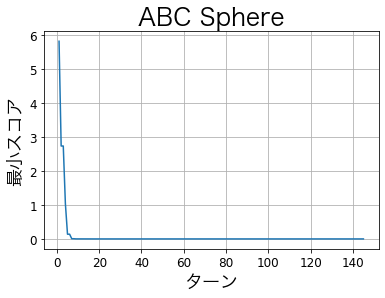


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 145, 'w': 0.21702045678400483, 'c1': 0.689520576745036, 'c2': 0.8287378129805041}
gb_place : [-4.03396387e-10  8.62799283e-10]
gb_score : 0.0
計算時間 : 678 ms



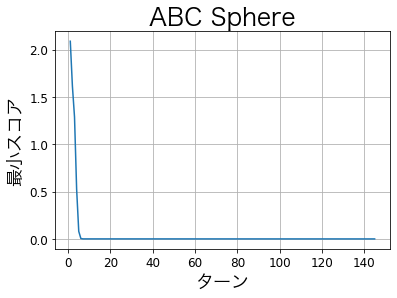


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 145, 'w': 0.21702045678400483, 'c1': 0.689520576745036, 'c2': 0.8287378129805041}
gb_place : [ 8.55246757e-10 -5.63432691e-10]
gb_score : 0.0
計算時間 : 628 ms



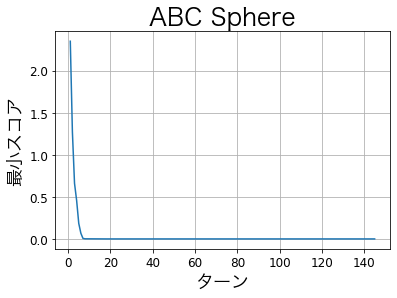

In [33]:
best_params = study.best_params
num_agent = best_params["num_agent"]
max_turn = best_params["max_turn"]
w = best_params["w"]
c1 = best_params["c1"]
c2 = best_params["c2"]

for _ in range(3) : 
    pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                    w, c1, c2, output_mode = output_mode)
    
    plot_score(function_number, pso.gb_record_list, "Sphere")

# Rastrigin

In [30]:
# パラメータ
N = 10   # 次元
function_number = 2
limit_time = N * 500   # 計算時間の制限、制限時間は (次元) * 0.5秒
repeat_times = 3
output_mode = False   # 計算時間を短くしたいので、output_modeをFalseにしておく

# xの値域は自動化しておく
min_field_list = [-5.0, -5.0, -5.0, -600.0, -10.0, -5.0]
max_field_list = [5.0, 5.0, 10.0, 600.0, 10.0, 5.0]
min_field = min_field_list[function_number - 1]
max_field = max_field_list[function_number - 1]


# optunaに渡す関数
def objective(trial) : 
    num_agent = trial.suggest_int("num_agent", 10, 200)
    max_turn = trial.suggest_int("max_turn", 20, 500)
    w = trial.suggest_uniform("w", 0.0, 1.0)
    c1 = trial.suggest_uniform("c1", 0.0, 1.0)
    c2 = trial.suggest_uniform("c2", 0.0, 1.0)
    
    sum_score = 0.0   # これを最小化するのが目標
    for _ in range(repeat_times) :   # repeat_times回の合計をとる
        pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                      w, c1, c2, output_mode = output_mode)
        
        sum_score += pso.gb_score

        if pso.calculation_time > limit_time :   # 時間制限を超えたら罰則を与える
            # 計算時間に応じて罰則を与えたほうが学習が早く進むはず？
            sum_score += PENALTY * pso.calculation_time / limit_time
            
    return sum_score


# optunaを使う
study = optuna.create_study()
study.optimize(objective, n_trials = 100)

[I 2022-01-15 21:43:30,138] A new study created in memory with name: no-name-2c95607a-a47d-4ab4-a049-160288759ad1



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 56, 'max_turn': 484, 'w': 0.540275965684202, 'c1': 0.5577906186762576, 'c2': 0.4546940963110925}
gb_place : [-1.95959312e-10  5.79192849e-10]
gb_score : 0.0
計算時間 : 602 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 56, 'max_turn': 484, 'w': 0.540275965684202, 'c1': 0.5577906186762576, 'c2': 0.4546940963110925}
gb_place : [5.27155668e-10 9.94958637e-01]
gb_score : 0.9949590570932898
計算時間 : 437 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:43:31,711] Trial 0 finished with value: 0.9949590570932898 and parameters: {'num_agent': 56, 'max_turn': 484, 'w': 0.540275965684202, 'c1': 0.5577906186762576, 'c2': 0.4546940963110925}. Best is trial 0 with value: 0.9949590570932898.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 56, 'max_turn': 484, 'w': 0.540275965684202, 'c1': 0.5577906186762576, 'c2': 0.4546940963110925}
gb_place : [1.23203981e-11 6.89048184e-10]
gb_score : 0.0
計算時間 : 497 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 15, 'max_turn': 271, 'w': 0.6730536269068709, 'c1': 0.03728848812217889, 'c2': 0.6070278708521363}
gb_place : [-0.99495864  1.98991223]
gb_score : 4.974790247647377
計算時間 : 77 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 15, 'max_turn': 271, 'w': 0.6730536269068709, 'c1': 0.03728848812217889, 'c2': 0.6070278708521363}
gb_place : [ 3.38748114e-10 -5.58074703e-10]
gb_score : 0.0
計算時間 : 67 ms


---------------------------

[I 2022-01-15 21:43:31,929] Trial 1 finished with value: 5.969749304740667 and parameters: {'num_agent': 15, 'max_turn': 271, 'w': 0.6730536269068709, 'c1': 0.03728848812217889, 'c2': 0.6070278708521363}. Best is trial 0 with value: 0.9949590570932898.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 15, 'max_turn': 271, 'w': 0.6730536269068709, 'c1': 0.03728848812217889, 'c2': 0.6070278708521363}
gb_place : [-9.94958636e-01 -5.81272591e-10]
gb_score : 0.9949590570932898
計算時間 : 65 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 251, 'w': 0.4977136245993413, 'c1': 0.5491083908315714, 'c2': 0.06401269658812958}
gb_place : [ 7.48758952e-04 -1.79859763e-06]
gb_score : 0.00011122697162413431
計算時間 : 576 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 251, 'w': 0.4977136245993413, 'c1': 0.5491083908315714, 'c2': 0.06401269658812958}
gb_place : [-0.02661061  0.00258864]
gb_score : 0.14149039524177454


[I 2022-01-15 21:43:33,645] Trial 2 finished with value: 0.8941673517158826 and parameters: {'num_agent': 143, 'max_turn': 251, 'w': 0.4977136245993413, 'c1': 0.5491083908315714, 'c2': 0.06401269658812958}. Best is trial 2 with value: 0.8941673517158826.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 251, 'w': 0.4977136245993413, 'c1': 0.5491083908315714, 'c2': 0.06401269658812958}
gb_place : [-0.01428486 -0.06026929]
gb_score : 0.7525657295024839
計算時間 : 547 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 145, 'w': 0.21702045678400483, 'c1': 0.689520576745036, 'c2': 0.8287378129805041}
gb_place : [ 3.13422406e-10 -5.99943082e-10]
gb_score : 0.0
計算時間 : 444 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 145, 'w': 0.21702045678400483, 'c1': 0.689520576745036, 'c2': 0.8287378129805041}
gb_place : [-1.37241167e-09  4.46199092e-10]
gb_score : 0.0
計算時間 : 430 ms


-------------------

[I 2022-01-15 21:43:35,118] Trial 3 finished with value: 0.0 and parameters: {'num_agent': 179, 'max_turn': 145, 'w': 0.21702045678400483, 'c1': 0.689520576745036, 'c2': 0.8287378129805041}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 145, 'w': 0.21702045678400483, 'c1': 0.689520576745036, 'c2': 0.8287378129805041}
gb_place : [ 1.42682081e-09 -1.23485292e-10]
gb_score : 0.0
計算時間 : 514 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 352, 'w': 0.5405400917872089, 'c1': 0.44340206025247053, 'c2': 0.908946755599331}
gb_place : [-1.47822372e-09  1.57744165e-09]
gb_score : 0.0
計算時間 : 888 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 352, 'w': 0.5405400917872089, 'c1': 0.44340206025247053, 'c2': 0.908946755599331}
gb_place : [-1.09313787e-09  1.22663300e-09]
gb_score : 0.0
計算時間 : 899 ms


---------------------------

[I 2022-01-15 21:43:37,698] Trial 4 finished with value: 0.0 and parameters: {'num_agent': 136, 'max_turn': 352, 'w': 0.5405400917872089, 'c1': 0.44340206025247053, 'c2': 0.908946755599331}. Best is trial 3 with value: 0.0.
[I 2022-01-15 21:43:37,800] Trial 5 finished with value: 6.903044629891377 and parameters: {'num_agent': 79, 'max_turn': 24, 'w': 0.37396577613897364, 'c1': 0.9921778610833933, 'c2': 0.0662001211433193}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 352, 'w': 0.5405400917872089, 'c1': 0.44340206025247053, 'c2': 0.908946755599331}
gb_place : [-9.73587656e-10  5.27585058e-11]
gb_score : 0.0
計算時間 : 744 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 24, 'w': 0.37396577613897364, 'c1': 0.9921778610833933, 'c2': 0.0662001211433193}
gb_place : [-0.96388046 -1.0186551 ]
gb_score : 2.2917586740354032
計算時間 : 28 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 24, 'w': 0.37396577613897364, 'c1': 0.9921778610833933, 'c2': 0.0662001211433193}
gb_place : [-0.05574928  0.1023168 ]
gb_score : 2.617067920041065
計算時間 : 35 ms


------------------

[I 2022-01-15 21:43:40,621] Trial 6 finished with value: 0.9949590570932898 and parameters: {'num_agent': 194, 'max_turn': 307, 'w': 0.1628050490313977, 'c1': 0.28562849061981466, 'c2': 0.7464554621415157}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 194, 'max_turn': 307, 'w': 0.1628050490313977, 'c1': 0.28562849061981466, 'c2': 0.7464554621415157}
gb_place : [-9.94958637e-01 -1.62185555e-09]
gb_score : 0.9949590570932898
計算時間 : 916 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 26, 'max_turn': 483, 'w': 0.429799806136522, 'c1': 0.5785067543401757, 'c2': 0.9692197182504164}
gb_place : [7.74643962e-10 1.24541032e-09]
gb_score : 0.0
計算時間 : 198 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 26, 'max_turn': 483, 'w': 0.429799806136522, 'c1': 0.5785067543401757, 'c2': 0.9692197182504164}
gb_place : [ 0.99495864 -0.99495864]
gb_score : 1.9899181141865796
計算時間 : 199 ms


----------

[I 2022-01-15 21:43:41,224] Trial 7 finished with value: 3.979836228373159 and parameters: {'num_agent': 26, 'max_turn': 483, 'w': 0.429799806136522, 'c1': 0.5785067543401757, 'c2': 0.9692197182504164}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 26, 'max_turn': 483, 'w': 0.429799806136522, 'c1': 0.5785067543401757, 'c2': 0.9692197182504164}
gb_place : [ 0.99495864 -0.99495864]
gb_score : 1.9899181141865796
計算時間 : 191 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 379, 'w': 0.34835700370865985, 'c1': 0.47606549021672095, 'c2': 0.5695193420863734}
gb_place : [ 7.51400179e-10 -5.00897896e-10]
gb_score : 0.0
計算時間 : 430 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 379, 'w': 0.34835700370865985, 'c1': 0.47606549021672095, 'c2': 0.5695193420863734}
gb_place : [5.40575633e-10 1.24020807e-09]
gb_score : 0.0
計算時間 : 469 ms


----------------------

[I 2022-01-15 21:43:42,635] Trial 8 finished with value: 0.0 and parameters: {'num_agent': 70, 'max_turn': 379, 'w': 0.34835700370865985, 'c1': 0.47606549021672095, 'c2': 0.5695193420863734}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 379, 'w': 0.34835700370865985, 'c1': 0.47606549021672095, 'c2': 0.5695193420863734}
gb_place : [5.04676595e-10 1.03087057e-09]
gb_score : 0.0
計算時間 : 478 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 500, 'w': 0.6039980214741834, 'c1': 0.7022272223374805, 'c2': 0.17294116203403154}
gb_place : [-0.00216638 -0.0047338 ]
gb_score : 0.0053764955335839915
計算時間 : 862 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 500, 'w': 0.6039980214741834, 'c1': 0.7022272223374805, 'c2': 0.17294116203403154}
gb_place : [ 0.01793642 -0.01413252]
gb_score : 0.1033571719199653
計算時間 : 828 ms


-----------

[I 2022-01-15 21:43:45,137] Trial 9 finished with value: 0.3748765652332775 and parameters: {'num_agent': 97, 'max_turn': 500, 'w': 0.6039980214741834, 'c1': 0.7022272223374805, 'c2': 0.17294116203403154}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 500, 'w': 0.6039980214741834, 'c1': 0.7022272223374805, 'c2': 0.17294116203403154}
gb_place : [-0.03556241  0.00905888]
gb_score : 0.2661428977797282
計算時間 : 762 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 92, 'w': 0.9517576285166882, 'c1': 0.9139390395621273, 'c2': 0.3429782350352024}
gb_place : [ 0.00020437 -0.00103134]
gb_score : 0.00021930935856318
計算時間 : 298 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 92, 'w': 0.9517576285166882, 'c1': 0.9139390395621273, 'c2': 0.3429782350352024}
gb_place : [-0.00010762  0.00042936]
gb_score : 3.887188874429626e-05
計算時間 : 294 ms


----

[I 2022-01-15 21:43:46,062] Trial 10 finished with value: 0.0002590783658025231 and parameters: {'num_agent': 198, 'max_turn': 92, 'w': 0.9517576285166882, 'c1': 0.9139390395621273, 'c2': 0.3429782350352024}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 92, 'w': 0.9517576285166882, 'c1': 0.9139390395621273, 'c2': 0.3429782350352024}
gb_place : [6.52235795e-05 1.63655637e-05]
gb_score : 8.971184950468114e-07
計算時間 : 300 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 157, 'w': 0.02157494876097521, 'c1': 0.32767779986661005, 'c2': 0.9680160319449791}
gb_place : [-1.17354899e-09  9.94958638e-01]
gb_score : 0.9949590570932898
計算時間 : 380 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 157, 'w': 0.02157494876097521, 'c1': 0.32767779986661005, 'c2': 0.9680160319449791}
gb_place : [1.79927392e-10 1.56375540e-09]
gb_score : 0.0
計算時間 : 374 

[I 2022-01-15 21:43:47,227] Trial 11 finished with value: 1.9899181141865796 and parameters: {'num_agent': 147, 'max_turn': 157, 'w': 0.02157494876097521, 'c1': 0.32767779986661005, 'c2': 0.9680160319449791}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 157, 'w': 0.02157494876097521, 'c1': 0.32767779986661005, 'c2': 0.9680160319449791}
gb_place : [-9.94958639e-01 -1.10000868e-09]
gb_score : 0.9949590570932898
計算時間 : 376 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 189, 'w': 0.8325405921777058, 'c1': 0.7556050471573508, 'c2': 0.8141422980781029}
gb_place : [ 5.96789754e-10 -4.31680537e-09]
gb_score : 3.552713678800501e-15
計算時間 : 501 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 189, 'w': 0.8325405921777058, 'c1': 0.7556050471573508, 'c2': 0.8141422980781029}
gb_place : [-6.65103273e-10 -9.94958638e-01]
gb_score : 0.9949590570

[I 2022-01-15 21:43:48,754] Trial 12 finished with value: 0.9949590570932951 and parameters: {'num_agent': 152, 'max_turn': 189, 'w': 0.8325405921777058, 'c1': 0.7556050471573508, 'c2': 0.8141422980781029}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 189, 'w': 0.8325405921777058, 'c1': 0.7556050471573508, 'c2': 0.8141422980781029}
gb_place : [-1.66481999e-09 -3.37082666e-10]
gb_score : 0.0
計算時間 : 474 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 382, 'w': 0.16864721342832634, 'c1': 0.29152846504869256, 'c2': 0.8362151255717948}
gb_place : [ 2.33244462e-10 -9.94958638e-01]
gb_score : 0.9949590570932898
計算時間 : 1103 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 382, 'w': 0.16864721342832634, 'c1': 0.29152846504869256, 'c2': 0.8362151255717948}
gb_place : [9.54413181e-11 1.32396401e-09]
gb_score : 0.0
計算時間 : 1109 ms


--------

[I 2022-01-15 21:43:52,144] Trial 13 finished with value: 3323.994959057093 and parameters: {'num_agent': 178, 'max_turn': 382, 'w': 0.16864721342832634, 'c1': 0.29152846504869256, 'c2': 0.8362151255717948}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 382, 'w': 0.16864721342832634, 'c1': 0.29152846504869256, 'c2': 0.8362151255717948}
gb_place : [-1.07887046e-09  3.37177712e-11]
gb_score : 0.0
計算時間 : 1111 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 378, 'w': 0.17960356827547053, 'c1': 0.7895974438021867, 'c2': 0.9906873752459163}
gb_place : [1.53081260e-09 1.11271341e-09]
gb_score : 0.0
計算時間 : 822 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 378, 'w': 0.17960356827547053, 'c1': 0.7895974438021867, 'c2': 0.9906873752459163}
gb_place : [ 9.94958637e-01 -3.46481778e-10]
gb_score : 0.9949590570932898
計算時間 : 812 ms


---------

[I 2022-01-15 21:43:54,683] Trial 14 finished with value: 0.9949590570932898 and parameters: {'num_agent': 122, 'max_turn': 378, 'w': 0.17960356827547053, 'c1': 0.7895974438021867, 'c2': 0.9906873752459163}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 378, 'w': 0.17960356827547053, 'c1': 0.7895974438021867, 'c2': 0.9906873752459163}
gb_place : [-1.1762519e-09  8.2397256e-10]
gb_score : 0.0
計算時間 : 850 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 169, 'max_turn': 109, 'w': 0.7184769883057025, 'c1': 0.09931028200871167, 'c2': 0.6997496519346408}
gb_place : [-9.80347044e-10 -4.25237206e-10]
gb_score : 0.0
計算時間 : 354 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 169, 'max_turn': 109, 'w': 0.7184769883057025, 'c1': 0.09931028200871167, 'c2': 0.6997496519346408}
gb_place : [1.65857067e-10 9.94958638e-01]
gb_score : 0.9949590570932898
計算時間 : 340 ms


-------------

[I 2022-01-15 21:43:55,799] Trial 15 finished with value: 0.9949590570932898 and parameters: {'num_agent': 169, 'max_turn': 109, 'w': 0.7184769883057025, 'c1': 0.09931028200871167, 'c2': 0.6997496519346408}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 169, 'max_turn': 109, 'w': 0.7184769883057025, 'c1': 0.09931028200871167, 'c2': 0.6997496519346408}
gb_place : [ 1.60088772e-09 -9.52181651e-11]
gb_score : 0.0
計算時間 : 385 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 204, 'w': 0.2758525745090067, 'c1': 0.4205980992024912, 'c2': 0.8510373795720347}
gb_place : [3.34732888e-11 1.85137991e-10]
gb_score : 0.0
計算時間 : 446 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 204, 'w': 0.2758525745090067, 'c1': 0.4205980992024912, 'c2': 0.8510373795720347}
gb_place : [6.50819671e-10 1.55119805e-09]
gb_score : 0.0
計算時間 : 423 ms


------------------------------

[I 2022-01-15 21:43:57,122] Trial 16 finished with value: 0.9949590570932898 and parameters: {'num_agent': 120, 'max_turn': 204, 'w': 0.2758525745090067, 'c1': 0.4205980992024912, 'c2': 0.8510373795720347}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 204, 'w': 0.2758525745090067, 'c1': 0.4205980992024912, 'c2': 0.8510373795720347}
gb_place : [ 9.94958637e-01 -9.67059892e-10]
gb_score : 0.9949590570932898
計算時間 : 415 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 427, 'w': 0.03456177973378477, 'c1': 0.6690634606416049, 'c2': 0.5671793644328696}
gb_place : [-0.00029608 -0.00038696]
gb_score : 4.709726086993271e-05
計算時間 : 521 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 427, 'w': 0.03456177973378477, 'c1': 0.6690634606416049, 'c2': 0.5671793644328696}
gb_place : [-1.24493120e-06 -1.23058561e-06]
gb_score : 6.079083902932325e-10


[I 2022-01-15 21:43:58,711] Trial 17 finished with value: 4.7097868778323004e-05 and parameters: {'num_agent': 62, 'max_turn': 427, 'w': 0.03456177973378477, 'c1': 0.6690634606416049, 'c2': 0.5671793644328696}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 427, 'w': 0.03456177973378477, 'c1': 0.6690634606416049, 'c2': 0.5671793644328696}
gb_place : [-1.32405487e-09  9.04897307e-11]
gb_score : 0.0
計算時間 : 494 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 42, 'max_turn': 323, 'w': 0.36731880099995456, 'c1': 0.4128980392543383, 'c2': 0.3625701306742153}
gb_place : [1.53685440e-07 9.94959141e-01]
gb_score : 0.9949590571481277
計算時間 : 317 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 42, 'max_turn': 323, 'w': 0.36731880099995456, 'c1': 0.4128980392543383, 'c2': 0.3625701306742153}
gb_place : [ 8.67847160e-09 -9.94958637e-01]
gb_score : 0.994959057093304
計算時間 : 238 ms




[I 2022-01-15 21:43:59,539] Trial 18 finished with value: 1.9899181143017888 and parameters: {'num_agent': 42, 'max_turn': 323, 'w': 0.36731880099995456, 'c1': 0.4128980392543383, 'c2': 0.3625701306742153}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 42, 'max_turn': 323, 'w': 0.36731880099995456, 'c1': 0.4128980392543383, 'c2': 0.3625701306742153}
gb_place : [ 2.12152349e-07 -5.09147025e-07]
gb_score : 6.035705268914171e-11
計算時間 : 244 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 22, 'w': 0.7403466917508159, 'c1': 0.8453238484056318, 'c2': 0.8748029846523836}
gb_place : [-0.00013245  0.00073839]
gb_score : 0.000111647420625971
計算時間 : 72 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 22, 'w': 0.7403466917508159, 'c1': 0.8453238484056318, 'c2': 0.8748029846523836}
gb_place : [-0.00914081 -0.00270753]
gb_score : 0.018026321817895763
計算時間 : 67 

[I 2022-01-15 21:43:59,769] Trial 19 finished with value: 0.019453619715958936 and parameters: {'num_agent': 173, 'max_turn': 22, 'w': 0.7403466917508159, 'c1': 0.8453238484056318, 'c2': 0.8748029846523836}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 22, 'w': 0.7403466917508159, 'c1': 0.8453238484056318, 'c2': 0.8748029846523836}
gb_place : [-0.00156782  0.00204294]
gb_score : 0.0013156504774372024
計算時間 : 69 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 86, 'w': 0.493413709965296, 'c1': 0.17814492192478498, 'c2': 0.6790827860400674}
gb_place : [ 1.33172147e-09 -1.22470301e-09]
gb_score : 0.0
計算時間 : 235 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 86, 'w': 0.493413709965296, 'c1': 0.17814492192478498, 'c2': 0.6790827860400674}
gb_place : [-3.71204647e-10 -9.94958639e-01]
gb_score : 0.9949590570932898
計算時間 : 195 ms


------

[I 2022-01-15 21:44:00,431] Trial 20 finished with value: 0.9949590570932898 and parameters: {'num_agent': 126, 'max_turn': 86, 'w': 0.493413709965296, 'c1': 0.17814492192478498, 'c2': 0.6790827860400674}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 86, 'w': 0.493413709965296, 'c1': 0.17814492192478498, 'c2': 0.6790827860400674}
gb_place : [9.77397766e-10 9.54148004e-10]
gb_score : 0.0
計算時間 : 201 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 387, 'w': 0.2910869541552199, 'c1': 0.4364311739534433, 'c2': 0.47963704906243876}
gb_place : [1.04133013e-09 5.32073000e-10]
gb_score : 0.0
計算時間 : 649 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 387, 'w': 0.2910869541552199, 'c1': 0.4364311739534433, 'c2': 0.47963704906243876}
gb_place : [-1.52877479e-09  1.18199182e-09]
gb_score : 0.0
計算時間 : 667 ms


------------------------------ P

[I 2022-01-15 21:44:02,436] Trial 21 finished with value: 0.0 and parameters: {'num_agent': 89, 'max_turn': 387, 'w': 0.2910869541552199, 'c1': 0.4364311739534433, 'c2': 0.47963704906243876}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 387, 'w': 0.2910869541552199, 'c1': 0.4364311739534433, 'c2': 0.47963704906243876}
gb_place : [1.34203673e-09 1.22246625e-09]
gb_score : 0.0
計算時間 : 644 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 93, 'max_turn': 431, 'w': 0.27357975115674443, 'c1': 0.6548523586428505, 'c2': 0.4482055768202755}
gb_place : [ 3.62929799e-09 -3.65309549e-09]
gb_score : 3.552713678800501e-15
計算時間 : 789 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 93, 'max_turn': 431, 'w': 0.27357975115674443, 'c1': 0.6548523586428505, 'c2': 0.4482055768202755}
gb_place : [3.24821041e-10 9.94958636e-01]
gb_score : 0.9949590570932898
計算時間 : 750 ms


[I 2022-01-15 21:44:04,826] Trial 22 finished with value: 0.9949590570932934 and parameters: {'num_agent': 93, 'max_turn': 431, 'w': 0.27357975115674443, 'c1': 0.6548523586428505, 'c2': 0.4482055768202755}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 93, 'max_turn': 431, 'w': 0.27357975115674443, 'c1': 0.6548523586428505, 'c2': 0.4482055768202755}
gb_place : [ 8.97044801e-10 -3.55749959e-10]
gb_score : 0.0
計算時間 : 799 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 111, 'max_turn': 311, 'w': 0.11998607300904168, 'c1': 0.486444144443148, 'c2': 0.9311122020558908}
gb_place : [-9.94958636e-01 -1.61292471e-09]
gb_score : 0.9949590570932898
計算時間 : 593 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 111, 'max_turn': 311, 'w': 0.11998607300904168, 'c1': 0.486444144443148, 'c2': 0.9311122020558908}
gb_place : [ 0.99495864 -0.99495864]
gb_score : 1.9899181141865796
計算時間 : 617 ms


-----

[I 2022-01-15 21:44:06,731] Trial 23 finished with value: 2.9848771712798694 and parameters: {'num_agent': 111, 'max_turn': 311, 'w': 0.11998607300904168, 'c1': 0.486444144443148, 'c2': 0.9311122020558908}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 111, 'max_turn': 311, 'w': 0.11998607300904168, 'c1': 0.486444144443148, 'c2': 0.9311122020558908}
gb_place : [-1.17464962e-09  4.65153153e-10]
gb_score : 0.0
計算時間 : 648 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 434, 'w': 0.2742848306622842, 'c1': 0.6057520478230676, 'c2': 0.2886266929131477}
gb_place : [0.0005506  0.00140883]
gb_score : 0.00045391068376332555
計算時間 : 588 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 434, 'w': 0.2742848306622842, 'c1': 0.6057520478230676, 'c2': 0.2886266929131477}
gb_place : [-0.00085144 -0.00361869]
gb_score : 0.002741643728974452
計算時間 : 604 ms


-----------

[I 2022-01-15 21:44:08,563] Trial 24 finished with value: 0.0034159611635082854 and parameters: {'num_agent': 79, 'max_turn': 434, 'w': 0.2742848306622842, 'c1': 0.6057520478230676, 'c2': 0.2886266929131477}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 434, 'w': 0.2742848306622842, 'c1': 0.6057520478230676, 'c2': 0.2886266929131477}
gb_place : [-0.00032247  0.00100349]
gb_score : 0.00022040675077050764
計算時間 : 586 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 348, 'w': 0.596355965708623, 'c1': 0.3711600853041146, 'c2': 0.7609739212321476}
gb_place : [-1.32295735e-09 -3.92742820e-11]
gb_score : 0.0
計算時間 : 857 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 348, 'w': 0.596355965708623, 'c1': 0.3711600853041146, 'c2': 0.7609739212321476}
gb_place : [5.47435589e-12 3.43060031e-10]
gb_score : 0.0
計算時間 : 834 ms


---------------------

[I 2022-01-15 21:44:11,183] Trial 25 finished with value: 0.9949590570932898 and parameters: {'num_agent': 137, 'max_turn': 348, 'w': 0.596355965708623, 'c1': 0.3711600853041146, 'c2': 0.7609739212321476}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 348, 'w': 0.596355965708623, 'c1': 0.3711600853041146, 'c2': 0.7609739212321476}
gb_place : [9.94958636e-01 4.76879849e-10]
gb_score : 0.9949590570932898
計算時間 : 875 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 103, 'max_turn': 271, 'w': 0.09447845048464201, 'c1': 0.18149264793456987, 'c2': 0.6486351961573145}
gb_place : [9.93521322e-01 5.36813640e-04]
gb_score : 0.9954258345856779
計算時間 : 493 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 103, 'max_turn': 271, 'w': 0.09447845048464201, 'c1': 0.18149264793456987, 'c2': 0.6486351961573145}
gb_place : [1.30238553e-09 9.94958638e-01]
gb_score : 0.9949590570932898
計

[I 2022-01-15 21:44:12,720] Trial 26 finished with value: 1.990410646209071 and parameters: {'num_agent': 103, 'max_turn': 271, 'w': 0.09447845048464201, 'c1': 0.18149264793456987, 'c2': 0.6486351961573145}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 103, 'max_turn': 271, 'w': 0.09447845048464201, 'c1': 0.18149264793456987, 'c2': 0.6486351961573145}
gb_place : [0.0003019  0.00019665]
gb_score : 2.5754530103228035e-05
計算時間 : 504 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 409, 'w': 0.23530572370827352, 'c1': 0.4781736688986947, 'c2': 0.4511003844307054}
gb_place : [-1.29816238e-09 -1.20887998e-10]
gb_score : 0.0
計算時間 : 1172 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 409, 'w': 0.23530572370827352, 'c1': 0.4781736688986947, 'c2': 0.4511003844307054}
gb_place : [-8.65733491e-11  3.42337412e-10]
gb_score : 0.0
計算時間 : 1232 ms


------------

[I 2022-01-15 21:44:16,365] Trial 27 finished with value: 3573.0 and parameters: {'num_agent': 161, 'max_turn': 409, 'w': 0.23530572370827352, 'c1': 0.4781736688986947, 'c2': 0.4511003844307054}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 409, 'w': 0.23530572370827352, 'c1': 0.4781736688986947, 'c2': 0.4511003844307054}
gb_place : [-9.14066924e-11 -2.86066946e-10]
gb_score : 0.0
計算時間 : 1169 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 189, 'max_turn': 227, 'w': 0.4082356804845506, 'c1': 0.22618097781065744, 'c2': 0.24489740577957916}
gb_place : [ 8.54552597e-10 -1.15634947e-09]
gb_score : 0.0
計算時間 : 776 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 189, 'max_turn': 227, 'w': 0.4082356804845506, 'c1': 0.22618097781065744, 'c2': 0.24489740577957916}
gb_place : [9.61107510e-10 9.94615468e-10]
gb_score : 0.0
計算時間 : 778 ms


-----------------------

[I 2022-01-15 21:44:18,735] Trial 28 finished with value: 0.0 and parameters: {'num_agent': 189, 'max_turn': 227, 'w': 0.4082356804845506, 'c1': 0.22618097781065744, 'c2': 0.24489740577957916}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 189, 'max_turn': 227, 'w': 0.4082356804845506, 'c1': 0.22618097781065744, 'c2': 0.24489740577957916}
gb_place : [-1.49195536e-09 -6.54109733e-10]
gb_score : 0.0
計算時間 : 751 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 180, 'max_turn': 222, 'w': 0.43966325178189447, 'c1': 0.20994316645645517, 'c2': 0.20513073269220972}
gb_place : [3.65843992e-09 1.18495015e-09]
gb_score : 1.7763568394002505e-15
計算時間 : 712 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 180, 'max_turn': 222, 'w': 0.43966325178189447, 'c1': 0.20994316645645517, 'c2': 0.20513073269220972}
gb_place : [ 1.00853154e-08 -2.94141891e-09]
gb_score : 2.1316282072803006e-14

[I 2022-01-15 21:44:20,918] Trial 29 finished with value: 2.905761117943939e-06 and parameters: {'num_agent': 180, 'max_turn': 222, 'w': 0.43966325178189447, 'c1': 0.20994316645645517, 'c2': 0.20513073269220972}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 180, 'max_turn': 222, 'w': 0.43966325178189447, 'c1': 0.20994316645645517, 'c2': 0.20513073269220972}
gb_place : [-1.17675769e-04  2.82660836e-05]
gb_score : 2.9057610948513e-06
計算時間 : 723 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 150, 'w': 0.5874730559876822, 'c1': 0.6122230123536103, 'c2': 0.4794853538677703}
gb_place : [-4.07384712e-11  7.15673238e-10]
gb_score : 0.0
計算時間 : 130 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:44:21,324] Trial 30 finished with value: 0.0 and parameters: {'num_agent': 47, 'max_turn': 150, 'w': 0.5874730559876822, 'c1': 0.6122230123536103, 'c2': 0.4794853538677703}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 150, 'w': 0.5874730559876822, 'c1': 0.6122230123536103, 'c2': 0.4794853538677703}
gb_place : [-1.42798235e-09  1.03711031e-09]
gb_score : 0.0
計算時間 : 123 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 150, 'w': 0.5874730559876822, 'c1': 0.6122230123536103, 'c2': 0.4794853538677703}
gb_place : [-4.30361457e-10 -1.37966688e-09]
gb_score : 0.0
計算時間 : 129 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 191, 'max_turn': 149, 'w': 0.5722012130758287, 'c1': 0.6151861570153228, 'c2': 0.18083043933413268}
gb_place : [-1.15508413e-09  7.65263492e-10]
gb_score : 0.0
計算時間 : 529 ms


----------------------------

[I 2022-01-15 21:44:22,908] Trial 31 finished with value: 0.0022826614830879777 and parameters: {'num_agent': 191, 'max_turn': 149, 'w': 0.5722012130758287, 'c1': 0.6151861570153228, 'c2': 0.18083043933413268}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 191, 'max_turn': 149, 'w': 0.5722012130758287, 'c1': 0.6151861570153228, 'c2': 0.18083043933413268}
gb_place : [-2.11490837e-07 -6.92138178e-08]
gb_score : 9.823253321883385e-12
計算時間 : 501 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 240, 'w': 0.3781317321383405, 'c1': 0.5240477610848606, 'c2': 0.9034494225334789}
gb_place : [-7.55539585e-10 -6.91828534e-10]
gb_score : 0.0
計算時間 : 744 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 240, 'w': 0.3781317321383405, 'c1': 0.5240477610848606, 'c2': 0.9034494225334789}
gb_place : [ 9.47657339e-10 -9.94958637e-01]
gb_score : 0.9949590570932898
計算時間 : 74

[I 2022-01-15 21:44:25,126] Trial 32 finished with value: 0.9949590570932898 and parameters: {'num_agent': 161, 'max_turn': 240, 'w': 0.3781317321383405, 'c1': 0.5240477610848606, 'c2': 0.9034494225334789}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 240, 'w': 0.3781317321383405, 'c1': 0.5240477610848606, 'c2': 0.9034494225334789}
gb_place : [-4.12908609e-10  5.54853370e-10]
gb_score : 0.0
計算時間 : 679 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 53, 'max_turn': 145, 'w': 0.30643334202717465, 'c1': 0.5348495231490317, 'c2': 0.5420860874965576}
gb_place : [ 1.38121828e-09 -9.94958638e-01]
gb_score : 0.9949590570932898
計算時間 : 145 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:44:25,599] Trial 33 finished with value: 2.9848771712798694 and parameters: {'num_agent': 53, 'max_turn': 145, 'w': 0.30643334202717465, 'c1': 0.5348495231490317, 'c2': 0.5420860874965576}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 53, 'max_turn': 145, 'w': 0.30643334202717465, 'c1': 0.5348495231490317, 'c2': 0.5420860874965576}
gb_place : [9.94958639e-01 4.78247828e-10]
gb_score : 0.9949590570932898
計算時間 : 150 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 53, 'max_turn': 145, 'w': 0.30643334202717465, 'c1': 0.5348495231490317, 'c2': 0.5420860874965576}
gb_place : [9.94958639e-01 1.00016556e-09]
gb_score : 0.9949590570932898
計算時間 : 155 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 76, 'max_turn': 276, 'w': 0.4375469949436165, 'c1': 0.0988537363350947, 'c2': 0.405342174437896}
gb_place : [-9.94958637e-01  2.77570526e-10]
gb_score : 0.9949590570932898
計算時間

[I 2022-01-15 21:44:26,827] Trial 34 finished with value: 0.9949590570932898 and parameters: {'num_agent': 76, 'max_turn': 276, 'w': 0.4375469949436165, 'c1': 0.0988537363350947, 'c2': 0.405342174437896}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 76, 'max_turn': 276, 'w': 0.4375469949436165, 'c1': 0.0988537363350947, 'c2': 0.405342174437896}
gb_place : [1.65153739e-09 3.23348391e-10]
gb_score : 0.0
計算時間 : 397 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 69, 'max_turn': 466, 'w': 0.33444903229124145, 'c1': 0.003750849311461496, 'c2': 0.015095129701374999}
gb_place : [-0.00723059 -0.00287323]
gb_score : 0.012008222444178429
計算時間 : 605 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 69, 'max_turn': 466, 'w': 0.33444903229124145, 'c1': 0.003750849311461496, 'c2': 0.015095129701374999}
gb_place : [-0.00221059 -0.00129379]
gb_score : 0.001301555266566723
計算時間 : 607 ms


-----

[I 2022-01-15 21:44:28,724] Trial 35 finished with value: 0.030637409957046557 and parameters: {'num_agent': 69, 'max_turn': 466, 'w': 0.33444903229124145, 'c1': 0.003750849311461496, 'c2': 0.015095129701374999}. Best is trial 3 with value: 0.0.
[I 2022-01-15 21:44:28,774] Trial 36 finished with value: 2.0578756141721755 and parameters: {'num_agent': 10, 'max_turn': 63, 'w': 0.6556126111483903, 'c1': 0.7342585957941288, 'c2': 0.28730227989646673}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 69, 'max_turn': 466, 'w': 0.33444903229124145, 'c1': 0.003750849311461496, 'c2': 0.015095129701374999}
gb_place : [-0.00562783  0.00746199]
gb_score : 0.017327632246301405
計算時間 : 633 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 10, 'max_turn': 63, 'w': 0.6556126111483903, 'c1': 0.7342585957941288, 'c2': 0.28730227989646673}
gb_place : [-0.01697345  0.00698147]
gb_score : 0.06677072042855592
計算時間 : 13 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 10, 'max_turn': 63, 'w': 0.6556126111483903, 'c1': 0.7342585957941288, 'c2': 0.28730227989646673}
gb_place : [-0.99523902  0.9955998 ]
gb_score : 1.9900152214979627
計算時間 : 13 ms


---

[I 2022-01-15 21:44:29,608] Trial 37 finished with value: 0.0 and parameters: {'num_agent': 40, 'max_turn': 357, 'w': 0.5044425320485968, 'c1': 0.4407165170742511, 'c2': 0.4991771667019126}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 357, 'w': 0.5044425320485968, 'c1': 0.4407165170742511, 'c2': 0.4991771667019126}
gb_place : [ 3.54471685e-11 -8.00469319e-10]
gb_score : 0.0
計算時間 : 251 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 31, 'max_turn': 352, 'w': 0.5060443928070081, 'c1': 0.39263714926366744, 'c2': 0.6176539380706504}
gb_place : [ 9.94958637e-01 -1.29655759e-09]
gb_score : 0.9949590570932898
計算時間 : 192 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 31, 'max_turn': 352, 'w': 0.5060443928070081, 'c1': 0.39263714926366744, 'c2': 0.6176539380706504}
gb_place : [ 9.94958637e-01 -6.49843751e-10]
gb_score : 0.9949590570932898
計算時間 : 190 ms


[I 2022-01-15 21:44:30,235] Trial 38 finished with value: 2.9848771712798694 and parameters: {'num_agent': 31, 'max_turn': 352, 'w': 0.5060443928070081, 'c1': 0.39263714926366744, 'c2': 0.6176539380706504}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 31, 'max_turn': 352, 'w': 0.5060443928070081, 'c1': 0.39263714926366744, 'c2': 0.6176539380706504}
gb_place : [-9.94958637e-01  1.44129636e-09]
gb_score : 0.9949590570932898
計算時間 : 214 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 344, 'w': 0.5234234653762819, 'c1': 0.4486911640217664, 'c2': 0.527620541566037}
gb_place : [ 1.04425340e-09 -1.07753772e-09]
gb_score : 0.0
計算時間 : 861 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 344, 'w': 0.5234234653762819, 'c1': 0.4486911640217664, 'c2': 0.527620541566037}
gb_place : [-5.02021387e-10 -5.33313067e-10]
gb_score : 0.0
計算時間 : 869 ms


--------------

[I 2022-01-15 21:44:32,840] Trial 39 finished with value: 0.0 and parameters: {'num_agent': 135, 'max_turn': 344, 'w': 0.5234234653762819, 'c1': 0.4486911640217664, 'c2': 0.527620541566037}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 344, 'w': 0.5234234653762819, 'c1': 0.4486911640217664, 'c2': 0.527620541566037}
gb_place : [-2.21039007e-10  1.58254200e-09]
gb_score : 0.0
計算時間 : 816 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 298, 'w': 0.5216020751943029, 'c1': 0.3522679712609993, 'c2': 0.7548023535947668}
gb_place : [-7.03426339e-11  4.75346447e-10]
gb_score : 0.0
計算時間 : 683 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 298, 'w': 0.5216020751943029, 'c1': 0.3522679712609993, 'c2': 0.7548023535947668}
gb_place : [-1.40901390e-09  1.52459696e-09]
gb_score : 0.0
計算時間 : 734 ms


----------------------------

[I 2022-01-15 21:44:35,032] Trial 40 finished with value: 0.0 and parameters: {'num_agent': 129, 'max_turn': 298, 'w': 0.5216020751943029, 'c1': 0.3522679712609993, 'c2': 0.7548023535947668}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 298, 'w': 0.5216020751943029, 'c1': 0.3522679712609993, 'c2': 0.7548023535947668}
gb_place : [ 4.37288775e-10 -1.62302496e-10]
gb_score : 0.0
計算時間 : 722 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 285, 'w': 0.40320508720711523, 'c1': 0.24914705288391165, 'c2': 0.5821995952810909}
gb_place : [9.94958637e-01 6.74526116e-10]
gb_score : 0.9949590570932898
計算時間 : 493 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 285, 'w': 0.40320508720711523, 'c1': 0.24914705288391165, 'c2': 0.5821995952810909}
gb_place : [ 9.94958638e-01 -3.31325414e-10]
gb_score : 0.9949590570932898
計算時間 : 460 ms

[I 2022-01-15 21:44:36,512] Trial 41 finished with value: 2.9848771712798694 and parameters: {'num_agent': 90, 'max_turn': 285, 'w': 0.40320508720711523, 'c1': 0.24914705288391165, 'c2': 0.5821995952810909}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 285, 'w': 0.40320508720711523, 'c1': 0.24914705288391165, 'c2': 0.5821995952810909}
gb_place : [-9.94958638e-01 -8.07213087e-10]
gb_score : 0.9949590570932898
計算時間 : 480 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 338, 'w': 0.6408516758209677, 'c1': 0.4433562345005741, 'c2': 0.5376944649558787}
gb_place : [-2.33546240e-10  8.31524731e-10]
gb_score : 0.0
計算時間 : 818 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 338, 'w': 0.6408516758209677, 'c1': 0.4433562345005741, 'c2': 0.5376944649558787}
gb_place : [-7.93666808e-10 -7.05970313e-10]
gb_score : 0.0
計算時間 : 809 ms


-----------

[I 2022-01-15 21:44:39,050] Trial 42 finished with value: 0.0 and parameters: {'num_agent': 138, 'max_turn': 338, 'w': 0.6408516758209677, 'c1': 0.4433562345005741, 'c2': 0.5376944649558787}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 338, 'w': 0.6408516758209677, 'c1': 0.4433562345005741, 'c2': 0.5376944649558787}
gb_place : [-1.41291063e-09  1.32207260e-09]
gb_score : 0.0
計算時間 : 851 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 299, 'w': 0.5292358859590459, 'c1': 0.3544779119145619, 'c2': 0.49803575517129733}
gb_place : [ 1.38259947e-09 -9.94958637e-01]
gb_score : 0.9949590570932898
計算時間 : 270 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 299, 'w': 0.5292358859590459, 'c1': 0.3544779119145619, 'c2': 0.49803575517129733}
gb_place : [ 1.19976479e-09 -1.36386240e-09]
gb_score : 0.0
計算時間 : 275 ms


------------

[I 2022-01-15 21:44:39,877] Trial 43 finished with value: 0.9949590570932898 and parameters: {'num_agent': 47, 'max_turn': 299, 'w': 0.5292358859590459, 'c1': 0.3544779119145619, 'c2': 0.49803575517129733}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 299, 'w': 0.5292358859590459, 'c1': 0.3544779119145619, 'c2': 0.49803575517129733}
gb_place : [-7.01025265e-10 -4.74331702e-10]
gb_score : 0.0
計算時間 : 252 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 20, 'max_turn': 385, 'w': 0.47488481236542124, 'c1': 0.567535898083542, 'c2': 0.3984826805763911}
gb_place : [-1.16070162e-06  1.14515611e-06]
gb_score : 5.274447545389194e-10
計算時間 : 142 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:44:40,358] Trial 44 finished with value: 1.1462875453232169 and parameters: {'num_agent': 20, 'max_turn': 385, 'w': 0.47488481236542124, 'c1': 0.567535898083542, 'c2': 0.3984826805763911}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 20, 'max_turn': 385, 'w': 0.47488481236542124, 'c1': 0.567535898083542, 'c2': 0.3984826805763911}
gb_place : [ 1.01543354 -0.01855151]
gb_score : 1.146287544795772
計算時間 : 163 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 20, 'max_turn': 385, 'w': 0.47488481236542124, 'c1': 0.567535898083542, 'c2': 0.3984826805763911}
gb_place : [ 1.41213041e-09 -2.92333958e-10]
gb_score : 0.0
計算時間 : 151 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 34, 'max_turn': 180, 'w': 0.5644046837871155, 'c1': 0.49993232928774567, 'c2': 0.5272337850484687}
gb_place : [-5.22479856e-10  1.13756069e-09]
gb_score : 0.0
計算時間 : 128 ms


-----------------------

[I 2022-01-15 21:44:40,749] Trial 45 finished with value: 0.9949590570932898 and parameters: {'num_agent': 34, 'max_turn': 180, 'w': 0.5644046837871155, 'c1': 0.49993232928774567, 'c2': 0.5272337850484687}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 34, 'max_turn': 180, 'w': 0.5644046837871155, 'c1': 0.49993232928774567, 'c2': 0.5272337850484687}
gb_place : [7.49049420e-10 7.47774538e-10]
gb_score : 0.0
計算時間 : 116 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 235, 'w': 0.24257409275814845, 'c1': 0.30810793746868237, 'c2': 0.2646968213562537}
gb_place : [ 7.77531449e-07 -3.19294391e-06]
gb_score : 2.1425226037763423e-09
計算時間 : 822 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 235, 'w': 0.24257409275814845, 'c1': 0.30810793746868237, 'c2': 0.2646968213562537}
gb_place : [ 3.58966847e-05 -6.77633088e-06]
gb_score : 2.647523835719312e-07
計算時間

[I 2022-01-15 21:44:43,262] Trial 46 finished with value: 8.902263282095646e-07 and parameters: {'num_agent': 188, 'max_turn': 235, 'w': 0.24257409275814845, 'c1': 0.30810793746868237, 'c2': 0.2646968213562537}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 235, 'w': 0.24257409275814845, 'c1': 0.30810793746868237, 'c2': 0.2646968213562537}
gb_place : [4.83209402e-05 2.84078068e-05]
gb_score : 6.23331422033857e-07
計算時間 : 806 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 364, 'w': 0.20887118544752212, 'c1': 0.9695976578836439, 'c2': 0.10600837801480895}
gb_place : [0.01698357 0.98093239]
gb_score : 1.0910797176127662
計算時間 : 734 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 364, 'w': 0.20887118544752212, 'c1': 0.9695976578836439, 'c2': 0.10600837801480895}
gb_place : [0.00629668 1.01972608]
gb_score : 1.124416757196796
計算時間 : 705 ms

[I 2022-01-15 21:44:45,642] Trial 47 finished with value: 3.217286650475355 and parameters: {'num_agent': 113, 'max_turn': 364, 'w': 0.20887118544752212, 'c1': 0.9695976578836439, 'c2': 0.10600837801480895}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 364, 'w': 0.20887118544752212, 'c1': 0.9695976578836439, 'c2': 0.10600837801480895}
gb_place : [0.0028371  1.00009576]
gb_score : 1.0017901756657928
計算時間 : 885 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 127, 'w': 0.7829173065018367, 'c1': 0.7971972143478668, 'c2': 0.7341902116071306}
gb_place : [-1.90614161e-09 -1.29610217e-09]
gb_score : 1.7763568394002505e-15
計算時間 : 289 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 127, 'w': 0.7829173065018367, 'c1': 0.7971972143478668, 'c2': 0.7341902116071306}
gb_place : [-2.24542098e-09  7.37724229e-09]
gb_score : 1.2434497875801753e-1

[I 2022-01-15 21:44:46,549] Trial 48 finished with value: 1.9539925233402755e-14 and parameters: {'num_agent': 127, 'max_turn': 127, 'w': 0.7829173065018367, 'c1': 0.7971972143478668, 'c2': 0.7341902116071306}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 127, 'w': 0.7829173065018367, 'c1': 0.7971972143478668, 'c2': 0.7341902116071306}
gb_place : [-1.06145559e-09  5.38292735e-09]
gb_score : 5.329070518200751e-15
計算時間 : 290 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 132, 'max_turn': 331, 'w': 0.6246927031658847, 'c1': 0.3403254088330421, 'c2': 0.7749431604444331}
gb_place : [-1.11800758e-09 -1.06008550e-09]
gb_score : 0.0
計算時間 : 844 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 132, 'max_turn': 331, 'w': 0.6246927031658847, 'c1': 0.3403254088330421, 'c2': 0.7749431604444331}
gb_place : [-8.31736020e-10 -3.01809358e-10]
gb_score : 0.0
計算時間 : 811 ms


---------

[I 2022-01-15 21:44:49,076] Trial 49 finished with value: 0.0 and parameters: {'num_agent': 132, 'max_turn': 331, 'w': 0.6246927031658847, 'c1': 0.3403254088330421, 'c2': 0.7749431604444331}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 132, 'max_turn': 331, 'w': 0.6246927031658847, 'c1': 0.3403254088330421, 'c2': 0.7749431604444331}
gb_place : [-3.01839302e-10  1.21859965e-09]
gb_score : 0.0
計算時間 : 814 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 402, 'w': 0.6896626199597778, 'c1': 0.256534593771199, 'c2': 0.48430110066043885}
gb_place : [0.99495864 0.99495864]
gb_score : 1.9899181141865796
計算時間 : 289 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 402, 'w': 0.6896626199597778, 'c1': 0.256534593771199, 'c2': 0.48430110066043885}
gb_place : [-9.94958638e-01  6.12865747e-10]
gb_score : 0.9949590570932898
計算時間 : 314 ms


---------

[I 2022-01-15 21:44:50,016] Trial 50 finished with value: 2.9848771712798694 and parameters: {'num_agent': 40, 'max_turn': 402, 'w': 0.6896626199597778, 'c1': 0.256534593771199, 'c2': 0.48430110066043885}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 402, 'w': 0.6896626199597778, 'c1': 0.256534593771199, 'c2': 0.48430110066043885}
gb_place : [ 1.63552814e-09 -2.93697359e-10]
gb_score : 0.0
計算時間 : 306 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 144, 'max_turn': 324, 'w': 0.6220117852856196, 'c1': 0.3423803606487447, 'c2': 0.6290461011067214}
gb_place : [-9.94958639e-01 -6.20665605e-10]
gb_score : 0.9949590570932898
計算時間 : 897 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 144, 'max_turn': 324, 'w': 0.6220117852856196, 'c1': 0.3423803606487447, 'c2': 0.6290461011067214}
gb_place : [ 1.14574946e-09 -2.34864456e-10]
gb_score : 0.0
計算時間 : 923 ms


-------------

[I 2022-01-15 21:44:52,798] Trial 51 finished with value: 0.9949590570932898 and parameters: {'num_agent': 144, 'max_turn': 324, 'w': 0.6220117852856196, 'c1': 0.3423803606487447, 'c2': 0.6290461011067214}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 144, 'max_turn': 324, 'w': 0.6220117852856196, 'c1': 0.3423803606487447, 'c2': 0.6290461011067214}
gb_place : [ 4.72620703e-10 -1.33547918e-09]
gb_score : 0.0
計算時間 : 902 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 254, 'w': 0.5422806644568671, 'c1': 0.43837541170026695, 'c2': 0.4175991708450859}
gb_place : [-1.58048502e-10 -6.32536501e-10]
gb_score : 0.0
計算時間 : 891 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 254, 'w': 0.5422806644568671, 'c1': 0.43837541170026695, 'c2': 0.4175991708450859}
gb_place : [-9.84004150e-10 -1.40707425e-09]
gb_score : 0.0
計算時間 : 788 ms


-------------------------

[I 2022-01-15 21:44:55,349] Trial 52 finished with value: 0.0 and parameters: {'num_agent': 153, 'max_turn': 254, 'w': 0.5422806644568671, 'c1': 0.43837541170026695, 'c2': 0.4175991708450859}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 254, 'w': 0.5422806644568671, 'c1': 0.43837541170026695, 'c2': 0.4175991708450859}
gb_place : [-1.03068423e-09  1.60356289e-09]
gb_score : 0.0
計算時間 : 812 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 453, 'w': 0.4691410962012148, 'c1': 0.45578143109031577, 'c2': 0.42876533897054914}
gb_place : [ 9.94958637e-01 -1.09811744e-09]
gb_score : 0.9949590570932898
計算時間 : 1365 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 453, 'w': 0.4691410962012148, 'c1': 0.45578143109031577, 'c2': 0.42876533897054914}
gb_place : [ 1.48353428e-09 -1.75485742e-10]
gb_score : 0.0
計算時間 : 1312 ms


-----

[I 2022-01-15 21:44:59,391] Trial 53 finished with value: 3968.994959057093 and parameters: {'num_agent': 152, 'max_turn': 453, 'w': 0.4691410962012148, 'c1': 0.45578143109031577, 'c2': 0.42876533897054914}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 453, 'w': 0.4691410962012148, 'c1': 0.45578143109031577, 'c2': 0.42876533897054914}
gb_place : [-8.26470584e-10 -1.45853928e-09]
gb_score : 0.0
計算時間 : 1291 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 63, 'max_turn': 250, 'w': 0.34830952286965444, 'c1': 0.622271454223895, 'c2': 0.3766967864137663}
gb_place : [-1.43266451e-08 -9.31732769e-08]
gb_score : 1.7603696278456482e-12
計算時間 : 337 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 63, 'max_turn': 250, 'w': 0.34830952286965444, 'c1': 0.622271454223895, 'c2': 0.3766967864137663}
gb_place : [ 2.84518584e-05 -1.27947624e-05]
gb_score : 1.9307799803414127e-07
計算時間

[I 2022-01-15 21:45:00,421] Trial 54 finished with value: 2.114677339903892e-07 and parameters: {'num_agent': 63, 'max_turn': 250, 'w': 0.34830952286965444, 'c1': 0.622271454223895, 'c2': 0.3766967864137663}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 63, 'max_turn': 250, 'w': 0.34830952286965444, 'c1': 0.622271454223895, 'c2': 0.3766967864137663}
gb_place : [ 6.70792036e-06 -6.90571040e-06]
gb_score : 1.8387975586620087e-08
計算時間 : 317 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 139, 'max_turn': 292, 'w': 0.6849286183327078, 'c1': 0.3827501297490789, 'c2': 0.4790189238969523}
gb_place : [-9.94958638e-01  1.77445290e-10]
gb_score : 0.9949590570932898
計算時間 : 834 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 139, 'max_turn': 292, 'w': 0.6849286183327078, 'c1': 0.3827501297490789, 'c2': 0.4790189238969523}
gb_place : [-6.69153192e-10  2.00043216e-10]
gb_score : 0.0
計算時間 : 886

[I 2022-01-15 21:45:02,983] Trial 55 finished with value: 0.9949590570932898 and parameters: {'num_agent': 139, 'max_turn': 292, 'w': 0.6849286183327078, 'c1': 0.3827501297490789, 'c2': 0.4790189238969523}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 139, 'max_turn': 292, 'w': 0.6849286183327078, 'c1': 0.3827501297490789, 'c2': 0.4790189238969523}
gb_place : [ 1.62387225e-09 -1.57640447e-09]
gb_score : 0.0
計算時間 : 786 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 48, 'w': 0.6370060451302886, 'c1': 0.6956739612187803, 'c2': 0.8111857922772875}
gb_place : [-4.86063484e-07  3.71760627e-07]
gb_score : 7.429079573739727e-11
計算時間 : 156 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:45:03,530] Trial 56 finished with value: 2.0834356462273718e-10 and parameters: {'num_agent': 161, 'max_turn': 48, 'w': 0.6370060451302886, 'c1': 0.6956739612187803, 'c2': 0.8111857922772875}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 48, 'w': 0.6370060451302886, 'c1': 0.6956739612187803, 'c2': 0.8111857922772875}
gb_place : [ 2.51818437e-07 -1.54444786e-08]
gb_score : 1.262634441445698e-11
計算時間 : 197 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 48, 'w': 0.6370060451302886, 'c1': 0.6956739612187803, 'c2': 0.8111857922772875}
gb_place : [-7.55670869e-09  7.82298102e-07]
gb_score : 1.2142642447088292e-10
計算時間 : 163 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 199, 'w': 0.8328406584960968, 'c1': 0.2715331247895907, 'c2': 0.9270639401899499}
gb_place : [ 2.43175559e-10 -1.12751865e-09]
gb_score : 0.0
計算時間 : 8

[I 2022-01-15 21:45:06,111] Trial 57 finished with value: 0.0 and parameters: {'num_agent': 198, 'max_turn': 199, 'w': 0.8328406584960968, 'c1': 0.2715331247895907, 'c2': 0.9270639401899499}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 199, 'w': 0.8328406584960968, 'c1': 0.2715331247895907, 'c2': 0.9270639401899499}
gb_place : [1.31878419e-09 1.13436013e-09]
gb_score : 0.0
計算時間 : 822 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 134, 'max_turn': 327, 'w': 0.545195802988579, 'c1': 0.3214877458429066, 'c2': 0.7083025285256928}
gb_place : [-9.94958637e-01 -1.00836723e-09]
gb_score : 0.9949590570932898
計算時間 : 811 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 134, 'max_turn': 327, 'w': 0.545195802988579, 'c1': 0.3214877458429066, 'c2': 0.7083025285256928}
gb_place : [8.07252583e-10 9.14634448e-11]
gb_score : 0.0
計算時間 : 835 ms


------------------

[I 2022-01-15 21:45:08,760] Trial 58 finished with value: 0.9949590570932898 and parameters: {'num_agent': 134, 'max_turn': 327, 'w': 0.545195802988579, 'c1': 0.3214877458429066, 'c2': 0.7083025285256928}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 134, 'max_turn': 327, 'w': 0.545195802988579, 'c1': 0.3214877458429066, 'c2': 0.7083025285256928}
gb_place : [-8.33879079e-10  1.48081549e-09]
gb_score : 0.0
計算時間 : 945 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 333, 'w': 0.755365195678508, 'c1': 0.4228138434712263, 'c2': 0.3409996933707481}
gb_place : [-1.07428475e-09 -1.42564560e-10]
gb_score : 0.0
計算時間 : 841 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 333, 'w': 0.755365195678508, 'c1': 0.4228138434712263, 'c2': 0.3409996933707481}
gb_place : [ 2.13808458e-10 -8.02642332e-10]
gb_score : 0.0
計算時間 : 866 ms


------------------------------

[I 2022-01-15 21:45:11,320] Trial 59 finished with value: 0.0 and parameters: {'num_agent': 116, 'max_turn': 333, 'w': 0.755365195678508, 'c1': 0.4228138434712263, 'c2': 0.3409996933707481}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 333, 'w': 0.755365195678508, 'c1': 0.4228138434712263, 'c2': 0.3409996933707481}
gb_place : [ 1.44084629e-09 -1.05691799e-09]
gb_score : 0.0
計算時間 : 797 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 340, 'w': 0.8724141432848562, 'c1': 0.5205109663622881, 'c2': 0.5375250773991123}
gb_place : [5.48487607e-10 1.05408528e-09]
gb_score : 0.0
計算時間 : 935 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 340, 'w': 0.8724141432848562, 'c1': 0.5205109663622881, 'c2': 0.5375250773991123}
gb_place : [1.40731848e-09 1.08056587e-09]
gb_score : 0.0
計算時間 : 824 ms


------------------------------ P

[I 2022-01-15 21:45:13,935] Trial 60 finished with value: 0.0 and parameters: {'num_agent': 117, 'max_turn': 340, 'w': 0.8724141432848562, 'c1': 0.5205109663622881, 'c2': 0.5375250773991123}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 340, 'w': 0.8724141432848562, 'c1': 0.5205109663622881, 'c2': 0.5375250773991123}
gb_place : [ 3.67320720e-10 -8.61342772e-10]
gb_score : 0.0
計算時間 : 798 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 205, 'w': 0.5979603827739349, 'c1': 0.2795407778512518, 'c2': 0.7851896426280083}
gb_place : [-1.45147106e-09 -3.56430119e-10]
gb_score : 0.0
計算時間 : 554 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 205, 'w': 0.5979603827739349, 'c1': 0.2795407778512518, 'c2': 0.7851896426280083}
gb_place : [-9.94958638e-01 -1.05171845e-09]
gb_score : 0.9949590570932898
計算時間 : 545 ms


------------

[I 2022-01-15 21:45:15,628] Trial 61 finished with value: 0.9949590570932898 and parameters: {'num_agent': 129, 'max_turn': 205, 'w': 0.5979603827739349, 'c1': 0.2795407778512518, 'c2': 0.7851896426280083}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 205, 'w': 0.5979603827739349, 'c1': 0.2795407778512518, 'c2': 0.7851896426280083}
gb_place : [1.18936145e-09 1.62992422e-09]
gb_score : 0.0
計算時間 : 550 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 199, 'max_turn': 170, 'w': 0.9610922637124557, 'c1': 0.5812199578811997, 'c2': 0.948949708366227}
gb_place : [-0.00034378  0.00028215]
gb_score : 3.924141292088734e-05
計算時間 : 674 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 199, 'max_turn': 170, 'w': 0.9610922637124557, 'c1': 0.5812199578811997, 'c2': 0.948949708366227}
gb_place : [ 9.96824880e-05 -2.80113689e-04]
gb_score : 1.7537911531917416e-05
計算時間 : 621 ms


--

[I 2022-01-15 21:45:17,629] Trial 62 finished with value: 6.020858498523296e-05 and parameters: {'num_agent': 199, 'max_turn': 170, 'w': 0.9610922637124557, 'c1': 0.5812199578811997, 'c2': 0.948949708366227}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 199, 'max_turn': 170, 'w': 0.9610922637124557, 'c1': 0.5812199578811997, 'c2': 0.948949708366227}
gb_place : [-1.13099447e-04  6.70356936e-05]
gb_score : 3.429260532428202e-06
計算時間 : 651 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 105, 'max_turn': 370, 'w': 0.5097122899682482, 'c1': 0.4597759590101538, 'c2': 0.6655545995911035}
gb_place : [-4.24753150e-10 -1.08696253e-09]
gb_score : 0.0
計算時間 : 816 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 105, 'max_turn': 370, 'w': 0.5097122899682482, 'c1': 0.4597759590101538, 'c2': 0.6655545995911035}
gb_place : [-1.09539950e-09  9.94958636e-01]
gb_score : 0.9949590570932898
計算時間 : 757 

[I 2022-01-15 21:45:20,024] Trial 63 finished with value: 1.9899181141865796 and parameters: {'num_agent': 105, 'max_turn': 370, 'w': 0.5097122899682482, 'c1': 0.4597759590101538, 'c2': 0.6655545995911035}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 105, 'max_turn': 370, 'w': 0.5097122899682482, 'c1': 0.4597759590101538, 'c2': 0.6655545995911035}
gb_place : [-1.31501622e-09  9.94958638e-01]
gb_score : 0.9949590570932898
計算時間 : 767 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 258, 'w': 0.8228347234824244, 'c1': 0.2015079805164146, 'c2': 0.2365131117436295}
gb_place : [-9.40680270e-10  4.79449511e-10]
gb_score : 0.0
計算時間 : 704 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 258, 'w': 0.8228347234824244, 'c1': 0.2015079805164146, 'c2': 0.2365131117436295}
gb_place : [1.62594562e-09 3.56565180e-10]
gb_score : 0.0
計算時間 : 682 ms


--------------

[I 2022-01-15 21:45:22,151] Trial 64 finished with value: 0.0 and parameters: {'num_agent': 147, 'max_turn': 258, 'w': 0.8228347234824244, 'c1': 0.2015079805164146, 'c2': 0.2365131117436295}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 258, 'w': 0.8228347234824244, 'c1': 0.2015079805164146, 'c2': 0.2365131117436295}
gb_place : [-5.51358219e-10 -1.48305725e-09]
gb_score : 0.0
計算時間 : 686 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 83, 'max_turn': 394, 'w': 0.8303688738599225, 'c1': 0.10799541698515153, 'c2': 0.5936630183353463}
gb_place : [ 2.13274401e-10 -3.21434960e-10]
gb_score : 0.0
計算時間 : 591 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 83, 'max_turn': 394, 'w': 0.8303688738599225, 'c1': 0.10799541698515153, 'c2': 0.5936630183353463}
gb_place : [7.88102011e-10 3.81787916e-10]
gb_score : 0.0
計算時間 : 605 ms


-----------------------------

[I 2022-01-15 21:45:23,978] Trial 65 finished with value: 0.0 and parameters: {'num_agent': 83, 'max_turn': 394, 'w': 0.8303688738599225, 'c1': 0.10799541698515153, 'c2': 0.5936630183353463}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 83, 'max_turn': 394, 'w': 0.8303688738599225, 'c1': 0.10799541698515153, 'c2': 0.5936630183353463}
gb_place : [ 1.02250898e-09 -3.11940756e-10]
gb_score : 0.0
計算時間 : 587 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 124, 'max_turn': 302, 'w': 0.8664905376248954, 'c1': 0.11800568387211835, 'c2': 0.5923161795357014}
gb_place : [5.08999279e-10 1.73057152e-11]
gb_score : 0.0
計算時間 : 673 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 124, 'max_turn': 302, 'w': 0.8664905376248954, 'c1': 0.11800568387211835, 'c2': 0.5923161795357014}
gb_place : [-3.21714693e-10 -5.59885370e-10]
gb_score : 0.0
計算時間 : 696 ms


---------------------------

[I 2022-01-15 21:45:26,091] Trial 66 finished with value: 0.0 and parameters: {'num_agent': 124, 'max_turn': 302, 'w': 0.8664905376248954, 'c1': 0.11800568387211835, 'c2': 0.5923161795357014}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 124, 'max_turn': 302, 'w': 0.8664905376248954, 'c1': 0.11800568387211835, 'c2': 0.5923161795357014}
gb_place : [ 1.04085263e-09 -6.24281602e-10]
gb_score : 0.0
計算時間 : 690 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 317, 'w': 0.9200293683905053, 'c1': 0.11243937035749452, 'c2': 0.5912490587434993}
gb_place : [ 9.49848344e-09 -1.13268395e-08]
gb_score : 4.263256414560601e-14
計算時間 : 650 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 317, 'w': 0.9200293683905053, 'c1': 0.11243937035749452, 'c2': 0.5912490587434993}
gb_place : [-1.59619080e-08  3.85314423e-08]
gb_score : 3.446132268436486e-13
計算時間

[I 2022-01-15 21:45:28,046] Trial 67 finished with value: 6.679101716144942e-13 and parameters: {'num_agent': 107, 'max_turn': 317, 'w': 0.9200293683905053, 'c1': 0.11243937035749452, 'c2': 0.5912490587434993}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 317, 'w': 0.9200293683905053, 'c1': 0.11243937035749452, 'c2': 0.5912490587434993}
gb_place : [ 2.54444852e-08 -2.78731814e-08]
gb_score : 2.8066438062523957e-13
計算時間 : 614 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 344, 'w': 0.9089631450929608, 'c1': 0.4069051033433639, 'c2': 0.330739976617607}
gb_place : [ 1.05613586e-09 -1.31317609e-09]
gb_score : 0.0
計算時間 : 753 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 344, 'w': 0.9089631450929608, 'c1': 0.4069051033433639, 'c2': 0.330739976617607}
gb_place : [-1.00797560e-09 -3.06611878e-10]
gb_score : 0.0
計算時間 : 753 ms


---------

[I 2022-01-15 21:45:30,433] Trial 68 finished with value: 1.7763568394002505e-15 and parameters: {'num_agent': 117, 'max_turn': 344, 'w': 0.9089631450929608, 'c1': 0.4069051033433639, 'c2': 0.330739976617607}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 344, 'w': 0.9089631450929608, 'c1': 0.4069051033433639, 'c2': 0.330739976617607}
gb_place : [6.43162033e-10 3.60001617e-09]
gb_score : 1.7763568394002505e-15
計算時間 : 821 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 206, 'w': 0.7830025831227099, 'c1': 0.5130087876503447, 'c2': 0.3339424759289447}
gb_place : [3.47102565e-10 8.37315383e-10]
gb_score : 0.0
計算時間 : 784 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 206, 'w': 0.7830025831227099, 'c1': 0.5130087876503447, 'c2': 0.3339424759289447}
gb_place : [ 1.29137881e-09 -6.73897222e-11]
gb_score : 0.0
計算時間 : 743 ms


-------------

[I 2022-01-15 21:45:32,760] Trial 69 finished with value: 0.0 and parameters: {'num_agent': 184, 'max_turn': 206, 'w': 0.7830025831227099, 'c1': 0.5130087876503447, 'c2': 0.3339424759289447}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 206, 'w': 0.7830025831227099, 'c1': 0.5130087876503447, 'c2': 0.3339424759289447}
gb_place : [4.51778505e-10 3.16367561e-10]
gb_score : 0.0
計算時間 : 742 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 185, 'max_turn': 219, 'w': 0.7262848382159971, 'c1': 0.4942545045196835, 'c2': 0.315178035306574}
gb_place : [-9.48969796e-10  4.39619543e-10]
gb_score : 0.0
計算時間 : 786 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 185, 'max_turn': 219, 'w': 0.7262848382159971, 'c1': 0.4942545045196835, 'c2': 0.315178035306574}
gb_place : [ 8.06478847e-10 -1.60959673e-09]
gb_score : 0.0
計算時間 : 743 ms


------------------------------ 

[I 2022-01-15 21:45:35,385] Trial 70 finished with value: 1035.0 and parameters: {'num_agent': 185, 'max_turn': 219, 'w': 0.7262848382159971, 'c1': 0.4942545045196835, 'c2': 0.315178035306574}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 185, 'max_turn': 219, 'w': 0.7262848382159971, 'c1': 0.4942545045196835, 'c2': 0.315178035306574}
gb_place : [ 1.6766005e-09 -1.0707146e-09]
gb_score : 0.0
計算時間 : 1035 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 271, 'w': 0.9920823866374404, 'c1': 0.23114624076289292, 'c2': 0.992229467765235}
gb_place : [-0.00404629  0.00031798]
gb_score : 0.0032680544927146116
計算時間 : 535 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 271, 'w': 0.9920823866374404, 'c1': 0.23114624076289292, 'c2': 0.992229467765235}
gb_place : [0.00198405 0.00128022]
gb_score : 0.0011061086137527099
計算時間 : 505 ms


-------------

[I 2022-01-15 21:45:36,987] Trial 71 finished with value: 0.016745702307531474 and parameters: {'num_agent': 97, 'max_turn': 271, 'w': 0.9920823866374404, 'c1': 0.23114624076289292, 'c2': 0.992229467765235}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 97, 'max_turn': 271, 'w': 0.9920823866374404, 'c1': 0.23114624076289292, 'c2': 0.992229467765235}
gb_place : [-0.00639911  0.00462789]
gb_score : 0.012371539201064152
計算時間 : 517 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 332, 'w': 0.7497554795734743, 'c1': 0.4368793683613486, 'c2': 0.8818544630321667}
gb_place : [-4.46249929e-10  2.05064090e-10]
gb_score : 0.0
計算時間 : 889 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 332, 'w': 0.7497554795734743, 'c1': 0.4368793683613486, 'c2': 0.8818544630321667}
gb_place : [-6.28747212e-10  9.28174235e-10]
gb_score : 0.0
計算時間 : 817 ms


-------------------

[I 2022-01-15 21:45:39,594] Trial 72 finished with value: 0.0 and parameters: {'num_agent': 130, 'max_turn': 332, 'w': 0.7497554795734743, 'c1': 0.4368793683613486, 'c2': 0.8818544630321667}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 332, 'w': 0.7497554795734743, 'c1': 0.4368793683613486, 'c2': 0.8818544630321667}
gb_place : [1.63935996e-09 9.34245288e-10]
gb_score : 0.0
計算時間 : 837 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 364, 'w': 0.5713346417119871, 'c1': 0.36668620349501474, 'c2': 0.8518055103063817}
gb_place : [-7.06811927e-11  9.94266533e-11]
gb_score : 0.0
計算時間 : 1190 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 364, 'w': 0.5713346417119871, 'c1': 0.36668620349501474, 'c2': 0.8518055103063817}
gb_place : [1.27077664e-09 6.41257068e-10]
gb_score : 0.0
計算時間 : 1071 ms


---------------------------

[I 2022-01-15 21:45:43,116] Trial 73 finished with value: 3449.0 and parameters: {'num_agent': 167, 'max_turn': 364, 'w': 0.5713346417119871, 'c1': 0.36668620349501474, 'c2': 0.8518055103063817}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 364, 'w': 0.5713346417119871, 'c1': 0.36668620349501474, 'c2': 0.8518055103063817}
gb_place : [-1.30445485e-09  1.25230750e-09]
gb_score : 0.0
計算時間 : 1188 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 228, 'w': 0.4288161482662569, 'c1': 0.2749660555078089, 'c2': 0.39960876618635455}
gb_place : [ 1.25543015e-09 -2.68921941e-10]
gb_score : 0.0
計算時間 : 665 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 228, 'w': 0.4288161482662569, 'c1': 0.2749660555078089, 'c2': 0.39960876618635455}
gb_place : [1.50772681e-09 4.17480394e-10]
gb_score : 0.0
計算時間 : 699 ms


-------------------------

[I 2022-01-15 21:45:45,267] Trial 74 finished with value: 0.0 and parameters: {'num_agent': 154, 'max_turn': 228, 'w': 0.4288161482662569, 'c1': 0.2749660555078089, 'c2': 0.39960876618635455}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 228, 'w': 0.4288161482662569, 'c1': 0.2749660555078089, 'c2': 0.39960876618635455}
gb_place : [ 3.45658715e-11 -3.40859831e-10]
gb_score : 0.0
計算時間 : 732 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 139, 'max_turn': 280, 'w': 0.530450863105767, 'c1': 0.3384921779001124, 'c2': 0.5128483433688411}
gb_place : [-9.41213845e-11 -6.61417489e-10]
gb_score : 0.0
計算時間 : 797 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 139, 'max_turn': 280, 'w': 0.530450863105767, 'c1': 0.3384921779001124, 'c2': 0.5128483433688411}
gb_place : [-8.87295081e-10 -9.94958637e-01]
gb_score : 0.9949590570932898
計算時間 : 808 ms


-------------

[I 2022-01-15 21:45:47,713] Trial 75 finished with value: 1.9899181141865796 and parameters: {'num_agent': 139, 'max_turn': 280, 'w': 0.530450863105767, 'c1': 0.3384921779001124, 'c2': 0.5128483433688411}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 139, 'max_turn': 280, 'w': 0.530450863105767, 'c1': 0.3384921779001124, 'c2': 0.5128483433688411}
gb_place : [ 9.94958637e-01 -3.02991579e-10]
gb_score : 0.9949590570932898
計算時間 : 783 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 258, 'w': 0.41187773179004233, 'c1': 0.30144984184518653, 'c2': 0.4336390045105598}
gb_place : [-1.02473980e-09  8.29514595e-11]
gb_score : 0.0
計算時間 : 762 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 258, 'w': 0.41187773179004233, 'c1': 0.30144984184518653, 'c2': 0.4336390045105598}
gb_place : [ 6.05663173e-10 -3.51620034e-10]
gb_score : 0.0
計算時間 : 720 ms


---------

[I 2022-01-15 21:45:49,974] Trial 76 finished with value: 0.0 and parameters: {'num_agent': 156, 'max_turn': 258, 'w': 0.41187773179004233, 'c1': 0.30144984184518653, 'c2': 0.4336390045105598}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 258, 'w': 0.41187773179004233, 'c1': 0.30144984184518653, 'c2': 0.4336390045105598}
gb_place : [-1.10534065e-10 -1.07775444e-09]
gb_score : 0.0
計算時間 : 722 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 254, 'w': 0.46962579694737716, 'c1': 0.3016937395082882, 'c2': 0.4363292995684017}
gb_place : [-1.40506345e-09  1.98682162e-10]
gb_score : 0.0
計算時間 : 809 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 254, 'w': 0.46962579694737716, 'c1': 0.3016937395082882, 'c2': 0.4363292995684017}
gb_place : [-1.02035521e-09  2.12349376e-10]
gb_score : 0.0
計算時間 : 798 ms


-----------------------

[I 2022-01-15 21:45:52,472] Trial 77 finished with value: 0.0 and parameters: {'num_agent': 172, 'max_turn': 254, 'w': 0.46962579694737716, 'c1': 0.3016937395082882, 'c2': 0.4363292995684017}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 254, 'w': 0.46962579694737716, 'c1': 0.3016937395082882, 'c2': 0.4363292995684017}
gb_place : [1.38191490e-09 7.90398389e-10]
gb_score : 0.0
計算時間 : 831 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 311, 'w': 0.48913012778092957, 'c1': 0.39128732145026435, 'c2': 0.4267717770263086}
gb_place : [1.87924000e-10 3.15583375e-10]
gb_score : 0.0
計算時間 : 873 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 311, 'w': 0.48913012778092957, 'c1': 0.39128732145026435, 'c2': 0.4267717770263086}
gb_place : [1.36254199e-09 1.51011834e-09]
gb_score : 0.0
計算時間 : 838 ms


----------------------------

[I 2022-01-15 21:45:55,085] Trial 78 finished with value: 0.0 and parameters: {'num_agent': 154, 'max_turn': 311, 'w': 0.48913012778092957, 'c1': 0.39128732145026435, 'c2': 0.4267717770263086}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 311, 'w': 0.48913012778092957, 'c1': 0.39128732145026435, 'c2': 0.4267717770263086}
gb_place : [7.43156403e-10 8.43075779e-10]
gb_score : 0.0
計算時間 : 840 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 355, 'w': 0.6207914580993147, 'c1': 0.4698582876494678, 'c2': 0.5587269677815573}
gb_place : [3.60826312e-10 8.18837485e-11]
gb_score : 0.0
計算時間 : 897 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 355, 'w': 0.6207914580993147, 'c1': 0.4698582876494678, 'c2': 0.5587269677815573}
gb_place : [-6.48831940e-10  3.19325864e-10]
gb_score : 0.0
計算時間 : 842 ms


-----------------------------

[I 2022-01-15 21:45:57,711] Trial 79 finished with value: 0.0 and parameters: {'num_agent': 133, 'max_turn': 355, 'w': 0.6207914580993147, 'c1': 0.4698582876494678, 'c2': 0.5587269677815573}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 355, 'w': 0.6207914580993147, 'c1': 0.4698582876494678, 'c2': 0.5587269677815573}
gb_place : [-7.34519086e-10 -1.71963802e-10]
gb_score : 0.0
計算時間 : 826 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 309, 'w': 0.6670257304559546, 'c1': 0.3957089054115787, 'c2': 0.48328007343471}
gb_place : [ 1.25753357e-09 -1.93618377e-11]
gb_score : 0.0
計算時間 : 790 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 309, 'w': 0.6670257304559546, 'c1': 0.3957089054115787, 'c2': 0.48328007343471}
gb_place : [ 3.66039052e-10 -4.95136124e-10]
gb_score : 0.0
計算時間 : 772 ms


------------------------------ 

[I 2022-01-15 21:46:00,104] Trial 80 finished with value: 0.0 and parameters: {'num_agent': 143, 'max_turn': 309, 'w': 0.6670257304559546, 'c1': 0.3957089054115787, 'c2': 0.48328007343471}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 309, 'w': 0.6670257304559546, 'c1': 0.3957089054115787, 'c2': 0.48328007343471}
gb_place : [-9.60694205e-11  1.32890855e-09]
gb_score : 0.0
計算時間 : 775 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 355, 'w': 0.6252384679854237, 'c1': 0.42975342660845334, 'c2': 0.5621516506188002}
gb_place : [ 1.08875838e-09 -1.23205091e-09]
gb_score : 0.0
計算時間 : 829 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 355, 'w': 0.6252384679854237, 'c1': 0.42975342660845334, 'c2': 0.5621516506188002}
gb_place : [-5.7756061e-10  3.1887807e-10]
gb_score : 0.0
計算時間 : 898 ms


-----------------------------

[I 2022-01-15 21:46:02,723] Trial 81 finished with value: 0.0 and parameters: {'num_agent': 133, 'max_turn': 355, 'w': 0.6252384679854237, 'c1': 0.42975342660845334, 'c2': 0.5621516506188002}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 355, 'w': 0.6252384679854237, 'c1': 0.42975342660845334, 'c2': 0.5621516506188002}
gb_place : [-1.88208695e-10  7.11657098e-10]
gb_score : 0.0
計算時間 : 831 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 146, 'max_turn': 291, 'w': 0.7064014440612495, 'c1': 0.41099868426166347, 'c2': 0.36410052387151187}
gb_place : [9.94958638e-01 1.43502202e-09]
gb_score : 0.9949590570932898
計算時間 : 769 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 146, 'max_turn': 291, 'w': 0.7064014440612495, 'c1': 0.41099868426166347, 'c2': 0.36410052387151187}
gb_place : [ 1.24399391e-09 -1.25342295e-09]
gb_score : 0.0
計算時間 : 805 ms


---------

[I 2022-01-15 21:46:05,163] Trial 82 finished with value: 0.9949590570932898 and parameters: {'num_agent': 146, 'max_turn': 291, 'w': 0.7064014440612495, 'c1': 0.41099868426166347, 'c2': 0.36410052387151187}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 146, 'max_turn': 291, 'w': 0.7064014440612495, 'c1': 0.41099868426166347, 'c2': 0.36410052387151187}
gb_place : [-1.41187674e-09  6.86579447e-10]
gb_score : 0.0
計算時間 : 811 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 390, 'w': 0.8465062148285569, 'c1': 0.1422748513550859, 'c2': 0.2205623893626576}
gb_place : [-9.94374469e-10 -1.40020266e-09]
gb_score : 0.0
計算時間 : 654 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 390, 'w': 0.8465062148285569, 'c1': 0.1422748513550859, 'c2': 0.2205623893626576}
gb_place : [-2.01104546e-10 -1.64696360e-09]
gb_score : 0.0
計算時間 : 659 ms


---------------------------

[I 2022-01-15 21:46:07,205] Trial 83 finished with value: 0.0 and parameters: {'num_agent': 90, 'max_turn': 390, 'w': 0.8465062148285569, 'c1': 0.1422748513550859, 'c2': 0.2205623893626576}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 390, 'w': 0.8465062148285569, 'c1': 0.1422748513550859, 'c2': 0.2205623893626576}
gb_place : [-1.60697198e-09 -1.02712127e-09]
gb_score : 0.0
計算時間 : 679 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 82, 'max_turn': 392, 'w': 0.8315566018782085, 'c1': 0.1359815387150951, 'c2': 0.12128729755971414}
gb_place : [-1.21388738e-09 -6.20060287e-10]
gb_score : 0.0
計算時間 : 603 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 82, 'max_turn': 392, 'w': 0.8315566018782085, 'c1': 0.1359815387150951, 'c2': 0.12128729755971414}
gb_place : [-1.03989969e-09  8.31210825e-10]
gb_score : 0.0
計算時間 : 610 ms


----------------------------

[I 2022-01-15 21:46:09,086] Trial 84 finished with value: 0.0 and parameters: {'num_agent': 82, 'max_turn': 392, 'w': 0.8315566018782085, 'c1': 0.1359815387150951, 'c2': 0.12128729755971414}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 82, 'max_turn': 392, 'w': 0.8315566018782085, 'c1': 0.1359815387150951, 'c2': 0.12128729755971414}
gb_place : [-4.06098100e-10 -1.30254803e-09]
gb_score : 0.0
計算時間 : 622 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 111, 'max_turn': 335, 'w': 0.7584459854285314, 'c1': 0.3593416288762051, 'c2': 0.7663503834806915}
gb_place : [-8.05431925e-10 -8.79334696e-10]
gb_score : 0.0
計算時間 : 664 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 111, 'max_turn': 335, 'w': 0.7584459854285314, 'c1': 0.3593416288762051, 'c2': 0.7663503834806915}
gb_place : [ 9.94125335e-10 -5.49776048e-10]
gb_score : 0.0
計算時間 : 681 ms


---------------------------

[I 2022-01-15 21:46:11,154] Trial 85 finished with value: 0.0 and parameters: {'num_agent': 111, 'max_turn': 335, 'w': 0.7584459854285314, 'c1': 0.3593416288762051, 'c2': 0.7663503834806915}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 111, 'max_turn': 335, 'w': 0.7584459854285314, 'c1': 0.3593416288762051, 'c2': 0.7663503834806915}
gb_place : [-1.38219728e-09 -1.33758522e-09]
gb_score : 0.0
計算時間 : 669 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 366, 'w': 0.8054730152033107, 'c1': 0.5380990596899342, 'c2': 0.6233632188801647}
gb_place : [-7.76372122e-10  1.02623299e-09]
gb_score : 0.0
計算時間 : 827 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 366, 'w': 0.8054730152033107, 'c1': 0.5380990596899342, 'c2': 0.6233632188801647}
gb_place : [6.47204041e-10 1.29137098e-09]
gb_score : 0.0
計算時間 : 850 ms


-----------------------------

[I 2022-01-15 21:46:13,755] Trial 86 finished with value: 0.0 and parameters: {'num_agent': 120, 'max_turn': 366, 'w': 0.8054730152033107, 'c1': 0.5380990596899342, 'c2': 0.6233632188801647}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 366, 'w': 0.8054730152033107, 'c1': 0.5380990596899342, 'c2': 0.6233632188801647}
gb_place : [ 3.40922755e-10 -7.49795198e-10]
gb_score : 0.0
計算時間 : 863 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 412, 'w': 0.8695768369621836, 'c1': 0.6448066731468652, 'c2': 0.24083593765838096}
gb_place : [3.01493748e-10 1.55424789e-09]
gb_score : 0.0
計算時間 : 984 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 412, 'w': 0.8695768369621836, 'c1': 0.6448066731468652, 'c2': 0.24083593765838096}
gb_place : [1.56647947e-09 9.34378475e-10]
gb_score : 0.0
計算時間 : 918 ms


-----------------------------

[I 2022-01-15 21:46:16,672] Trial 87 finished with value: 0.0 and parameters: {'num_agent': 123, 'max_turn': 412, 'w': 0.8695768369621836, 'c1': 0.6448066731468652, 'c2': 0.24083593765838096}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 412, 'w': 0.8695768369621836, 'c1': 0.6448066731468652, 'c2': 0.24083593765838096}
gb_place : [9.58467440e-10 1.39028367e-09]
gb_score : 0.0
計算時間 : 942 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 25, 'max_turn': 422, 'w': 0.8819669557565749, 'c1': 0.03518791727624676, 'c2': 0.2447880764465507}
gb_place : [-7.04937431e-10 -9.94958638e-01]
gb_score : 0.9949590570932898
計算時間 : 187 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 25, 'max_turn': 422, 'w': 0.8819669557565749, 'c1': 0.03518791727624676, 'c2': 0.2447880764465507}
gb_place : [-8.58138349e-10 -1.53912796e-09]
gb_score : 0.0
計算時間 : 205 ms


-------------

[I 2022-01-15 21:46:17,298] Trial 88 finished with value: 2.9848771712798694 and parameters: {'num_agent': 25, 'max_turn': 422, 'w': 0.8819669557565749, 'c1': 0.03518791727624676, 'c2': 0.2447880764465507}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 25, 'max_turn': 422, 'w': 0.8819669557565749, 'c1': 0.03518791727624676, 'c2': 0.2447880764465507}
gb_place : [-0.99495864 -0.99495864]
gb_score : 1.9899181141865796
計算時間 : 206 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 235, 'w': 0.40902751002219145, 'c1': 0.3084756360335269, 'c2': 0.4680618256232124}
gb_place : [1.62417583e-09 2.10452302e-10]
gb_score : 0.0
計算時間 : 741 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 235, 'w': 0.40902751002219145, 'c1': 0.3084756360335269, 'c2': 0.4680618256232124}
gb_place : [-7.09296108e-10  9.76605783e-10]
gb_score : 0.0
計算時間 : 801 ms


--------------------

[I 2022-01-15 21:46:19,610] Trial 89 finished with value: 0.0 and parameters: {'num_agent': 167, 'max_turn': 235, 'w': 0.40902751002219145, 'c1': 0.3084756360335269, 'c2': 0.4680618256232124}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 235, 'w': 0.40902751002219145, 'c1': 0.3084756360335269, 'c2': 0.4680618256232124}
gb_place : [ 5.39935581e-10 -1.55911722e-09]
gb_score : 0.0
計算時間 : 709 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 234, 'w': 0.3164471724241177, 'c1': 0.06568185769824131, 'c2': 0.45927925485211474}
gb_place : [-9.21651217e-10  6.56109835e-10]
gb_score : 0.0
計算時間 : 818 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 234, 'w': 0.3164471724241177, 'c1': 0.06568185769824131, 'c2': 0.45927925485211474}
gb_place : [1.53902924e-09 1.02522936e-09]
gb_score : 0.0
計算時間 : 876 ms


------------------------

[I 2022-01-15 21:46:22,138] Trial 90 finished with value: 0.0 and parameters: {'num_agent': 178, 'max_turn': 234, 'w': 0.3164471724241177, 'c1': 0.06568185769824131, 'c2': 0.45927925485211474}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 234, 'w': 0.3164471724241177, 'c1': 0.06568185769824131, 'c2': 0.45927925485211474}
gb_place : [-1.26263620e-09 -4.14537705e-10]
gb_score : 0.0
計算時間 : 775 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 182, 'w': 0.31400579261309836, 'c1': 0.18296611685048625, 'c2': 0.18163620679330178}
gb_place : [ 1.48113779e-09 -5.80374444e-10]
gb_score : 0.0
計算時間 : 568 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 182, 'w': 0.31400579261309836, 'c1': 0.18296611685048625, 'c2': 0.18163620679330178}
gb_place : [0.00095409 0.00075159]
gb_score : 0.0002926597692098909
計算時間 : 572 ms


-----------

[I 2022-01-15 21:46:23,922] Trial 91 finished with value: 0.0002926608308317924 and parameters: {'num_agent': 178, 'max_turn': 182, 'w': 0.31400579261309836, 'c1': 0.18296611685048625, 'c2': 0.18163620679330178}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 182, 'w': 0.31400579261309836, 'c1': 0.18296611685048625, 'c2': 0.18163620679330178}
gb_place : [-1.30042336e-06 -1.91312184e-06]
gb_score : 1.0616219014991657e-09
計算時間 : 592 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 176, 'max_turn': 224, 'w': 0.3911985403303658, 'c1': 0.04430334482173631, 'c2': 0.29699592631862815}
gb_place : [-1.21266638e-09 -1.26768656e-09]
gb_score : 0.0
計算時間 : 716 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 176, 'max_turn': 224, 'w': 0.3911985403303658, 'c1': 0.04430334482173631, 'c2': 0.29699592631862815}
gb_place : [-4.02680740e-10  3.34924126e-10]
gb_score : 0.0
計算時間 : 687 ms


-

[I 2022-01-15 21:46:26,103] Trial 92 finished with value: 0.0 and parameters: {'num_agent': 176, 'max_turn': 224, 'w': 0.3911985403303658, 'c1': 0.04430334482173631, 'c2': 0.29699592631862815}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 176, 'max_turn': 224, 'w': 0.3911985403303658, 'c1': 0.04430334482173631, 'c2': 0.29699592631862815}
gb_place : [-6.74451366e-11  1.40447530e-09]
gb_score : 0.0
計算時間 : 721 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 266, 'w': 0.8359160563909384, 'c1': 0.07165970696171729, 'c2': 0.9043687666036785}
gb_place : [-1.07459796e-09  5.31008781e-10]
gb_score : 0.0
計算時間 : 635 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 266, 'w': 0.8359160563909384, 'c1': 0.07165970696171729, 'c2': 0.9043687666036785}
gb_place : [ 1.60507726e-09 -1.17070973e-09]
gb_score : 0.0
計算時間 : 593 ms


-----------------------

[I 2022-01-15 21:46:27,990] Trial 93 finished with value: 0.0 and parameters: {'num_agent': 117, 'max_turn': 266, 'w': 0.8359160563909384, 'c1': 0.07165970696171729, 'c2': 0.9043687666036785}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 266, 'w': 0.8359160563909384, 'c1': 0.07165970696171729, 'c2': 0.9043687666036785}
gb_place : [-6.97479898e-10  1.66450189e-09]
gb_score : 0.0
計算時間 : 609 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 84, 'max_turn': 304, 'w': 0.8379226580333976, 'c1': 0.19805453508411108, 'c2': 0.15558711984927165}
gb_place : [-1.13818068e-09 -1.13975424e-09]
gb_score : 0.0
計算時間 : 488 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 84, 'max_turn': 304, 'w': 0.8379226580333976, 'c1': 0.19805453508411108, 'c2': 0.15558711984927165}
gb_place : [-2.70665976e-10 -7.14198803e-11]
gb_score : 0.0
計算時間 : 519 ms


------------------------

[I 2022-01-15 21:46:29,518] Trial 94 finished with value: 0.0 and parameters: {'num_agent': 84, 'max_turn': 304, 'w': 0.8379226580333976, 'c1': 0.19805453508411108, 'c2': 0.15558711984927165}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 84, 'max_turn': 304, 'w': 0.8379226580333976, 'c1': 0.19805453508411108, 'c2': 0.15558711984927165}
gb_place : [ 1.49131212e-09 -1.35634890e-09]
gb_score : 0.0
計算時間 : 473 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 159, 'max_turn': 246, 'w': 0.46373365232502456, 'c1': 0.30521243176088575, 'c2': 0.3846864777721673}
gb_place : [-1.81458438e-10  5.32789975e-11]
gb_score : 0.0
計算時間 : 728 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 159, 'max_turn': 246, 'w': 0.46373365232502456, 'c1': 0.30521243176088575, 'c2': 0.3846864777721673}
gb_place : [-3.97647593e-10  7.87449565e-10]
gb_score : 0.0
計算時間 : 724 ms


----------------------

[I 2022-01-15 21:46:31,759] Trial 95 finished with value: 0.0 and parameters: {'num_agent': 159, 'max_turn': 246, 'w': 0.46373365232502456, 'c1': 0.30521243176088575, 'c2': 0.3846864777721673}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 159, 'max_turn': 246, 'w': 0.46373365232502456, 'c1': 0.30521243176088575, 'c2': 0.3846864777721673}
gb_place : [-1.23721500e-10  2.79959247e-10]
gb_score : 0.0
計算時間 : 729 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 246, 'w': 0.45305310268897975, 'c1': 0.30423205732993036, 'c2': 0.4340617270923871}
gb_place : [-1.16769910e-10 -7.20706131e-10]
gb_score : 0.0
計算時間 : 723 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 246, 'w': 0.45305310268897975, 'c1': 0.30423205732993036, 'c2': 0.4340617270923871}
gb_place : [-1.20887428e-09  1.60001668e-09]
gb_score : 0.0
計算時間 : 728 ms


---------------------

[I 2022-01-15 21:46:33,971] Trial 96 finished with value: 0.9949590570932898 and parameters: {'num_agent': 156, 'max_turn': 246, 'w': 0.45305310268897975, 'c1': 0.30423205732993036, 'c2': 0.4340617270923871}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 246, 'w': 0.45305310268897975, 'c1': 0.30423205732993036, 'c2': 0.4340617270923871}
gb_place : [-9.94958638e-01 -3.42515266e-11]
gb_score : 0.9949590570932898
計算時間 : 700 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 217, 'w': 0.42297414371123954, 'c1': 0.25949055424616424, 'c2': 0.40193453923123756}
gb_place : [1.37326319e-09 9.94958639e-01]
gb_score : 0.9949590570932898
計算時間 : 676 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 217, 'w': 0.42297414371123954, 'c1': 0.25949055424616424, 'c2': 0.40193453923123756}
gb_place : [-5.68826807e-10 -1.05771034e-09]
gb_score : 0.0
計算時間 : 

[I 2022-01-15 21:46:36,070] Trial 97 finished with value: 0.9949590570932898 and parameters: {'num_agent': 171, 'max_turn': 217, 'w': 0.42297414371123954, 'c1': 0.25949055424616424, 'c2': 0.40193453923123756}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 217, 'w': 0.42297414371123954, 'c1': 0.25949055424616424, 'c2': 0.40193453923123756}
gb_place : [ 2.92669280e-10 -5.68120843e-10]
gb_score : 0.0
計算時間 : 714 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 150, 'max_turn': 352, 'w': 0.4897187423284973, 'c1': 0.46713642701642255, 'c2': 0.44347512694019164}
gb_place : [-9.94958637e-01 -1.50484713e-09]
gb_score : 0.9949590570932898
計算時間 : 944 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 150, 'max_turn': 352, 'w': 0.4897187423284973, 'c1': 0.46713642701642255, 'c2': 0.44347512694019164}
gb_place : [-1.29295274e-09  8.17826108e-10]
gb_score : 0.0
計算時間 : 942 ms


-----

[I 2022-01-15 21:46:38,948] Trial 98 finished with value: 0.9949590570932898 and parameters: {'num_agent': 150, 'max_turn': 352, 'w': 0.4897187423284973, 'c1': 0.46713642701642255, 'c2': 0.44347512694019164}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 150, 'max_turn': 352, 'w': 0.4897187423284973, 'c1': 0.46713642701642255, 'c2': 0.44347512694019164}
gb_place : [-1.38316085e-09  1.66688616e-09]
gb_score : 0.0
計算時間 : 927 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 157, 'w': 0.3672250449626797, 'c1': 0.2749333806165183, 'c2': 0.5586332756329473}
gb_place : [ 1.00643717e-09 -1.65444525e-09]
gb_score : 0.0
計算時間 : 566 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 157, 'w': 0.3672250449626797, 'c1': 0.2749333806165183, 'c2': 0.5586332756329473}
gb_place : [-5.85199003e-10  7.89569693e-10]
gb_score : 0.0
計算時間 : 540 ms


-------------------------

[I 2022-01-15 21:46:40,658] Trial 99 finished with value: 0.0 and parameters: {'num_agent': 195, 'max_turn': 157, 'w': 0.3672250449626797, 'c1': 0.2749333806165183, 'c2': 0.5586332756329473}. Best is trial 3 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 157, 'w': 0.3672250449626797, 'c1': 0.2749333806165183, 'c2': 0.5586332756329473}
gb_place : [3.4294944e-10 3.4970850e-10]
gb_score : 0.0
計算時間 : 555 ms




------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 145, 'w': 0.21702045678400483, 'c1': 0.689520576745036, 'c2': 0.8287378129805041}
gb_place : [-5.63579192e-10  1.61766300e-09]
gb_score : 0.0
計算時間 : 586 ms



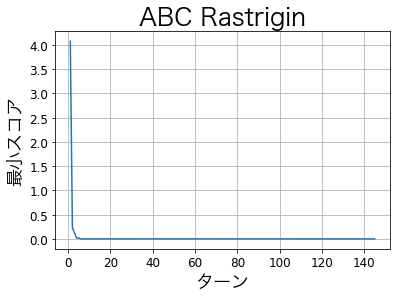


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 145, 'w': 0.21702045678400483, 'c1': 0.689520576745036, 'c2': 0.8287378129805041}
gb_place : [-1.47035034e-09 -1.11917503e-09]
gb_score : 0.0
計算時間 : 508 ms



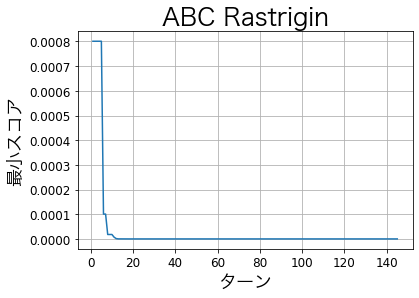


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 145, 'w': 0.21702045678400483, 'c1': 0.689520576745036, 'c2': 0.8287378129805041}
gb_place : [-9.66333841e-10 -1.60822463e-09]
gb_score : 0.0
計算時間 : 456 ms



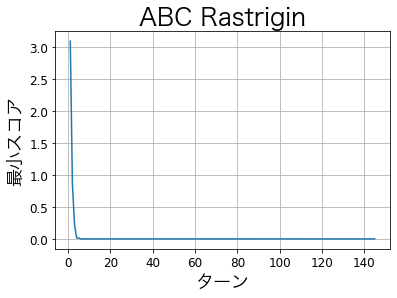

In [35]:
best_params = study.best_params
num_agent = best_params["num_agent"]
max_turn = best_params["max_turn"]
w = best_params["w"]
c1 = best_params["c1"]
c2 = best_params["c2"]

for _ in range(3) : 
    pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                    w, c1, c2, output_mode = output_mode)
    
    plot_score(function_number, pso.gb_record_list, "Rastrigin")

# Rosenbrock

In [37]:
# パラメータ
N = 10   # 次元
function_number = 3
limit_time = N * 500   # 計算時間の制限、制限時間は (次元) * 0.5秒
repeat_times = 3
output_mode = False   # 計算時間を短くしたいので、output_modeをFalseにしておく

# xの値域は自動化しておく
min_field_list = [-5.0, -5.0, -5.0, -600.0, -10.0, -5.0]
max_field_list = [5.0, 5.0, 10.0, 600.0, 10.0, 5.0]
min_field = min_field_list[function_number - 1]
max_field = max_field_list[function_number - 1]


# optunaに渡す関数
def objective(trial) : 
    num_agent = trial.suggest_int("num_agent", 10, 200)
    max_turn = trial.suggest_int("max_turn", 20, 500)
    w = trial.suggest_uniform("w", 0.0, 1.0)
    c1 = trial.suggest_uniform("c1", 0.0, 1.0)
    c2 = trial.suggest_uniform("c2", 0.0, 1.0)
    
    sum_score = 0.0   # これを最小化するのが目標
    for _ in range(repeat_times) :   # repeat_times回の合計をとる
        pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                      w, c1, c2, output_mode = output_mode)
        
        sum_score += pso.gb_score

        if pso.calculation_time > limit_time :   # 時間制限を超えたら罰則を与える
            # 計算時間に応じて罰則を与えたほうが学習が早く進むはず？
            sum_score += PENALTY * pso.calculation_time / limit_time
            
    return sum_score


# optunaを使う
study = optuna.create_study()
study.optimize(objective, n_trials = 100)

[I 2022-01-15 21:49:29,913] A new study created in memory with name: no-name-6c581ad4-dd5f-452e-804c-1b89d84c3a50



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 254, 'w': 0.6490420207285684, 'c1': 0.08781947665824608, 'c2': 0.8361869212230438}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 428 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 254, 'w': 0.6490420207285684, 'c1': 0.08781947665824608, 'c2': 0.8361869212230438}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 237 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:49:30,857] Trial 0 finished with value: 0.0 and parameters: {'num_agent': 50, 'max_turn': 254, 'w': 0.6490420207285684, 'c1': 0.08781947665824608, 'c2': 0.8361869212230438}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 254, 'w': 0.6490420207285684, 'c1': 0.08781947665824608, 'c2': 0.8361869212230438}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 257 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 414, 'w': 0.5566311944677667, 'c1': 0.2273438869258153, 'c2': 0.19907942808806278}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1117 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 414, 'w': 0.5566311944677667, 'c1': 0.2273438869258153, 'c2': 0.19907942808806278}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1008 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:49:34,045] Trial 1 finished with value: 3133.0 and parameters: {'num_agent': 135, 'max_turn': 414, 'w': 0.5566311944677667, 'c1': 0.2273438869258153, 'c2': 0.19907942808806278}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 414, 'w': 0.5566311944677667, 'c1': 0.2273438869258153, 'c2': 0.19907942808806278}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1008 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 61, 'max_turn': 257, 'w': 0.04393433351309961, 'c1': 0.08619103302839459, 'c2': 0.02921706551709713}
gb_place : [2.02923495 4.11636574]
gb_score : 1.059528706213802
計算時間 : 360 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 61, 'max_turn': 257, 'w': 0.04393433351309961, 'c1': 0.08619103302839459, 'c2': 0.02921706551709713}
gb_place : [1.27322006 1.58605249]
gb_score : 0.19740721650462395
計算時間 : 490 ms


------------------------------ PSO SI

[I 2022-01-15 21:49:35,372] Trial 2 finished with value: 1.8844135703921407 and parameters: {'num_agent': 61, 'max_turn': 257, 'w': 0.04393433351309961, 'c1': 0.08619103302839459, 'c2': 0.02921706551709713}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 61, 'max_turn': 257, 'w': 0.04393433351309961, 'c1': 0.08619103302839459, 'c2': 0.02921706551709713}
gb_place : [1.74971382 3.03592371]
gb_score : 0.6274776476737149
計算時間 : 447 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 128, 'max_turn': 260, 'w': 0.21830020078952217, 'c1': 0.5432091519284491, 'c2': 0.629125142036089}
gb_place : [1.01141033 1.0229801 ]
gb_score : 0.0001302811243909873
計算時間 : 1133 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 128, 'max_turn': 260, 'w': 0.21830020078952217, 'c1': 0.5432091519284491, 'c2': 0.629125142036089}
gb_place : [1.05538751 1.11426681]
gb_score : 0.0030857546686168707
計算時間 : 700 ms


---

[I 2022-01-15 21:49:38,019] Trial 3 finished with value: 1134.9503461247655 and parameters: {'num_agent': 128, 'max_turn': 260, 'w': 0.21830020078952217, 'c1': 0.5432091519284491, 'c2': 0.629125142036089}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 128, 'max_turn': 260, 'w': 0.21830020078952217, 'c1': 0.5432091519284491, 'c2': 0.629125142036089}
gb_place : [2.39486258 5.73922485]
gb_score : 1.9471300889724341
計算時間 : 775 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 322, 'w': 0.30396505445709876, 'c1': 0.32905945982766516, 'c2': 0.5257695341811618}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 645 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 322, 'w': 0.30396505445709876, 'c1': 0.32905945982766516, 'c2': 0.5257695341811618}
gb_place : [2.25810096 5.10204243]
gb_score : 1.5837315691323
計算時間 : 945 ms


------------------------------ PSO SIMULAT

[I 2022-01-15 21:49:40,407] Trial 4 finished with value: 1.610310636969392 and parameters: {'num_agent': 118, 'max_turn': 322, 'w': 0.30396505445709876, 'c1': 0.32905945982766516, 'c2': 0.5257695341811618}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 322, 'w': 0.30396505445709876, 'c1': 0.32905945982766516, 'c2': 0.5257695341811618}
gb_place : [1.16281507 1.35297746]
gb_score : 0.026579067837092088
計算時間 : 758 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 473, 'w': 0.8496146247096887, 'c1': 0.39946422860911934, 'c2': 0.3854750923611088}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1480 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 473, 'w': 0.8496146247096887, 'c1': 0.39946422860911934, 'c2': 0.3854750923611088}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1405 ms


------------------------------ PSO SIMULATION START!! ------------

[I 2022-01-15 21:49:44,750] Trial 5 finished with value: 4274.0 and parameters: {'num_agent': 158, 'max_turn': 473, 'w': 0.8496146247096887, 'c1': 0.39946422860911934, 'c2': 0.3854750923611088}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 473, 'w': 0.8496146247096887, 'c1': 0.39946422860911934, 'c2': 0.3854750923611088}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1389 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 139, 'w': 0.342269361303021, 'c1': 0.032345883316455826, 'c2': 0.12321784545872705}
gb_place : [1.00005783 1.00011647]
gb_score : 3.4093990692121142e-09
計算時間 : 256 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 139, 'w': 0.342269361303021, 'c1': 0.032345883316455826, 'c2': 0.12321784545872705}
gb_place : [1.00000064 1.00000121]
gb_score : 1.0359250860264573e-12
計算時間 : 237 ms


------------------------------ 

[I 2022-01-15 21:49:45,507] Trial 6 finished with value: 0.057767866417226144 and parameters: {'num_agent': 90, 'max_turn': 139, 'w': 0.342269361303021, 'c1': 0.032345883316455826, 'c2': 0.12321784545872705}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 139, 'w': 0.342269361303021, 'c1': 0.032345883316455826, 'c2': 0.12321784545872705}
gb_place : [1.23947877 1.53835159]
gb_score : 0.05776786300679115
計算時間 : 245 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 425, 'w': 0.7265516284109622, 'c1': 0.7317898364468599, 'c2': 0.13895550557526926}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1263 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 425, 'w': 0.7265516284109622, 'c1': 0.7317898364468599, 'c2': 0.13895550557526926}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1272 ms


------------------------------ PSO SIMULATION START!! --------------

[I 2022-01-15 21:49:49,354] Trial 7 finished with value: 3783.0 and parameters: {'num_agent': 171, 'max_turn': 425, 'w': 0.7265516284109622, 'c1': 0.7317898364468599, 'c2': 0.13895550557526926}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 425, 'w': 0.7265516284109622, 'c1': 0.7317898364468599, 'c2': 0.13895550557526926}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1248 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 405, 'w': 0.3098853322721088, 'c1': 0.09181558904268705, 'c2': 0.5606090822906752}
gb_place : [0.99577318 0.99154315]
gb_score : 1.7910411103311095e-05
計算時間 : 992 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 405, 'w': 0.3098853322721088, 'c1': 0.09181558904268705, 'c2': 0.5606090822906752}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 820 ms


------------------------------ PSO SIMULATION START!! ------------

[I 2022-01-15 21:49:52,122] Trial 8 finished with value: 0.535817226147316 and parameters: {'num_agent': 135, 'max_turn': 405, 'w': 0.3098853322721088, 'c1': 0.09181558904268705, 'c2': 0.5606090822906752}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 405, 'w': 0.3098853322721088, 'c1': 0.09181558904268705, 'c2': 0.5606090822906752}
gb_place : [1.73126182 3.00051629]
gb_score : 0.5357993157362126
計算時間 : 899 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 27, 'w': 0.4136467491749791, 'c1': 0.46607170670182596, 'c2': 0.9904715860342357}
gb_place : [0.99999771 0.99999502]
gb_score : 2.1794754860789107e-11
計算時間 : 90 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 27, 'w': 0.4136467491749791, 'c1': 0.46607170670182596, 'c2': 0.9904715860342357}
gb_place : [1.00000206 1.00000438]
gb_score : 1.0997542058755993e-11
計算時間 : 85 ms




[I 2022-01-15 21:49:52,395] Trial 9 finished with value: 3.425601762591958e-11 and parameters: {'num_agent': 163, 'max_turn': 27, 'w': 0.4136467491749791, 'c1': 0.46607170670182596, 'c2': 0.9904715860342357}. Best is trial 0 with value: 0.0.
[I 2022-01-15 21:49:52,501] Trial 10 finished with value: 0.01841436218177965 and parameters: {'num_agent': 14, 'max_turn': 121, 'w': 0.9512642419584372, 'c1': 0.9447214722472396, 'c2': 0.9662446240971354}. Best is trial 0 with value: 0.0.


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 27, 'w': 0.4136467491749791, 'c1': 0.46607170670182596, 'c2': 0.9904715860342357}
gb_place : [1.00000089 1.0000017 ]
gb_score : 1.463720706374477e-12
計算時間 : 84 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 14, 'max_turn': 121, 'w': 0.9512642419584372, 'c1': 0.9447214722472396, 'c2': 0.9662446240971354}
gb_place : [0.93087498 0.85733683]
gb_score : 0.01322646189760868
計算時間 : 27 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 14, 'max_turn': 121, 'w': 0.9512642419584372, 'c1': 0.9447214722472396, 'c2': 0.9662446240971354}
gb_plac

[I 2022-01-15 21:49:53,209] Trial 11 finished with value: 2.6210325548727014e-14 and parameters: {'num_agent': 196, 'max_turn': 60, 'w': 0.5684447466926245, 'c1': 0.6075550747627956, 'c2': 0.9888341112703387}. Best is trial 0 with value: 0.0.
[I 2022-01-15 21:49:53,253] Trial 12 finished with value: 15.280930269565216 and parameters: {'num_agent': 20, 'max_turn': 21, 'w': 0.6006514757617396, 'c1': 0.6645915019917732, 'c2': 0.8064121222793399}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 196, 'max_turn': 60, 'w': 0.5684447466926245, 'c1': 0.6075550747627956, 'c2': 0.9888341112703387}
gb_place : [0.99999992 0.99999985]
gb_score : 5.9806420158576446e-15
計算時間 : 225 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 20, 'max_turn': 21, 'w': 0.6006514757617396, 'c1': 0.6645915019917732, 'c2': 0.8064121222793399}
gb_place : [-2.85978952  8.19245933]
gb_score : 14.917752629075185
計算時間 : 11 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 20, 'max_turn': 21, 'w': 0.6006514757617396, 'c1': 0.6645915019917732, 'c2': 0.8064121222793399}
gb_place : [1.01979906 1.04171323]
gb_score : 0.0006889116177098776
計算時間 : 10 ms


----------

[I 2022-01-15 21:49:54,659] Trial 13 finished with value: 4.741620169290199e-19 and parameters: {'num_agent': 200, 'max_turn': 126, 'w': 0.7358956065134158, 'c1': 0.9042199333019455, 'c2': 0.8624647889389577}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 126, 'w': 0.7358956065134158, 'c1': 0.9042199333019455, 'c2': 0.8624647889389577}
gb_place : [1. 1.]
gb_score : 1.0712617226548913e-20
計算時間 : 452 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 190, 'w': 0.7651757848899892, 'c1': 0.9996784484144916, 'c2': 0.7835863957248539}
gb_place : [1. 1.]
gb_score : 2.1518597569463402e-24
計算時間 : 161 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:49:55,154] Trial 14 finished with value: 1.735083108353361e-22 and parameters: {'num_agent': 47, 'max_turn': 190, 'w': 0.7651757848899892, 'c1': 0.9996784484144916, 'c2': 0.7835863957248539}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 190, 'w': 0.7651757848899892, 'c1': 0.9996784484144916, 'c2': 0.7835863957248539}
gb_place : [1. 1.]
gb_score : 2.7147723606807815e-24
計算時間 : 158 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 190, 'w': 0.7651757848899892, 'c1': 0.9996784484144916, 'c2': 0.7835863957248539}
gb_place : [1. 1.]
gb_score : 1.6864167871770897e-22
計算時間 : 158 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 54, 'max_turn': 244, 'w': 0.9844961656559559, 'c1': 0.7827957692401923, 'c2': 0.704497391185075}
gb_place : [1.0188297  1.03687783]
gb_score : 0.00048363975957603825
計算時間 : 239 ms


------------------------------ PSO S

[I 2022-01-15 21:49:55,869] Trial 15 finished with value: 0.0004974292466035537 and parameters: {'num_agent': 54, 'max_turn': 244, 'w': 0.9844961656559559, 'c1': 0.7827957692401923, 'c2': 0.704497391185075}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 54, 'max_turn': 244, 'w': 0.9844961656559559, 'c1': 0.7827957692401923, 'c2': 0.704497391185075}
gb_place : [0.9999483  0.99963325]
gb_score : 6.938278343735632e-06
計算時間 : 224 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 54, 'max_turn': 244, 'w': 0.9844961656559559, 'c1': 0.7827957692401923, 'c2': 0.704497391185075}
gb_place : [0.99848416 0.99718401]
gb_score : 6.851208683779854e-06
計算時間 : 230 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 195, 'w': 0.7211401909002247, 'c1': 0.21878711905236503, 'c2': 0.7687975338821518}
gb_place : [1. 1.]
gb_score : 1.8415723639303283e-26
計算時間 : 157 ms


----------------------

[I 2022-01-15 21:49:56,347] Trial 16 finished with value: 8.742009872834688e-26 and parameters: {'num_agent': 43, 'max_turn': 195, 'w': 0.7211401909002247, 'c1': 0.21878711905236503, 'c2': 0.7687975338821518}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 195, 'w': 0.7211401909002247, 'c1': 0.21878711905236503, 'c2': 0.7687975338821518}
gb_place : [1. 1.]
gb_score : 6.350276052841911e-26
計算時間 : 151 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 195, 'w': 0.7211401909002247, 'c1': 0.21878711905236503, 'c2': 0.7687975338821518}
gb_place : [1. 1.]
gb_score : 5.501614560624489e-27
計算時間 : 150 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 324, 'w': 0.6510991128970821, 'c1': 0.17990507372156278, 'c2': 0.3618613091279049}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 466 ms


------------------------------ PSO SIMULATION START!! ---------------

[I 2022-01-15 21:49:57,759] Trial 17 finished with value: 0.0 and parameters: {'num_agent': 85, 'max_turn': 324, 'w': 0.6510991128970821, 'c1': 0.17990507372156278, 'c2': 0.3618613091279049}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 324, 'w': 0.6510991128970821, 'c1': 0.17990507372156278, 'c2': 0.3618613091279049}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 457 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 82, 'max_turn': 344, 'w': 0.47559562467601957, 'c1': 0.1970610536409939, 'c2': 0.3869093256241279}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 469 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 82, 'max_turn': 344, 'w': 0.47559562467601957, 'c1': 0.1970610536409939, 'c2': 0.3869093256241279}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 472 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:49:59,272] Trial 18 finished with value: 0.06266721220067385 and parameters: {'num_agent': 82, 'max_turn': 344, 'w': 0.47559562467601957, 'c1': 0.1970610536409939, 'c2': 0.3869093256241279}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 82, 'max_turn': 344, 'w': 0.47559562467601957, 'c1': 0.1970610536409939, 'c2': 0.3869093256241279}
gb_place : [1.25014512 1.56383561]
gb_score : 0.06266721220067385
計算時間 : 533 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 86, 'max_turn': 327, 'w': 0.6471394334106232, 'c1': 0.010115869060529414, 'c2': 0.37196328588247973}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 477 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 86, 'max_turn': 327, 'w': 0.6471394334106232, 'c1': 0.010115869060529414, 'c2': 0.37196328588247973}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 463 ms


------------------------------ PSO SIMULATION START!! ---------------

[I 2022-01-15 21:50:00,716] Trial 19 finished with value: 0.0 and parameters: {'num_agent': 86, 'max_turn': 327, 'w': 0.6471394334106232, 'c1': 0.010115869060529414, 'c2': 0.37196328588247973}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 86, 'max_turn': 327, 'w': 0.6471394334106232, 'c1': 0.010115869060529414, 'c2': 0.37196328588247973}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 467 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 366, 'w': 0.858238023388921, 'c1': 0.34337478992638465, 'c2': 0.2737809108510214}
gb_place : [1. 1.]
gb_score : 6.11371638888876e-26
計算時間 : 463 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 366, 'w': 0.858238023388921, 'c1': 0.34337478992638465, 'c2': 0.2737809108510214}
gb_place : [1. 1.]
gb_score : 9.805289109445572e-25
計算時間 : 454 ms


------------------------------ PSO SIMULATION START!! ----------------

[I 2022-01-15 21:50:02,131] Trial 20 finished with value: 1.0887723614468452e-24 and parameters: {'num_agent': 71, 'max_turn': 366, 'w': 0.858238023388921, 'c1': 0.34337478992638465, 'c2': 0.2737809108510214}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 366, 'w': 0.858238023388921, 'c1': 0.34337478992638465, 'c2': 0.2737809108510214}
gb_place : [1. 1.]
gb_score : 4.710628661340038e-26
計算時間 : 464 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 103, 'max_turn': 302, 'w': 0.6448448169016053, 'c1': 0.004970398797622927, 'c2': 0.39574761281086224}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 532 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 103, 'max_turn': 302, 'w': 0.6448448169016053, 'c1': 0.004970398797622927, 'c2': 0.39574761281086224}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 535 ms


------------------------------ PSO SIMULATION START!! ----------------------------

[I 2022-01-15 21:50:03,766] Trial 21 finished with value: 0.0 and parameters: {'num_agent': 103, 'max_turn': 302, 'w': 0.6448448169016053, 'c1': 0.004970398797622927, 'c2': 0.39574761281086224}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 103, 'max_turn': 302, 'w': 0.6448448169016053, 'c1': 0.004970398797622927, 'c2': 0.39574761281086224}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 527 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 293, 'w': 0.6491027851396892, 'c1': 0.1426928740615406, 'c2': 0.29788674120951747}
gb_place : [0.99857465 0.99716459]
gb_score : 2.0491802879803686e-06
計算時間 : 650 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 293, 'w': 0.6491027851396892, 'c1': 0.1426928740615406, 'c2': 0.29788674120951747}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 487 ms


------------------------------ PSO SIMULATION START!! -------------

[I 2022-01-15 21:50:05,440] Trial 22 finished with value: 2.0491802879803686e-06 and parameters: {'num_agent': 98, 'max_turn': 293, 'w': 0.6491027851396892, 'c1': 0.1426928740615406, 'c2': 0.29788674120951747}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 293, 'w': 0.6491027851396892, 'c1': 0.1426928740615406, 'c2': 0.29788674120951747}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 494 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 375, 'w': 0.48114341015299156, 'c1': 0.015990301739902263, 'c2': 0.4533926419874539}
gb_place : [0.85713851 0.73420678]
gb_score : 0.02043241129307768
計算時間 : 239 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 375, 'w': 0.48114341015299156, 'c1': 0.015990301739902263, 'c2': 0.4533926419874539}
gb_place : [1.12819197 1.27317761]
gb_score : 0.016446176018536998
計算時間 : 205 ms




[I 2022-01-15 21:50:06,111] Trial 23 finished with value: 0.042079073487353215 and parameters: {'num_agent': 33, 'max_turn': 375, 'w': 0.48114341015299156, 'c1': 0.015990301739902263, 'c2': 0.4533926419874539}. Best is trial 0 with value: 0.0.


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 375, 'w': 0.48114341015299156, 'c1': 0.015990301739902263, 'c2': 0.4533926419874539}
gb_place : [1.07206651 1.14958936]
gb_score : 0.005200486175738534
計算時間 : 205 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 110, 'max_turn': 224, 'w': 0.8630518215430236, 'c1': 0.04543698549633516, 'c2': 0.472212673226951}
gb_place : [0.99999992 0.99999984]
gb_score : 7.810125930728066e-15
計算時間 : 439 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 110, 'max_turn': 224, 'w': 0.8630518215430236, 'c1': 0.04543698549633516, 'c2': 0.472212673226951}


[I 2022-01-15 21:50:07,465] Trial 24 finished with value: 2.2324867705321432e-14 and parameters: {'num_agent': 110, 'max_turn': 224, 'w': 0.8630518215430236, 'c1': 0.04543698549633516, 'c2': 0.472212673226951}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 110, 'max_turn': 224, 'w': 0.8630518215430236, 'c1': 0.04543698549633516, 'c2': 0.472212673226951}
gb_place : [1.00000009 1.00000019]
gb_score : 1.4354297715093326e-14
計算時間 : 443 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 72, 'max_turn': 298, 'w': 0.6309832499220899, 'c1': 0.0010905812525530134, 'c2': 0.6107553213500417}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 368 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 72, 'max_turn': 298, 'w': 0.6309832499220899, 'c1': 0.0010905812525530134, 'c2': 0.6107553213500417}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 372 ms


------------------------------ PSO SIMULATION START!! ------------

[I 2022-01-15 21:50:08,612] Trial 25 finished with value: 0.0 and parameters: {'num_agent': 72, 'max_turn': 298, 'w': 0.6309832499220899, 'c1': 0.0010905812525530134, 'c2': 0.6107553213500417}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 72, 'max_turn': 298, 'w': 0.6309832499220899, 'c1': 0.0010905812525530134, 'c2': 0.6107553213500417}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 372 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 100, 'max_turn': 291, 'w': 0.5221936442637455, 'c1': 0.28865485007440705, 'c2': 0.27958865252412035}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 532 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 100, 'max_turn': 291, 'w': 0.5221936442637455, 'c1': 0.28865485007440705, 'c2': 0.27958865252412035}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 509 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:10,208] Trial 26 finished with value: 0.0 and parameters: {'num_agent': 100, 'max_turn': 291, 'w': 0.5221936442637455, 'c1': 0.28865485007440705, 'c2': 0.27958865252412035}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 100, 'max_turn': 291, 'w': 0.5221936442637455, 'c1': 0.28865485007440705, 'c2': 0.27958865252412035}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 514 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 474, 'w': 0.8037981211681937, 'c1': 0.12856610263548132, 'c2': 0.4650295729871889}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 572 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 474, 'w': 0.8037981211681937, 'c1': 0.12856610263548132, 'c2': 0.4650295729871889}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 593 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:12,009] Trial 27 finished with value: 0.0 and parameters: {'num_agent': 70, 'max_turn': 474, 'w': 0.8037981211681937, 'c1': 0.12856610263548132, 'c2': 0.4650295729871889}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 474, 'w': 0.8037981211681937, 'c1': 0.12856610263548132, 'c2': 0.4650295729871889}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 589 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 29, 'max_turn': 279, 'w': 0.4477015529010339, 'c1': 0.0760868535934523, 'c2': 0.612537435856051}
gb_place : [1.18946302 1.41473388]
gb_score : 0.03589701705828045
計算時間 : 163 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:12,529] Trial 28 finished with value: 0.20679049451684145 and parameters: {'num_agent': 29, 'max_turn': 279, 'w': 0.4477015529010339, 'c1': 0.0760868535934523, 'c2': 0.612537435856051}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 29, 'max_turn': 279, 'w': 0.4477015529010339, 'c1': 0.0760868535934523, 'c2': 0.612537435856051}
gb_place : [0.99997834 0.99995672]
gb_score : 4.693856199154273e-10
計算時間 : 167 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 29, 'max_turn': 279, 'w': 0.4477015529010339, 'c1': 0.0760868535934523, 'c2': 0.612537435856051}
gb_place : [0.58683959 0.34576619]
gb_score : 0.17089347698917537
計算時間 : 166 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 63, 'max_turn': 203, 'w': 0.5426653253795221, 'c1': 0.29092714829036853, 'c2': 0.8929203655304322}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 229 ms


------------------------------ PSO SIMULATI

[I 2022-01-15 21:50:13,239] Trial 29 finished with value: 0.0 and parameters: {'num_agent': 63, 'max_turn': 203, 'w': 0.5426653253795221, 'c1': 0.29092714829036853, 'c2': 0.8929203655304322}. Best is trial 0 with value: 0.0.



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 488, 'w': 0.5311980112219841, 'c1': 0.2684751414032183, 'c2': 0.2749536666305893}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 979 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 488, 'w': 0.5311980112219841, 'c1': 0.2684751414032183, 'c2': 0.2749536666305893}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 957 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:16,198] Trial 30 finished with value: 0.0 and parameters: {'num_agent': 118, 'max_turn': 488, 'w': 0.5311980112219841, 'c1': 0.2684751414032183, 'c2': 0.2749536666305893}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 488, 'w': 0.5311980112219841, 'c1': 0.2684751414032183, 'c2': 0.2749536666305893}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 958 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 73, 'max_turn': 412, 'w': 0.8223622028670513, 'c1': 0.14249645467936795, 'c2': 0.6771348394263494}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 535 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 73, 'max_turn': 412, 'w': 0.8223622028670513, 'c1': 0.14249645467936795, 'c2': 0.6771348394263494}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 533 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:17,866] Trial 31 finished with value: 0.0 and parameters: {'num_agent': 73, 'max_turn': 412, 'w': 0.8223622028670513, 'c1': 0.14249645467936795, 'c2': 0.6771348394263494}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 73, 'max_turn': 412, 'w': 0.8223622028670513, 'c1': 0.14249645467936795, 'c2': 0.6771348394263494}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 557 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 61, 'max_turn': 188, 'w': 0.5232900662588245, 'c1': 0.28234991606431453, 'c2': 0.9139286854556737}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 204 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:18,518] Trial 32 finished with value: 0.0 and parameters: {'num_agent': 61, 'max_turn': 188, 'w': 0.5232900662588245, 'c1': 0.28234991606431453, 'c2': 0.9139286854556737}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 61, 'max_turn': 188, 'w': 0.5232900662588245, 'c1': 0.28234991606431453, 'c2': 0.9139286854556737}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 216 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 61, 'max_turn': 188, 'w': 0.5232900662588245, 'c1': 0.28234991606431453, 'c2': 0.9139286854556737}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 204 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 490, 'w': 0.38701875300865163, 'c1': 0.4491971002053943, 'c2': 0.2146772126695291}
gb_place : [1.00000003 1.00000007]
gb_score : 1.188496174533842e-15
計算時間 : 1236 ms


------------------------------ PSO SIMULATION START!! ---------------

[I 2022-01-15 21:50:22,487] Trial 33 finished with value: 3887.0046992021976 and parameters: {'num_agent': 136, 'max_turn': 490, 'w': 0.38701875300865163, 'c1': 0.4491971002053943, 'c2': 0.2146772126695291}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 490, 'w': 0.38701875300865163, 'c1': 0.4491971002053943, 'c2': 0.2146772126695291}
gb_place : [1.00014757 1.00029636]
gb_score : 2.1919534685617264e-08
計算時間 : 1290 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 443, 'w': 0.20951427472247786, 'c1': 0.25959839772082827, 'c2': 0.7134014419905532}
gb_place : [1.0503141  1.10343084]
gb_score : 0.0025388598768150243
計算時間 : 1122 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 443, 'w': 0.20951427472247786, 'c1': 0.25959839772082827, 'c2': 0.7134014419905532}
gb_place : [0.9991059  0.99820996]
gb_score : 8.001106430180249e-07
計算時間 : 1162

[I 2022-01-15 21:50:25,888] Trial 34 finished with value: 3328.0742521108373 and parameters: {'num_agent': 120, 'max_turn': 443, 'w': 0.20951427472247786, 'c1': 0.25959839772082827, 'c2': 0.7134014419905532}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 443, 'w': 0.20951427472247786, 'c1': 0.25959839772082827, 'c2': 0.7134014419905532}
gb_place : [1.26759504 1.60782356]
gb_score : 0.0717124508495931
計算時間 : 1044 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 54, 'max_turn': 157, 'w': 0.9384385856602919, 'c1': 0.3749324699562776, 'c2': 0.8986186208419703}
gb_place : [0.99690497 0.99387754]
gb_score : 9.915844372247736e-06
計算時間 : 168 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 54, 'max_turn': 157, 'w': 0.9384385856602919, 'c1': 0.3749324699562776, 'c2': 0.8986186208419703}
gb_place : [0.99570983 0.99177226]
gb_score : 2.957376640307151e-05
計算時間 : 175 ms


-----

[I 2022-01-15 21:50:26,445] Trial 35 finished with value: 4.897102231128785e-05 and parameters: {'num_agent': 54, 'max_turn': 157, 'w': 0.9384385856602919, 'c1': 0.3749324699562776, 'c2': 0.8986186208419703}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 54, 'max_turn': 157, 'w': 0.9384385856602919, 'c1': 0.3749324699562776, 'c2': 0.8986186208419703}
gb_place : [1.00164113 1.00302442]
gb_score : 9.481411535968604e-06
計算時間 : 187 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 42, 'max_turn': 85, 'w': 0.574440545809279, 'c1': 0.13890768769363615, 'c2': 0.0032409474408757744}
gb_place : [0.02224547 0.07300259]
gb_score : 1.4817409942109183
計算時間 : 91 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 42, 'max_turn': 85, 'w': 0.574440545809279, 'c1': 0.13890768769363615, 'c2': 0.0032409474408757744}
gb_place : [0.49434614 0.54036743]
gb_score : 9.016654117014204
計算時間 : 87 ms


-----------

[I 2022-01-15 21:50:26,729] Trial 36 finished with value: 11.774590126817062 and parameters: {'num_agent': 42, 'max_turn': 85, 'w': 0.574440545809279, 'c1': 0.13890768769363615, 'c2': 0.0032409474408757744}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 42, 'max_turn': 85, 'w': 0.574440545809279, 'c1': 0.13890768769363615, 'c2': 0.0032409474408757744}
gb_place : [-0.07612389 -0.02857845]
gb_score : 1.2761950155919393
計算時間 : 87 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 58, 'max_turn': 249, 'w': 0.7065649320320968, 'c1': 0.5288882008533868, 'c2': 0.6835754637802456}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 302 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 58, 'max_turn': 249, 'w': 0.7065649320320968, 'c1': 0.5288882008533868, 'c2': 0.6835754637802456}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 295 ms


------------------------------ PSO SIMULATION START!! --------------------

[I 2022-01-15 21:50:27,692] Trial 37 finished with value: 0.0 and parameters: {'num_agent': 58, 'max_turn': 249, 'w': 0.7065649320320968, 'c1': 0.5288882008533868, 'c2': 0.6835754637802456}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 58, 'max_turn': 249, 'w': 0.7065649320320968, 'c1': 0.5288882008533868, 'c2': 0.6835754637802456}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 328 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 500, 'w': 0.22246589985083037, 'c1': 0.2322861344387116, 'c2': 0.9298786683600255}
gb_place : [1.05230931 1.10757113]
gb_score : 0.0027409402503384825
計算時間 : 773 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 500, 'w': 0.22246589985083037, 'c1': 0.2322861344387116, 'c2': 0.9298786683600255}
gb_place : [2.99615377 8.98124381]
gb_score : 3.986484374854922
計算時間 : 691 ms


------------------------------ PSO SIMULAT

[I 2022-01-15 21:50:29,895] Trial 38 finished with value: 3.989225315105261 and parameters: {'num_agent': 77, 'max_turn': 500, 'w': 0.22246589985083037, 'c1': 0.2322861344387116, 'c2': 0.9298786683600255}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 500, 'w': 0.22246589985083037, 'c1': 0.2322861344387116, 'c2': 0.9298786683600255}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 682 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 446, 'w': 0.8084410816789857, 'c1': 0.4244705488493095, 'c2': 0.8535864419985282}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1334 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 446, 'w': 0.8084410816789857, 'c1': 0.4244705488493095, 'c2': 0.8535864419985282}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1361 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:33,955] Trial 39 finished with value: 3986.0 and parameters: {'num_agent': 149, 'max_turn': 446, 'w': 0.8084410816789857, 'c1': 0.4244705488493095, 'c2': 0.8535864419985282}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 446, 'w': 0.8084410816789857, 'c1': 0.4244705488493095, 'c2': 0.8535864419985282}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1291 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 57, 'max_turn': 241, 'w': 0.697126217058988, 'c1': 0.5453761377703452, 'c2': 0.6812519687626941}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 273 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 57, 'max_turn': 241, 'w': 0.697126217058988, 'c1': 0.5453761377703452, 'c2': 0.6812519687626941}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 264 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:34,797] Trial 40 finished with value: 0.0 and parameters: {'num_agent': 57, 'max_turn': 241, 'w': 0.697126217058988, 'c1': 0.5453761377703452, 'c2': 0.6812519687626941}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 57, 'max_turn': 241, 'w': 0.697126217058988, 'c1': 0.5453761377703452, 'c2': 0.6812519687626941}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 274 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 32, 'max_turn': 266, 'w': 0.6951493848944026, 'c1': 0.537173894702383, 'c2': 0.6569217373211935}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 172 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:35,313] Trial 41 finished with value: 0.0 and parameters: {'num_agent': 32, 'max_turn': 266, 'w': 0.6951493848944026, 'c1': 0.537173894702383, 'c2': 0.6569217373211935}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 32, 'max_turn': 266, 'w': 0.6951493848944026, 'c1': 0.537173894702383, 'c2': 0.6569217373211935}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 163 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 32, 'max_turn': 266, 'w': 0.6951493848944026, 'c1': 0.537173894702383, 'c2': 0.6569217373211935}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 158 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 64, 'max_turn': 159, 'w': 0.5219474999270418, 'c1': 0.3355062686120103, 'c2': 0.727570897126292}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 196 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:36,014] Trial 42 finished with value: 6.803438144274276e-06 and parameters: {'num_agent': 64, 'max_turn': 159, 'w': 0.5219474999270418, 'c1': 0.3355062686120103, 'c2': 0.727570897126292}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 64, 'max_turn': 159, 'w': 0.5219474999270418, 'c1': 0.3355062686120103, 'c2': 0.727570897126292}
gb_place : [0.99739354 0.99478397]
gb_score : 6.803438144274276e-06
計算時間 : 290 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 64, 'max_turn': 159, 'w': 0.5219474999270418, 'c1': 0.3355062686120103, 'c2': 0.727570897126292}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 189 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 55, 'max_turn': 237, 'w': 0.902630361721506, 'c1': 0.5961313823916016, 'c2': 0.5663523510187305}
gb_place : [1.00000092 1.00000163]
gb_score : 5.497111415729115e-12
計算時間 : 244 ms


------------------------------ PSO SIMULATI

[I 2022-01-15 21:50:36,759] Trial 43 finished with value: 3.480234980945374e-08 and parameters: {'num_agent': 55, 'max_turn': 237, 'w': 0.902630361721506, 'c1': 0.5961313823916016, 'c2': 0.5663523510187305}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 55, 'max_turn': 237, 'w': 0.902630361721506, 'c1': 0.5961313823916016, 'c2': 0.5663523510187305}
gb_place : [1.00015905 1.00032788]
gb_score : 3.479261648269312e-08
計算時間 : 234 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 28, 'max_turn': 262, 'w': 0.6826489151749683, 'c1': 0.4993134273953117, 'c2': 0.6410112465265001}
gb_place : [2.27667775 5.18614312]
gb_score : 1.6307364057469118
計算時間 : 144 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:37,210] Trial 44 finished with value: 1.776556605421666 and parameters: {'num_agent': 28, 'max_turn': 262, 'w': 0.6826489151749683, 'c1': 0.4993134273953117, 'c2': 0.6410112465265001}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 28, 'max_turn': 262, 'w': 0.6826489151749683, 'c1': 0.4993134273953117, 'c2': 0.6410112465265001}
gb_place : [1.18330397 1.40327357]
gb_score : 0.03453993964764537
計算時間 : 141 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 28, 'max_turn': 262, 'w': 0.6826489151749683, 'c1': 0.4993134273953117, 'c2': 0.6410112465265001}
gb_place : [1.33358695 1.77844757]
gb_score : 0.11128026002710878
計算時間 : 137 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 88, 'max_turn': 331, 'w': 0.6193431698195846, 'c1': 0.1110149706069297, 'c2': 0.3441809578036811}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 496 ms


------------------------------ PSO SIMULATIO

[I 2022-01-15 21:50:38,749] Trial 45 finished with value: 0.0 and parameters: {'num_agent': 88, 'max_turn': 331, 'w': 0.6193431698195846, 'c1': 0.1110149706069297, 'c2': 0.3441809578036811}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 88, 'max_turn': 331, 'w': 0.6193431698195846, 'c1': 0.1110149706069297, 'c2': 0.3441809578036811}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 501 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 38, 'max_turn': 213, 'w': 0.6939012572730942, 'c1': 0.5402473438577721, 'c2': 0.8160046500713627}
gb_place : [1. 1.]
gb_score : 1.0794306316402626e-18
計算時間 : 152 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:39,231] Trial 46 finished with value: 1.0794306316402626e-18 and parameters: {'num_agent': 38, 'max_turn': 213, 'w': 0.6939012572730942, 'c1': 0.5402473438577721, 'c2': 0.8160046500713627}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 38, 'max_turn': 213, 'w': 0.6939012572730942, 'c1': 0.5402473438577721, 'c2': 0.8160046500713627}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 154 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 38, 'max_turn': 213, 'w': 0.6939012572730942, 'c1': 0.5402473438577721, 'c2': 0.8160046500713627}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 151 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 313, 'w': 0.6210300950067362, 'c1': 0.05517364094023679, 'c2': 0.34746366623720026}
gb_place : [0.99964985 0.99929837]
gb_score : 1.2281591896693213e-07
計算時間 : 709 ms


------------------------------ PSO SIMULATION START!! -----------------

[I 2022-01-15 21:50:41,060] Trial 47 finished with value: 1.850139894614283e-05 and parameters: {'num_agent': 96, 'max_turn': 313, 'w': 0.6210300950067362, 'c1': 0.05517364094023679, 'c2': 0.34746366623720026}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 313, 'w': 0.6210300950067362, 'c1': 0.05517364094023679, 'c2': 0.34746366623720026}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 510 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 105, 'max_turn': 358, 'w': 0.7730033043158029, 'c1': 0.1702543800082038, 'c2': 0.1519299711231954}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 694 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 105, 'max_turn': 358, 'w': 0.7730033043158029, 'c1': 0.1702543800082038, 'c2': 0.1519299711231954}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 687 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:43,157] Trial 48 finished with value: 0.0 and parameters: {'num_agent': 105, 'max_turn': 358, 'w': 0.7730033043158029, 'c1': 0.1702543800082038, 'c2': 0.1519299711231954}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 105, 'max_turn': 358, 'w': 0.7730033043158029, 'c1': 0.1702543800082038, 'c2': 0.1519299711231954}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 667 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 10, 'max_turn': 261, 'w': 0.7067832513355266, 'c1': 0.6962296245523112, 'c2': 0.5298298956514096}
gb_place : [-0.1109554   0.01439779]
gb_score : 1.2346573237906984
計算時間 : 57 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 10, 'max_turn': 261, 'w': 0.7067832513355266, 'c1': 0.6962296245523112, 'c2': 0.5298298956514096}
gb_place : [0.63403722 0.39222427]
gb_score : 0.1434914946477834
計算時間 : 65 ms


------------------------------ PSO SIMULATION

[I 2022-01-15 21:50:43,350] Trial 49 finished with value: 1.568849525532754 and parameters: {'num_agent': 10, 'max_turn': 261, 'w': 0.7067832513355266, 'c1': 0.6962296245523112, 'c2': 0.5298298956514096}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 10, 'max_turn': 261, 'w': 0.7067832513355266, 'c1': 0.6962296245523112, 'c2': 0.5298298956514096}
gb_place : [0.56533368 0.32380443]
gb_score : 0.19070070709427217
計算時間 : 54 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 110, 'max_turn': 381, 'w': 0.751925202664337, 'c1': 0.08350829568605483, 'c2': 0.0906156253903134}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 765 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 110, 'max_turn': 381, 'w': 0.751925202664337, 'c1': 0.08350829568605483, 'c2': 0.0906156253903134}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 778 ms


------------------------------ PSO SIMULATION START!! ---------------------

[I 2022-01-15 21:50:45,728] Trial 50 finished with value: 0.0 and parameters: {'num_agent': 110, 'max_turn': 381, 'w': 0.751925202664337, 'c1': 0.08350829568605483, 'c2': 0.0906156253903134}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 110, 'max_turn': 381, 'w': 0.751925202664337, 'c1': 0.08350829568605483, 'c2': 0.0906156253903134}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 776 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 24, 'max_turn': 343, 'w': 0.7674544870068071, 'c1': 0.603620765821475, 'c2': 0.7636116396108215}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 156 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:50:46,212] Trial 51 finished with value: 0.0 and parameters: {'num_agent': 24, 'max_turn': 343, 'w': 0.7674544870068071, 'c1': 0.603620765821475, 'c2': 0.7636116396108215}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 24, 'max_turn': 343, 'w': 0.7674544870068071, 'c1': 0.603620765821475, 'c2': 0.7636116396108215}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 155 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 24, 'max_turn': 343, 'w': 0.7674544870068071, 'c1': 0.603620765821475, 'c2': 0.7636116396108215}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 148 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 52, 'max_turn': 271, 'w': 0.6044741191217377, 'c1': 0.5576348740482228, 'c2': 0.17489795097292274}
gb_place : [1.55542666 2.41157866]
gb_score : 0.3145413983733074
計算時間 : 265 ms


------------------------------ PSO SIMULATION START!! ------------------------

[I 2022-01-15 21:50:47,039] Trial 52 finished with value: 1.357487253523277 and parameters: {'num_agent': 52, 'max_turn': 271, 'w': 0.6044741191217377, 'c1': 0.5576348740482228, 'c2': 0.17489795097292274}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 52, 'max_turn': 271, 'w': 0.6044741191217377, 'c1': 0.5576348740482228, 'c2': 0.17489795097292274}
gb_place : [2.00042269 4.00102248]
gb_score : 1.000890253458705
計算時間 : 269 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 68, 'max_turn': 220, 'w': 0.7998764295227629, 'c1': 0.7962906609398319, 'c2': 0.4291014814254002}
gb_place : [1. 1.]
gb_score : 7.635716193263195e-21
計算時間 : 273 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 68, 'max_turn': 220, 'w': 0.7998764295227629, 'c1': 0.7962906609398319, 'c2': 0.4291014814254002}
gb_place : [1. 1.]
gb_score : 1.1620581204023484e-21
計算時間 : 269 ms


------------------------------ PSO SIMUL

[I 2022-01-15 21:50:47,898] Trial 53 finished with value: 8.892917644152892e-21 and parameters: {'num_agent': 68, 'max_turn': 220, 'w': 0.7998764295227629, 'c1': 0.7962906609398319, 'c2': 0.4291014814254002}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 68, 'max_turn': 220, 'w': 0.7998764295227629, 'c1': 0.7962906609398319, 'c2': 0.4291014814254002}
gb_place : [1. 1.]
gb_score : 9.51433304873484e-23
計算時間 : 283 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 460, 'w': 0.5635574510449839, 'c1': 3.428370766167771e-05, 'c2': 0.4196533757932154}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 906 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 460, 'w': 0.5635574510449839, 'c1': 3.428370766167771e-05, 'c2': 0.4196533757932154}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 911 ms


------------------------------ PSO SIMULATION START!! -----------------------------

[I 2022-01-15 21:50:50,780] Trial 54 finished with value: 0.5015257353490011 and parameters: {'num_agent': 123, 'max_turn': 460, 'w': 0.5635574510449839, 'c1': 3.428370766167771e-05, 'c2': 0.4196533757932154}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 460, 'w': 0.5635574510449839, 'c1': 3.428370766167771e-05, 'c2': 0.4196533757932154}
gb_place : [1.707852   2.91892936]
gb_score : 0.5015257353490011
計算時間 : 995 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 94, 'max_turn': 304, 'w': 0.5273139117066328, 'c1': 0.26714772738635356, 'c2': 0.24689456981778035}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 515 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 94, 'max_turn': 304, 'w': 0.5273139117066328, 'c1': 0.26714772738635356, 'c2': 0.24689456981778035}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 498 ms


------------------------------ PSO SIMULATION START!! ---------------

[I 2022-01-15 21:50:52,353] Trial 55 finished with value: 0.0 and parameters: {'num_agent': 94, 'max_turn': 304, 'w': 0.5273139117066328, 'c1': 0.26714772738635356, 'c2': 0.24689456981778035}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 94, 'max_turn': 304, 'w': 0.5273139117066328, 'c1': 0.26714772738635356, 'c2': 0.24689456981778035}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 516 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 134, 'max_turn': 280, 'w': 0.428381940973763, 'c1': 0.30591205156921947, 'c2': 0.32298528321955056}
gb_place : [1.0011352  1.00225991]
gb_score : 1.30254510357783e-06
計算時間 : 726 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 134, 'max_turn': 280, 'w': 0.428381940973763, 'c1': 0.30591205156921947, 'c2': 0.32298528321955056}
gb_place : [0.93589435 0.87626087]
gb_score : 0.004122684264623655
計算時間 : 789 ms


------------------------------ PSO S

[I 2022-01-15 21:50:54,644] Trial 56 finished with value: 0.21784116982861568 and parameters: {'num_agent': 134, 'max_turn': 280, 'w': 0.428381940973763, 'c1': 0.30591205156921947, 'c2': 0.32298528321955056}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 134, 'max_turn': 280, 'w': 0.428381940973763, 'c1': 0.30591205156921947, 'c2': 0.32298528321955056}
gb_place : [1.46219108 2.13898555]
gb_score : 0.21371718301888845
計算時間 : 723 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 179, 'w': 0.5810847597425687, 'c1': 0.37494369530591465, 'c2': 0.942100320863463}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 256 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 179, 'w': 0.5810847597425687, 'c1': 0.37494369530591465, 'c2': 0.942100320863463}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 256 ms


------------------------------ PSO SIMULATION START!! --------------------

[I 2022-01-15 21:50:55,446] Trial 57 finished with value: 0.0 and parameters: {'num_agent': 77, 'max_turn': 179, 'w': 0.5810847597425687, 'c1': 0.37494369530591465, 'c2': 0.942100320863463}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 179, 'w': 0.5810847597425687, 'c1': 0.37494369530591465, 'c2': 0.942100320863463}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 258 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 478, 'w': 0.47040918492612943, 'c1': 0.21933017368856444, 'c2': 0.0744263762502663}
gb_place : [0.89540325 0.80138678]
gb_score : 0.010953454658687524
計算時間 : 779 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 478, 'w': 0.47040918492612943, 'c1': 0.21933017368856444, 'c2': 0.0744263762502663}
gb_place : [0.98743297 0.9749662 ]
gb_score : 0.00015826279373999758
計算時間 : 795 ms


------------------------------ PSO S

[I 2022-01-15 21:50:57,820] Trial 58 finished with value: 0.011116206367192396 and parameters: {'num_agent': 80, 'max_turn': 478, 'w': 0.47040918492612943, 'c1': 0.21933017368856444, 'c2': 0.0744263762502663}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 478, 'w': 0.47040918492612943, 'c1': 0.21933017368856444, 'c2': 0.0744263762502663}
gb_place : [1.00211866 1.00424326]
gb_score : 4.488914764874369e-06
計算時間 : 743 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 114, 'max_turn': 82, 'w': 0.37349401734647886, 'c1': 0.3862499076470445, 'c2': 0.9572399599094977}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 182 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 114, 'max_turn': 82, 'w': 0.37349401734647886, 'c1': 0.3862499076470445, 'c2': 0.9572399599094977}
gb_place : [2.19131156 4.80396988]
gb_score : 1.4196741681892253
計算時間 : 178 ms


------------------------------ PSO SIMU

[I 2022-01-15 21:50:58,392] Trial 59 finished with value: 1.4196741681892253 and parameters: {'num_agent': 114, 'max_turn': 82, 'w': 0.37349401734647886, 'c1': 0.3862499076470445, 'c2': 0.9572399599094977}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 114, 'max_turn': 82, 'w': 0.37349401734647886, 'c1': 0.3862499076470445, 'c2': 0.9572399599094977}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 183 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 73, 'max_turn': 401, 'w': 0.8270993268875667, 'c1': 0.16198456857277233, 'c2': 0.5882766838128615}
gb_place : [1. 1.]
gb_score : 4.930380657631324e-32
計算時間 : 537 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 73, 'max_turn': 401, 'w': 0.8270993268875667, 'c1': 0.16198456857277233, 'c2': 0.5882766838128615}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 523 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:00,022] Trial 60 finished with value: 4.930380657631324e-32 and parameters: {'num_agent': 73, 'max_turn': 401, 'w': 0.8270993268875667, 'c1': 0.16198456857277233, 'c2': 0.5882766838128615}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 73, 'max_turn': 401, 'w': 0.8270993268875667, 'c1': 0.16198456857277233, 'c2': 0.5882766838128615}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 528 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 64, 'max_turn': 203, 'w': 0.4971687199117685, 'c1': 0.11995523786631365, 'c2': 0.9995675541091065}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 228 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 64, 'max_turn': 203, 'w': 0.4971687199117685, 'c1': 0.11995523786631365, 'c2': 0.9995675541091065}
gb_place : [-1.16951063  1.32171796]
gb_score : 4.918718323710357
計算時間 : 281 ms


------------------------------ PSO SIMULATION START!! -------------------

[I 2022-01-15 21:51:00,792] Trial 61 finished with value: 4.918718323710357 and parameters: {'num_agent': 64, 'max_turn': 203, 'w': 0.4971687199117685, 'c1': 0.11995523786631365, 'c2': 0.9995675541091065}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 64, 'max_turn': 203, 'w': 0.4971687199117685, 'c1': 0.11995523786631365, 'c2': 0.9995675541091065}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 225 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 46, 'max_turn': 171, 'w': 0.5420697469521762, 'c1': 0.31085371750361895, 'c2': 0.856587397242893}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 156 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:01,263] Trial 62 finished with value: 0.044486430127186276 and parameters: {'num_agent': 46, 'max_turn': 171, 'w': 0.5420697469521762, 'c1': 0.31085371750361895, 'c2': 0.856587397242893}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 46, 'max_turn': 171, 'w': 0.5420697469521762, 'c1': 0.31085371750361895, 'c2': 0.856587397242893}
gb_place : [1.20988552 1.46590744]
gb_score : 0.044486430127186276
計算時間 : 149 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 46, 'max_turn': 171, 'w': 0.5420697469521762, 'c1': 0.31085371750361895, 'c2': 0.856587397242893}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 141 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 142, 'w': 0.504031091829895, 'c1': 0.26894784448208897, 'c2': 0.9077198329567246}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 177 ms


------------------------------ PSO SIMULATION START!! ---------------------

[I 2022-01-15 21:51:01,799] Trial 63 finished with value: 0.0 and parameters: {'num_agent': 62, 'max_turn': 142, 'w': 0.504031091829895, 'c1': 0.26894784448208897, 'c2': 0.9077198329567246}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 142, 'w': 0.504031091829895, 'c1': 0.26894784448208897, 'c2': 0.9077198329567246}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 169 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 186, 'w': 0.4484021188628648, 'c1': 0.18947050641137175, 'c2': 0.5085198542391833}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 298 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 186, 'w': 0.4484021188628648, 'c1': 0.18947050641137175, 'c2': 0.5085198542391833}
gb_place : [2.19944672 4.84098722]
gb_score : 1.4398429908967656
計算時間 : 342 ms


------------------------------ PSO SIMULATION START!! ---------------------

[I 2022-01-15 21:51:02,773] Trial 64 finished with value: 1.4398429908967656 and parameters: {'num_agent': 91, 'max_turn': 186, 'w': 0.4484021188628648, 'c1': 0.18947050641137175, 'c2': 0.5085198542391833}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 186, 'w': 0.4484021188628648, 'c1': 0.18947050641137175, 'c2': 0.5085198542391833}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 299 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 418, 'w': 0.8882837445212584, 'c1': 0.04824876443696615, 'c2': 0.24072296254255132}
gb_place : [1. 1.]
gb_score : 2.1020295834240563e-22
計算時間 : 525 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 418, 'w': 0.8882837445212584, 'c1': 0.04824876443696615, 'c2': 0.24072296254255132}
gb_place : [1. 1.]
gb_score : 2.0794864846091266e-20
計算時間 : 530 ms


------------------------------ PSO SIMULATION START!! -----------

[I 2022-01-15 21:51:04,403] Trial 65 finished with value: 2.1022924185520896e-20 and parameters: {'num_agent': 70, 'max_turn': 418, 'w': 0.8882837445212584, 'c1': 0.04824876443696615, 'c2': 0.24072296254255132}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 418, 'w': 0.8882837445212584, 'c1': 0.04824876443696615, 'c2': 0.24072296254255132}
gb_place : [1. 1.]
gb_score : 1.7856381087225178e-23
計算時間 : 528 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 443, 'w': 0.6612141669744133, 'c1': 0.23984069921903559, 'c2': 0.4662496974561862}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 622 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 443, 'w': 0.6612141669744133, 'c1': 0.23984069921903559, 'c2': 0.4662496974561862}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 620 ms


------------------------------ PSO SIMULATION START!! ------------------------------


[I 2022-01-15 21:51:06,321] Trial 66 finished with value: 0.0 and parameters: {'num_agent': 85, 'max_turn': 443, 'w': 0.6612141669744133, 'c1': 0.23984069921903559, 'c2': 0.4662496974561862}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 443, 'w': 0.6612141669744133, 'c1': 0.23984069921903559, 'c2': 0.4662496974561862}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 623 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 500, 'w': 0.41178699778434424, 'c1': 0.29034609112414483, 'c2': 0.8260931089197383}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 394 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 500, 'w': 0.41178699778434424, 'c1': 0.29034609112414483, 'c2': 0.8260931089197383}
gb_place : [0.96051599 0.9223969 ]
gb_score : 0.0015627532991905467
計算時間 : 472 ms


------------------------------ PSO SIMULATION START!! ---------------

[I 2022-01-15 21:51:07,714] Trial 67 finished with value: 0.0015627534610407026 and parameters: {'num_agent': 50, 'max_turn': 500, 'w': 0.41178699778434424, 'c1': 0.29034609112414483, 'c2': 0.8260931089197383}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 500, 'w': 0.41178699778434424, 'c1': 0.29034609112414483, 'c2': 0.8260931089197383}
gb_place : [0.99998728 0.99997453]
gb_score : 1.618501558327623e-10
計算時間 : 486 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 37, 'max_turn': 434, 'w': 0.5951916506670641, 'c1': 0.34636117165999236, 'c2': 0.7500710210642336}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 268 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 37, 'max_turn': 434, 'w': 0.5951916506670641, 'c1': 0.34636117165999236, 'c2': 0.7500710210642336}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 258 ms


------------------------------ PSO SIMULATION START!! ----------------

[I 2022-01-15 21:51:08,666] Trial 68 finished with value: 0.0029105493995781636 and parameters: {'num_agent': 37, 'max_turn': 434, 'w': 0.5951916506670641, 'c1': 0.34636117165999236, 'c2': 0.7500710210642336}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 37, 'max_turn': 434, 'w': 0.5951916506670641, 'c1': 0.34636117165999236, 'c2': 0.7500710210642336}
gb_place : [0.94828471 0.90078038]
gb_score : 0.0029105493995781636
計算時間 : 395 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 244, 'w': 0.7292838107054535, 'c1': 0.12243220828406388, 'c2': 0.8046261041268185}
gb_place : [1. 1.]
gb_score : 4.437342591868191e-31
計算時間 : 315 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 244, 'w': 0.7292838107054535, 'c1': 0.12243220828406388, 'c2': 0.8046261041268185}
gb_place : [1. 1.]
gb_score : 5.108367399371815e-28
計算時間 : 306 ms


------------------------------ PSO 

[I 2022-01-15 21:51:09,589] Trial 69 finished with value: 5.112804741963683e-28 and parameters: {'num_agent': 60, 'max_turn': 244, 'w': 0.7292838107054535, 'c1': 0.12243220828406388, 'c2': 0.8046261041268185}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 244, 'w': 0.7292838107054535, 'c1': 0.12243220828406388, 'c2': 0.8046261041268185}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 270 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 100, 'max_turn': 287, 'w': 0.6526467457175565, 'c1': 0.19070968915304987, 'c2': 0.3651467416001054}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 533 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 100, 'max_turn': 287, 'w': 0.6526467457175565, 'c1': 0.19070968915304987, 'c2': 0.3651467416001054}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 539 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:11,256] Trial 70 finished with value: 0.0 and parameters: {'num_agent': 100, 'max_turn': 287, 'w': 0.6526467457175565, 'c1': 0.19070968915304987, 'c2': 0.3651467416001054}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 100, 'max_turn': 287, 'w': 0.6526467457175565, 'c1': 0.19070968915304987, 'c2': 0.3651467416001054}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 551 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 46, 'max_turn': 231, 'w': 0.5516398506043956, 'c1': 0.42042127211754776, 'c2': 0.9067316036523274}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 208 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 46, 'max_turn': 231, 'w': 0.5516398506043956, 'c1': 0.42042127211754776, 'c2': 0.9067316036523274}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 212 ms




[I 2022-01-15 21:51:11,945] Trial 71 finished with value: 0.0 and parameters: {'num_agent': 46, 'max_turn': 231, 'w': 0.5516398506043956, 'c1': 0.42042127211754776, 'c2': 0.9067316036523274}. Best is trial 0 with value: 0.0.


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 46, 'max_turn': 231, 'w': 0.5516398506043956, 'c1': 0.42042127211754776, 'c2': 0.9067316036523274}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 237 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 101, 'max_turn': 471, 'w': 0.5095141100430287, 'c1': 0.19371013235561355, 'c2': 0.3039848890043088}
gb_place : [1.03276221 1.06670646]
gb_score : 0.0010745434973259969
計算時間 : 916 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 101, 'max_turn': 471, 'w': 0.5095141100430287, 'c1': 0.19371013235561355, 'c2': 0.3039848890043088}
gb_place : [1. 1.]
gb_score : 0.0

[I 2022-01-15 21:51:14,577] Trial 72 finished with value: 0.0010745434973259969 and parameters: {'num_agent': 101, 'max_turn': 471, 'w': 0.5095141100430287, 'c1': 0.19371013235561355, 'c2': 0.3039848890043088}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 101, 'max_turn': 471, 'w': 0.5095141100430287, 'c1': 0.19371013235561355, 'c2': 0.3039848890043088}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 884 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 372, 'w': 0.7496325467866041, 'c1': 0.08865280505819342, 'c2': 0.09698274203255203}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 675 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 372, 'w': 0.7496325467866041, 'c1': 0.08865280505819342, 'c2': 0.09698274203255203}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 662 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:16,691] Trial 73 finished with value: 0.0 and parameters: {'num_agent': 102, 'max_turn': 372, 'w': 0.7496325467866041, 'c1': 0.08865280505819342, 'c2': 0.09698274203255203}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 372, 'w': 0.7496325467866041, 'c1': 0.08865280505819342, 'c2': 0.09698274203255203}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 644 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 56, 'max_turn': 251, 'w': 0.7896887430546427, 'c1': 0.4805656368869726, 'c2': 0.6780331134013079}
gb_place : [1. 1.]
gb_score : 2.283954466221792e-26
計算時間 : 240 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 56, 'max_turn': 251, 'w': 0.7896887430546427, 'c1': 0.4805656368869726, 'c2': 0.6780331134013079}
gb_place : [1. 1.]
gb_score : 1.3306386796932129e-21
計算時間 : 242 ms


------------------------------ PSO SIMULATION START!! --------------

[I 2022-01-15 21:51:17,445] Trial 74 finished with value: 1.3310006951116708e-21 and parameters: {'num_agent': 56, 'max_turn': 251, 'w': 0.7896887430546427, 'c1': 0.4805656368869726, 'c2': 0.6780331134013079}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 56, 'max_turn': 251, 'w': 0.7896887430546427, 'c1': 0.4805656368869726, 'c2': 0.6780331134013079}
gb_place : [1. 1.]
gb_score : 3.3917587379565796e-25
計算時間 : 243 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 66, 'max_turn': 201, 'w': 0.8506388749024516, 'c1': 0.1494089331851418, 'c2': 0.8719477159766784}
gb_place : [0.99999975 0.99999965]
gb_score : 2.3519800076622643e-12
計算時間 : 240 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 66, 'max_turn': 201, 'w': 0.8506388749024516, 'c1': 0.1494089331851418, 'c2': 0.8719477159766784}
gb_place : [0.99999973 0.99999949]
gb_score : 1.0147819610991966e-13
計算時間 : 239 ms


-------------------

[I 2022-01-15 21:51:18,195] Trial 75 finished with value: 2.4554145734436146e-12 and parameters: {'num_agent': 66, 'max_turn': 201, 'w': 0.8506388749024516, 'c1': 0.1494089331851418, 'c2': 0.8719477159766784}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 66, 'max_turn': 201, 'w': 0.8506388749024516, 'c1': 0.1494089331851418, 'c2': 0.8719477159766784}
gb_place : [0.99999996 0.99999991]
gb_score : 1.9563696714304596e-15
計算時間 : 239 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 17, 'max_turn': 206, 'w': 0.676041545140776, 'c1': 0.6578132467152309, 'c2': 0.6401803161392916}
gb_place : [1.05053771 1.10385615]
gb_score : 0.002559198064002757
計算時間 : 71 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 17, 'max_turn': 206, 'w': 0.676041545140776, 'c1': 0.6578132467152309, 'c2': 0.6401803161392916}
gb_place : [1.00595121 1.01197339]
gb_score : 3.554332516250026e-05
計算時間 : 65 ms


----------

[I 2022-01-15 21:51:18,416] Trial 76 finished with value: 0.04941248650433074 and parameters: {'num_agent': 17, 'max_turn': 206, 'w': 0.676041545140776, 'c1': 0.6578132467152309, 'c2': 0.6401803161392916}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 17, 'max_turn': 206, 'w': 0.676041545140776, 'c1': 0.6578132467152309, 'c2': 0.6401803161392916}
gb_place : [1.19314493 1.41384147]
gb_score : 0.04681774511516548
計算時間 : 63 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 394, 'w': 0.9358226961495961, 'c1': 0.06928986054824646, 'c2': 0.029580732751848686}
gb_place : [1.00000035 1.00000074]
gb_score : 2.6783211574579365e-13
計算時間 : 837 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 394, 'w': 0.9358226961495961, 'c1': 0.06928986054824646, 'c2': 0.029580732751848686}
gb_place : [1.0000001  1.00000018]
gb_score : 6.825382912891873e-14
計算時間 : 834 ms


-

[I 2022-01-15 21:51:20,984] Trial 77 finished with value: 6.30851677161815e-13 and parameters: {'num_agent': 125, 'max_turn': 394, 'w': 0.9358226961495961, 'c1': 0.06928986054824646, 'c2': 0.029580732751848686}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 394, 'w': 0.9358226961495961, 'c1': 0.06928986054824646, 'c2': 0.029580732751848686}
gb_place : [0.99999993 0.99999992]
gb_score : 2.947657322871026e-13
計算時間 : 833 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 486, 'w': 0.6305660581221756, 'c1': 0.1066381150380632, 'c2': 0.970470448439173}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 585 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 486, 'w': 0.6305660581221756, 'c1': 0.1066381150380632, 'c2': 0.970470448439173}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 588 ms


------------------------------ PSO SIMULATION START!! ------------------

[I 2022-01-15 21:51:22,792] Trial 78 finished with value: 0.0 and parameters: {'num_agent': 77, 'max_turn': 486, 'w': 0.6305660581221756, 'c1': 0.1066381150380632, 'c2': 0.970470448439173}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 486, 'w': 0.6305660581221756, 'c1': 0.1066381150380632, 'c2': 0.970470448439173}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 585 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 246, 'w': 0.8281270485228137, 'c1': 0.5233547166345925, 'c2': 0.6958559820978315}
gb_place : [1. 1.]
gb_score : 2.1735590710318205e-20
計算時間 : 260 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 246, 'w': 0.8281270485228137, 'c1': 0.5233547166345925, 'c2': 0.6958559820978315}
gb_place : [1.         0.99999999]
gb_score : 5.387138931777812e-17
計算時間 : 243 ms


------------------------------ PSO SIMULATION START!! --

[I 2022-01-15 21:51:23,580] Trial 79 finished with value: 5.389485216872628e-17 and parameters: {'num_agent': 59, 'max_turn': 246, 'w': 0.8281270485228137, 'c1': 0.5233547166345925, 'c2': 0.6958559820978315}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 246, 'w': 0.8281270485228137, 'c1': 0.5233547166345925, 'c2': 0.6958559820978315}
gb_place : [1. 1.]
gb_score : 1.727260237841396e-21
計算時間 : 252 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 38, 'max_turn': 228, 'w': 0.6898430781006685, 'c1': 0.5626450755556498, 'c2': 0.6650337809833258}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 159 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:24,074] Trial 80 finished with value: 0.0 and parameters: {'num_agent': 38, 'max_turn': 228, 'w': 0.6898430781006685, 'c1': 0.5626450755556498, 'c2': 0.6650337809833258}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 38, 'max_turn': 228, 'w': 0.6898430781006685, 'c1': 0.5626450755556498, 'c2': 0.6650337809833258}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 158 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 38, 'max_turn': 228, 'w': 0.6898430781006685, 'c1': 0.5626450755556498, 'c2': 0.6650337809833258}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 150 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 343, 'w': 0.6137778421301359, 'c1': 0.4760538731205164, 'c2': 0.7913254568102471}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 482 ms


------------------------------ PSO SIMULATION START!! ------------------------------


---------------------

[I 2022-01-15 21:51:25,554] Trial 81 finished with value: 0.0 and parameters: {'num_agent': 87, 'max_turn': 343, 'w': 0.6137778421301359, 'c1': 0.4760538731205164, 'c2': 0.7913254568102471}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 343, 'w': 0.6137778421301359, 'c1': 0.4760538731205164, 'c2': 0.7913254568102471}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 474 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 37, 'max_turn': 216, 'w': 0.6791670121204112, 'c1': 0.6369832970731197, 'c2': 0.6628867548599668}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 142 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:26,001] Trial 82 finished with value: 0.0 and parameters: {'num_agent': 37, 'max_turn': 216, 'w': 0.6791670121204112, 'c1': 0.6369832970731197, 'c2': 0.6628867548599668}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 37, 'max_turn': 216, 'w': 0.6791670121204112, 'c1': 0.6369832970731197, 'c2': 0.6628867548599668}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 141 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 37, 'max_turn': 216, 'w': 0.6791670121204112, 'c1': 0.6369832970731197, 'c2': 0.6628867548599668}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 139 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 73, 'max_turn': 164, 'w': 0.717573441264116, 'c1': 0.46481683814553565, 'c2': 0.7335440406722173}
gb_place : [1. 1.]
gb_score : 1.4993731314116042e-24
計算時間 : 210 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:26,660] Trial 83 finished with value: 7.800707169009859e-24 and parameters: {'num_agent': 73, 'max_turn': 164, 'w': 0.717573441264116, 'c1': 0.46481683814553565, 'c2': 0.7335440406722173}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 73, 'max_turn': 164, 'w': 0.717573441264116, 'c1': 0.46481683814553565, 'c2': 0.7335440406722173}
gb_place : [1. 1.]
gb_score : 8.87679982400044e-25
計算時間 : 208 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 73, 'max_turn': 164, 'w': 0.717573441264116, 'c1': 0.46481683814553565, 'c2': 0.7335440406722173}
gb_place : [1. 1.]
gb_score : 5.413654055198211e-24
計算時間 : 213 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 188, 'w': 0.7313450874295008, 'c1': 0.6487341732069526, 'c2': 0.5919419210510267}
gb_place : [1. 1.]
gb_score : 1.5142999821120995e-25
計算時間 : 170 ms


------------------------------ PSO SIMULATION START!! 

[I 2022-01-15 21:51:27,189] Trial 84 finished with value: 1.6692150075652045e-25 and parameters: {'num_agent': 50, 'max_turn': 188, 'w': 0.7313450874295008, 'c1': 0.6487341732069526, 'c2': 0.5919419210510267}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 188, 'w': 0.7313450874295008, 'c1': 0.6487341732069526, 'c2': 0.5919419210510267}
gb_place : [1. 1.]
gb_score : 8.07206851648058e-27
計算時間 : 168 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 30, 'max_turn': 268, 'w': 0.5770024779240505, 'c1': 0.437081408420823, 'c2': 0.618125998214214}
gb_place : [0.99888748 0.99776788]
gb_score : 1.2446195040475416e-06
計算時間 : 179 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:27,684] Trial 85 finished with value: 9.56824703189224 and parameters: {'num_agent': 30, 'max_turn': 268, 'w': 0.5770024779240505, 'c1': 0.437081408420823, 'c2': 0.618125998214214}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 30, 'max_turn': 268, 'w': 0.5770024779240505, 'c1': 0.437081408420823, 'c2': 0.618125998214214}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 130 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 30, 'max_turn': 268, 'w': 0.5770024779240505, 'c1': 0.437081408420823, 'c2': 0.618125998214214}
gb_place : [-2.09255745  4.38538015]
gb_score : 9.568245787272735
計算時間 : 161 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 391, 'w': 0.7581339551848629, 'c1': 0.2497394987548704, 'c2': 0.4897476005600082}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 715 ms


------------------------------ PSO SIMULATION START!! -------------------------

[I 2022-01-15 21:51:29,864] Trial 86 finished with value: 0.0 and parameters: {'num_agent': 109, 'max_turn': 391, 'w': 0.7581339551848629, 'c1': 0.2497394987548704, 'c2': 0.4897476005600082}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 391, 'w': 0.7581339551848629, 'c1': 0.2497394987548704, 'c2': 0.4897476005600082}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 694 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 316, 'w': 0.542913324589132, 'c1': 0.5241616282435282, 'c2': 0.5366736891823383}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 214 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 316, 'w': 0.542913324589132, 'c1': 0.5241616282435282, 'c2': 0.5366736891823383}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 215 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:30,597] Trial 87 finished with value: 0.032629683596883834 and parameters: {'num_agent': 43, 'max_turn': 316, 'w': 0.542913324589132, 'c1': 0.5241616282435282, 'c2': 0.5366736891823383}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 316, 'w': 0.542913324589132, 'c1': 0.5241616282435282, 'c2': 0.5366736891823383}
gb_place : [0.81951848 0.67086151]
gb_score : 0.032629683596883834
計算時間 : 274 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 84, 'max_turn': 458, 'w': 0.4773662595793733, 'c1': 0.21606267120067346, 'c2': 0.46906229794247584}
gb_place : [1.1493653  1.32221938]
gb_score : 0.022448946339385593
計算時間 : 740 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 84, 'max_turn': 458, 'w': 0.4773662595793733, 'c1': 0.21606267120067346, 'c2': 0.46906229794247584}
gb_place : [0.83598126 0.69832337]
gb_score : 0.026931448202550598
計算時間 : 720 ms


------

[I 2022-01-15 21:51:32,759] Trial 88 finished with value: 1.3764026578280881 and parameters: {'num_agent': 84, 'max_turn': 458, 'w': 0.4773662595793733, 'c1': 0.21606267120067346, 'c2': 0.46906229794247584}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 84, 'max_turn': 458, 'w': 0.4773662595793733, 'c1': 0.21606267120067346, 'c2': 0.46906229794247584}
gb_place : [2.15141109 4.63214007]
gb_score : 1.327022263286152
計算時間 : 649 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 76, 'max_turn': 296, 'w': 0.6433352887377133, 'c1': 0.0331700481125859, 'c2': 0.414196431044364}
gb_place : [1.55358728 2.41809482]
gb_score : 0.30844926922614185
計算時間 : 396 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 76, 'max_turn': 296, 'w': 0.6433352887377133, 'c1': 0.0331700481125859, 'c2': 0.414196431044364}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 378 ms


------------------------------ PSO SIMULATION 

[I 2022-01-15 21:51:33,973] Trial 89 finished with value: 1.3586845927317355 and parameters: {'num_agent': 76, 'max_turn': 296, 'w': 0.6433352887377133, 'c1': 0.0331700481125859, 'c2': 0.414196431044364}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 76, 'max_turn': 296, 'w': 0.6433352887377133, 'c1': 0.0331700481125859, 'c2': 0.414196431044364}
gb_place : [2.0246396 4.1010337]
gb_score : 1.0502353235055937
計算時間 : 400 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 56, 'max_turn': 140, 'w': 0.01718244918801526, 'c1': 0.5826775408268843, 'c2': 0.7004463793377225}
gb_place : [1.00005513 1.00011091]
gb_score : 3.082028964316004e-09
計算時間 : 138 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:34,438] Trial 90 finished with value: 0.01744174525959882 and parameters: {'num_agent': 56, 'max_turn': 140, 'w': 0.01718244918801526, 'c1': 0.5826775408268843, 'c2': 0.7004463793377225}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 56, 'max_turn': 140, 'w': 0.01718244918801526, 'c1': 0.5826775408268843, 'c2': 0.7004463793377225}
gb_place : [1.13064032 1.28018936]
gb_score : 0.01740612734424795
計算時間 : 149 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 56, 'max_turn': 140, 'w': 0.01718244918801526, 'c1': 0.5826775408268843, 'c2': 0.7004463793377225}
gb_place : [0.99408057 0.98827202]
gb_score : 3.561483332190388e-05
計算時間 : 153 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 361, 'w': 0.7806882717601892, 'c1': 0.15377192394049555, 'c2': 0.16829701008783512}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 1341 ms


------------------------------ PSO S

[I 2022-01-15 21:51:37,337] Trial 91 finished with value: 1341.0 and parameters: {'num_agent': 113, 'max_turn': 361, 'w': 0.7806882717601892, 'c1': 0.15377192394049555, 'c2': 0.16829701008783512}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 113, 'max_turn': 361, 'w': 0.7806882717601892, 'c1': 0.15377192394049555, 'c2': 0.16829701008783512}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 743 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 360, 'w': 0.753644153955719, 'c1': 0.17138052173818286, 'c2': 0.03973437914567651}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 806 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 360, 'w': 0.753644153955719, 'c1': 0.17138052173818286, 'c2': 0.03973437914567651}
gb_place : [1.38910946 1.93023619]
gb_score : 0.15144351595243435
計算時間 : 719 ms


------------------------------ PSO SIMULATION START!! ---------------

[I 2022-01-15 21:51:39,612] Trial 92 finished with value: 0.1514581909914759 and parameters: {'num_agent': 109, 'max_turn': 360, 'w': 0.753644153955719, 'c1': 0.17138052173818286, 'c2': 0.03973437914567651}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 360, 'w': 0.753644153955719, 'c1': 0.17138052173818286, 'c2': 0.03973437914567651}
gb_place : [1.00382914 1.00768422]
gb_score : 1.4675039041547992e-05
計算時間 : 697 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 94, 'max_turn': 301, 'w': 0.5034088992184134, 'c1': 0.31613740340825675, 'c2': 0.9393355531731823}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 452 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 94, 'max_turn': 301, 'w': 0.5034088992184134, 'c1': 0.31613740340825675, 'c2': 0.9393355531731823}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 443 ms


------------------------------ PSO SIMULATION START!! ---------------

[I 2022-01-15 21:51:40,997] Trial 93 finished with value: 0.0 and parameters: {'num_agent': 94, 'max_turn': 301, 'w': 0.5034088992184134, 'c1': 0.31613740340825675, 'c2': 0.9393355531731823}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 94, 'max_turn': 301, 'w': 0.5034088992184134, 'c1': 0.31613740340825675, 'c2': 0.9393355531731823}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 445 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 326, 'w': 0.7063202148266832, 'c1': 0.6271647980017331, 'c2': 0.8279401039811327}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 325 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 326, 'w': 0.7063202148266832, 'c1': 0.6271647980017331, 'c2': 0.8279401039811327}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 330 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:42,012] Trial 94 finished with value: 0.0 and parameters: {'num_agent': 60, 'max_turn': 326, 'w': 0.7063202148266832, 'c1': 0.6271647980017331, 'c2': 0.8279401039811327}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 326, 'w': 0.7063202148266832, 'c1': 0.6271647980017331, 'c2': 0.8279401039811327}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 324 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 93, 'max_turn': 276, 'w': 0.6123522258648696, 'c1': 0.5059969672920395, 'c2': 0.14611939407281962}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 469 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 93, 'max_turn': 276, 'w': 0.6123522258648696, 'c1': 0.5059969672920395, 'c2': 0.14611939407281962}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 554 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:43,620] Trial 95 finished with value: 0.03234397679415224 and parameters: {'num_agent': 93, 'max_turn': 276, 'w': 0.6123522258648696, 'c1': 0.5059969672920395, 'c2': 0.14611939407281962}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 93, 'max_turn': 276, 'w': 0.6123522258648696, 'c1': 0.5059969672920395, 'c2': 0.14611939407281962}
gb_place : [1.17938084 1.38964887]
gb_score : 0.03234397679415224
計算時間 : 536 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 22, 'max_turn': 440, 'w': 0.6644951795025629, 'c1': 0.24571342021953962, 'c2': 0.8930296481178187}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 157 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:44,158] Trial 96 finished with value: 5.047016315069692 and parameters: {'num_agent': 22, 'max_turn': 440, 'w': 0.6644951795025629, 'c1': 0.24571342021953962, 'c2': 0.8930296481178187}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 22, 'max_turn': 440, 'w': 0.6644951795025629, 'c1': 0.24571342021953962, 'c2': 0.8930296481178187}
gb_place : [-1.20866961  1.41979757]
gb_score : 5.047016315069692
計算時間 : 203 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 22, 'max_turn': 440, 'w': 0.6644951795025629, 'c1': 0.24571342021953962, 'c2': 0.8930296481178187}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 153 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 335, 'w': 0.822242447451746, 'c1': 0.6170675989257561, 'c2': 0.679988536515027}
gb_place : [1. 1.]
gb_score : 1.0135409402391165e-25
計算時間 : 197 ms


------------------------------ PSO SIMULATION START!! ---

[I 2022-01-15 21:51:44,764] Trial 97 finished with value: 1.0246145751961564e-25 and parameters: {'num_agent': 33, 'max_turn': 335, 'w': 0.822242447451746, 'c1': 0.6170675989257561, 'c2': 0.679988536515027}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 335, 'w': 0.822242447451746, 'c1': 0.6170675989257561, 'c2': 0.679988536515027}
gb_place : [1. 1.]
gb_score : 1.0558903216383243e-27
計算時間 : 193 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 26, 'max_turn': 388, 'w': 0.7421345155687262, 'c1': 0.5933363353734636, 'c2': 0.7401890041403705}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 174 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:51:45,309] Trial 98 finished with value: 0.0 and parameters: {'num_agent': 26, 'max_turn': 388, 'w': 0.7421345155687262, 'c1': 0.5933363353734636, 'c2': 0.7401890041403705}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 26, 'max_turn': 388, 'w': 0.7421345155687262, 'c1': 0.5933363353734636, 'c2': 0.7401890041403705}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 171 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 26, 'max_turn': 388, 'w': 0.7421345155687262, 'c1': 0.5933363353734636, 'c2': 0.7401890041403705}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 174 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 351, 'w': 0.7690354448562767, 'c1': 0.058430907377476846, 'c2': 0.20700295427902696}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 704 ms


------------------------------ PSO SIMULATION START!! ------------------------------


-----------------

[I 2022-01-15 21:51:47,578] Trial 99 finished with value: 2.8788802510684568e-18 and parameters: {'num_agent': 116, 'max_turn': 351, 'w': 0.7690354448562767, 'c1': 0.058430907377476846, 'c2': 0.20700295427902696}. Best is trial 0 with value: 0.0.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 351, 'w': 0.7690354448562767, 'c1': 0.058430907377476846, 'c2': 0.20700295427902696}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 705 ms




------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 254, 'w': 0.6490420207285684, 'c1': 0.08781947665824608, 'c2': 0.8361869212230438}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 270 ms



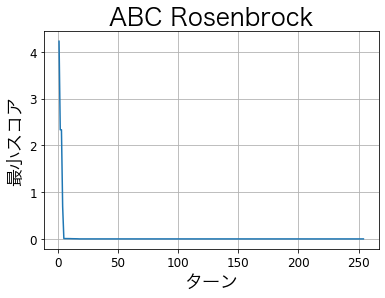


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 254, 'w': 0.6490420207285684, 'c1': 0.08781947665824608, 'c2': 0.8361869212230438}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 243 ms



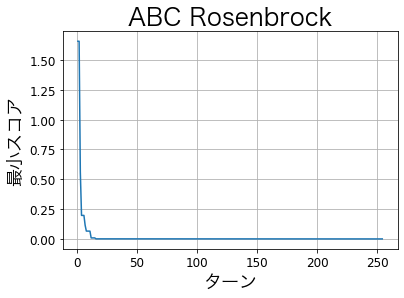


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 254, 'w': 0.6490420207285684, 'c1': 0.08781947665824608, 'c2': 0.8361869212230438}
gb_place : [1. 1.]
gb_score : 0.0
計算時間 : 252 ms



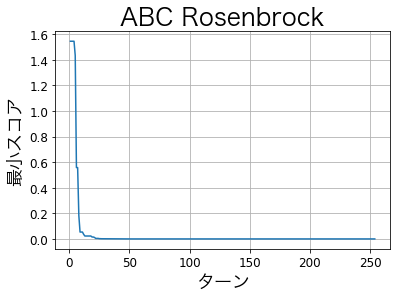

In [38]:
best_params = study.best_params
num_agent = best_params["num_agent"]
max_turn = best_params["max_turn"]
w = best_params["w"]
c1 = best_params["c1"]
c2 = best_params["c2"]

for _ in range(3) : 
    pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                    w, c1, c2, output_mode = output_mode)
    
    plot_score(function_number, pso.gb_record_list, "Rosenbrock")

# Griewank

In [40]:
# パラメータ
N = 10   # 次元
function_number = 4
limit_time = N * 500   # 計算時間の制限、制限時間は (次元) * 0.5秒
repeat_times = 3
output_mode = False   # 計算時間を短くしたいので、output_modeをFalseにしておく

# xの値域は自動化しておく
min_field_list = [-5.0, -5.0, -5.0, -600.0, -10.0, -5.0]
max_field_list = [5.0, 5.0, 10.0, 600.0, 10.0, 5.0]
min_field = min_field_list[function_number - 1]
max_field = max_field_list[function_number - 1]


# optunaに渡す関数
def objective(trial) : 
    num_agent = trial.suggest_int("num_agent", 10, 200)
    max_turn = trial.suggest_int("max_turn", 20, 500)
    w = trial.suggest_uniform("w", 0.0, 1.0)
    c1 = trial.suggest_uniform("c1", 0.0, 1.0)
    c2 = trial.suggest_uniform("c2", 0.0, 1.0)
    
    sum_score = 0.0   # これを最小化するのが目標
    for _ in range(repeat_times) :   # repeat_times回の合計をとる
        pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                      w, c1, c2, output_mode = output_mode)
        
        sum_score += pso.gb_score

        if pso.calculation_time > limit_time :   # 時間制限を超えたら罰則を与える
            # 計算時間に応じて罰則を与えたほうが学習が早く進むはず？
            sum_score += PENALTY * pso.calculation_time / limit_time
            
    return sum_score


# optunaを使う
study = optuna.create_study()
study.optimize(objective, n_trials = 100)

[I 2022-01-15 21:52:08,741] A new study created in memory with name: no-name-9cf3d3a6-bbfb-4c38-a616-a8956632038f
[I 2022-01-15 21:52:08,923] Trial 0 finished with value: 0.027138701049682412 and parameters: {'num_agent': 69, 'max_turn': 26, 'w': 0.16729530928450087, 'c1': 0.498649659582722, 'c2': 0.568265533310832}. Best is trial 0 with value: 0.027138701049682412.



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 69, 'max_turn': 26, 'w': 0.16729530928450087, 'c1': 0.498649659582722, 'c2': 0.568265533310832}
gb_place : [-3.13971924  8.8762877 ]
gb_score : 0.02218579373172702
計算時間 : 73 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 69, 'max_turn': 26, 'w': 0.16729530928450087, 'c1': 0.498649659582722, 'c2': 0.568265533310832}
gb_place : [ 3.13880622e+00 -1.87912461e-03]
gb_score : 0.0024677918867078708
計算時間 : 45 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 69, 'max_turn': 26, 'w': 0.16729530928450087, 'c1': 0.498649659582722, 'c2': 0.568265533310832}
g

[I 2022-01-15 21:52:09,453] Trial 1 finished with value: 0.13255425746479177 and parameters: {'num_agent': 25, 'max_turn': 203, 'w': 0.06382035141672937, 'c1': 0.5522964664000081, 'c2': 0.6614960113210493}. Best is trial 0 with value: 0.027138701049682412.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 25, 'max_turn': 203, 'w': 0.06382035141672937, 'c1': 0.5522964664000081, 'c2': 0.6614960113210493}
gb_place : [1.99116771e-03 4.43497988e+00]
gb_score : 0.0049348595100229264
計算時間 : 236 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 255, 'w': 0.10799913597245592, 'c1': 0.6897063836571532, 'c2': 0.07386703245903281}
gb_place : [-12.46246643  -4.71882115]
gb_score : 0.06866109340869708
計算時間 : 303 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 255, 'w': 0.10799913597245592, 'c1': 0.6897063836571532, 'c2': 0.07386703245903281}
gb_place : [ 9.47004122 -0.18560151]
gb_score : 0.03204405715372305
計算時間 : 

[I 2022-01-15 21:52:10,380] Trial 2 finished with value: 0.15361439763966944 and parameters: {'num_agent': 59, 'max_turn': 255, 'w': 0.10799913597245592, 'c1': 0.6897063836571532, 'c2': 0.07386703245903281}. Best is trial 0 with value: 0.027138701049682412.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 255, 'w': 0.10799913597245592, 'c1': 0.6897063836571532, 'c2': 0.07386703245903281}
gb_place : [ -0.05747144 -13.48142915]
gb_score : 0.05290924707724931
計算時間 : 314 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 299, 'w': 0.5118923682178357, 'c1': 0.6697695448779059, 'c2': 0.8137333021806452}
gb_place : [-3.14002264e+00 -7.04765990e-09]
gb_score : 0.002466168016010961
計算時間 : 986 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 299, 'w': 0.5118923682178357, 'c1': 0.6697695448779059, 'c2': 0.8137333021806452}
gb_place : [-3.14002264e+00 -1.32982346e-08]
gb_score : 0.00246616801601096

[I 2022-01-15 21:52:13,348] Trial 3 finished with value: 0.007398504048032883 and parameters: {'num_agent': 172, 'max_turn': 299, 'w': 0.5118923682178357, 'c1': 0.6697695448779059, 'c2': 0.8137333021806452}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 299, 'w': 0.5118923682178357, 'c1': 0.6697695448779059, 'c2': 0.8137333021806452}
gb_place : [-3.14002264e+00 -1.26161168e-08]
gb_score : 0.002466168016010961
計算時間 : 957 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 243, 'w': 0.4123633645965321, 'c1': 0.9223533320471151, 'c2': 0.257866484312095}
gb_place : [ 3.14744415 -0.01510134]
gb_score : 0.002550789189228908
計算時間 : 345 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 243, 'w': 0.4123633645965321, 'c1': 0.9223533320471151, 'c2': 0.257866484312095}
gb_place : [-3.14016487  0.02978566]
gb_score : 0.002688187890513949
計算時間 : 355 m

[I 2022-01-15 21:52:14,419] Trial 4 finished with value: 0.007705371434107322 and parameters: {'num_agent': 77, 'max_turn': 243, 'w': 0.4123633645965321, 'c1': 0.9223533320471151, 'c2': 0.257866484312095}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 77, 'max_turn': 243, 'w': 0.4123633645965321, 'c1': 0.9223533320471151, 'c2': 0.257866484312095}
gb_place : [-3.14063712e+00 -3.86844922e-04]
gb_score : 0.002466394354364465
計算時間 : 347 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 87, 'w': 0.8681856438940597, 'c1': 0.49436477052937156, 'c2': 0.17740328492603696}
gb_place : [-2.09268487e-03 -4.47532958e+00]
gb_score : 0.005272518442386964
計算時間 : 149 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:52:14,879] Trial 5 finished with value: 0.012977491382436201 and parameters: {'num_agent': 90, 'max_turn': 87, 'w': 0.8681856438940597, 'c1': 0.49436477052937156, 'c2': 0.17740328492603696}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 87, 'w': 0.8681856438940597, 'c1': 0.49436477052937156, 'c2': 0.17740328492603696}
gb_place : [3.14778914 0.03313568]
gb_score : 0.00277109224342853
計算時間 : 146 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 90, 'max_turn': 87, 'w': 0.8681856438940597, 'c1': 0.49436477052937156, 'c2': 0.17740328492603696}
gb_place : [ 2.63344105e-03 -4.43991228e+00]
gb_score : 0.004933880696620707
計算時間 : 149 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 241, 'w': 0.33697476632007073, 'c1': 0.9972484332279757, 'c2': 0.6793089682617197}
gb_place : [2.05688180e-07 4.43838706e+00]
gb_score : 0.0049298731494578085
計算時間

[I 2022-01-15 21:52:15,587] Trial 6 finished with value: 0.04931104232100636 and parameters: {'num_agent': 50, 'max_turn': 241, 'w': 0.33697476632007073, 'c1': 0.9972484332279757, 'c2': 0.6793089682617197}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 241, 'w': 0.33697476632007073, 'c1': 0.9972484332279757, 'c2': 0.6793089682617197}
gb_place : [-3.14002273e+00  9.51723450e-08]
gb_score : 0.0024661680160167343
計算時間 : 229 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 347, 'w': 0.9056958723797559, 'c1': 0.9077935223468954, 'c2': 0.550788416718485}
gb_place : [ 3.14023973e+00 -5.97132345e-04]
gb_score : 0.0024662808216957544
計算時間 : 725 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 347, 'w': 0.9056958723797559, 'c1': 0.9077935223468954, 'c2': 0.550788416718485}
gb_place : [ 3.14002263e+00 -8.78416136e-08]
gb_score : 0.00246616801

[I 2022-01-15 21:52:17,766] Trial 7 finished with value: 0.00739861700774791 and parameters: {'num_agent': 112, 'max_turn': 347, 'w': 0.9056958723797559, 'c1': 0.9077935223468954, 'c2': 0.550788416718485}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 347, 'w': 0.9056958723797559, 'c1': 0.9077935223468954, 'c2': 0.550788416718485}
gb_place : [-3.14000547e+00  5.07309266e-06]
gb_score : 0.0024661681700391958
計算時間 : 712 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 99, 'max_turn': 477, 'w': 0.7454769690410998, 'c1': 0.5100015457928294, 'c2': 0.14680871519352878}
gb_place : [3.14002264e+00 1.02295235e-10]
gb_score : 0.002466168016010961
計算時間 : 859 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 99, 'max_turn': 477, 'w': 0.7454769690410998, 'c1': 0.5100015457928294, 'c2': 0.14680871519352878}
gb_place : [3.14002328e+00 3.18494812e-07]
gb_score : 0.002466168016237

[I 2022-01-15 21:52:20,388] Trial 8 finished with value: 0.007400414360366203 and parameters: {'num_agent': 99, 'max_turn': 477, 'w': 0.7454769690410998, 'c1': 0.5100015457928294, 'c2': 0.14680871519352878}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 99, 'max_turn': 477, 'w': 0.7454769690410998, 'c1': 0.5100015457928294, 'c2': 0.14680871519352878}
gb_place : [-3.14146985e+00  1.85658395e-03]
gb_score : 0.0024680783281174623
計算時間 : 865 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 26, 'max_turn': 140, 'w': 0.5714103343843514, 'c1': 0.3520622724972313, 'c2': 0.5720301048121957}
gb_place : [3.14002264e+00 4.68542172e-09]
gb_score : 0.002466168016010961
計算時間 : 69 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 26, 'max_turn': 140, 'w': 0.5714103343843514, 'c1': 0.3520622724972313, 'c2': 0.5720301048121957}
gb_place : [ 3.14002263e+00 -3.85167959e-09]
gb_score : 0.002466168016010

[I 2022-01-15 21:52:20,608] Trial 9 finished with value: 0.01972688039292203 and parameters: {'num_agent': 26, 'max_turn': 140, 'w': 0.5714103343843514, 'c1': 0.3520622724972313, 'c2': 0.5720301048121957}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 26, 'max_turn': 140, 'w': 0.5714103343843514, 'c1': 0.3520622724972313, 'c2': 0.5720301048121957}
gb_place : [ 6.28004527 -4.43844447]
gb_score : 0.014794544360900108
計算時間 : 70 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 392, 'w': 0.6146694709039, 'c1': 0.06631648652633282, 'c2': 0.9970480062988166}
gb_place : [3.14002265e+00 3.50826562e-09]
gb_score : 0.002466168016010961
計算時間 : 1363 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 392, 'w': 0.6146694709039, 'c1': 0.06631648652633282, 'c2': 0.9970480062988166}
gb_place : [ 9.13481162e-09 -4.43844449e+00]
gb_score : 0.004929872324173856
計算時間 : 

[I 2022-01-15 21:52:24,738] Trial 10 finished with value: 4052.0098622083565 and parameters: {'num_agent': 188, 'max_turn': 392, 'w': 0.6146694709039, 'c1': 0.06631648652633282, 'c2': 0.9970480062988166}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 392, 'w': 0.6146694709039, 'c1': 0.06631648652633282, 'c2': 0.9970480062988166}
gb_place : [-3.14002264e+00 -9.03230438e-09]
gb_score : 0.002466168016010961
計算時間 : 1338 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 151, 'max_turn': 369, 'w': 0.9516698172990674, 'c1': 0.8173236277325792, 'c2': 0.9237009570765052}
gb_place : [3.12409981 0.01207674]
gb_score : 0.00262948835825616
計算時間 : 1006 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 151, 'max_turn': 369, 'w': 0.9516698172990674, 'c1': 0.8173236277325792, 'c2': 0.9237009570765052}
gb_place : [-3.14075256e+00 -3.99308268e-04]
gb_score : 0.0024664744443212427
計算

[I 2022-01-15 21:52:27,809] Trial 11 finished with value: 2012.007565354666 and parameters: {'num_agent': 151, 'max_turn': 369, 'w': 0.9516698172990674, 'c1': 0.8173236277325792, 'c2': 0.9237009570765052}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 151, 'max_turn': 369, 'w': 0.9516698172990674, 'c1': 0.8173236277325792, 'c2': 0.9237009570765052}
gb_place : [-3.14005257  0.00358897]
gb_score : 0.0024693918633504897
計算時間 : 1006 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 363, 'w': 0.7542133319113968, 'c1': 0.7756294187499599, 'c2': 0.8032494201994583}
gb_place : [3.14002264e+00 1.17524190e-08]
gb_score : 0.002466168016010961
計算時間 : 939 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 363, 'w': 0.7542133319113968, 'c1': 0.7756294187499599, 'c2': 0.8032494201994583}
gb_place : [3.14002264e+00 3.97929716e-09]
gb_score : 0.002466168016010961
計算

[I 2022-01-15 21:52:30,701] Trial 12 finished with value: 0.007398504048032883 and parameters: {'num_agent': 143, 'max_turn': 363, 'w': 0.7542133319113968, 'c1': 0.7756294187499599, 'c2': 0.8032494201994583}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 363, 'w': 0.7542133319113968, 'c1': 0.7756294187499599, 'c2': 0.8032494201994583}
gb_place : [-3.14002263e+00  5.50618105e-09]
gb_score : 0.002466168016010961
計算時間 : 960 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 466, 'w': 0.7196825465896313, 'c1': 0.7517583621673046, 'c2': 0.8305713877366916}
gb_place : [3.14002264e+00 1.25284483e-08]
gb_score : 0.002466168016010961
計算時間 : 1573 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 466, 'w': 0.7196825465896313, 'c1': 0.7517583621673046, 'c2': 0.8305713877366916}
gb_place : [-3.14002264e+00  1.30390280e-08]
gb_score : 0.002466168016

[I 2022-01-15 21:52:35,432] Trial 13 finished with value: 4649.007398504048 and parameters: {'num_agent': 184, 'max_turn': 466, 'w': 0.7196825465896313, 'c1': 0.7517583621673046, 'c2': 0.8305713877366916}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 466, 'w': 0.7196825465896313, 'c1': 0.7517583621673046, 'c2': 0.8305713877366916}
gb_place : [ 3.14002264e+00 -9.24747444e-09]
gb_score : 0.002466168016010961
計算時間 : 1536 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 314, 'w': 0.44196041640468287, 'c1': 0.6514134898256896, 'c2': 0.8150253918766973}
gb_place : [-3.14002264e+00 -5.39932430e-09]
gb_score : 0.002466168016010961
計算時間 : 803 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 314, 'w': 0.44196041640468287, 'c1': 0.6514134898256896, 'c2': 0.8150253918766973}
gb_place : [-3.14002264e+00  1.23368827e-08]
gb_score : 0.00246616

[I 2022-01-15 21:52:37,902] Trial 14 finished with value: 0.009862208356195779 and parameters: {'num_agent': 142, 'max_turn': 314, 'w': 0.44196041640468287, 'c1': 0.6514134898256896, 'c2': 0.8150253918766973}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 314, 'w': 0.44196041640468287, 'c1': 0.6514134898256896, 'c2': 0.8150253918766973}
gb_place : [-8.86297764e-09  4.43844450e+00]
gb_score : 0.004929872324173856
計算時間 : 807 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 402, 'w': 0.27781048013658294, 'c1': 0.3057933043316161, 'c2': 0.396861652396}
gb_place : [3.14002263e+00 1.02008747e-08]
gb_score : 0.002466168016010961
計算時間 : 1112 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 402, 'w': 0.27781048013658294, 'c1': 0.3057933043316161, 'c2': 0.396861652396}
gb_place : [-3.14002267e+00 -1.52642541e-07]
gb_score : 0.00246616801601717

[I 2022-01-15 21:52:41,331] Trial 15 finished with value: 3369.007398504048 and parameters: {'num_agent': 152, 'max_turn': 402, 'w': 0.27781048013658294, 'c1': 0.3057933043316161, 'c2': 0.396861652396}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 402, 'w': 0.27781048013658294, 'c1': 0.3057933043316161, 'c2': 0.396861652396}
gb_place : [3.14002263e+00 1.33839196e-08]
gb_score : 0.002466168016010961
計算時間 : 1109 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 303, 'w': 0.7479728082081686, 'c1': 0.8124450283238649, 'c2': 0.7772699965009281}
gb_place : [3.14002264e+00 8.12560855e-09]
gb_score : 0.002466168016010961
計算時間 : 700 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 303, 'w': 0.7479728082081686, 'c1': 0.8124450283238649, 'c2': 0.7772699965009281}
gb_place : [ 2.98817483e-09 -4.43844449e+00]
gb_score : 0.00492987232417385

[I 2022-01-15 21:52:43,477] Trial 16 finished with value: 0.009862208356195779 and parameters: {'num_agent': 126, 'max_turn': 303, 'w': 0.7479728082081686, 'c1': 0.8124450283238649, 'c2': 0.7772699965009281}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 303, 'w': 0.7479728082081686, 'c1': 0.8124450283238649, 'c2': 0.7772699965009281}
gb_place : [-3.14002264e+00 -9.64562073e-09]
gb_score : 0.002466168016010961
計算時間 : 700 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 450, 'w': 0.6044846509679517, 'c1': 0.6398024711791513, 'c2': 0.9734193696895036}
gb_place : [3.14002265e+00 1.18852236e-08]
gb_score : 0.002466168016010961
計算時間 : 1387 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 450, 'w': 0.6044846509679517, 'c1': 0.6398024711791513, 'c2': 0.9734193696895036}
gb_place : [-9.35606027e-09  4.43844450e+00]
gb_score : 0.004929872324

[I 2022-01-15 21:52:47,699] Trial 17 finished with value: 4144.012325912665 and parameters: {'num_agent': 171, 'max_turn': 450, 'w': 0.6044846509679517, 'c1': 0.6398024711791513, 'c2': 0.9734193696895036}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 450, 'w': 0.6044846509679517, 'c1': 0.6398024711791513, 'c2': 0.9734193696895036}
gb_place : [-5.71126203e-09  4.43844448e+00]
gb_score : 0.004929872324173856
計算時間 : 1383 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 197, 'max_turn': 188, 'w': 0.524690872063384, 'c1': 0.2889345773766024, 'c2': 0.7060894967889583}
gb_place : [3.14002263e+00 7.63385731e-09]
gb_score : 0.002466168016010961
計算時間 : 674 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 197, 'max_turn': 188, 'w': 0.524690872063384, 'c1': 0.2889345773766024, 'c2': 0.7060894967889583}
gb_place : [ 6.28004527 -4.43844445]
gb_score : 0.01479454436090022
計算時間

[I 2022-01-15 21:52:49,781] Trial 18 finished with value: 0.01972688039292214 and parameters: {'num_agent': 197, 'max_turn': 188, 'w': 0.524690872063384, 'c1': 0.2889345773766024, 'c2': 0.7060894967889583}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 197, 'max_turn': 188, 'w': 0.524690872063384, 'c1': 0.2889345773766024, 'c2': 0.7060894967889583}
gb_place : [-3.14002265e+00  2.73689218e-09]
gb_score : 0.002466168016010961
計算時間 : 687 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 309, 'w': 0.6891710383069215, 'c1': 0.9096020684571462, 'c2': 0.41409344869975445}
gb_place : [ 3.14002265e+00 -3.91516944e-09]
gb_score : 0.002466168016010961
計算時間 : 902 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 309, 'w': 0.6891710383069215, 'c1': 0.9096020684571462, 'c2': 0.41409344869975445}
gb_place : [-3.14002265e+00  1.49009043e-08]
gb_score : 0.0024661680

[I 2022-01-15 21:52:52,568] Trial 19 finished with value: 0.007398504048032883 and parameters: {'num_agent': 163, 'max_turn': 309, 'w': 0.6891710383069215, 'c1': 0.9096020684571462, 'c2': 0.41409344869975445}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 309, 'w': 0.6891710383069215, 'c1': 0.9096020684571462, 'c2': 0.41409344869975445}
gb_place : [3.14002264e+00 1.46388363e-08]
gb_score : 0.002466168016010961
計算時間 : 912 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 175, 'max_turn': 295, 'w': 0.2628183106529598, 'c1': 0.9874644727157906, 'c2': 0.4023344398898637}
gb_place : [-3.14001430e+00  5.80585145e-06]
gb_score : 0.0024661680592410473
計算時間 : 928 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 175, 'max_turn': 295, 'w': 0.2628183106529598, 'c1': 0.9874644727157906, 'c2': 0.4023344398898637}
gb_place : [-3.13953618e+00  5.01697617e-04]
gb_score : 0.00246634938

[I 2022-01-15 21:52:55,426] Trial 20 finished with value: 0.0075148884646003555 and parameters: {'num_agent': 175, 'max_turn': 295, 'w': 0.2628183106529598, 'c1': 0.9874644727157906, 'c2': 0.4023344398898637}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 175, 'max_turn': 295, 'w': 0.2628183106529598, 'c1': 0.9874644727157906, 'c2': 0.4023344398898637}
gb_place : [-3.1279854  -0.01321837]
gb_score : 0.0025823710185219895
計算時間 : 923 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 162, 'max_turn': 334, 'w': 0.8249258898137539, 'c1': 0.8606106789474504, 'c2': 0.43030982079254765}
gb_place : [-3.14002264e+00 -2.11458756e-09]
gb_score : 0.002466168016010961
計算時間 : 985 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 162, 'max_turn': 334, 'w': 0.8249258898137539, 'c1': 0.8606106789474504, 'c2': 0.43030982079254765}
gb_place : [-3.14002265e+00 -1.33188166e-09]
gb_score : 0.0024661680160109

[I 2022-01-15 21:52:58,427] Trial 21 finished with value: 0.007398504048032883 and parameters: {'num_agent': 162, 'max_turn': 334, 'w': 0.8249258898137539, 'c1': 0.8606106789474504, 'c2': 0.43030982079254765}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 162, 'max_turn': 334, 'w': 0.8249258898137539, 'c1': 0.8606106789474504, 'c2': 0.43030982079254765}
gb_place : [-3.14002263e+00  2.84892291e-09]
gb_score : 0.002466168016010961
計算時間 : 980 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 322, 'w': 0.8338786730534541, 'c1': 0.8858409743286924, 'c2': 0.3911773129995266}
gb_place : [3.14002265e+00 1.21453751e-08]
gb_score : 0.002466168016010961
計算時間 : 975 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 322, 'w': 0.8338786730534541, 'c1': 0.8858409743286924, 'c2': 0.3911773129995266}
gb_place : [-3.14002264e+00  1.26390457e-09]
gb_score : 0.002466168016

[I 2022-01-15 21:53:01,383] Trial 22 finished with value: 0.007398504048032883 and parameters: {'num_agent': 167, 'max_turn': 322, 'w': 0.8338786730534541, 'c1': 0.8858409743286924, 'c2': 0.3911773129995266}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 322, 'w': 0.8338786730534541, 'c1': 0.8858409743286924, 'c2': 0.3911773129995266}
gb_place : [-3.14002264e+00 -1.05380412e-08]
gb_score : 0.002466168016010961
計算時間 : 947 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 421, 'w': 0.9900271122997893, 'c1': 0.9822227856251488, 'c2': 0.30931563539357443}
gb_place : [ 3.21759153 -0.16054667]
gb_score : 0.011899503072400952
計算時間 : 994 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 421, 'w': 0.9900271122997893, 'c1': 0.9822227856251488, 'c2': 0.30931563539357443}
gb_place : [ 6.3351014  -4.54276361]
gb_score : 0.01902953230000104
計算時間 : 

[I 2022-01-15 21:53:04,368] Trial 23 finished with value: 0.04774944624219579 and parameters: {'num_agent': 129, 'max_turn': 421, 'w': 0.9900271122997893, 'c1': 0.9822227856251488, 'c2': 0.30931563539357443}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 421, 'w': 0.9900271122997893, 'c1': 0.9822227856251488, 'c2': 0.30931563539357443}
gb_place : [-6.22176315  4.4022403 ]
gb_score : 0.0168204108697938
計算時間 : 963 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 162, 'max_turn': 282, 'w': 0.6690515395286379, 'c1': 0.8601521764794671, 'c2': 0.46943276543019724}
gb_place : [ 3.14002264e+00 -1.48653899e-08]
gb_score : 0.002466168016010961
計算時間 : 836 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 162, 'max_turn': 282, 'w': 0.6690515395286379, 'c1': 0.8601521764794671, 'c2': 0.46943276543019724}
gb_place : [ 3.14002265e+00 -8.70289453e-09]
gb_score : 0.002466168016010961

[I 2022-01-15 21:53:06,987] Trial 24 finished with value: 0.007398504048032883 and parameters: {'num_agent': 162, 'max_turn': 282, 'w': 0.6690515395286379, 'c1': 0.8601521764794671, 'c2': 0.46943276543019724}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 162, 'max_turn': 282, 'w': 0.6690515395286379, 'c1': 0.8601521764794671, 'c2': 0.46943276543019724}
gb_place : [-3.14002264e+00 -1.03669521e-08]
gb_score : 0.002466168016010961
計算時間 : 823 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 348, 'w': 0.8130051676618115, 'c1': 0.7614400134496065, 'c2': 0.3018130967951499}
gb_place : [-3.14002264e+00 -2.27581767e-09]
gb_score : 0.002466168016010961
計算時間 : 818 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 348, 'w': 0.8130051676618115, 'c1': 0.7614400134496065, 'c2': 0.3018130967951499}
gb_place : [3.14002264e+00 9.52675144e-09]
gb_score : 0.002466168016

[I 2022-01-15 21:53:09,483] Trial 25 finished with value: 0.007398504048032883 and parameters: {'num_agent': 130, 'max_turn': 348, 'w': 0.8130051676618115, 'c1': 0.7614400134496065, 'c2': 0.3018130967951499}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 348, 'w': 0.8130051676618115, 'c1': 0.7614400134496065, 'c2': 0.3018130967951499}
gb_place : [ 3.14002265e+00 -6.73192893e-09]
gb_score : 0.002466168016010961
計算時間 : 803 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 433, 'w': 0.8306736236939546, 'c1': 0.7481256673072384, 'c2': 0.49494576738107643}
gb_place : [ 3.14002264e+00 -1.15563338e-08]
gb_score : 0.002466168016010961
計算時間 : 1116 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 433, 'w': 0.8306736236939546, 'c1': 0.7481256673072384, 'c2': 0.49494576738107643}
gb_place : [-3.14002264e+00 -9.63717268e-09]
gb_score : 0.00246616

[I 2022-01-15 21:53:12,889] Trial 26 finished with value: 3341.007398504048 and parameters: {'num_agent': 142, 'max_turn': 433, 'w': 0.8306736236939546, 'c1': 0.7481256673072384, 'c2': 0.49494576738107643}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 433, 'w': 0.8306736236939546, 'c1': 0.7481256673072384, 'c2': 0.49494576738107643}
gb_place : [-3.14002264e+00  9.05739096e-09]
gb_score : 0.002466168016010961
計算時間 : 1118 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 207, 'w': 0.6521267057238709, 'c1': 0.8948454908330729, 'c2': 0.49710630390959076}
gb_place : [ 3.14002265e+00 -1.40942326e-08]
gb_score : 0.002466168016010961
計算時間 : 763 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 207, 'w': 0.6521267057238709, 'c1': 0.8948454908330729, 'c2': 0.49710630390959076}
gb_place : [ 3.14002263e+00 -1.01146526e-08]
gb_score : 0.0024661

[I 2022-01-15 21:53:15,206] Trial 27 finished with value: 0.007398504048032883 and parameters: {'num_agent': 200, 'max_turn': 207, 'w': 0.6521267057238709, 'c1': 0.8948454908330729, 'c2': 0.49710630390959076}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 207, 'w': 0.6521267057238709, 'c1': 0.8948454908330729, 'c2': 0.49710630390959076}
gb_place : [ 3.14002264e+00 -4.82548519e-09]
gb_score : 0.002466168016010961
計算時間 : 754 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 191, 'w': 0.6495387428675102, 'c1': 0.5972368554819568, 'c2': 0.22083852698846793}
gb_place : [3.14002263e+00 1.44650864e-08]
gb_score : 0.002466168016010961
計算時間 : 696 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 191, 'w': 0.6495387428675102, 'c1': 0.5972368554819568, 'c2': 0.22083852698846793}
gb_place : [-3.14002264e+00  1.45633720e-08]
gb_score : 0.0024661680

[I 2022-01-15 21:53:17,322] Trial 28 finished with value: 0.007398504111031934 and parameters: {'num_agent': 200, 'max_turn': 191, 'w': 0.6495387428675102, 'c1': 0.5972368554819568, 'c2': 0.22083852698846793}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 191, 'w': 0.6495387428675102, 'c1': 0.5972368554819568, 'c2': 0.22083852698846793}
gb_place : [ 3.14001146e+00 -1.39406196e-06]
gb_score : 0.0024661680790100116
計算時間 : 684 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 288, 'w': 0.4845305060276139, 'c1': 0.7012691639872811, 'c2': 0.29589097639419587}
gb_place : [-6.2901206   4.46775024]
gb_score : 0.015060239353931415
計算時間 : 620 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 288, 'w': 0.4845305060276139, 'c1': 0.7012691639872811, 'c2': 0.29589097639419587}
gb_place : [3.1446606  0.00411881]
gb_score : 0.002481174088049376
計算時間 :

[I 2022-01-15 21:53:19,298] Trial 29 finished with value: 0.020007581457991752 and parameters: {'num_agent': 120, 'max_turn': 288, 'w': 0.4845305060276139, 'c1': 0.7012691639872811, 'c2': 0.29589097639419587}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 288, 'w': 0.4845305060276139, 'c1': 0.7012691639872811, 'c2': 0.29589097639419587}
gb_place : [ 3.14002263e+00 -2.08670257e-09]
gb_score : 0.002466168016010961
計算時間 : 663 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 192, 'max_turn': 122, 'w': 0.5514771276467761, 'c1': 0.47799770356840676, 'c2': 0.6111108204448331}
gb_place : [-3.14002263e+00  7.82071017e-10]
gb_score : 0.002466168016010961
計算時間 : 450 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 192, 'max_turn': 122, 'w': 0.5514771276467761, 'c1': 0.47799770356840676, 'c2': 0.6111108204448331}
gb_place : [ 3.14002264e+00 -8.80924184e-09]
gb_score : 0.00246616

[I 2022-01-15 21:53:20,719] Trial 30 finished with value: 0.007398504048032883 and parameters: {'num_agent': 192, 'max_turn': 122, 'w': 0.5514771276467761, 'c1': 0.47799770356840676, 'c2': 0.6111108204448331}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 192, 'max_turn': 122, 'w': 0.5514771276467761, 'c1': 0.47799770356840676, 'c2': 0.6111108204448331}
gb_place : [-3.14002263e+00 -1.20283220e-08]
gb_score : 0.002466168016010961
計算時間 : 468 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 186, 'max_turn': 346, 'w': 0.7945236642710103, 'c1': 0.4379912575791216, 'c2': 0.5767391968392734}
gb_place : [-3.14002263e+00 -1.06282320e-08]
gb_score : 0.002466168016010961
計算時間 : 1233 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 186, 'max_turn': 346, 'w': 0.7945236642710103, 'c1': 0.4379912575791216, 'c2': 0.5767391968392734}
gb_place : [ 3.14002265e+00 -9.69646977e-09]
gb_score : 0.002466168

[I 2022-01-15 21:53:24,578] Trial 31 finished with value: 3784.007398504048 and parameters: {'num_agent': 186, 'max_turn': 346, 'w': 0.7945236642710103, 'c1': 0.4379912575791216, 'c2': 0.5767391968392734}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 186, 'max_turn': 346, 'w': 0.7945236642710103, 'c1': 0.4379912575791216, 'c2': 0.5767391968392734}
gb_place : [-3.14002264e+00  1.76576245e-09]
gb_score : 0.002466168016010961
計算時間 : 1226 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 165, 'max_turn': 280, 'w': 0.6736425361486592, 'c1': 0.9567496124656608, 'c2': 0.35957723245944134}
gb_place : [-3.14002265e+00  1.29544787e-08]
gb_score : 0.002466168016010961
計算時間 : 927 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 165, 'max_turn': 280, 'w': 0.6736425361486592, 'c1': 0.9567496124656608, 'c2': 0.35957723245944134}
gb_place : [-3.14002264e+00 -2.81633385e-09]
gb_score : 0.00246616

[I 2022-01-15 21:53:27,371] Trial 32 finished with value: 0.007398504048032883 and parameters: {'num_agent': 165, 'max_turn': 280, 'w': 0.6736425361486592, 'c1': 0.9567496124656608, 'c2': 0.35957723245944134}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 165, 'max_turn': 280, 'w': 0.6736425361486592, 'c1': 0.9567496124656608, 'c2': 0.35957723245944134}
gb_place : [ 3.14002264e+00 -1.11297535e-08]
gb_score : 0.002466168016010961
計算時間 : 913 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 199, 'max_turn': 131, 'w': 0.5416110063846561, 'c1': 0.3882348040591621, 'c2': 0.6328088290292311}
gb_place : [-3.14002264e+00 -1.72214912e-09]
gb_score : 0.002466168016010961
計算時間 : 528 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 199, 'max_turn': 131, 'w': 0.5416110063846561, 'c1': 0.3882348040591621, 'c2': 0.6328088290292311}
gb_place : [ 3.14002264e+00 -9.50685677e-09]
gb_score : 0.0024661680

[I 2022-01-15 21:53:29,052] Trial 33 finished with value: 0.009862208356195779 and parameters: {'num_agent': 199, 'max_turn': 131, 'w': 0.5416110063846561, 'c1': 0.3882348040591621, 'c2': 0.6328088290292311}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 199, 'max_turn': 131, 'w': 0.5416110063846561, 'c1': 0.3882348040591621, 'c2': 0.6328088290292311}
gb_place : [-2.23700031e-09  4.43844449e+00]
gb_score : 0.004929872324173856
計算時間 : 558 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 180, 'max_turn': 42, 'w': 0.3994600066827001, 'c1': 0.5762309575869646, 'c2': 0.7326952980646285}
gb_place : [-1.11653272e-08 -4.43844453e+00]
gb_score : 0.004929872324174522
計算時間 : 159 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:53:29,571] Trial 34 finished with value: 0.02958169758010254 and parameters: {'num_agent': 180, 'max_turn': 42, 'w': 0.3994600066827001, 'c1': 0.5762309575869646, 'c2': 0.7326952980646285}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 180, 'max_turn': 42, 'w': 0.3994600066827001, 'c1': 0.5762309575869646, 'c2': 0.7326952980646285}
gb_place : [ 3.14002267e+00 -7.05271955e-09]
gb_score : 0.002466168016011294
計算時間 : 164 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 180, 'max_turn': 42, 'w': 0.3994600066827001, 'c1': 0.5762309575869646, 'c2': 0.7326952980646285}
gb_place : [-3.14002259 -8.87688898]
gb_score : 0.022185657239916723
計算時間 : 167 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 227, 'w': 0.6768115493926589, 'c1': 0.8467516628004929, 'c2': 0.48279665816255896}
gb_place : [ 3.14002264e+00 -7.84111369e-09]
gb_score : 0.002466168016010961
計

[I 2022-01-15 21:53:31,798] Trial 35 finished with value: 0.009862208356195779 and parameters: {'num_agent': 155, 'max_turn': 227, 'w': 0.6768115493926589, 'c1': 0.8467516628004929, 'c2': 0.48279665816255896}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 227, 'w': 0.6768115493926589, 'c1': 0.8467516628004929, 'c2': 0.48279665816255896}
gb_place : [3.14002264e+00 4.91716680e-09]
gb_score : 0.002466168016010961
計算時間 : 734 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 168, 'max_turn': 262, 'w': 0.9039958014159662, 'c1': 0.92570353275835, 'c2': 0.3894733434159356}
gb_place : [ 3.14004800e+00 -1.27749647e-04]
gb_score : 0.0024661724217426295
計算時間 : 894 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 168, 'max_turn': 262, 'w': 0.9039958014159662, 'c1': 0.92570353275835, 'c2': 0.3894733434159356}
gb_place : [ 3.14002389e+00 -3.08968695e-06]
gb_score : 0.002466168019181

[I 2022-01-15 21:53:34,497] Trial 36 finished with value: 0.007398508480784272 and parameters: {'num_agent': 168, 'max_turn': 262, 'w': 0.9039958014159662, 'c1': 0.92570353275835, 'c2': 0.3894733434159356}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 168, 'max_turn': 262, 'w': 0.9039958014159662, 'c1': 0.92570353275835, 'c2': 0.3894733434159356}
gb_place : [-3.14002853e+00 -5.10689607e-06]
gb_score : 0.00246616803986055
計算時間 : 864 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 159, 'max_turn': 264, 'w': 0.7021369229936799, 'c1': 0.971127884979006, 'c2': 0.340042903238265}
gb_place : [-3.14002264e+00  1.79175858e-09]
gb_score : 0.002466168016010961
計算時間 : 1450 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 159, 'max_turn': 264, 'w': 0.7021369229936799, 'c1': 0.971127884979006, 'c2': 0.340042903238265}
gb_place : [3.14002263e+00 1.30304826e-08]
gb_score : 0.002466168016010961


[I 2022-01-15 21:53:38,030] Trial 37 finished with value: 2512.007398504048 and parameters: {'num_agent': 159, 'max_turn': 264, 'w': 0.7021369229936799, 'c1': 0.971127884979006, 'c2': 0.340042903238265}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 159, 'max_turn': 264, 'w': 0.7021369229936799, 'c1': 0.971127884979006, 'c2': 0.340042903238265}
gb_place : [3.14002264e+00 6.17090764e-09]
gb_score : 0.002466168016010961
計算時間 : 904 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 222, 'w': 0.6186904780159895, 'c1': 0.7999642054191701, 'c2': 0.029422358635924517}
gb_place : [-18.80951666  22.23564444]
gb_score : 0.2129694973096381
計算時間 : 611 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 222, 'w': 0.6186904780159895, 'c1': 0.7999642054191701, 'c2': 0.029422358635924517}
gb_place : [ 15.74813148 -17.67628594]
gb_score : 0.14318557186475278
計算時間 : 

[I 2022-01-15 21:53:39,906] Trial 38 finished with value: 0.8078946700029062 and parameters: {'num_agent': 137, 'max_turn': 222, 'w': 0.6186904780159895, 'c1': 0.7999642054191701, 'c2': 0.029422358635924517}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 222, 'w': 0.6186904780159895, 'c1': 0.7999642054191701, 'c2': 0.029422358635924517}
gb_place : [12.95734746  3.20579973]
gb_score : 0.4517396008285153
計算時間 : 596 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 335, 'w': 0.8091076385162468, 'c1': 0.7238771437424063, 'c2': 0.12198613029969069}
gb_place : [3.14002264e+00 1.44581470e-08]
gb_score : 0.002466168016010961
計算時間 : 636 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 335, 'w': 0.8091076385162468, 'c1': 0.7238771437424063, 'c2': 0.12198613029969069}
gb_place : [-3.14002263e+00 -1.05042851e-08]
gb_score : 0.002466168016010961


[I 2022-01-15 21:53:41,863] Trial 39 finished with value: 0.007401040809108972 and parameters: {'num_agent': 102, 'max_turn': 335, 'w': 0.8091076385162468, 'c1': 0.7238771437424063, 'c2': 0.12198613029969069}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 335, 'w': 0.8091076385162468, 'c1': 0.7238771437424063, 'c2': 0.12198613029969069}
gb_place : [3.14068972e+00 3.04094867e-03]
gb_score : 0.0024687047770870496
計算時間 : 633 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 170, 'w': 0.4624784351186427, 'c1': 0.5374884693691899, 'c2': 0.6316169599439285}
gb_place : [3.14002265e+00 6.73101538e-09]
gb_score : 0.002466168016010961
計算時間 : 277 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 170, 'w': 0.4624784351186427, 'c1': 0.5374884693691899, 'c2': 0.6316169599439285}
gb_place : [-3.14002264e+00  8.91696969e-09]
gb_score : 0.002466168016010

[I 2022-01-15 21:53:42,672] Trial 40 finished with value: 0.007398504048032883 and parameters: {'num_agent': 79, 'max_turn': 170, 'w': 0.4624784351186427, 'c1': 0.5374884693691899, 'c2': 0.6316169599439285}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 170, 'w': 0.4624784351186427, 'c1': 0.5374884693691899, 'c2': 0.6316169599439285}
gb_place : [-3.14002263e+00 -5.25898210e-09]
gb_score : 0.002466168016010961
計算時間 : 251 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 65, 'max_turn': 158, 'w': 0.4791141474659394, 'c1': 0.4837997741993212, 'c2': 0.6211954414675295}
gb_place : [-3.14002263e+00 -6.57913059e-09]
gb_score : 0.002466168016010961
計算時間 : 291 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 65, 'max_turn': 158, 'w': 0.4791141474659394, 'c1': 0.4837997741993212, 'c2': 0.6211954414675295}
gb_place : [ 3.14002264e+00 -7.78825675e-09]
gb_score : 0.00246616801601

[I 2022-01-15 21:53:43,387] Trial 41 finished with value: 0.009862208356195779 and parameters: {'num_agent': 65, 'max_turn': 158, 'w': 0.4791141474659394, 'c1': 0.4837997741993212, 'c2': 0.6211954414675295}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 65, 'max_turn': 158, 'w': 0.4791141474659394, 'c1': 0.4837997741993212, 'c2': 0.6211954414675295}
gb_place : [ 8.61077022e-09 -4.43844447e+00]
gb_score : 0.004929872324173856
計算時間 : 197 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 281, 'w': 0.864377269363012, 'c1': 0.8430519720951506, 'c2': 0.44494982387166787}
gb_place : [ 3.14002266e+00 -2.78199582e-08]
gb_score : 0.0024661680160114052
計算時間 : 918 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 281, 'w': 0.864377269363012, 'c1': 0.8430519720951506, 'c2': 0.44494982387166787}
gb_place : [3.14002264e+00 1.10236073e-08]
gb_score : 0.0024661680160

[I 2022-01-15 21:53:46,039] Trial 42 finished with value: 0.007398504048224841 and parameters: {'num_agent': 161, 'max_turn': 281, 'w': 0.864377269363012, 'c1': 0.8430519720951506, 'c2': 0.44494982387166787}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 281, 'w': 0.864377269363012, 'c1': 0.8430519720951506, 'c2': 0.44494982387166787}
gb_place : [3.14002293e+00 7.74594473e-07]
gb_score : 0.0024661680162024746
計算時間 : 846 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 95, 'w': 0.3758503338744077, 'c1': 0.5090561162298789, 'c2': 0.8973006004766761}
gb_place : [6.28004527 4.43844446]
gb_score : 0.014794544360900108
計算時間 : 144 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:53:46,503] Trial 43 finished with value: 0.03205525673781129 and parameters: {'num_agent': 80, 'max_turn': 95, 'w': 0.3758503338744077, 'c1': 0.5090561162298789, 'c2': 0.8973006004766761}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 95, 'w': 0.3758503338744077, 'c1': 0.5090561162298789, 'c2': 0.8973006004766761}
gb_place : [-6.28004527  4.43844448]
gb_score : 0.01479454436090022
計算時間 : 150 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 95, 'w': 0.3758503338744077, 'c1': 0.5090561162298789, 'c2': 0.8973006004766761}
gb_place : [3.14002263e+00 5.63517850e-09]
gb_score : 0.002466168016010961
計算時間 : 146 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 325, 'w': 0.9242131477960287, 'c1': 0.8870269649719829, 'c2': 0.22214832671460538}
gb_place : [ 3.13947666e+00 -1.82032950e-05]
gb_score : 0.0024663172213962303
計算時間 

[I 2022-01-15 21:53:48,611] Trial 44 finished with value: 0.0073991076996402505 and parameters: {'num_agent': 116, 'max_turn': 325, 'w': 0.9242131477960287, 'c1': 0.8870269649719829, 'c2': 0.22214832671460538}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 325, 'w': 0.9242131477960287, 'c1': 0.8870269649719829, 'c2': 0.22214832671460538}
gb_place : [3.13961622e+00 1.19091835e-03]
gb_score : 0.002466605571038283
計算時間 : 686 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 51, 'max_turn': 81, 'w': 0.5813887692632965, 'c1': 0.4491127726302079, 'c2': 0.5476600595002103}
gb_place : [6.28004526 4.43844445]
gb_score : 0.014794544360900441
計算時間 : 77 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 51, 'max_turn': 81, 'w': 0.5813887692632965, 'c1': 0.4491127726302079, 'c2': 0.5476600595002103}
gb_place : [6.28004523 4.43844446]
gb_score : 0.014794544360900774
計算時間 : 76 ms


---

[I 2022-01-15 21:53:48,868] Trial 45 finished with value: 0.07397764914427096 and parameters: {'num_agent': 51, 'max_turn': 81, 'w': 0.5813887692632965, 'c1': 0.4491127726302079, 'c2': 0.5476600595002103}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 51, 'max_turn': 81, 'w': 0.5813887692632965, 'c1': 0.4491127726302079, 'c2': 0.5476600595002103}
gb_place : [12.5600905   4.43844438]
gb_score : 0.04438856042246975
計算時間 : 82 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 193, 'max_turn': 378, 'w': 0.9898788190767968, 'c1': 0.6220394106679892, 'c2': 0.2706496445444629}
gb_place : [3.13979029 0.14798869]
gb_score : 0.007941830171786513
計算時間 : 1325 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 193, 'max_turn': 378, 'w': 0.9898788190767968, 'c1': 0.6220394106679892, 'c2': 0.2706496445444629}
gb_place : [-0.02489027  4.55281426]
gb_score : 0.008510698483540913
計算時間 : 1311 ms


----

[I 2022-01-15 21:53:52,892] Trial 46 finished with value: 3940.020029335711 and parameters: {'num_agent': 193, 'max_turn': 378, 'w': 0.9898788190767968, 'c1': 0.6220394106679892, 'c2': 0.2706496445444629}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 193, 'max_turn': 378, 'w': 0.9898788190767968, 'c1': 0.6220394106679892, 'c2': 0.2706496445444629}
gb_place : [-3.14774994 -0.06572377]
gb_score : 0.003576807055790665
計算時間 : 1304 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 177, 'max_turn': 244, 'w': 0.6545747477484528, 'c1': 0.9402274597560374, 'c2': 0.5200262824295768}
gb_place : [ 3.14002265e+00 -1.42300236e-08]
gb_score : 0.002466168016010961
計算時間 : 783 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 177, 'max_turn': 244, 'w': 0.6545747477484528, 'c1': 0.9402274597560374, 'c2': 0.5200262824295768}
gb_place : [3.14002264e+00 3.79175401e-09]
gb_score : 0.002466168016010961
計

[I 2022-01-15 21:53:55,308] Trial 47 finished with value: 0.007398504048032883 and parameters: {'num_agent': 177, 'max_turn': 244, 'w': 0.6545747477484528, 'c1': 0.9402274597560374, 'c2': 0.5200262824295768}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 177, 'max_turn': 244, 'w': 0.6545747477484528, 'c1': 0.9402274597560374, 'c2': 0.5200262824295768}
gb_place : [-3.14002264e+00  4.66010258e-09]
gb_score : 0.002466168016010961
計算時間 : 791 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 243, 'w': 0.7694833208639291, 'c1': 0.9333837362071269, 'c2': 0.36705253434977303}
gb_place : [-3.14002263e+00  1.35550264e-09]
gb_score : 0.002466168016010961
計算時間 : 776 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 243, 'w': 0.7694833208639291, 'c1': 0.9333837362071269, 'c2': 0.36705253434977303}
gb_place : [ 3.14002264e+00 -9.16625179e-09]
gb_score : 0.002466168

[I 2022-01-15 21:53:57,684] Trial 48 finished with value: 0.007398504048032883 and parameters: {'num_agent': 174, 'max_turn': 243, 'w': 0.7694833208639291, 'c1': 0.9333837362071269, 'c2': 0.36705253434977303}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 243, 'w': 0.7694833208639291, 'c1': 0.9333837362071269, 'c2': 0.36705253434977303}
gb_place : [ 3.14002264e+00 -2.73838844e-09]
gb_score : 0.002466168016010961
計算時間 : 775 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 159, 'w': 0.4487972165677675, 'c1': 0.0017006445326311903, 'c2': 0.6134357114476569}
gb_place : [ 3.14002261 -8.87688891]
gb_score : 0.0221856572399155
計算時間 : 238 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 159, 'w': 0.4487972165677675, 'c1': 0.0017006445326311903, 'c2': 0.6134357114476569}
gb_place : [-6.28004526 -4.43844446]
gb_score : 0.014794544360900108
計算時間 

[I 2022-01-15 21:53:58,430] Trial 49 finished with value: 0.03944636961682657 and parameters: {'num_agent': 80, 'max_turn': 159, 'w': 0.4487972165677675, 'c1': 0.0017006445326311903, 'c2': 0.6134357114476569}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 80, 'max_turn': 159, 'w': 0.4487972165677675, 'c1': 0.0017006445326311903, 'c2': 0.6134357114476569}
gb_place : [-3.14002264e+00  8.75908427e-10]
gb_score : 0.002466168016010961
計算時間 : 240 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 209, 'w': 0.768719320592087, 'c1': 0.9517155173865791, 'c2': 0.34982294119096946}
gb_place : [-3.14002265e+00 -4.32630235e-09]
gb_score : 0.002466168016010961
計算時間 : 560 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 209, 'w': 0.768719320592087, 'c1': 0.9517155173865791, 'c2': 0.34982294119096946}
gb_place : [-3.14002264e+00  2.67514334e-09]
gb_score : 0.002466168

[I 2022-01-15 21:54:00,153] Trial 50 finished with value: 0.007398504048032883 and parameters: {'num_agent': 147, 'max_turn': 209, 'w': 0.768719320592087, 'c1': 0.9517155173865791, 'c2': 0.34982294119096946}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 209, 'w': 0.768719320592087, 'c1': 0.9517155173865791, 'c2': 0.34982294119096946}
gb_place : [3.14002265e+00 1.19795592e-08]
gb_score : 0.002466168016010961
計算時間 : 559 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 177, 'max_turn': 115, 'w': 0.7239226394824392, 'c1': 0.2774321040487562, 'c2': 0.5466925129027435}
gb_place : [3.14002261e+00 3.93497327e-08]
gb_score : 0.0024661680160117383
計算時間 : 375 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 177, 'max_turn': 115, 'w': 0.7239226394824392, 'c1': 0.2774321040487562, 'c2': 0.5466925129027435}
gb_place : [-3.14002264e+00  8.85747710e-09]
gb_score : 0.00246616801601

[I 2022-01-15 21:54:01,313] Trial 51 finished with value: 0.007398504048042875 and parameters: {'num_agent': 177, 'max_turn': 115, 'w': 0.7239226394824392, 'c1': 0.2774321040487562, 'c2': 0.5466925129027435}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 177, 'max_turn': 115, 'w': 0.7239226394824392, 'c1': 0.2774321040487562, 'c2': 0.5466925129027435}
gb_place : [3.14002261e+00 1.83394477e-07]
gb_score : 0.002466168016020176
計算時間 : 375 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 36, 'max_turn': 243, 'w': 0.3044625548033708, 'c1': 0.5394003987461721, 'c2': 0.3438530994046242}
gb_place : [ 3.11778185 -0.03875367]
gb_score : 0.003089311997231281
計算時間 : 156 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:54:01,827] Trial 52 finished with value: 0.01296370217757925 and parameters: {'num_agent': 36, 'max_turn': 243, 'w': 0.3044625548033708, 'c1': 0.5394003987461721, 'c2': 0.3438530994046242}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 36, 'max_turn': 243, 'w': 0.3044625548033708, 'c1': 0.5394003987461721, 'c2': 0.3438530994046242}
gb_place : [-3.57677476e-03  4.43734953e+00]
gb_score : 0.0049365721570622245
計算時間 : 172 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 36, 'max_turn': 243, 'w': 0.3044625548033708, 'c1': 0.5394003987461721, 'c2': 0.3438530994046242}
gb_place : [ 1.80528126e-03 -4.43342088e+00]
gb_score : 0.004937818023285745
計算時間 : 160 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 166, 'max_turn': 316, 'w': 0.8635684855657507, 'c1': 0.7959606125200662, 'c2': 0.4500217797507474}
gb_place : [ 3.14002263e+00 -5.69299905e-09]
gb_score : 0.002466168016

[I 2022-01-15 21:54:04,733] Trial 53 finished with value: 0.007398504048032883 and parameters: {'num_agent': 166, 'max_turn': 316, 'w': 0.8635684855657507, 'c1': 0.7959606125200662, 'c2': 0.4500217797507474}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 166, 'max_turn': 316, 'w': 0.8635684855657507, 'c1': 0.7959606125200662, 'c2': 0.4500217797507474}
gb_place : [-3.14002265e+00 -1.39468574e-08]
gb_score : 0.002466168016010961
計算時間 : 941 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 274, 'w': 0.5386772496612143, 'c1': 0.7612214749033275, 'c2': 0.4598311800442172}
gb_place : [-3.14002264e+00 -1.05830414e-08]
gb_score : 0.002466168016010961
計算時間 : 933 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 274, 'w': 0.5386772496612143, 'c1': 0.7612214749033275, 'c2': 0.4598311800442172}
gb_place : [ 3.14002265e+00 -1.33994763e-08]
gb_score : 0.00246616801

[I 2022-01-15 21:54:07,579] Trial 54 finished with value: 0.007398504048032883 and parameters: {'num_agent': 188, 'max_turn': 274, 'w': 0.5386772496612143, 'c1': 0.7612214749033275, 'c2': 0.4598311800442172}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 274, 'w': 0.5386772496612143, 'c1': 0.7612214749033275, 'c2': 0.4598311800442172}
gb_place : [-3.14002264e+00  2.53165798e-09]
gb_score : 0.002466168016010961
計算時間 : 931 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 88, 'max_turn': 207, 'w': 0.7684542545620572, 'c1': 0.9451849563893097, 'c2': 0.523772376444293}
gb_place : [-6.02840672e-09 -4.43844448e+00]
gb_score : 0.004929872324173856
計算時間 : 332 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 88, 'max_turn': 207, 'w': 0.7684542545620572, 'c1': 0.9451849563893097, 'c2': 0.523772376444293}
gb_place : [-3.14002264e+00  9.07108268e-09]
gb_score : 0.002466168016010

[I 2022-01-15 21:54:08,615] Trial 55 finished with value: 0.009862208356195779 and parameters: {'num_agent': 88, 'max_turn': 207, 'w': 0.7684542545620572, 'c1': 0.9451849563893097, 'c2': 0.523772376444293}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 88, 'max_turn': 207, 'w': 0.7684542545620572, 'c1': 0.9451849563893097, 'c2': 0.523772376444293}
gb_place : [-3.14002264e+00  1.73844782e-09]
gb_score : 0.002466168016010961
計算時間 : 335 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 131, 'max_turn': 365, 'w': 0.6399772256342888, 'c1': 0.8779157349225019, 'c2': 0.30159606254343996}
gb_place : [3.14002264e+00 7.38557164e-09]
gb_score : 0.002466168016010961
計算時間 : 867 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 131, 'max_turn': 365, 'w': 0.6399772256342888, 'c1': 0.8779157349225019, 'c2': 0.30159606254343996}
gb_place : [-3.14002263e+00 -1.19766184e-08]
gb_score : 0.0024661680160

[I 2022-01-15 21:54:11,257] Trial 56 finished with value: 0.007398504048032883 and parameters: {'num_agent': 131, 'max_turn': 365, 'w': 0.6399772256342888, 'c1': 0.8779157349225019, 'c2': 0.30159606254343996}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 131, 'max_turn': 365, 'w': 0.6399772256342888, 'c1': 0.8779157349225019, 'c2': 0.30159606254343996}
gb_place : [-3.14002264e+00  9.11394777e-09]
gb_score : 0.002466168016010961
計算時間 : 859 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 364, 'w': 0.6356806288367771, 'c1': 0.879783755358258, 'c2': 0.25739533326747377}
gb_place : [-3.14002265e+00 -1.45571646e-08]
gb_score : 0.002466168016010961
計算時間 : 887 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 364, 'w': 0.6356806288367771, 'c1': 0.879783755358258, 'c2': 0.25739533326747377}
gb_place : [3.14002263e+00 1.12970463e-08]
gb_score : 0.002466168016

[I 2022-01-15 21:54:13,976] Trial 57 finished with value: 0.007398504048032883 and parameters: {'num_agent': 135, 'max_turn': 364, 'w': 0.6356806288367771, 'c1': 0.879783755358258, 'c2': 0.25739533326747377}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 364, 'w': 0.6356806288367771, 'c1': 0.879783755358258, 'c2': 0.25739533326747377}
gb_place : [-3.14002264e+00  4.42478445e-09]
gb_score : 0.002466168016010961
計算時間 : 895 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 371, 'w': 0.5899019683658884, 'c1': 0.8843803410251527, 'c2': 0.19499266091430356}
gb_place : [ 3.1405859  -0.06593767]
gb_score : 0.003554160278267715
計算時間 : 894 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 371, 'w': 0.5899019683658884, 'c1': 0.8843803410251527, 'c2': 0.19499266091430356}
gb_place : [-3.14235066  0.00322157]
gb_score : 0.002471476431014974
計算時間 :

[I 2022-01-15 21:54:16,690] Trial 58 finished with value: 0.008491804725324514 and parameters: {'num_agent': 133, 'max_turn': 371, 'w': 0.5899019683658884, 'c1': 0.8843803410251527, 'c2': 0.19499266091430356}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 371, 'w': 0.5899019683658884, 'c1': 0.8843803410251527, 'c2': 0.19499266091430356}
gb_place : [-3.14002255e+00  3.28507849e-07]
gb_score : 0.0024661680160418253
計算時間 : 881 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 108, 'max_turn': 407, 'w': 0.8174664497120129, 'c1': 0.6859692930780876, 'c2': 0.42374915375420596}
gb_place : [3.14002264e+00 9.54012638e-09]
gb_score : 0.002466168016010961
計算時間 : 785 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 108, 'max_turn': 407, 'w': 0.8174664497120129, 'c1': 0.6859692930780876, 'c2': 0.42374915375420596}
gb_place : [-3.14002264e+00  2.77562543e-09]
gb_score : 0.002466168

[I 2022-01-15 21:54:19,129] Trial 59 finished with value: 0.007398504048032883 and parameters: {'num_agent': 108, 'max_turn': 407, 'w': 0.8174664497120129, 'c1': 0.6859692930780876, 'c2': 0.42374915375420596}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 108, 'max_turn': 407, 'w': 0.8174664497120129, 'c1': 0.6859692930780876, 'c2': 0.42374915375420596}
gb_place : [-3.14002265e+00  1.02182444e-08]
gb_score : 0.002466168016010961
計算時間 : 812 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 386, 'w': 0.7165202777317455, 'c1': 0.6906315802545372, 'c2': 0.5074135059281343}
gb_place : [3.14002263e+00 3.43627599e-09]
gb_score : 0.002466168016010961
計算時間 : 658 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 386, 'w': 0.7165202777317455, 'c1': 0.6906315802545372, 'c2': 0.5074135059281343}
gb_place : [-3.14002265e+00  4.62177041e-09]
gb_score : 0.00246616801601

[I 2022-01-15 21:54:21,179] Trial 60 finished with value: 0.007398504048032883 and parameters: {'num_agent': 96, 'max_turn': 386, 'w': 0.7165202777317455, 'c1': 0.6906315802545372, 'c2': 0.5074135059281343}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 386, 'w': 0.7165202777317455, 'c1': 0.6906315802545372, 'c2': 0.5074135059281343}
gb_place : [-3.14002264e+00  9.40759112e-09]
gb_score : 0.002466168016010961
計算時間 : 670 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 492, 'w': 0.02452753380988948, 'c1': 0.8143395412708563, 'c2': 0.3848168951786102}
gb_place : [-3.15500332 -0.01234026]
gb_score : 0.002616537989336143
計算時間 : 949 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 492, 'w': 0.02452753380988948, 'c1': 0.8143395412708563, 'c2': 0.3848168951786102}
gb_place : [-3.16007191 -0.07996744]
gb_score : 0.0042668480267256115
計算時間 :

[I 2022-01-15 21:54:24,107] Trial 61 finished with value: 0.009811252609301824 and parameters: {'num_agent': 109, 'max_turn': 492, 'w': 0.02452753380988948, 'c1': 0.8143395412708563, 'c2': 0.3848168951786102}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 492, 'w': 0.02452753380988948, 'c1': 0.8143395412708563, 'c2': 0.3848168951786102}
gb_place : [-3.15716991  0.03546002]
gb_score : 0.0029278665932400694
計算時間 : 969 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 191, 'max_turn': 307, 'w': 0.847478914454995, 'c1': 0.8489401358443526, 'c2': 0.41903932007280026}
gb_place : [ 3.14002264e+00 -3.01273430e-09]
gb_score : 0.002466168016010961
計算時間 : 1061 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 191, 'max_turn': 307, 'w': 0.847478914454995, 'c1': 0.8489401358443526, 'c2': 0.41903932007280026}
gb_place : [-3.14002264e+00 -7.95418071e-09]
gb_score : 0.0024661680160109

[I 2022-01-15 21:54:27,336] Trial 62 finished with value: 3163.007398504048 and parameters: {'num_agent': 191, 'max_turn': 307, 'w': 0.847478914454995, 'c1': 0.8489401358443526, 'c2': 0.41903932007280026}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 191, 'max_turn': 307, 'w': 0.847478914454995, 'c1': 0.8489401358443526, 'c2': 0.41903932007280026}
gb_place : [-3.14002265e+00  1.40499158e-08]
gb_score : 0.002466168016010961
計算時間 : 1047 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 182, 'max_turn': 173, 'w': 0.775470413464371, 'c1': 0.9492611860017752, 'c2': 0.5939861901172881}
gb_place : [3.14002271e+00 8.37809775e-08]
gb_score : 0.002466168016014958
計算時間 : 569 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 182, 'max_turn': 173, 'w': 0.775470413464371, 'c1': 0.9492611860017752, 'c2': 0.5939861901172881}
gb_place : [ 3.14002264e+00 -1.42771305e-08]
gb_score : 0.00246616801601

[I 2022-01-15 21:54:29,090] Trial 63 finished with value: 0.007398504048037435 and parameters: {'num_agent': 182, 'max_turn': 173, 'w': 0.775470413464371, 'c1': 0.9492611860017752, 'c2': 0.5939861901172881}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 182, 'max_turn': 173, 'w': 0.775470413464371, 'c1': 0.9492611860017752, 'c2': 0.5939861901172881}
gb_place : [ 3.14002268e+00 -6.05804080e-09]
gb_score : 0.0024661680160115163
計算時間 : 571 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 357, 'w': 0.9002845036405305, 'c1': 0.7678316484850911, 'c2': 0.47213231418708995}
gb_place : [ 3.14002265e+00 -6.40803563e-09]
gb_score : 0.002466168016010961
計算時間 : 782 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 357, 'w': 0.9002845036405305, 'c1': 0.7678316484850911, 'c2': 0.47213231418708995}
gb_place : [3.14002306e+00 3.87415344e-07]
gb_score : 0.00246616801

[I 2022-01-15 21:54:31,497] Trial 64 finished with value: 0.007398504048265919 and parameters: {'num_agent': 123, 'max_turn': 357, 'w': 0.9002845036405305, 'c1': 0.7678316484850911, 'c2': 0.47213231418708995}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 357, 'w': 0.9002845036405305, 'c1': 0.7678316484850911, 'c2': 0.47213231418708995}
gb_place : [ 3.14002309e+00 -1.49942161e-07]
gb_score : 0.0024661680161178756
計算時間 : 788 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 297, 'w': 0.6790849708457576, 'c1': 0.168091012419689, 'c2': 0.6726453308923388}
gb_place : [-3.14002264e+00 -1.22878032e-08]
gb_score : 0.002466168016010961
計算時間 : 801 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 297, 'w': 0.6790849708457576, 'c1': 0.168091012419689, 'c2': 0.6726453308923388}
gb_place : [-3.14002264e+00 -2.61543242e-09]
gb_score : 0.00246616801

[I 2022-01-15 21:54:33,952] Trial 65 finished with value: 0.009862208356195779 and parameters: {'num_agent': 149, 'max_turn': 297, 'w': 0.6790849708457576, 'c1': 0.168091012419689, 'c2': 0.6726453308923388}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 297, 'w': 0.6790849708457576, 'c1': 0.168091012419689, 'c2': 0.6726453308923388}
gb_place : [-7.22252524e-10  4.43844449e+00]
gb_score : 0.004929872324173856
計算時間 : 806 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 196, 'max_turn': 188, 'w': 0.5694166391789173, 'c1': 0.37820041160944395, 'c2': 0.5143048706211476}
gb_place : [-3.14002264e+00  2.13362436e-09]
gb_score : 0.002466168016010961
計算時間 : 675 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 196, 'max_turn': 188, 'w': 0.5694166391789173, 'c1': 0.37820041160944395, 'c2': 0.5143048706211476}
gb_place : [ 3.14002264e+00 -1.26141974e-08]
gb_score : 0.0024661680

[I 2022-01-15 21:54:36,013] Trial 66 finished with value: 0.007398504048032883 and parameters: {'num_agent': 196, 'max_turn': 188, 'w': 0.5694166391789173, 'c1': 0.37820041160944395, 'c2': 0.5143048706211476}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 196, 'max_turn': 188, 'w': 0.5694166391789173, 'c1': 0.37820041160944395, 'c2': 0.5143048706211476}
gb_place : [ 3.14002265e+00 -1.46307730e-08]
gb_score : 0.002466168016010961
計算時間 : 666 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 188, 'w': 0.5549129526137959, 'c1': 0.3594436823394963, 'c2': 0.7058305914877324}
gb_place : [ 3.49825293e-10 -4.43844448e+00]
gb_score : 0.004929872324173856
計算時間 : 690 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 188, 'w': 0.5549129526137959, 'c1': 0.3594436823394963, 'c2': 0.7058305914877324}
gb_place : [ 3.14002265e+00 -1.30956055e-09]
gb_score : 0.0024661680

[I 2022-01-15 21:54:38,130] Trial 67 finished with value: 0.009862208356195779 and parameters: {'num_agent': 200, 'max_turn': 188, 'w': 0.5549129526137959, 'c1': 0.3594436823394963, 'c2': 0.7058305914877324}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 188, 'w': 0.5549129526137959, 'c1': 0.3594436823394963, 'c2': 0.7058305914877324}
gb_place : [ 3.14002263e+00 -2.80528913e-10]
gb_score : 0.002466168016010961
計算時間 : 681 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 217, 'w': 0.7300617913036603, 'c1': 0.9103622563425782, 'c2': 0.3414883092745171}
gb_place : [-3.14002265e+00 -1.03436212e-08]
gb_score : 0.002466168016010961
計算時間 : 567 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 217, 'w': 0.7300617913036603, 'c1': 0.9103622563425782, 'c2': 0.3414883092745171}
gb_place : [-3.14002263e+00  1.32408118e-08]
gb_score : 0.00246616801

[I 2022-01-15 21:54:39,887] Trial 68 finished with value: 0.007398504048032883 and parameters: {'num_agent': 147, 'max_turn': 217, 'w': 0.7300617913036603, 'c1': 0.9103622563425782, 'c2': 0.3414883092745171}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 217, 'w': 0.7300617913036603, 'c1': 0.9103622563425782, 'c2': 0.3414883092745171}
gb_place : [ 3.14002264e+00 -1.71761107e-09]
gb_score : 0.002466168016010961
計算時間 : 569 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 221, 'w': 0.5081274834163034, 'c1': 0.993927487090461, 'c2': 0.3432212399138707}
gb_place : [3.14020803e+00 6.99164239e-04]
gb_score : 0.0024663075388827727
計算時間 : 614 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 221, 'w': 0.5081274834163034, 'c1': 0.993927487090461, 'c2': 0.3432212399138707}
gb_place : [-3.14002264e+00 -2.36633618e-09]
gb_score : 0.00246616801601

[I 2022-01-15 21:54:41,765] Trial 69 finished with value: 0.007398643570904695 and parameters: {'num_agent': 154, 'max_turn': 221, 'w': 0.5081274834163034, 'c1': 0.993927487090461, 'c2': 0.3432212399138707}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 221, 'w': 0.5081274834163034, 'c1': 0.993927487090461, 'c2': 0.3432212399138707}
gb_place : [ 3.14002264e+00 -9.37734806e-09]
gb_score : 0.002466168016010961
計算時間 : 606 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 350, 'w': 0.7842818205911827, 'c1': 0.8782244083634103, 'c2': 0.26831025172799683}
gb_place : [-3.14002265e+00 -1.85120547e-09]
gb_score : 0.002466168016010961
計算時間 : 861 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 350, 'w': 0.7842818205911827, 'c1': 0.8782244083634103, 'c2': 0.26831025172799683}
gb_place : [ 3.14002263e+00 -7.73475361e-09]
gb_score : 0.0024661680

[I 2022-01-15 21:54:44,383] Trial 70 finished with value: 0.007398504048032883 and parameters: {'num_agent': 136, 'max_turn': 350, 'w': 0.7842818205911827, 'c1': 0.8782244083634103, 'c2': 0.26831025172799683}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 350, 'w': 0.7842818205911827, 'c1': 0.8782244083634103, 'c2': 0.26831025172799683}
gb_place : [3.14002264e+00 2.85959760e-09]
gb_score : 0.002466168016010961
計算時間 : 846 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 253, 'w': 0.7542211712329985, 'c1': 0.9449923218436248, 'c2': 0.3688773276154879}
gb_place : [ 3.14002265e+00 -6.16564262e-09]
gb_score : 0.002466168016010961
計算時間 : 785 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 253, 'w': 0.7542211712329985, 'c1': 0.9449923218436248, 'c2': 0.3688773276154879}
gb_place : [3.14002265e+00 6.44092728e-09]
gb_score : 0.00246616801601

[I 2022-01-15 21:54:46,785] Trial 71 finished with value: 0.007398504048032883 and parameters: {'num_agent': 173, 'max_turn': 253, 'w': 0.7542211712329985, 'c1': 0.9449923218436248, 'c2': 0.3688773276154879}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 253, 'w': 0.7542211712329985, 'c1': 0.9449923218436248, 'c2': 0.3688773276154879}
gb_place : [-3.14002264e+00 -1.44272495e-08]
gb_score : 0.002466168016010961
計算時間 : 781 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 168, 'max_turn': 328, 'w': 0.6362829190343839, 'c1': 0.8295334781902627, 'c2': 0.3065294352407245}
gb_place : [3.14002264e+00 1.40144890e-08]
gb_score : 0.002466168016010961
計算時間 : 974 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 168, 'max_turn': 328, 'w': 0.6362829190343839, 'c1': 0.8295334781902627, 'c2': 0.3065294352407245}
gb_place : [3.14002263e+00 1.00010570e-08]
gb_score : 0.002466168016010

[I 2022-01-15 21:54:49,767] Trial 72 finished with value: 0.007398504048032883 and parameters: {'num_agent': 168, 'max_turn': 328, 'w': 0.6362829190343839, 'c1': 0.8295334781902627, 'c2': 0.3065294352407245}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 168, 'max_turn': 328, 'w': 0.6362829190343839, 'c1': 0.8295334781902627, 'c2': 0.3065294352407245}
gb_place : [ 3.14002263e+00 -2.70499165e-09]
gb_score : 0.002466168016010961
計算時間 : 979 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 168, 'max_turn': 334, 'w': 0.6689576242313223, 'c1': 0.8274960027370614, 'c2': 0.31802150384079264}
gb_place : [3.14002264e+00 1.10548525e-08]
gb_score : 0.002466168016010961
計算時間 : 991 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 168, 'max_turn': 334, 'w': 0.6689576242313223, 'c1': 0.8274960027370614, 'c2': 0.31802150384079264}
gb_place : [3.14002264e+00 3.34736482e-12]
gb_score : 0.0024661680160

[I 2022-01-15 21:54:52,808] Trial 73 finished with value: 0.007398504048032883 and parameters: {'num_agent': 168, 'max_turn': 334, 'w': 0.6689576242313223, 'c1': 0.8274960027370614, 'c2': 0.31802150384079264}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 168, 'max_turn': 334, 'w': 0.6689576242313223, 'c1': 0.8274960027370614, 'c2': 0.31802150384079264}
gb_place : [3.14002264e+00 1.16148224e-08]
gb_score : 0.002466168016010961
計算時間 : 989 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 330, 'w': 0.9465205011109775, 'c1': 0.8309479276636556, 'c2': 0.3004034019287101}
gb_place : [-3.14027209e+00 -6.01716371e-04]
gb_score : 0.0024662897502534253
計算時間 : 989 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 330, 'w': 0.9465205011109775, 'c1': 0.8309479276636556, 'c2': 0.3004034019287101}
gb_place : [3.14726423e+00 1.10869085e-04]
gb_score : 0.0024924044238

[I 2022-01-15 21:54:55,838] Trial 74 finished with value: 0.00745079323510911 and parameters: {'num_agent': 167, 'max_turn': 330, 'w': 0.9465205011109775, 'c1': 0.8309479276636556, 'c2': 0.3004034019287101}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 330, 'w': 0.9465205011109775, 'c1': 0.8309479276636556, 'c2': 0.3004034019287101}
gb_place : [3.13420175 0.00599086]
gb_score : 0.002492099061048525
計算時間 : 999 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 95, 'max_turn': 318, 'w': 0.8847941154207516, 'c1': 0.7166955263356123, 'c2': 0.4538545020733943}
gb_place : [3.14002270e+00 6.61329063e-07]
gb_score : 0.0024661680161220945
計算時間 : 536 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 95, 'max_turn': 318, 'w': 0.8847941154207516, 'c1': 0.7166955263356123, 'c2': 0.4538545020733943}
gb_place : [ 3.14002281e+00 -4.62896048e-08]
gb_score : 0.0024661680160266153
計算時間

[I 2022-01-15 21:54:57,500] Trial 75 finished with value: 0.007398504048160448 and parameters: {'num_agent': 95, 'max_turn': 318, 'w': 0.8847941154207516, 'c1': 0.7166955263356123, 'c2': 0.4538545020733943}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 95, 'max_turn': 318, 'w': 0.8847941154207516, 'c1': 0.7166955263356123, 'c2': 0.4538545020733943}
gb_place : [ 3.14002262e+00 -3.96499206e-08]
gb_score : 0.0024661680160117383
計算時間 : 553 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 388, 'w': 0.697510976969522, 'c1': 0.907715371498065, 'c2': 0.41845552216159443}
gb_place : [3.14002265e+00 4.84001866e-09]
gb_score : 0.002466168016010961
計算時間 : 1098 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 388, 'w': 0.697510976969522, 'c1': 0.907715371498065, 'c2': 0.41845552216159443}
gb_place : [ 3.14002264e+00 -1.39782779e-09]
gb_score : 0.00246616801601

[I 2022-01-15 21:55:00,825] Trial 76 finished with value: 3258.007398504048 and parameters: {'num_agent': 158, 'max_turn': 388, 'w': 0.697510976969522, 'c1': 0.907715371498065, 'c2': 0.41845552216159443}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 388, 'w': 0.697510976969522, 'c1': 0.907715371498065, 'c2': 0.41845552216159443}
gb_place : [-3.14002265e+00 -1.30193296e-08]
gb_score : 0.002466168016010961
計算時間 : 1078 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 289, 'w': 0.8157722996048651, 'c1': 0.9734920793472115, 'c2': 0.483568107210942}
gb_place : [ 3.14002264e+00 -7.43966516e-09]
gb_score : 0.002466168016010961
計算時間 : 363 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 289, 'w': 0.8157722996048651, 'c1': 0.9734920793472115, 'c2': 0.483568107210942}
gb_place : [-3.14002264e+00  1.24155345e-08]
gb_score : 0.002466168016010

[I 2022-01-15 21:55:01,943] Trial 77 finished with value: 0.00739850404803466 and parameters: {'num_agent': 70, 'max_turn': 289, 'w': 0.8157722996048651, 'c1': 0.9734920793472115, 'c2': 0.483568107210942}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 289, 'w': 0.8157722996048651, 'c1': 0.9734920793472115, 'c2': 0.483568107210942}
gb_place : [ 3.14002258e+00 -8.21720149e-09]
gb_score : 0.0024661680160127375
計算時間 : 356 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 132, 'w': 0.6113337819256798, 'c1': 0.3913616266007468, 'c2': 0.426909436478057}
gb_place : [-3.14002264e+00  1.17943966e-08]
gb_score : 0.002466168016010961
計算時間 : 350 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 132, 'w': 0.6113337819256798, 'c1': 0.3913616266007468, 'c2': 0.426909436478057}
gb_place : [3.14002264e+00 1.28761435e-08]
gb_score : 0.0024661680160109

[I 2022-01-15 21:55:03,007] Trial 78 finished with value: 0.007398504048032883 and parameters: {'num_agent': 142, 'max_turn': 132, 'w': 0.6113337819256798, 'c1': 0.3913616266007468, 'c2': 0.426909436478057}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 132, 'w': 0.6113337819256798, 'c1': 0.3913616266007468, 'c2': 0.426909436478057}
gb_place : [3.14002264e+00 3.59378169e-09]
gb_score : 0.002466168016010961
計算時間 : 334 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 237, 'w': 0.6112304233313084, 'c1': 0.4349260663914126, 'c2': 0.5669300511506521}
gb_place : [-3.14002264e+00  9.61291841e-09]
gb_score : 0.002466168016010961
計算時間 : 617 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 237, 'w': 0.6112304233313084, 'c1': 0.4349260663914126, 'c2': 0.5669300511506521}
gb_place : [-3.14002264e+00  9.17508205e-09]
gb_score : 0.00246616801601

[I 2022-01-15 21:55:04,879] Trial 79 finished with value: 0.007398504048032883 and parameters: {'num_agent': 143, 'max_turn': 237, 'w': 0.6112304233313084, 'c1': 0.4349260663914126, 'c2': 0.5669300511506521}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 237, 'w': 0.6112304233313084, 'c1': 0.4349260663914126, 'c2': 0.5669300511506521}
gb_place : [-3.14002263e+00  1.12526937e-08]
gb_score : 0.002466168016010961
計算時間 : 604 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 128, 'max_turn': 276, 'w': 0.5273797944587837, 'c1': 0.7411649912285653, 'c2': 0.22743688957075564}
gb_place : [-3.14002263e+00 -7.67954207e-09]
gb_score : 0.002466168016010961
計算時間 : 629 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 128, 'max_turn': 276, 'w': 0.5273797944587837, 'c1': 0.7411649912285653, 'c2': 0.22743688957075564}
gb_place : [3.13324872 0.03034416]
gb_score : 0.0027195276032381255

[I 2022-01-15 21:55:06,809] Trial 80 finished with value: 0.0076518636352640446 and parameters: {'num_agent': 128, 'max_turn': 276, 'w': 0.5273797944587837, 'c1': 0.7411649912285653, 'c2': 0.22743688957075564}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 128, 'max_turn': 276, 'w': 0.5273797944587837, 'c1': 0.7411649912285653, 'c2': 0.22743688957075564}
gb_place : [-3.14002272e+00 -5.75126324e-08]
gb_score : 0.002466168016014958
計算時間 : 619 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 114, 'max_turn': 416, 'w': 0.6350319886986794, 'c1': 0.6589236066648277, 'c2': 0.6406650842542367}
gb_place : [ 3.14002264e+00 -1.28503232e-08]
gb_score : 0.002466168016010961
計算時間 : 860 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 114, 'max_turn': 416, 'w': 0.6350319886986794, 'c1': 0.6589236066648277, 'c2': 0.6406650842542367}
gb_place : [6.28004526 4.43844447]
gb_score : 0.014794544360900108
計

[I 2022-01-15 21:55:09,409] Trial 81 finished with value: 0.022190584701084926 and parameters: {'num_agent': 114, 'max_turn': 416, 'w': 0.6350319886986794, 'c1': 0.6589236066648277, 'c2': 0.6406650842542367}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 114, 'max_turn': 416, 'w': 0.6350319886986794, 'c1': 0.6589236066648277, 'c2': 0.6406650842542367}
gb_place : [3.84792922e-10 4.43844449e+00]
gb_score : 0.004929872324173856
計算時間 : 825 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 168, 'w': 0.7450049809581829, 'c1': 0.9054694726404047, 'c2': 0.14168971359259644}
gb_place : [ 3.14002686e+00 -3.80976151e-07]
gb_score : 0.0024661680249474793
計算時間 : 452 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 168, 'w': 0.7450049809581829, 'c1': 0.9054694726404047, 'c2': 0.14168971359259644}
gb_place : [-3.13642657  0.02497845]
gb_score : 0.002628767707853807

[I 2022-01-15 21:55:10,795] Trial 82 finished with value: 0.007585706796218505 and parameters: {'num_agent': 147, 'max_turn': 168, 'w': 0.7450049809581829, 'c1': 0.9054694726404047, 'c2': 0.14168971359259644}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 168, 'w': 0.7450049809581829, 'c1': 0.9054694726404047, 'c2': 0.14168971359259644}
gb_place : [-3.13604753 -0.00816872]
gb_score : 0.0024907710634172187
計算時間 : 449 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 403, 'w': 0.7069791851543188, 'c1': 0.6766242947432238, 'c2': 0.5116133575189635}
gb_place : [ 3.14002265e+00 -9.93491681e-09]
gb_score : 0.002466168016010961
計算時間 : 775 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 403, 'w': 0.7069791851543188, 'c1': 0.6766242947432238, 'c2': 0.5116133575189635}
gb_place : [3.14002265e+00 1.31990886e-08]
gb_score : 0.002466168016010961


[I 2022-01-15 21:55:13,169] Trial 83 finished with value: 0.007398504048032883 and parameters: {'num_agent': 107, 'max_turn': 403, 'w': 0.7069791851543188, 'c1': 0.6766242947432238, 'c2': 0.5116133575189635}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 403, 'w': 0.7069791851543188, 'c1': 0.6766242947432238, 'c2': 0.5116133575189635}
gb_place : [3.14002264e+00 2.05116075e-09]
gb_score : 0.002466168016010961
計算時間 : 772 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 205, 'w': 0.564366479429069, 'c1': 0.4637558502304655, 'c2': 0.5036850276620711}
gb_place : [ 3.14002264e+00 -7.78682294e-09]
gb_score : 0.002466168016010961
計算時間 : 681 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 205, 'w': 0.564366479429069, 'c1': 0.4637558502304655, 'c2': 0.5036850276620711}
gb_place : [-3.14002265e+00  7.71799117e-09]
gb_score : 0.002466168016010

[I 2022-01-15 21:55:15,264] Trial 84 finished with value: 0.007398504048032883 and parameters: {'num_agent': 184, 'max_turn': 205, 'w': 0.564366479429069, 'c1': 0.4637558502304655, 'c2': 0.5036850276620711}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 205, 'w': 0.564366479429069, 'c1': 0.4637558502304655, 'c2': 0.5036850276620711}
gb_place : [-3.14002264e+00 -1.33731540e-08]
gb_score : 0.002466168016010961
計算時間 : 673 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 175, 'max_turn': 204, 'w': 0.6591154300401955, 'c1': 0.4716019296313779, 'c2': 0.5317047448809569}
gb_place : [-1.03944571e-08  4.43844450e+00]
gb_score : 0.004929872324173856
計算時間 : 639 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 175, 'max_turn': 204, 'w': 0.6591154300401955, 'c1': 0.4716019296313779, 'c2': 0.5317047448809569}
gb_place : [3.14002265e+00 5.09207700e-09]
gb_score : 0.00246616801601

[I 2022-01-15 21:55:17,233] Trial 85 finished with value: 0.009862208356195779 and parameters: {'num_agent': 175, 'max_turn': 204, 'w': 0.6591154300401955, 'c1': 0.4716019296313779, 'c2': 0.5317047448809569}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 175, 'max_turn': 204, 'w': 0.6591154300401955, 'c1': 0.4716019296313779, 'c2': 0.5317047448809569}
gb_place : [-3.14002265e+00 -8.24293569e-10]
gb_score : 0.002466168016010961
計算時間 : 633 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 451, 'w': 0.7266012987782814, 'c1': 0.7824817170042266, 'c2': 0.5886489608726235}
gb_place : [-3.14002265e+00  1.20808041e-08]
gb_score : 0.002466168016010961
計算時間 : 773 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 451, 'w': 0.7266012987782814, 'c1': 0.7824817170042266, 'c2': 0.5886489608726235}
gb_place : [3.14002264e+00 1.03028117e-08]
gb_score : 0.002466168016010

[I 2022-01-15 21:55:19,649] Trial 86 finished with value: 0.007398504048032883 and parameters: {'num_agent': 96, 'max_turn': 451, 'w': 0.7266012987782814, 'c1': 0.7824817170042266, 'c2': 0.5886489608726235}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 451, 'w': 0.7266012987782814, 'c1': 0.7824817170042266, 'c2': 0.5886489608726235}
gb_place : [-3.14002265e+00  9.00193108e-09]
gb_score : 0.002466168016010961
計算時間 : 813 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 343, 'w': 0.4400594726256312, 'c1': 0.5333500000917035, 'c2': 0.2702683819631744}
gb_place : [-6.2706781   4.42209608]
gb_score : 0.014905311507534824
計算時間 : 571 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 343, 'w': 0.4400594726256312, 'c1': 0.5333500000917035, 'c2': 0.2702683819631744}
gb_place : [-3.13714029e+00 -2.65478745e-03]
gb_score : 0.002472087762898534
計算時

[I 2022-01-15 21:55:21,407] Trial 87 finished with value: 0.022307272028945113 and parameters: {'num_agent': 89, 'max_turn': 343, 'w': 0.4400594726256312, 'c1': 0.5333500000917035, 'c2': 0.2702683819631744}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 343, 'w': 0.4400594726256312, 'c1': 0.5333500000917035, 'c2': 0.2702683819631744}
gb_place : [-1.26307923e-05 -4.43848213e+00]
gb_score : 0.004929872758511755
計算時間 : 542 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 366, 'w': 0.5855348225247238, 'c1': 0.8648178616579375, 'c2': 0.238360578370934}
gb_place : [-3.14002264e+00 -2.31903420e-10]
gb_score : 0.002466168016010961
計算時間 : 1262 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 366, 'w': 0.5855348225247238, 'c1': 0.8648178616579375, 'c2': 0.238360578370934}
gb_place : [3.14002680e+00 9.17397246e-05]
gb_score : 0.002466170130805

[I 2022-01-15 21:55:25,310] Trial 88 finished with value: 3827.007398506163 and parameters: {'num_agent': 195, 'max_turn': 366, 'w': 0.5855348225247238, 'c1': 0.8648178616579375, 'c2': 0.238360578370934}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 366, 'w': 0.5855348225247238, 'c1': 0.8648178616579375, 'c2': 0.238360578370934}
gb_place : [ 3.14002264e+00 -1.18247576e-08]
gb_score : 0.002466168016010961
計算時間 : 1262 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 259, 'w': 0.8460429421395574, 'c1': 0.4135518459624829, 'c2': 0.43214031622880933}
gb_place : [3.14002265e+00 2.54188525e-09]
gb_score : 0.002466168016011183
計算時間 : 739 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 259, 'w': 0.8460429421395574, 'c1': 0.4135518459624829, 'c2': 0.43214031622880933}
gb_place : [ 3.14002272e+00 -7.80993530e-08]
gb_score : 0.00246616801

[I 2022-01-15 21:55:27,574] Trial 89 finished with value: 0.0073985040480382125 and parameters: {'num_agent': 160, 'max_turn': 259, 'w': 0.8460429421395574, 'c1': 0.4135518459624829, 'c2': 0.43214031622880933}. Best is trial 3 with value: 0.007398504048032883.
[I 2022-01-15 21:55:27,754] Trial 90 finished with value: 0.03975014352316775 and parameters: {'num_agent': 103, 'max_turn': 28, 'w': 0.7419709848162777, 'c1': 0.6992383347542372, 'c2': 0.4677596280904052}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 259, 'w': 0.8460429421395574, 'c1': 0.4135518459624829, 'c2': 0.43214031622880933}
gb_place : [ 3.14002264e+00 -1.47131255e-08]
gb_score : 0.002466168016010961
計算時間 : 737 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 103, 'max_turn': 28, 'w': 0.7419709848162777, 'c1': 0.6992383347542372, 'c2': 0.4677596280904052}
gb_place : [-3.05271499e+00  1.37756888e-04]
gb_score : 0.0062767924104132344
計算時間 : 57 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 103, 'max_turn': 28, 'w': 0.7419709848162777, 'c1': 0.6992383347542372, 'c2': 0.4677596280904052}
gb_place : [9.47932129 0.1356335 ]
gb_score : 0.028544853536507375
計算時

[I 2022-01-15 21:55:28,716] Trial 91 finished with value: 0.007399198086215475 and parameters: {'num_agent': 141, 'max_turn': 120, 'w': 0.804469379369146, 'c1': 0.6320768900301598, 'c2': 0.37935043046008243}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 141, 'max_turn': 120, 'w': 0.804469379369146, 'c1': 0.6320768900301598, 'c2': 0.37935043046008243}
gb_place : [3.14003026e+00 5.05723492e-06]
gb_score : 0.0024661680514255213
計算時間 : 306 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 229, 'w': 0.6736032450604957, 'c1': 0.9226103773808663, 'c2': 0.5690872718103068}
gb_place : [3.14002265e+00 7.34399999e-09]
gb_score : 0.002466168016010961
計算時間 : 652 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 229, 'w': 0.6736032450604957, 'c1': 0.9226103773808663, 'c2': 0.5690872718103068}
gb_place : [-3.14002264e+00 -7.00111745e-09]
gb_score : 0.00246616801601

[I 2022-01-15 21:55:30,688] Trial 92 finished with value: 0.007398504048032883 and parameters: {'num_agent': 155, 'max_turn': 229, 'w': 0.6736032450604957, 'c1': 0.9226103773808663, 'c2': 0.5690872718103068}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 229, 'w': 0.6736032450604957, 'c1': 0.9226103773808663, 'c2': 0.5690872718103068}
gb_place : [-3.14002264e+00  6.66869490e-10]
gb_score : 0.002466168016010961
計算時間 : 641 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 221, 'w': 0.8403661626808235, 'c1': 0.9165548333983986, 'c2': 0.5526220823707141}
gb_place : [ 3.14002259e+00 -1.48728087e-09]
gb_score : 0.0024661680160122934
計算時間 : 594 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 221, 'w': 0.8403661626808235, 'c1': 0.9165548333983986, 'c2': 0.5526220823707141}
gb_place : [ 3.14002263e+00 -1.26460032e-08]
gb_score : 0.0024661680

[I 2022-01-15 21:55:32,539] Trial 93 finished with value: 0.0073985040480542 and parameters: {'num_agent': 153, 'max_turn': 221, 'w': 0.8403661626808235, 'c1': 0.9165548333983986, 'c2': 0.5526220823707141}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 221, 'w': 0.8403661626808235, 'c1': 0.9165548333983986, 'c2': 0.5526220823707141}
gb_place : [ 3.14002271e+00 -2.63208265e-07]
gb_score : 0.002466168016030945
計算時間 : 604 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 349, 'w': 0.7906880044765825, 'c1': 0.858193802218075, 'c2': 0.32613450333620786}
gb_place : [3.14002265e+00 1.46020506e-08]
gb_score : 0.002466168016010961
計算時間 : 1158 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 349, 'w': 0.7906880044765825, 'c1': 0.858193802218075, 'c2': 0.32613450333620786}
gb_place : [-3.14002264e+00 -8.45641259e-09]
gb_score : 0.002466168016

[I 2022-01-15 21:55:36,545] Trial 94 finished with value: 3925.007398504048 and parameters: {'num_agent': 179, 'max_turn': 349, 'w': 0.7906880044765825, 'c1': 0.858193802218075, 'c2': 0.32613450333620786}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 179, 'max_turn': 349, 'w': 0.7906880044765825, 'c1': 0.858193802218075, 'c2': 0.32613450333620786}
gb_place : [ 3.14002265e+00 -1.12330026e-08]
gb_score : 0.002466168016010961
計算時間 : 1481 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 144, 'w': 0.6062373599180384, 'c1': 0.3263390578640557, 'c2': 0.6512363577858318}
gb_place : [-3.14002265e+00 -3.90672952e-09]
gb_score : 0.002466168016010961
計算時間 : 504 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 144, 'w': 0.6062373599180384, 'c1': 0.3263390578640557, 'c2': 0.6512363577858318}
gb_place : [-3.14002264e+00  1.00400634e-08]
gb_score : 0.0024661680

[I 2022-01-15 21:55:38,151] Trial 95 finished with value: 0.007398504048032883 and parameters: {'num_agent': 171, 'max_turn': 144, 'w': 0.6062373599180384, 'c1': 0.3263390578640557, 'c2': 0.6512363577858318}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 171, 'max_turn': 144, 'w': 0.6062373599180384, 'c1': 0.3263390578640557, 'c2': 0.6512363577858318}
gb_place : [ 3.14002265e+00 -5.90684411e-09]
gb_score : 0.002466168016010961
計算時間 : 493 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 269, 'w': 0.4924031202319198, 'c1': 0.7812505230968788, 'c2': 0.36418500831235767}
gb_place : [-3.14002264e+00 -9.94139053e-09]
gb_score : 0.002466168016010961
計算時間 : 612 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 269, 'w': 0.4924031202319198, 'c1': 0.7812505230968788, 'c2': 0.36418500831235767}
gb_place : [-3.14002264e+00  2.33685487e-10]
gb_score : 0.002466168

[I 2022-01-15 21:55:39,994] Trial 96 finished with value: 0.007398504048032883 and parameters: {'num_agent': 122, 'max_turn': 269, 'w': 0.4924031202319198, 'c1': 0.7812505230968788, 'c2': 0.36418500831235767}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 269, 'w': 0.4924031202319198, 'c1': 0.7812505230968788, 'c2': 0.36418500831235767}
gb_place : [-3.14002264e+00 -1.61112598e-10]
gb_score : 0.002466168016010961
計算時間 : 582 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 164, 'max_turn': 141, 'w': 0.6447910955574616, 'c1': 0.9522064383379086, 'c2': 0.6557159536225665}
gb_place : [ 3.14002264e+00 -1.25095836e-08]
gb_score : 0.002466168016010961
計算時間 : 424 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 164, 'max_turn': 141, 'w': 0.6447910955574616, 'c1': 0.9522064383379086, 'c2': 0.6557159536225665}
gb_place : [-3.14002265e+00  1.02003753e-08]
gb_score : 0.0024661680

[I 2022-01-15 21:55:41,297] Trial 97 finished with value: 0.009862208356195779 and parameters: {'num_agent': 164, 'max_turn': 141, 'w': 0.6447910955574616, 'c1': 0.9522064383379086, 'c2': 0.6557159536225665}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 164, 'max_turn': 141, 'w': 0.6447910955574616, 'c1': 0.9522064383379086, 'c2': 0.6557159536225665}
gb_place : [ 3.31468335e-10 -4.43844449e+00]
gb_score : 0.004929872324173856
計算時間 : 417 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 69, 'w': 0.7796797277812431, 'c1': 0.9961260093464414, 'c2': 0.31976558773815617}
gb_place : [ 3.13834343 -0.00897948]
gb_score : 0.002487756342437364
計算時間 : 235 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 69, 'w': 0.7796797277812431, 'c1': 0.9961260093464414, 'c2': 0.31976558773815617}
gb_place : [3.13348091 0.00343765]
gb_score : 0.0024905328813817906
計算時間 : 23

[I 2022-01-15 21:55:42,044] Trial 98 finished with value: 0.0074557511279981226 and parameters: {'num_agent': 188, 'max_turn': 69, 'w': 0.7796797277812431, 'c1': 0.9961260093464414, 'c2': 0.31976558773815617}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 69, 'w': 0.7796797277812431, 'c1': 0.9961260093464414, 'c2': 0.31976558773815617}
gb_place : [-3.1398986   0.00671564]
gb_score : 0.002477461904178968
計算時間 : 240 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 108, 'max_turn': 399, 'w': 0.5588671029632318, 'c1': 0.5923831604001326, 'c2': 0.5098205769645668}
gb_place : [ 3.14002265e+00 -7.75642752e-09]
gb_score : 0.002466168016010961
計算時間 : 883 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 108, 'max_turn': 399, 'w': 0.5588671029632318, 'c1': 0.5923831604001326, 'c2': 0.5098205769645668}
gb_place : [-3.14002264e+00  4.82964240e-09]
gb_score : 0.002466168016010961


[I 2022-01-15 21:55:44,614] Trial 99 finished with value: 0.007398504048032883 and parameters: {'num_agent': 108, 'max_turn': 399, 'w': 0.5588671029632318, 'c1': 0.5923831604001326, 'c2': 0.5098205769645668}. Best is trial 3 with value: 0.007398504048032883.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 108, 'max_turn': 399, 'w': 0.5588671029632318, 'c1': 0.5923831604001326, 'c2': 0.5098205769645668}
gb_place : [ 3.14002264e+00 -1.09054624e-09]
gb_score : 0.002466168016010961
計算時間 : 783 ms




------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 299, 'w': 0.5118923682178357, 'c1': 0.6697695448779059, 'c2': 0.8137333021806452}
gb_place : [ 3.14002263e+00 -4.35638858e-09]
gb_score : 0.002466168016010961
計算時間 : 981 ms



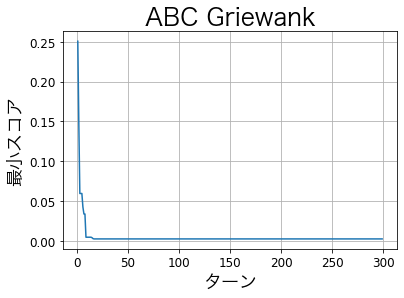


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 299, 'w': 0.5118923682178357, 'c1': 0.6697695448779059, 'c2': 0.8137333021806452}
gb_place : [9.01262520e-04 4.33221775e+00]
gb_score : 0.0077525667802098575
計算時間 : 988 ms



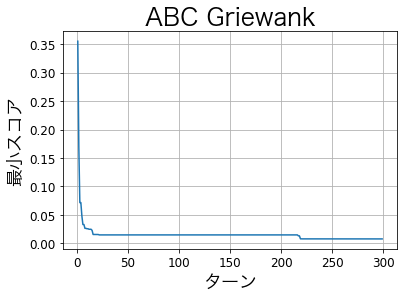


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 299, 'w': 0.5118923682178357, 'c1': 0.6697695448779059, 'c2': 0.8137333021806452}
gb_place : [4.07986790e-09 4.43844448e+00]
gb_score : 0.004929872324173856
計算時間 : 943 ms



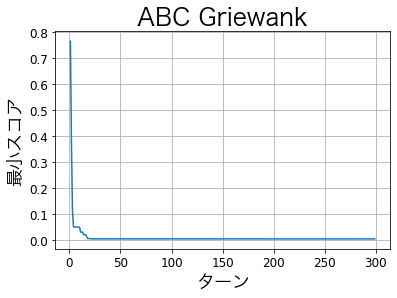

In [41]:
best_params = study.best_params
num_agent = best_params["num_agent"]
max_turn = best_params["max_turn"]
w = best_params["w"]
c1 = best_params["c1"]
c2 = best_params["c2"]

for _ in range(3) : 
    pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                    w, c1, c2, output_mode = output_mode)
    
    plot_score(function_number, pso.gb_record_list, "Griewank")

# Alpine

In [43]:
# パラメータ
N = 10   # 次元
function_number = 5
limit_time = N * 500   # 計算時間の制限、制限時間は (次元) * 0.5秒
repeat_times = 3
output_mode = False   # 計算時間を短くしたいので、output_modeをFalseにしておく

# xの値域は自動化しておく
min_field_list = [-5.0, -5.0, -5.0, -600.0, -10.0, -5.0]
max_field_list = [5.0, 5.0, 10.0, 600.0, 10.0, 5.0]
min_field = min_field_list[function_number - 1]
max_field = max_field_list[function_number - 1]


# optunaに渡す関数
def objective(trial) : 
    num_agent = trial.suggest_int("num_agent", 10, 200)
    max_turn = trial.suggest_int("max_turn", 20, 500)
    w = trial.suggest_uniform("w", 0.0, 1.0)
    c1 = trial.suggest_uniform("c1", 0.0, 1.0)
    c2 = trial.suggest_uniform("c2", 0.0, 1.0)
    
    sum_score = 0.0   # これを最小化するのが目標
    for _ in range(repeat_times) :   # repeat_times回の合計をとる
        pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                      w, c1, c2, output_mode = output_mode)
        
        sum_score += pso.gb_score

        if pso.calculation_time > limit_time :   # 時間制限を超えたら罰則を与える
            # 計算時間に応じて罰則を与えたほうが学習が早く進むはず？
            sum_score += PENALTY * pso.calculation_time / limit_time
            
    return sum_score


# optunaを使う
study = optuna.create_study()
study.optimize(objective, n_trials = 100)

[I 2022-01-15 21:56:13,711] A new study created in memory with name: no-name-dfb124c0-156b-41ca-9ac8-9d3b52304039



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 186, 'max_turn': 114, 'w': 0.0785944652462327, 'c1': 0.673494661865825, 'c2': 0.8171383771104498}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 604 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 186, 'max_turn': 114, 'w': 0.0785944652462327, 'c1': 0.673494661865825, 'c2': 0.8171383771104498}
gb_place : [-0.10016742  3.24176007]
gb_score : 6.106226635438361e-16
計算時間 : 542 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:56:15,291] Trial 0 finished with value: 6.106226635438361e-16 and parameters: {'num_agent': 186, 'max_turn': 114, 'w': 0.0785944652462327, 'c1': 0.673494661865825, 'c2': 0.8171383771104498}. Best is trial 0 with value: 6.106226635438361e-16.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 186, 'max_turn': 114, 'w': 0.0785944652462327, 'c1': 0.673494661865825, 'c2': 0.8171383771104498}
gb_place : [ 7.59670950e-43 -2.93499396e-42]
gb_score : 3.694664906566381e-43
計算時間 : 402 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 318, 'w': 0.3672288619443773, 'c1': 0.16176307649055477, 'c2': 0.3411440345926898}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 502 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 318, 'w': 0.3672288619443773, 'c1': 0.16176307649055477, 'c2': 0.3411440345926898}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 439 ms


--------------------------

[I 2022-01-15 21:56:16,736] Trial 1 finished with value: 5.555950555205717e-69 and parameters: {'num_agent': 89, 'max_turn': 318, 'w': 0.3672288619443773, 'c1': 0.16176307649055477, 'c2': 0.3411440345926898}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 318, 'w': 0.3672288619443773, 'c1': 0.16176307649055477, 'c2': 0.3411440345926898}
gb_place : [-1.00167421e-01 -5.55595056e-68]
gb_score : 5.555950555205717e-69
計算時間 : 471 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 487, 'w': 0.8675309097395574, 'c1': 0.665856338184997, 'c2': 0.26000997428662076}
gb_place : [ 6.58658823e-16 -1.00167421e-01]
gb_score : 1.4913260916033043e-16
計算時間 : 655 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 487, 'w': 0.8675309097395574, 'c1': 0.665856338184997, 'c2': 0.26000997428662076}
gb_place : [-7.77919490e-16 -1.00167421e-01]
gb_score : 7.7791949006

[I 2022-01-15 21:56:18,736] Trial 2 finished with value: 3.183808067417062e-16 and parameters: {'num_agent': 79, 'max_turn': 487, 'w': 0.8675309097395574, 'c1': 0.665856338184997, 'c2': 0.26000997428662076}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 487, 'w': 0.8675309097395574, 'c1': 0.665856338184997, 'c2': 0.26000997428662076}
gb_place : [-7.44817765e-17  8.40080709e-16]
gb_score : 9.14562485751647e-17
計算時間 : 650 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 232, 'w': 0.9583011736715842, 'c1': 0.2055235493023031, 'c2': 0.9312180907668962}
gb_place : [-0.00088721  0.0013711 ]
gb_score : 0.00022692370903117283
計算時間 : 550 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 232, 'w': 0.9583011736715842, 'c1': 0.2055235493023031, 'c2': 0.9312180907668962}
gb_place : [-0.1001979   0.00014708]
gb_score : 1.776872713989846e-05
計算時間 :

[I 2022-01-15 21:56:20,336] Trial 3 finished with value: 0.00045788660694671767 and parameters: {'num_agent': 133, 'max_turn': 232, 'w': 0.9583011736715842, 'c1': 0.2055235493023031, 'c2': 0.9312180907668962}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 232, 'w': 0.9583011736715842, 'c1': 0.2055235493023031, 'c2': 0.9312180907668962}
gb_place : [3.24175827e+00 2.03251909e-03]
gb_score : 0.00021319417077564638
計算時間 : 512 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 219, 'w': 0.15133903362925516, 'c1': 0.5067132951864267, 'c2': 0.3130038512260236}
gb_place : [-1.00167421e-01 -6.41940373e-20]
gb_score : 6.4194037320432836e-21
計算時間 : 594 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 219, 'w': 0.15133903362925516, 'c1': 0.5067132951864267, 'c2': 0.3130038512260236}
gb_place : [-0.10016742 -0.10016742]
gb_score : 1.43982048506075e

[I 2022-01-15 21:56:22,137] Trial 4 finished with value: 1.0993048316093962e-08 and parameters: {'num_agent': 149, 'max_turn': 219, 'w': 0.15133903362925516, 'c1': 0.5067132951864267, 'c2': 0.3130038512260236}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 219, 'w': 0.15133903362925516, 'c1': 0.5067132951864267, 'c2': 0.3130038512260236}
gb_place : [-2.77296790e-11  1.09902631e-07]
gb_score : 1.0993048172105494e-08
計算時間 : 586 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 465, 'w': 0.27049241636520494, 'c1': 0.9194324105888123, 'c2': 0.25113644102851485}
gb_place : [ 1.58211508e-17 -1.00168337e-01]
gb_score : 9.127851394853674e-08
計算時間 : 1321 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 465, 'w': 0.27049241636520494, 'c1': 0.9194324105888123, 'c2': 0.25113644102851485}
gb_place : [ 1.29683814e-11 -3.47748219e-22]
gb_score : 1.29

[I 2022-01-15 21:56:26,355] Trial 5 finished with value: 4145.000000926684 and parameters: {'num_agent': 167, 'max_turn': 465, 'w': 0.27049241636520494, 'c1': 0.9194324105888123, 'c2': 0.25113644102851485}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 465, 'w': 0.27049241636520494, 'c1': 0.9194324105888123, 'c2': 0.25113644102851485}
gb_place : [-1.00175681e-01 -1.20731721e-07]
gb_score : 8.354049269024362e-07
計算時間 : 1368 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 232, 'w': 0.0015242944169556738, 'c1': 0.2507044993594696, 'c2': 0.5836524238016989}
gb_place : [-0.10016742 -0.10016742]
gb_score : 3.122502256758253e-16
計算時間 : 371 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 232, 'w': 0.0015242944169556738, 'c1': 0.2507044993594696, 'c2': 0.5836524238016989}
gb_place : [-0.09548846 -3.04142523]
gb_score : 0.000444650217275577

[I 2022-01-15 21:56:27,494] Trial 6 finished with value: 0.0022118908831126006 and parameters: {'num_agent': 89, 'max_turn': 232, 'w': 0.0015242944169556738, 'c1': 0.2507044993594696, 'c2': 0.5836524238016989}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 232, 'w': 0.0015242944169556738, 'c1': 0.2507044993594696, 'c2': 0.5836524238016989}
gb_place : [ 3.24176007 -0.0771785 ]
gb_score : 0.001767240665836711
計算時間 : 382 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 354, 'w': 0.9159487962603572, 'c1': 0.8821191791288955, 'c2': 0.5796031682085283}
gb_place : [-2.50502952e-08  8.51940659e-08]
gb_score : 1.1024442740601173e-08
計算時間 : 604 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 354, 'w': 0.9159487962603572, 'c1': 0.8821191791288955, 'c2': 0.5796031682085283}
gb_place : [-1.38403552e-08  1.51411186e-08]
gb_score : 2.8981474197294483e

[I 2022-01-15 21:56:29,399] Trial 7 finished with value: 6.088625254070215e-08 and parameters: {'num_agent': 96, 'max_turn': 354, 'w': 0.9159487962603572, 'c1': 0.8821191791288955, 'c2': 0.5796031682085283}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 96, 'max_turn': 354, 'w': 0.9159487962603572, 'c1': 0.8821191791288955, 'c2': 0.5796031682085283}
gb_place : [4.12933915e-07 5.67009717e-08]
gb_score : 4.6963662380371535e-08
計算時間 : 651 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 13, 'max_turn': 469, 'w': 0.8439792069448979, 'c1': 0.9073063076389489, 'c2': 0.8957723738771316}
gb_place : [ 9.52494538 -0.10016742]
gb_score : 2.273840837840879e-13
計算時間 : 118 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:56:29,763] Trial 8 finished with value: 5.233930505542815e-13 and parameters: {'num_agent': 13, 'max_turn': 469, 'w': 0.8439792069448979, 'c1': 0.9073063076389489, 'c2': 0.8957723738771316}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 13, 'max_turn': 469, 'w': 0.8439792069448979, 'c1': 0.9073063076389489, 'c2': 0.8957723738771316}
gb_place : [3.24176007e+00 4.03176653e-13]
gb_score : 5.258562972722407e-14
計算時間 : 121 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 13, 'max_turn': 469, 'w': 0.8439792069448979, 'c1': 0.9073063076389489, 'c2': 0.8957723738771316}
gb_place : [-0.10016742 -3.04142523]
gb_score : 2.434233370429695e-13
計算時間 : 113 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 165, 'w': 0.18393232734353593, 'c1': 0.9284593657698083, 'c2': 0.7327146002449247}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 421 ms


----------

[I 2022-01-15 21:56:31,124] Trial 9 finished with value: 0.00021582474823136888 and parameters: {'num_agent': 154, 'max_turn': 165, 'w': 0.18393232734353593, 'c1': 0.9284593657698083, 'c2': 0.7327146002449247}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 154, 'max_turn': 165, 'w': 0.18393232734353593, 'c1': 0.9284593657698083, 'c2': 0.7327146002449247}
gb_place : [-9.32461054e+00 -2.20695390e-03]
gb_score : 0.00021582474823136888
計算時間 : 481 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 354, 'w': 0.5662094142121018, 'c1': 0.010014527297176834, 'c2': 0.06362211759256453}
gb_place : [-1.88588723e-11 -9.61642968e-02]
gb_score : 0.00038310404847007555
計算時間 : 312 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 354, 'w': 0.5662094142121018, 'c1': 0.010014527297176834, 'c2': 0.06362211759256453}
gb_place : [-1.00167421e-01 -4.69252203e-06]
gb_score : 4.69

[I 2022-01-15 21:56:32,059] Trial 10 finished with value: 0.00038365185084585416 and parameters: {'num_agent': 40, 'max_turn': 354, 'w': 0.5662094142121018, 'c1': 0.010014527297176834, 'c2': 0.06362211759256453}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 354, 'w': 0.5662094142121018, 'c1': 0.010014527297176834, 'c2': 0.06362211759256453}
gb_place : [-1.00167442e-01 -7.64792514e-07]
gb_score : 7.85721868237881e-08
計算時間 : 301 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 363, 'w': 0.48085724446717865, 'c1': 0.5750521848338004, 'c2': 0.2687020093132458}
gb_place : [-1.47258993e-62 -1.00167421e-01]
gb_score : 1.472589933429578e-63
計算時間 : 403 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 363, 'w': 0.48085724446717865, 'c1': 0.5750521848338004, 'c2': 0.2687020093132458}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 380 ms


[I 2022-01-15 21:56:33,250] Trial 11 finished with value: 1.7342478084388229e-63 and parameters: {'num_agent': 62, 'max_turn': 363, 'w': 0.48085724446717865, 'c1': 0.5750521848338004, 'c2': 0.2687020093132458}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 363, 'w': 0.48085724446717865, 'c1': 0.5750521848338004, 'c2': 0.2687020093132458}
gb_place : [-2.61657875e-63 -1.00167421e-01]
gb_score : 2.6165787500924486e-64
計算時間 : 378 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 51, 'max_turn': 348, 'w': 0.47421947531326614, 'c1': 0.33216656181616444, 'c2': 0.006019554167736807}
gb_place : [ 0.18549908 -0.20550339]
gb_score : 0.0741474950876245
計算時間 : 295 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 51, 'max_turn': 348, 'w': 0.47421947531326614, 'c1': 0.33216656181616444, 'c2': 0.006019554167736807}
gb_place : [-0.15847529 -6.38239239]
gb_score : 0.015260711833293032
計算

[I 2022-01-15 21:56:34,197] Trial 12 finished with value: 0.10205989368938052 and parameters: {'num_agent': 51, 'max_turn': 348, 'w': 0.47421947531326614, 'c1': 0.33216656181616444, 'c2': 0.006019554167736807}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 51, 'max_turn': 348, 'w': 0.47421947531326614, 'c1': 0.33216656181616444, 'c2': 0.006019554167736807}
gb_place : [ 3.23859381 -0.05738642]
gb_score : 0.012651686768463002
計算時間 : 312 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 57, 'max_turn': 320, 'w': 0.44748006612287705, 'c1': 0.02461677797394418, 'c2': 0.4350723600307398}
gb_place : [-1.00167421e-01 -3.39774363e-56]
gb_score : 3.397743631822233e-57
計算時間 : 305 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 57, 'max_turn': 320, 'w': 0.44748006612287705, 'c1': 0.02461677797394418, 'c2': 0.4350723600307398}
gb_place : [-1.00167421e-01  4.35417887e-56]
gb_score : 4.3541788682826

[I 2022-01-15 21:56:35,122] Trial 13 finished with value: 2.2023148533911314e-56 and parameters: {'num_agent': 57, 'max_turn': 320, 'w': 0.44748006612287705, 'c1': 0.02461677797394418, 'c2': 0.4350723600307398}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 57, 'max_turn': 320, 'w': 0.44748006612287705, 'c1': 0.02461677797394418, 'c2': 0.4350723600307398}
gb_place : [ 1.42712260e-55 -1.00167421e-01]
gb_score : 1.4271226033806442e-56
計算時間 : 297 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 417, 'w': 0.6568998303039075, 'c1': 0.45988781394327743, 'c2': 0.1492884268527258}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 882 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 417, 'w': 0.6568998303039075, 'c1': 0.45988781394327743, 'c2': 0.1492884268527258}
gb_place : [ 3.05460383e-39 -1.45341216e-39]
gb_score : 4.508015985242136e-40
計算時間 : 868 

[I 2022-01-15 21:56:37,788] Trial 14 finished with value: 4.508015985242136e-40 and parameters: {'num_agent': 123, 'max_turn': 417, 'w': 0.6568998303039075, 'c1': 0.45988781394327743, 'c2': 0.1492884268527258}. Best is trial 1 with value: 5.555950555205717e-69.
[I 2022-01-15 21:56:37,957] Trial 15 finished with value: 0.04290474715666327 and parameters: {'num_agent': 11, 'max_turn': 296, 'w': 0.33588089271892907, 'c1': 0.5286390274191206, 'c2': 0.39041005738495105}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 123, 'max_turn': 417, 'w': 0.6568998303039075, 'c1': 0.45988781394327743, 'c2': 0.1492884268527258}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 856 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 11, 'max_turn': 296, 'w': 0.33588089271892907, 'c1': 0.5286390274191206, 'c2': 0.39041005738495105}
gb_place : [-0.09760701  0.00049126]
gb_score : 0.00029806081725538354
計算時間 : 52 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 11, 'max_turn': 296, 'w': 0.33588089271892907, 'c1': 0.5286390274191206, 'c2': 0.39041005738495105}
gb_place : [-0.21880632  3.24176007]
gb_score : 0.025614466849467617
計算時間 : 50 ms


--------------

[I 2022-01-15 21:56:39,521] Trial 16 finished with value: 6.290954572364834e-16 and parameters: {'num_agent': 71, 'max_turn': 427, 'w': 0.7063781026139475, 'c1': 0.7173682803465515, 'c2': 0.1414759729920633}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 427, 'w': 0.7063781026139475, 'c1': 0.7173682803465515, 'c2': 0.1414759729920633}
gb_place : [ 1.38343453e-32 -1.00167421e-01]
gb_score : 1.3834345286740667e-33
計算時間 : 510 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 396, 'w': 0.3724524499320729, 'c1': 0.15901510428891813, 'c2': 0.5193505343419383}
gb_place : [-6.38335273 -0.09940259]
gb_score : 7.564809549309368e-05
計算時間 : 730 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 396, 'w': 0.3724524499320729, 'c1': 0.15901510428891813, 'c2': 0.5193505343419383}
gb_place : [ 1.57776170e-85 -1.00167421e-01]
gb_score : 1.57776170433765e

[I 2022-01-15 21:56:41,782] Trial 17 finished with value: 7.564809549309368e-05 and parameters: {'num_agent': 112, 'max_turn': 396, 'w': 0.3724524499320729, 'c1': 0.15901510428891813, 'c2': 0.5193505343419383}. Best is trial 1 with value: 5.555950555205717e-69.
[I 2022-01-15 21:56:41,883] Trial 18 finished with value: 0.000871786379598155 and parameters: {'num_agent': 29, 'max_turn': 51, 'w': 0.6277558458477738, 'c1': 0.33109556475128, 'c2': 0.35787472363343303}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 396, 'w': 0.3724524499320729, 'c1': 0.15901510428891813, 'c2': 0.5193505343419383}
gb_place : [1.81045162e-83 3.54633523e-83]
gb_score : 5.356786841789256e-84
計算時間 : 743 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 29, 'max_turn': 51, 'w': 0.6277558458477738, 'c1': 0.33109556475128, 'c2': 0.35787472363343303}
gb_place : [-3.04142702 -0.00702525]
gb_score : 0.0006585794082342887
計算時間 : 30 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 29, 'max_turn': 51, 'w': 0.6277558458477738, 'c1': 0.33109556475128, 'c2': 0.35787472363343303}
gb_place : [-0.10016788 -0.10016562]
gb_score : 2.2486573414588762e-07
計算時間 : 29 ms

[I 2022-01-15 21:56:42,995] Trial 19 finished with value: 1.106199156740546e-23 and parameters: {'num_agent': 73, 'max_turn': 279, 'w': 0.7404496978578592, 'c1': 0.7691459651581949, 'c2': 0.1803332791368613}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 73, 'max_turn': 279, 'w': 0.7404496978578592, 'c1': 0.7691459651581949, 'c2': 0.1803332791368613}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 358 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 184, 'w': 0.5224369343541047, 'c1': 0.5712013473003935, 'c2': 0.4511821769978077}
gb_place : [ 5.22356004e-29 -1.00167421e-01]
gb_score : 5.223560041705162e-30
計算時間 : 355 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 184, 'w': 0.5224369343541047, 'c1': 0.5712013473003935, 'c2': 0.4511821769978077}
gb_place : [-5.27277856e-29  1.20057037e-28]
gb_score : 1.7278482292356607e-29
計算時間 : 348 ms



[I 2022-01-15 21:56:44,072] Trial 20 finished with value: 2.4231747335808705e-29 and parameters: {'num_agent': 107, 'max_turn': 184, 'w': 0.5224369343541047, 'c1': 0.5712013473003935, 'c2': 0.4511821769978077}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 184, 'w': 0.5224369343541047, 'c1': 0.5712013473003935, 'c2': 0.4511821769978077}
gb_place : [-1.72970500e-29 -1.00167421e-01]
gb_score : 1.7297050017469366e-30
計算時間 : 341 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 57, 'max_turn': 306, 'w': 0.4022736401056115, 'c1': 0.004647988746633469, 'c2': 0.4484667871613234}
gb_place : [0.06741197 3.24176007]
gb_score : 0.011282130678972456
計算時間 : 296 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 57, 'max_turn': 306, 'w': 0.4022736401056115, 'c1': 0.004647988746633469, 'c2': 0.4484667871613234}
gb_place : [3.83620724e-56 5.60446297e-57]
gb_score : 4.3966535416612594e-5

[I 2022-01-15 21:56:44,977] Trial 21 finished with value: 0.01129264502753174 and parameters: {'num_agent': 57, 'max_turn': 306, 'w': 0.4022736401056115, 'c1': 0.004647988746633469, 'c2': 0.4484667871613234}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 57, 'max_turn': 306, 'w': 0.4022736401056115, 'c1': 0.004647988746633469, 'c2': 0.4484667871613234}
gb_place : [-3.04142523e+00  1.05033135e-04]
gb_score : 1.0514348559283395e-05
計算時間 : 285 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 64, 'max_turn': 321, 'w': 0.4574234860616749, 'c1': 0.1069857754278784, 'c2': 0.6670009188925604}
gb_place : [3.01851579e-03 3.24176007e+00]
gb_score : 0.0003109630030066822
計算時間 : 355 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 64, 'max_turn': 321, 'w': 0.4574234860616749, 'c1': 0.1069857754278784, 'c2': 0.6670009188925604}
gb_place : [-1.85042989e-54 -1.00167421e-01]
gb_score : 1.85042989182

[I 2022-01-15 21:56:46,061] Trial 22 finished with value: 0.00034573742095041346 and parameters: {'num_agent': 64, 'max_turn': 321, 'w': 0.4574234860616749, 'c1': 0.1069857754278784, 'c2': 0.6670009188925604}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 64, 'max_turn': 321, 'w': 0.4574234860616749, 'c1': 0.1069857754278784, 'c2': 0.6670009188925604}
gb_place : [-0.10051513  6.18301789]
gb_score : 3.4774417943731276e-05
計算時間 : 366 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 34, 'max_turn': 389, 'w': 0.27638771770414805, 'c1': 0.07788720677927209, 'c2': 0.2671194880811516}
gb_place : [ 6.45425850e-07 -1.00167421e-01]
gb_score : 6.454300153134476e-08
計算時間 : 226 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 34, 'max_turn': 389, 'w': 0.27638771770414805, 'c1': 0.07788720677927209, 'c2': 0.2671194880811516}
gb_place : [-1.00129449e-01  7.98480500e-07]
gb_score : 3.862895451683496

[I 2022-01-15 21:56:46,769] Trial 23 finished with value: 0.001547479629351016 and parameters: {'num_agent': 34, 'max_turn': 389, 'w': 0.27638771770414805, 'c1': 0.07788720677927209, 'c2': 0.2671194880811516}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 34, 'max_turn': 389, 'w': 0.27638771770414805, 'c1': 0.07788720677927209, 'c2': 0.2671194880811516}
gb_place : [3.24147339 3.24156818]
gb_score : 0.0015435521908978012
計算時間 : 226 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 263, 'w': 0.5447030414201008, 'c1': 0.41785342485743626, 'c2': 0.3462192567869934}
gb_place : [-1.00167421e-01  2.28974200e-38]
gb_score : 2.289741995533276e-39
計算時間 : 217 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 263, 'w': 0.5447030414201008, 'c1': 0.41785342485743626, 'c2': 0.3462192567869934}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 211 ms


--------

[I 2022-01-15 21:56:47,436] Trial 24 finished with value: 6.106226635438361e-16 and parameters: {'num_agent': 50, 'max_turn': 263, 'w': 0.5447030414201008, 'c1': 0.41785342485743626, 'c2': 0.3462192567869934}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 50, 'max_turn': 263, 'w': 0.5447030414201008, 'c1': 0.41785342485743626, 'c2': 0.3462192567869934}
gb_place : [-0.10016742  3.24176007]
gb_score : 6.106226635438361e-16
計算時間 : 214 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 86, 'max_turn': 332, 'w': 0.4283732407198588, 'c1': 0.602830331071271, 'c2': 0.41256650703235936}
gb_place : [-0.10016742 -3.04142523]
gb_score : 2.220446049250313e-16
計算時間 : 450 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 86, 'max_turn': 332, 'w': 0.4283732407198588, 'c1': 0.602830331071271, 'c2': 0.41256650703235936}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 446 ms


-----------------

[I 2022-01-15 21:56:48,850] Trial 25 finished with value: 2.220446049250313e-16 and parameters: {'num_agent': 86, 'max_turn': 332, 'w': 0.4283732407198588, 'c1': 0.602830331071271, 'c2': 0.41256650703235936}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 86, 'max_turn': 332, 'w': 0.4283732407198588, 'c1': 0.602830331071271, 'c2': 0.41256650703235936}
gb_place : [ 7.99116688e-62 -5.03836818e-62]
gb_score : 1.302953506028927e-62
計算時間 : 478 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 23, 'max_turn': 377, 'w': 0.31022992894428225, 'c1': 0.3810303394413441, 'c2': 0.5545768410224671}
gb_place : [-2.21059722e-26  2.22368218e-11]
gb_score : 2.2236821817684e-12
計算時間 : 139 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:56:49,279] Trial 26 finished with value: 0.02758925169305384 and parameters: {'num_agent': 23, 'max_turn': 377, 'w': 0.31022992894428225, 'c1': 0.3810303394413441, 'c2': 0.5545768410224671}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 23, 'max_turn': 377, 'w': 0.31022992894428225, 'c1': 0.3810303394413441, 'c2': 0.5545768410224671}
gb_place : [-3.04142523  0.11947881]
gb_score : 0.026189127787879882
計算時間 : 136 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 23, 'max_turn': 377, 'w': 0.31022992894428225, 'c1': 0.3810303394413441, 'c2': 0.5545768410224671}
gb_place : [3.24176007 0.012451  ]
gb_score : 0.0014001239029502745
計算時間 : 134 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 439, 'w': 0.21003354733589913, 'c1': 0.8056555523044782, 'c2': 0.22182759604268193}
gb_place : [3.15939233e-20 4.18578768e-04]
gb_score : 4.203308496608776e-05
計算時間 : 70

[I 2022-01-15 21:56:51,449] Trial 27 finished with value: 0.001295540236006099 and parameters: {'num_agent': 98, 'max_turn': 439, 'w': 0.21003354733589913, 'c1': 0.8056555523044782, 'c2': 0.22182759604268193}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 439, 'w': 0.21003354733589913, 'c1': 0.8056555523044782, 'c2': 0.22182759604268193}
gb_place : [-0.10016742  0.00104035]
gb_score : 0.00010511753629724112
計算時間 : 711 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 284, 'w': 0.6048644729781414, 'c1': 0.264922636542845, 'c2': 0.48098737817434534}
gb_place : [2.73364163e-32 2.85797749e-33]
gb_score : 3.0194393841390307e-33
計算時間 : 210 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:56:52,118] Trial 28 finished with value: 4.76553433030595e-33 and parameters: {'num_agent': 47, 'max_turn': 284, 'w': 0.6048644729781414, 'c1': 0.264922636542845, 'c2': 0.48098737817434534}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 284, 'w': 0.6048644729781414, 'c1': 0.264922636542845, 'c2': 0.48098737817434534}
gb_place : [7.14144285e-33 9.81469477e-33]
gb_score : 1.6956137616569666e-33
計算時間 : 217 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 47, 'max_turn': 284, 'w': 0.6048644729781414, 'c1': 0.264922636542845, 'c2': 0.48098737817434534}
gb_place : [-1.00167421e-01 -5.04811845e-34]
gb_score : 5.048118450995319e-35
計算時間 : 217 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 63, 'max_turn': 131, 'w': 0.08945316769510636, 'c1': 0.054301912218265344, 'c2': 0.07224650845029293}
gb_place : [-0.13591657  3.24124705]
gb_score : 0.00647939455344318

[I 2022-01-15 21:56:52,579] Trial 29 finished with value: 0.007476017438645081 and parameters: {'num_agent': 63, 'max_turn': 131, 'w': 0.08945316769510636, 'c1': 0.054301912218265344, 'c2': 0.07224650845029293}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 63, 'max_turn': 131, 'w': 0.08945316769510636, 'c1': 0.054301912218265344, 'c2': 0.07224650845029293}
gb_place : [5.55007801e-03 2.99532485e-05]
gb_score : 0.0005888072310167121
計算時間 : 153 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 318, 'w': 0.4913113511534282, 'c1': 0.6378733830660795, 'c2': 0.6508351163968747}
gb_place : [ 1.01220640e-51 -8.26901932e-51]
gb_score : 9.281225723086908e-52
計算時間 : 411 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 318, 'w': 0.4913113511534282, 'c1': 0.6378733830660795, 'c2': 0.6508351163968747}
gb_place : [-1.00167421e-01  8.40334810e-53]
gb_score : 8.4033480978

[I 2022-01-15 21:56:53,924] Trial 30 finished with value: 0.003098396151128488 and parameters: {'num_agent': 79, 'max_turn': 318, 'w': 0.4913113511534282, 'c1': 0.6378733830660795, 'c2': 0.6508351163968747}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 318, 'w': 0.4913113511534282, 'c1': 0.6378733830660795, 'c2': 0.6508351163968747}
gb_place : [ 9.52494538 -0.12509446]
gb_score : 0.003098396151128488
計算時間 : 498 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 124, 'max_turn': 422, 'w': 0.6702354357405951, 'c1': 0.45468635829910253, 'c2': 0.1574149870838887}
gb_place : [-1.00167421e-01  1.22562937e-40]
gb_score : 1.2256293667901465e-41
計算時間 : 853 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 124, 'max_turn': 422, 'w': 0.6702354357405951, 'c1': 0.45468635829910253, 'c2': 0.1574149870838887}
gb_place : [9.51012668e-39 2.51094123e-38]
gb_score : 3.4619538990221255e-

[I 2022-01-15 21:56:56,571] Trial 31 finished with value: 3.8724944325193065e-39 and parameters: {'num_agent': 124, 'max_turn': 422, 'w': 0.6702354357405951, 'c1': 0.45468635829910253, 'c2': 0.1574149870838887}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 124, 'max_turn': 422, 'w': 0.6702354357405951, 'c1': 0.45468635829910253, 'c2': 0.1574149870838887}
gb_place : [-5.31775901e-40  3.45106650e-39]
gb_score : 3.9828423982927945e-40
計算時間 : 877 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 500, 'w': 0.7579398812861462, 'c1': 0.1476855749742586, 'c2': 0.32024423908927835}
gb_place : [-0.10016742 -3.04142523]
gb_score : 1.2959884207464079e-10
計算時間 : 1037 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 500, 'w': 0.7579398812861462, 'c1': 0.1476855749742586, 'c2': 0.32024423908927835}
gb_place : [-8.95234015e-33 -1.00167421e-01]
gb_score : 8.95234014576

[I 2022-01-15 21:56:59,536] Trial 32 finished with value: 1037.0000000001296 and parameters: {'num_agent': 120, 'max_turn': 500, 'w': 0.7579398812861462, 'c1': 0.1476855749742586, 'c2': 0.32024423908927835}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 500, 'w': 0.7579398812861462, 'c1': 0.1476855749742586, 'c2': 0.32024423908927835}
gb_place : [-6.54199006e-32  3.39956740e-32]
gb_score : 9.941557461169515e-33
計算時間 : 940 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 384, 'w': 0.3830135064904225, 'c1': 0.46820690293960926, 'c2': 0.100942618541284}
gb_place : [-0.10016742  0.00464716]
gb_score : 0.0004863121047721158
計算時間 : 1226 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 384, 'w': 0.3830135064904225, 'c1': 0.46820690293960926, 'c2': 0.100942618541284}
gb_place : [-0.00020049 -0.0989155 ]
gb_score : 0.00014323092520451757
計算

[I 2022-01-15 21:57:03,262] Trial 33 finished with value: 3645.0006335879502 and parameters: {'num_agent': 195, 'max_turn': 384, 'w': 0.3830135064904225, 'c1': 0.46820690293960926, 'c2': 0.100942618541284}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 384, 'w': 0.3830135064904225, 'c1': 0.46820690293960926, 'c2': 0.100942618541284}
gb_place : [ 3.24176007 -0.10012682]
gb_score : 4.044920035608385e-06
計算時間 : 1219 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 248, 'w': 0.5866446042159394, 'c1': 0.213151921936258, 'c2': 0.28541802149891893}
gb_place : [ 1.83720192e-33 -1.00167421e-01]
gb_score : 1.837201916215822e-34
計算時間 : 578 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 248, 'w': 0.5866446042159394, 'c1': 0.213151921936258, 'c2': 0.28541802149891893}
gb_place : [-0.10016742  3.24176007]
gb_score : 6.106226635438361e-16
計算時間

[I 2022-01-15 21:57:04,983] Trial 34 finished with value: 6.106226635438361e-16 and parameters: {'num_agent': 138, 'max_turn': 248, 'w': 0.5866446042159394, 'c1': 0.213151921936258, 'c2': 0.28541802149891893}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 248, 'w': 0.5866446042159394, 'c1': 0.213151921936258, 'c2': 0.28541802149891893}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 545 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 409, 'w': 0.6526444682216376, 'c1': 0.5412480810375351, 'c2': 0.21788064934358187}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 641 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 409, 'w': 0.6526444682216376, 'c1': 0.5412480810375351, 'c2': 0.21788064934358187}
gb_place : [-5.73650031e-41 -8.96026141e-41]
gb_score : 1.4696761721823762e-41
計算時間 : 646 ms


------------------------

[I 2022-01-15 21:57:06,961] Trial 35 finished with value: 1.4743849183459912e-41 and parameters: {'num_agent': 98, 'max_turn': 409, 'w': 0.6526444682216376, 'c1': 0.5412480810375351, 'c2': 0.21788064934358187}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 409, 'w': 0.6526444682216376, 'c1': 0.5412480810375351, 'c2': 0.21788064934358187}
gb_place : [-1.00167421e-01 -4.70874616e-43]
gb_score : 4.7087461636151e-44
計算時間 : 640 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 362, 'w': 0.8201733984438397, 'c1': 0.553528301530577, 'c2': 0.23422950510516882}
gb_place : [-4.41959401e-18 -5.04562449e-17]
gb_score : 5.4875838893388095e-18
計算時間 : 503 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 362, 'w': 0.8201733984438397, 'c1': 0.553528301530577, 'c2': 0.23422950510516882}
gb_place : [ 1.61553959e-18 -1.00167421e-01]
gb_score : 1.615539594452

[I 2022-01-15 21:57:08,520] Trial 36 finished with value: 7.608438081122487e-18 and parameters: {'num_agent': 85, 'max_turn': 362, 'w': 0.8201733984438397, 'c1': 0.553528301530577, 'c2': 0.23422950510516882}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 362, 'w': 0.8201733984438397, 'c1': 0.553528301530577, 'c2': 0.23422950510516882}
gb_place : [-1.00167421e-01  1.95930023e-17]
gb_score : 1.9593002323384208e-18
計算時間 : 515 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 99, 'max_turn': 335, 'w': 0.5141993677826698, 'c1': 0.6822239957403426, 'c2': 0.40444701999602967}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 511 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 99, 'max_turn': 335, 'w': 0.5141993677826698, 'c1': 0.6822239957403426, 'c2': 0.40444701999602967}
gb_place : [-1.50114870e-51 -2.68746424e-51]
gb_score : 4.188612938396478e-52
計算時間 : 545 ms



[I 2022-01-15 21:57:10,145] Trial 37 finished with value: 4.188612938396478e-52 and parameters: {'num_agent': 99, 'max_turn': 335, 'w': 0.5141993677826698, 'c1': 0.6822239957403426, 'c2': 0.40444701999602967}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 99, 'max_turn': 335, 'w': 0.5141993677826698, 'c1': 0.6822239957403426, 'c2': 0.40444701999602967}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 523 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 334, 'w': 0.4380671226076098, 'c1': 0.6682366896229147, 'c2': 0.37640717703136156}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 360 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 334, 'w': 0.4380671226076098, 'c1': 0.6682366896229147, 'c2': 0.37640717703136156}
gb_place : [-7.29429063e-61 -1.00167421e-01]
gb_score : 7.294290632658158e-62
計算時間 : 390 ms


-------------------------

[I 2022-01-15 21:57:11,376] Trial 38 finished with value: 0.00011691713216169415 and parameters: {'num_agent': 71, 'max_turn': 334, 'w': 0.4380671226076098, 'c1': 0.6682366896229147, 'c2': 0.37640717703136156}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 334, 'w': 0.4380671226076098, 'c1': 0.6682366896229147, 'c2': 0.37640717703136156}
gb_place : [-0.09902628 -0.10021229]
gb_score : 0.00011691713216169415
計算時間 : 442 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 92, 'max_turn': 225, 'w': 0.3310256966522618, 'c1': 0.8172889917406878, 'c2': 0.4322227966697353}
gb_place : [-0.10016742 -0.10016742]
gb_score : 4.683744711519999e-12
計算時間 : 357 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 92, 'max_turn': 225, 'w': 0.3310256966522618, 'c1': 0.8172889917406878, 'c2': 0.4322227966697353}
gb_place : [-2.26456305e-56 -1.00167421e-01]
gb_score : 2.264563045778953e-57
計算時間 :

[I 2022-01-15 21:57:12,499] Trial 39 finished with value: 4.683744711519999e-12 and parameters: {'num_agent': 92, 'max_turn': 225, 'w': 0.3310256966522618, 'c1': 0.8172889917406878, 'c2': 0.4322227966697353}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 92, 'max_turn': 225, 'w': 0.3310256966522618, 'c1': 0.8172889917406878, 'c2': 0.4322227966697353}
gb_place : [-1.00167421e-01 -7.73476744e-56]
gb_score : 7.73476743991976e-57
計算時間 : 356 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 111, 'max_turn': 263, 'w': 0.21461831581784707, 'c1': 0.7182788395299351, 'c2': 0.5128385870367912}
gb_place : [3.24176007e+00 2.33029508e-10]
gb_score : 2.3303561502484573e-11
計算時間 : 599 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 111, 'max_turn': 263, 'w': 0.21461831581784707, 'c1': 0.7182788395299351, 'c2': 0.5128385870367912}
gb_place : [-1.00167421e-01 -1.85696020e-72]
gb_score : 1.8569601986

[I 2022-01-15 21:57:14,266] Trial 40 finished with value: 2.3303561502484573e-11 and parameters: {'num_agent': 111, 'max_turn': 263, 'w': 0.21461831581784707, 'c1': 0.7182788395299351, 'c2': 0.5128385870367912}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 111, 'max_turn': 263, 'w': 0.21461831581784707, 'c1': 0.7182788395299351, 'c2': 0.5128385870367912}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 521 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 456, 'w': 0.5266165755945977, 'c1': 0.6074242990682487, 'c2': 0.303855185070137}
gb_place : [-1.34934176e-67 -1.00167421e-01]
gb_score : 1.349341757979884e-68
計算時間 : 847 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 456, 'w': 0.5266165755945977, 'c1': 0.6074242990682487, 'c2': 0.303855185070137}
gb_place : [-8.49385052e-70 -1.00167421e-01]
gb_score : 8.493850524871416e-71
計算時間 : 1049 ms


-

[I 2022-01-15 21:57:17,035] Trial 41 finished with value: 1049.0 and parameters: {'num_agent': 98, 'max_turn': 456, 'w': 0.5266165755945977, 'c1': 0.6074242990682487, 'c2': 0.303855185070137}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 456, 'w': 0.5266165755945977, 'c1': 0.6074242990682487, 'c2': 0.303855185070137}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 815 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 361, 'w': 0.5024167584538741, 'c1': 0.7253725017638418, 'c2': 0.2242765794325992}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 515 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 361, 'w': 0.5024167584538741, 'c1': 0.7253725017638418, 'c2': 0.2242765794325992}
gb_place : [-1.22029084e-53 -1.00167421e-01]
gb_score : 1.2202908411168605e-54
計算時間 : 529 ms


----------------------------

[I 2022-01-15 21:57:18,666] Trial 42 finished with value: 1.9184931630975752e-16 and parameters: {'num_agent': 79, 'max_turn': 361, 'w': 0.5024167584538741, 'c1': 0.7253725017638418, 'c2': 0.2242765794325992}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 361, 'w': 0.5024167584538741, 'c1': 0.7253725017638418, 'c2': 0.2242765794325992}
gb_place : [-1.83769687e-16 -1.00167421e-01]
gb_score : 1.9184931630975752e-16
計算時間 : 540 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 405, 'w': 0.5544076057031242, 'c1': 0.5067432786649679, 'c2': 0.3417322212400431}
gb_place : [-1.00167421e-01  1.51480570e-57]
gb_score : 1.5148057015987995e-58
計算時間 : 799 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 405, 'w': 0.5544076057031242, 'c1': 0.5067432786649679, 'c2': 0.3417322212400431}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 739 ms


[I 2022-01-15 21:57:21,057] Trial 43 finished with value: 2.135650567095741e-56 and parameters: {'num_agent': 102, 'max_turn': 405, 'w': 0.5544076057031242, 'c1': 0.5067432786649679, 'c2': 0.3417322212400431}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 102, 'max_turn': 405, 'w': 0.5544076057031242, 'c1': 0.5067432786649679, 'c2': 0.3417322212400431}
gb_place : [ 1.90835785e-55 -2.12144663e-56]
gb_score : 2.1205025100797526e-56
計算時間 : 797 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 313, 'w': 0.5581171403675953, 'c1': 0.49955618292005066, 'c2': 0.3225402015933732}
gb_place : [9.07867354e-42 1.55220888e-42]
gb_score : 1.0630882413248711e-42
計算時間 : 357 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 313, 'w': 0.5581171403675953, 'c1': 0.49955618292005066, 'c2': 0.3225402015933732}
gb_place : [1.53282140e-41 9.94856433e-42]
gb_score : 2.52767783768

[I 2022-01-15 21:57:22,141] Trial 44 finished with value: 3.596277355378183e-42 and parameters: {'num_agent': 59, 'max_turn': 313, 'w': 0.5581171403675953, 'c1': 0.49955618292005066, 'c2': 0.3225402015933732}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 313, 'w': 0.5581171403675953, 'c1': 0.49955618292005066, 'c2': 0.3225402015933732}
gb_place : [-1.00167421e-01 -5.51127637e-44]
gb_score : 5.511276370268133e-45
計算時間 : 335 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 338, 'w': 0.4557192670536624, 'c1': 0.6231867666022084, 'c2': 0.4147516403236917}
gb_place : [0.01941112 6.18301789]
gb_score : 0.002317880499197063
計算時間 : 273 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 338, 'w': 0.4557192670536624, 'c1': 0.6231867666022084, 'c2': 0.4147516403236917}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 250 ms


------------

[I 2022-01-15 21:57:22,961] Trial 45 finished with value: 0.002317880499197063 and parameters: {'num_agent': 40, 'max_turn': 338, 'w': 0.4557192670536624, 'c1': 0.6231867666022084, 'c2': 0.4147516403236917}. Best is trial 1 with value: 5.555950555205717e-69.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 338, 'w': 0.4557192670536624, 'c1': 0.6231867666022084, 'c2': 0.4147516403236917}
gb_place : [-6.00600211e-58  7.59155397e-58]
gb_score : 1.3597556077681287e-58
計算時間 : 265 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 104, 'max_turn': 376, 'w': 0.36060443555234756, 'c1': 0.3691588402916999, 'c2': 0.3691166772579963}
gb_place : [ 1.37166076e-84 -1.00167421e-01]
gb_score : 1.3716607605905418e-85
計算時間 : 774 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 104, 'max_turn': 376, 'w': 0.36060443555234756, 'c1': 0.3691588402916999, 'c2': 0.3691166772579963}
gb_place : [-1.00167421e-01 -2.58423322e-85]
gb_score : 2.584233

[I 2022-01-15 21:57:25,335] Trial 46 finished with value: 1.8622973828145224e-76 and parameters: {'num_agent': 104, 'max_turn': 376, 'w': 0.36060443555234756, 'c1': 0.3691588402916999, 'c2': 0.3691166772579963}. Best is trial 46 with value: 1.8622973828145224e-76.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 104, 'max_turn': 376, 'w': 0.36060443555234756, 'c1': 0.3691588402916999, 'c2': 0.3691166772579963}
gb_place : [-6.90819758e-76  1.17147762e-75]
gb_score : 1.8622973811844382e-76
計算時間 : 803 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 449, 'w': 0.25821654560588875, 'c1': 0.2619743008855924, 'c2': 0.9994052117721565}
gb_place : [-6.28846370e-32 -3.04142523e+00]
gb_score : 2.220446049250313e-16
計算時間 : 1245 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 449, 'w': 0.25821654560588875, 'c1': 0.2619743008855924, 'c2': 0.9994052117721565}
gb_place : [-2.49006721e-30  9.52494538e+00]
gb_score : 3.8857

[I 2022-01-15 21:57:28,856] Trial 47 finished with value: 3446.003027484991 and parameters: {'num_agent': 135, 'max_turn': 449, 'w': 0.25821654560588875, 'c1': 0.2619743008855924, 'c2': 0.9994052117721565}. Best is trial 46 with value: 1.8622973828145224e-76.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 449, 'w': 0.25821654560588875, 'c1': 0.2619743008855924, 'c2': 0.9994052117721565}
gb_place : [-0.12461667  3.24176007]
gb_score : 0.0030274849910930553
計算時間 : 1127 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 377, 'w': 0.4024499873908021, 'c1': 0.9974182642086087, 'c2': 0.35405049719487514}
gb_place : [-0.10016742 -3.04142523]
gb_score : 2.220446049250313e-16
計算時間 : 527 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 377, 'w': 0.4024499873908021, 'c1': 0.9974182642086087, 'c2': 0.35405049719487514}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 497 ms


-------------

[I 2022-01-15 21:57:30,480] Trial 48 finished with value: 2.220446049250313e-16 and parameters: {'num_agent': 79, 'max_turn': 377, 'w': 0.4024499873908021, 'c1': 0.9974182642086087, 'c2': 0.35405049719487514}. Best is trial 46 with value: 1.8622973828145224e-76.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 377, 'w': 0.4024499873908021, 'c1': 0.9974182642086087, 'c2': 0.35405049719487514}
gb_place : [-3.21635151e-62  3.31930656e-62]
gb_score : 6.535658075944316e-63
計算時間 : 556 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 294, 'w': 0.33954496807403584, 'c1': 0.3267990090412382, 'c2': 0.46742481752049797}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 832 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 294, 'w': 0.33954496807403584, 'c1': 0.3267990090412382, 'c2': 0.46742481752049797}
gb_place : [-2.10692904e-66  4.93188873e-67]
gb_score : 2.600117914119817e-67
計算時間 : 922 

[I 2022-01-15 21:57:33,194] Trial 49 finished with value: 2.6001763025053413e-67 and parameters: {'num_agent': 167, 'max_turn': 294, 'w': 0.33954496807403584, 'c1': 0.3267990090412382, 'c2': 0.46742481752049797}. Best is trial 46 with value: 1.8622973828145224e-76.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 294, 'w': 0.33954496807403584, 'c1': 0.3267990090412382, 'c2': 0.46742481752049797}
gb_place : [ 5.83883855e-71 -1.00167421e-01]
gb_score : 5.838838552434895e-72
計算時間 : 896 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 157, 'max_turn': 196, 'w': 0.3687274386480582, 'c1': 0.32645772464898143, 'c2': 0.6197207387952134}
gb_place : [3.24176007e+00 1.53343897e-32]
gb_score : 6.106226635438361e-16
計算時間 : 569 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 157, 'max_turn': 196, 'w': 0.3687274386480582, 'c1': 0.32645772464898143, 'c2': 0.6197207387952134}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 536 ms

[I 2022-01-15 21:57:35,130] Trial 50 finished with value: 6.106226635438361e-16 and parameters: {'num_agent': 157, 'max_turn': 196, 'w': 0.3687274386480582, 'c1': 0.32645772464898143, 'c2': 0.6197207387952134}. Best is trial 46 with value: 1.8622973828145224e-76.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 157, 'max_turn': 196, 'w': 0.3687274386480582, 'c1': 0.32645772464898143, 'c2': 0.6197207387952134}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 782 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 296, 'w': 0.31140743174686725, 'c1': 0.30118936846295674, 'c2': 0.5017022287532056}
gb_place : [-6.38335273  0.02109897]
gb_score : 0.0025550308955961725
計算時間 : 1039 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 296, 'w': 0.31140743174686725, 'c1': 0.30118936846295674, 'c2': 0.5017022287532056}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 786 ms


---------------------------

[I 2022-01-15 21:57:37,939] Trial 51 finished with value: 1039.0025550308956 and parameters: {'num_agent': 174, 'max_turn': 296, 'w': 0.31140743174686725, 'c1': 0.30118936846295674, 'c2': 0.5017022287532056}. Best is trial 46 with value: 1.8622973828145224e-76.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 296, 'w': 0.31140743174686725, 'c1': 0.30118936846295674, 'c2': 0.5017022287532056}
gb_place : [-8.99335119e-72 -3.63357083e-72]
gb_score : 1.262692201457766e-72
計算時間 : 922 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 403, 'w': 0.3545832880336499, 'c1': 0.37099987703818404, 'c2': 0.55454259336241}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 731 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 403, 'w': 0.3545832880336499, 'c1': 0.37099987703818404, 'c2': 0.55454259336241}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 721 ms


-------------------------

[I 2022-01-15 21:57:40,248] Trial 52 finished with value: 4.642195519425688e-90 and parameters: {'num_agent': 117, 'max_turn': 403, 'w': 0.3545832880336499, 'c1': 0.37099987703818404, 'c2': 0.55454259336241}. Best is trial 52 with value: 4.642195519425688e-90.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 403, 'w': 0.3545832880336499, 'c1': 0.37099987703818404, 'c2': 0.55454259336241}
gb_place : [ 1.85088799e-89 -2.79130753e-89]
gb_score : 4.642195519425688e-90
計算時間 : 795 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 482, 'w': 0.2751588952942437, 'c1': 0.3873326591634984, 'c2': 0.5508912513059883}
gb_place : [4.35308924e-124 5.74263543e-124]
gb_score : 1.0095724678139837e-124
計算時間 : 956 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 482, 'w': 0.2751588952942437, 'c1': 0.3873326591634984, 'c2': 0.5508912513059883}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 878 ms


[I 2022-01-15 21:57:43,072] Trial 53 finished with value: 1.0095724694950625e-124 and parameters: {'num_agent': 118, 'max_turn': 482, 'w': 0.2751588952942437, 'c1': 0.3873326591634984, 'c2': 0.5508912513059883}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 482, 'w': 0.2751588952942437, 'c1': 0.3873326591634984, 'c2': 0.5508912513059883}
gb_place : [ 1.68107871e-132 -1.00167421e-001]
gb_score : 1.6810787068198061e-133
計算時間 : 922 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 115, 'max_turn': 479, 'w': 0.13442103192913551, 'c1': 0.3893192174914934, 'c2': 0.761426897451957}
gb_place : [-3.04142523 -0.10038177]
gb_score : 2.140871440752326e-05
計算時間 : 856 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 115, 'max_turn': 479, 'w': 0.13442103192913551, 'c1': 0.3893192174914934, 'c2': 0.761426897451957}
gb_place : [3.24176007e+00 1.05985262e-03]
gb_score : 0.000107108549610

[I 2022-01-15 21:57:45,623] Trial 54 finished with value: 0.0001285172640177818 and parameters: {'num_agent': 115, 'max_turn': 479, 'w': 0.13442103192913551, 'c1': 0.3893192174914934, 'c2': 0.761426897451957}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 115, 'max_turn': 479, 'w': 0.13442103192913551, 'c1': 0.3893192174914934, 'c2': 0.761426897451957}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 788 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 365, 'w': 0.26064434955015936, 'c1': 0.38810967454564205, 'c2': 0.5725618746060376}
gb_place : [ 0.05311829 -9.32461054]
gb_score : 0.008132055324781355
計算時間 : 764 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 365, 'w': 0.26064434955015936, 'c1': 0.38810967454564205, 'c2': 0.5725618746060376}
gb_place : [-5.40082200e-103 -1.00167421e-001]
gb_score : 5.4008219997246366e-104
計算時間 : 784 ms




[I 2022-01-15 21:57:47,941] Trial 55 finished with value: 0.008132055324781578 and parameters: {'num_agent': 130, 'max_turn': 365, 'w': 0.26064434955015936, 'c1': 0.38810967454564205, 'c2': 0.5725618746060376}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 365, 'w': 0.26064434955015936, 'c1': 0.38810967454564205, 'c2': 0.5725618746060376}
gb_place : [-0.10016742 -3.04142523]
gb_score : 2.220446049250313e-16
計算時間 : 712 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 141, 'max_turn': 431, 'w': 0.3424696259253801, 'c1': 0.19606236311812789, 'c2': 0.5471578074692403}
gb_place : [-1.00167421e-001  1.11938579e-100]
gb_score : 1.1193857866719682e-101
計算時間 : 1026 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 141, 'max_turn': 431, 'w': 0.3424696259253801, 'c1': 0.19606236311812789, 'c2': 0.5471578074692403}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 921 ms


[I 2022-01-15 21:57:50,969] Trial 56 finished with value: 2039.0 and parameters: {'num_agent': 141, 'max_turn': 431, 'w': 0.3424696259253801, 'c1': 0.19606236311812789, 'c2': 0.5471578074692403}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 141, 'max_turn': 431, 'w': 0.3424696259253801, 'c1': 0.19606236311812789, 'c2': 0.5471578074692403}
gb_place : [-1.08475684e-97 -8.16906515e-98]
gb_score : 1.9016633593698202e-98
計算時間 : 1013 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 183, 'max_turn': 488, 'w': 0.28767354014683355, 'c1': 0.35968794951804134, 'c2': 0.49065430416406175}
gb_place : [-1.00167421e-001 -2.28696797e-131]
gb_score : 2.2869679728349152e-132
計算時間 : 1642 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 183, 'max_turn': 488, 'w': 0.28767354014683355, 'c1': 0.35968794951804134, 'c2': 0.49065430416406175}
gb_place : [-3.04142523 -0.09978116]
gb_score : 3.834

[I 2022-01-15 21:57:55,498] Trial 57 finished with value: 4437.000038348742 and parameters: {'num_agent': 183, 'max_turn': 488, 'w': 0.28767354014683355, 'c1': 0.35968794951804134, 'c2': 0.49065430416406175}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 183, 'max_turn': 488, 'w': 0.28767354014683355, 'c1': 0.35968794951804134, 'c2': 0.49065430416406175}
gb_place : [-1.00167421e-001 -4.42064954e-129]
gb_score : 4.420649535552736e-130
計算時間 : 1438 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 151, 'max_turn': 246, 'w': 0.2278368466731076, 'c1': 0.4341148831664772, 'c2': 0.6103335059125119}
gb_place : [3.24176007e+00 4.31036734e-31]
gb_score : 6.106226635438361e-16
計算時間 : 579 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 151, 'max_turn': 246, 'w': 0.2278368466731076, 'c1': 0.4341148831664772, 'c2': 0.6103335059125119}
gb_place : [-1.32982899e-76 -1.00167421e-01]
gb_score : 1.3298

[I 2022-01-15 21:57:57,291] Trial 58 finished with value: 6.106226635438361e-16 and parameters: {'num_agent': 151, 'max_turn': 246, 'w': 0.2278368466731076, 'c1': 0.4341148831664772, 'c2': 0.6103335059125119}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 151, 'max_turn': 246, 'w': 0.2278368466731076, 'c1': 0.4341148831664772, 'c2': 0.6103335059125119}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 556 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 286, 'w': 0.16400556074634928, 'c1': 0.2944059013163025, 'c2': 0.6928537194371961}
gb_place : [-2.40322765e-91 -2.67633773e-92]
gb_score : 2.6708614214925683e-92
計算時間 : 686 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 286, 'w': 0.16400556074634928, 'c1': 0.2944059013163025, 'c2': 0.6928537194371961}
gb_place : [-1.00167421e-001 -2.37859970e-100]
gb_score : 2.378599699801335e-101
計算時間 : 68

[I 2022-01-15 21:57:59,385] Trial 59 finished with value: 2.6708614369906207e-92 and parameters: {'num_agent': 143, 'max_turn': 286, 'w': 0.16400556074634928, 'c1': 0.2944059013163025, 'c2': 0.6928537194371961}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 286, 'w': 0.16400556074634928, 'c1': 0.2944059013163025, 'c2': 0.6928537194371961}
gb_place : [ 1.31194528e-99 -1.00167421e-01]
gb_score : 1.3119452789965135e-100
計算時間 : 676 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 162, 'max_turn': 281, 'w': 0.15734164422264493, 'c1': 0.2326508524166238, 'c2': 0.7161324873570881}
gb_place : [-3.04142523 -0.00319789]
gb_score : 0.0003095622354401539
計算時間 : 731 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 162, 'max_turn': 281, 'w': 0.15734164422264493, 'c1': 0.2326508524166238, 'c2': 0.7161324873570881}
gb_place : [-4.24168577e-91 -6.16271943e-92]
gb_score : 4.857957712523

[I 2022-01-15 21:58:01,631] Trial 60 finished with value: 0.00030956223544076453 and parameters: {'num_agent': 162, 'max_turn': 281, 'w': 0.15734164422264493, 'c1': 0.2326508524166238, 'c2': 0.7161324873570881}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 162, 'max_turn': 281, 'w': 0.15734164422264493, 'c1': 0.2326508524166238, 'c2': 0.7161324873570881}
gb_place : [3.24176007e+00 5.57643159e-32]
gb_score : 6.106226635438361e-16
計算時間 : 702 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 302, 'w': 0.10441554833213892, 'c1': 0.32667735575989704, 'c2': 0.8067802198387144}
gb_place : [-1.00167421e-001 -9.42885431e-118]
gb_score : 9.428854308360319e-119
計算時間 : 713 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 302, 'w': 0.10441554833213892, 'c1': 0.32667735575989704, 'c2': 0.8067802198387144}
gb_place : [ 2.22505962e-116 -1.00167421e-001]
gb_score : 2.2

[I 2022-01-15 21:58:03,855] Trial 61 finished with value: 3.18458834473145e-117 and parameters: {'num_agent': 142, 'max_turn': 302, 'w': 0.10441554833213892, 'c1': 0.32667735575989704, 'c2': 0.8067802198387144}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 302, 'w': 0.10441554833213892, 'c1': 0.32667735575989704, 'c2': 0.8067802198387144}
gb_place : [-1.00167421e-001 -8.65240181e-117]
gb_score : 8.652401808127406e-118
計算時間 : 744 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 296, 'w': 0.05843982484617742, 'c1': 0.2767885974817431, 'c2': 0.8087465431169496}
gb_place : [ 0.01646033 -6.38335273]
gb_score : 0.0019169630249955868
計算時間 : 673 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 296, 'w': 0.05843982484617742, 'c1': 0.2767885974817431, 'c2': 0.8087465431169496}
gb_place : [ 9.52494538 -0.09975494]
gb_score : 4.0941407546240746e-

[I 2022-01-15 21:58:05,995] Trial 62 finished with value: 0.0019579044325418317 and parameters: {'num_agent': 147, 'max_turn': 296, 'w': 0.05843982484617742, 'c1': 0.2767885974817431, 'c2': 0.8087465431169496}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 296, 'w': 0.05843982484617742, 'c1': 0.2767885974817431, 'c2': 0.8087465431169496}
gb_place : [8.10939625e-19 3.74217825e-17]
gb_score : 3.823272216090171e-18
計算時間 : 746 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 170, 'max_turn': 271, 'w': 0.0531986442137648, 'c1': 0.3049486342982469, 'c2': 0.8451765941680396}
gb_place : [-2.40935224e-04  3.24176007e+00]
gb_score : 2.4035472577227282e-05
計算時間 : 740 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 170, 'max_turn': 271, 'w': 0.0531986442137648, 'c1': 0.3049486342982469, 'c2': 0.8451765941680396}
gb_place : [-1.42114472e-107 -1.00167421e-001]
gb_score : 1.4211447

[I 2022-01-15 21:58:08,296] Trial 63 finished with value: 0.002181879666164278 and parameters: {'num_agent': 170, 'max_turn': 271, 'w': 0.0531986442137648, 'c1': 0.3049486342982469, 'c2': 0.8451765941680396}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 170, 'max_turn': 271, 'w': 0.0531986442137648, 'c1': 0.3049486342982469, 'c2': 0.8451765941680396}
gb_place : [-6.38335273 -0.03149811]
gb_score : 0.002157844193587051
計算時間 : 713 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 144, 'max_turn': 248, 'w': 0.12463963465866076, 'c1': 0.3541303666077352, 'c2': 0.8820140815903692}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 506 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 144, 'max_turn': 248, 'w': 0.12463963465866076, 'c1': 0.3541303666077352, 'c2': 0.8820140815903692}
gb_place : [ 1.78292399e-96 -1.00167421e-01]
gb_score : 1.7829239889524235e-97
計算時間 : 583 ms


-----

[I 2022-01-15 21:58:09,948] Trial 64 finished with value: 1.7829239889524235e-97 and parameters: {'num_agent': 144, 'max_turn': 248, 'w': 0.12463963465866076, 'c1': 0.3541303666077352, 'c2': 0.8820140815903692}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 144, 'max_turn': 248, 'w': 0.12463963465866076, 'c1': 0.3541303666077352, 'c2': 0.8820140815903692}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 513 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 211, 'w': 0.003173767131032998, 'c1': 0.36470937803376346, 'c2': 0.9060378734152396}
gb_place : [-1.00167421e-01  4.43611265e-76]
gb_score : 4.436112649792714e-77
計算時間 : 486 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 211, 'w': 0.003173767131032998, 'c1': 0.36470937803376346, 'c2': 0.9060378734152396}
gb_place : [-1.00167421e-01  6.03755645e-75]
gb_score : 6.037556450103917e-76
計算時間 : 4

[I 2022-01-15 21:58:11,369] Trial 65 finished with value: 6.481167715083189e-76 and parameters: {'num_agent': 129, 'max_turn': 211, 'w': 0.003173767131032998, 'c1': 0.36470937803376346, 'c2': 0.9060378734152396}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 211, 'w': 0.003173767131032998, 'c1': 0.36470937803376346, 'c2': 0.9060378734152396}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 416 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 203, 'w': 0.11933259714361721, 'c1': 0.4023337474755769, 'c2': 0.963253394623728}
gb_place : [-0.10016742 -3.04142523]
gb_score : 2.220446049250313e-16
計算時間 : 401 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 203, 'w': 0.11933259714361721, 'c1': 0.4023337474755769, 'c2': 0.963253394623728}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 433 ms


------------------------------

[I 2022-01-15 21:58:12,655] Trial 66 finished with value: 2.220446049250313e-16 and parameters: {'num_agent': 130, 'max_turn': 203, 'w': 0.11933259714361721, 'c1': 0.4023337474755769, 'c2': 0.963253394623728}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 203, 'w': 0.11933259714361721, 'c1': 0.4023337474755769, 'c2': 0.963253394623728}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 413 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 144, 'max_turn': 158, 'w': 0.01820094704726588, 'c1': 0.36015299722320887, 'c2': 0.8947953565728108}
gb_place : [-9.47900838e-52  1.05557275e-50]
gb_score : 1.1503628309064738e-51
計算時間 : 427 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 144, 'max_turn': 158, 'w': 0.01820094704726588, 'c1': 0.36015299722320887, 'c2': 0.8947953565728108}
gb_place : [ 3.07478983e-12 -5.75433582e-10]
gb_score : 5.785083681844662e-11
計算時間 : 388

[I 2022-01-15 21:58:13,883] Trial 67 finished with value: 5.785128090765647e-11 and parameters: {'num_agent': 144, 'max_turn': 158, 'w': 0.01820094704726588, 'c1': 0.36015299722320887, 'c2': 0.8947953565728108}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 144, 'max_turn': 158, 'w': 0.01820094704726588, 'c1': 0.36015299722320887, 'c2': 0.8947953565728108}
gb_place : [-3.04142523 -3.04142523]
gb_score : 4.440892098500626e-16
計算時間 : 370 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 212, 'w': 0.15799524112259636, 'c1': 0.3514321675488332, 'c2': 0.8516188159493274}
gb_place : [ 2.09260113e-72 -8.55418685e-72]
gb_score : 1.0646787984628297e-72
計算時間 : 476 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 212, 'w': 0.15799524112259636, 'c1': 0.3514321675488332, 'c2': 0.8516188159493274}
gb_place : [-6.38335273  0.03480753]
gb_score : 0.004692072207788063
計

[I 2022-01-15 21:58:15,298] Trial 68 finished with value: 0.004692072207788063 and parameters: {'num_agent': 120, 'max_turn': 212, 'w': 0.15799524112259636, 'c1': 0.3514321675488332, 'c2': 0.8516188159493274}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 120, 'max_turn': 212, 'w': 0.15799524112259636, 'c1': 0.3514321675488332, 'c2': 0.8516188159493274}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 418 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 173, 'w': 0.0022893092797513174, 'c1': 0.4255648502285277, 'c2': 0.7765337689606708}
gb_place : [-1.00167421e-01  1.85345992e-15]
gb_score : 6.657034029386628e-12
計算時間 : 419 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 173, 'w': 0.0022893092797513174, 'c1': 0.4255648502285277, 'c2': 0.7765337689606708}
gb_place : [-6.38335273 -0.18340286]
gb_score : 0.015108070846418423
計算時間 : 412 ms


-

[I 2022-01-15 21:58:16,551] Trial 69 finished with value: 0.015108070853075457 and parameters: {'num_agent': 125, 'max_turn': 173, 'w': 0.0022893092797513174, 'c1': 0.4255648502285277, 'c2': 0.7765337689606708}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 173, 'w': 0.0022893092797513174, 'c1': 0.4255648502285277, 'c2': 0.7765337689606708}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 383 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 243, 'w': 0.08980619042502697, 'c1': 0.3068523880766792, 'c2': 0.6934864657889072}
gb_place : [-0.10016742 -0.10016742]
gb_score : 4.885328253045884e-14
計算時間 : 644 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 243, 'w': 0.08980619042502697, 'c1': 0.3068523880766792, 'c2': 0.6934864657889072}
gb_place : [ 4.55378261e-77 -1.00167421e-01]
gb_score : 4.553782606454382e-78
計算時間 : 734 ms


--

[I 2022-01-15 21:58:18,635] Trial 70 finished with value: 0.002576939203724973 and parameters: {'num_agent': 156, 'max_turn': 243, 'w': 0.08980619042502697, 'c1': 0.3068523880766792, 'c2': 0.6934864657889072}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 243, 'w': 0.08980619042502697, 'c1': 0.3068523880766792, 'c2': 0.6934864657889072}
gb_place : [ 3.24176007 -0.12150693]
gb_score : 0.0025769392036761197
計算時間 : 650 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 110, 'max_turn': 252, 'w': 0.19813851190462334, 'c1': 0.17401906213281992, 'c2': 0.9270445912394735}
gb_place : [-0.1199529   6.18301789]
gb_score : 0.0023589275900087765
計算時間 : 492 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 110, 'max_turn': 252, 'w': 0.19813851190462334, 'c1': 0.17401906213281992, 'c2': 0.9270445912394735}
gb_place : [-3.04142523 -9.32461054]
gb_score : 2.9976021664879227e-15
計算時間 : 

[I 2022-01-15 21:58:20,068] Trial 71 finished with value: 0.0023589275900123847 and parameters: {'num_agent': 110, 'max_turn': 252, 'w': 0.19813851190462334, 'c1': 0.17401906213281992, 'c2': 0.9270445912394735}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 110, 'max_turn': 252, 'w': 0.19813851190462334, 'c1': 0.17401906213281992, 'c2': 0.9270445912394735}
gb_place : [3.24176007e+00 3.19527114e-31]
gb_score : 6.106226635438361e-16
計算時間 : 455 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 348, 'w': 0.2410948204820119, 'c1': 0.4741875002929522, 'c2': 0.849704032163699}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 635 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 348, 'w': 0.2410948204820119, 'c1': 0.4741875002929522, 'c2': 0.849704032163699}
gb_place : [-3.04142523  3.24176007]
gb_score : 8.326672684688674e-16
計算時間 : 636 ms


---------

[I 2022-01-15 21:58:22,113] Trial 72 finished with value: 8.326672684688674e-16 and parameters: {'num_agent': 116, 'max_turn': 348, 'w': 0.2410948204820119, 'c1': 0.4741875002929522, 'c2': 0.849704032163699}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 348, 'w': 0.2410948204820119, 'c1': 0.4741875002929522, 'c2': 0.849704032163699}
gb_place : [-1.30863499e-104 -1.00167421e-001]
gb_score : 1.3086349860910815e-105
計算時間 : 717 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 105, 'max_turn': 227, 'w': 0.10838637006722829, 'c1': 0.23870955551180914, 'c2': 0.9118342047730271}
gb_place : [-1.00167421e-01  1.20849762e-91]
gb_score : 1.2084976176873606e-92
計算時間 : 439 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 105, 'max_turn': 227, 'w': 0.10838637006722829, 'c1': 0.23870955551180914, 'c2': 0.9118342047730271}
gb_place : [ 3.24176007 -0.00524697]
gb_score : 0.000497166

[I 2022-01-15 21:58:23,432] Trial 73 finished with value: 0.0004971662418707386 and parameters: {'num_agent': 105, 'max_turn': 227, 'w': 0.10838637006722829, 'c1': 0.23870955551180914, 'c2': 0.9118342047730271}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 105, 'max_turn': 227, 'w': 0.10838637006722829, 'c1': 0.23870955551180914, 'c2': 0.9118342047730271}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 405 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 308, 'w': 0.17194720623313625, 'c1': 0.3640145265553327, 'c2': 0.9917870784773207}
gb_place : [ 6.18301789e+00 -6.93015518e-31]
gb_score : 1.1102230246251565e-15
計算時間 : 662 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 308, 'w': 0.17194720623313625, 'c1': 0.3640145265553327, 'c2': 0.9917870784773207}
gb_place : [-0.00354244 -3.04142523]
gb_score : 0.00034169553584502394
計算時間 : 705 ms


-

[I 2022-01-15 21:58:25,528] Trial 74 finished with value: 0.0011372360325460492 and parameters: {'num_agent': 130, 'max_turn': 308, 'w': 0.17194720623313625, 'c1': 0.3640145265553327, 'c2': 0.9917870784773207}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 308, 'w': 0.17194720623313625, 'c1': 0.3640145265553327, 'c2': 0.9917870784773207}
gb_place : [3.24176007 0.0074068 ]
gb_score : 0.000795540496699915
計算時間 : 675 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 271, 'w': 0.036964020308680956, 'c1': 0.2727122051761598, 'c2': 0.8073219046912333}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 606 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 271, 'w': 0.036964020308680956, 'c1': 0.2727122051761598, 'c2': 0.8073219046912333}
gb_place : [-1.00167421e-01 -1.26122227e-92]
gb_score : 1.2612222731836404e-93
計算時間 : 679 ms


----

[I 2022-01-15 21:58:27,545] Trial 75 finished with value: 5.289274375847e-93 and parameters: {'num_agent': 136, 'max_turn': 271, 'w': 0.036964020308680956, 'c1': 0.2727122051761598, 'c2': 0.8073219046912333}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 271, 'w': 0.036964020308680956, 'c1': 0.2727122051761598, 'c2': 0.8073219046912333}
gb_place : [-1.00167421e-01 -4.02805210e-92]
gb_score : 4.0280521026633595e-93
計算時間 : 678 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 239, 'w': 0.03893907355289804, 'c1': 0.29534586550645, 'c2': 0.7831540020683717}
gb_place : [-1.40792776e-15 -1.81492214e-15]
gb_score : 3.2228498922250995e-16
計算時間 : 593 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 239, 'w': 0.03893907355289804, 'c1': 0.29534586550645, 'c2': 0.7831540020683717}
gb_place : [6.18301789 0.0183381 ]
gb_score : 0.00217007700142885

[I 2022-01-15 21:58:29,326] Trial 76 finished with value: 0.0021700770014291804 and parameters: {'num_agent': 138, 'max_turn': 239, 'w': 0.03893907355289804, 'c1': 0.29534586550645, 'c2': 0.7831540020683717}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 239, 'w': 0.03893907355289804, 'c1': 0.29534586550645, 'c2': 0.7831540020683717}
gb_place : [-1.00167421e-01  3.01521625e-75]
gb_score : 3.0152162488481964e-76
計算時間 : 596 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 146, 'max_turn': 264, 'w': 0.0704721941421327, 'c1': 0.44288394507686357, 'c2': 0.8743981566828395}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 562 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 146, 'max_turn': 264, 'w': 0.0704721941421327, 'c1': 0.44288394507686357, 'c2': 0.8743981566828395}
gb_place : [-6.38335273 -3.04142424]
gb_score : 3.0182719834015437e-06
計算時間 : 651 ms


----

[I 2022-01-15 21:58:31,188] Trial 77 finished with value: 0.00029334844938708426 and parameters: {'num_agent': 146, 'max_turn': 264, 'w': 0.0704721941421327, 'c1': 0.44288394507686357, 'c2': 0.8743981566828395}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 146, 'max_turn': 264, 'w': 0.0704721941421327, 'c1': 0.44288394507686357, 'c2': 0.8743981566828395}
gb_place : [3.24176007e+00 2.82357606e-03]
gb_score : 0.0002903301774036827
計算時間 : 599 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 214, 'w': 0.18633874338148848, 'c1': 0.406833328797394, 'c2': 0.9586339985658945}
gb_place : [3.36067066e-70 2.09668966e-70]
gb_score : 5.457360319968186e-71
計算時間 : 495 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 214, 'w': 0.18633874338148848, 'c1': 0.406833328797394, 'c2': 0.9586339985658945}
gb_place : [ 3.11908791e-71 -8.83076024e-71]
gb_score : 1.194984814825

[I 2022-01-15 21:58:32,668] Trial 78 finished with value: 1.233635197960643e-70 and parameters: {'num_agent': 135, 'max_turn': 214, 'w': 0.18633874338148848, 'c1': 0.406833328797394, 'c2': 0.9586339985658945}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 214, 'w': 0.18633874338148848, 'c1': 0.406833328797394, 'c2': 0.9586339985658945}
gb_place : [ 4.45036513e-70 -1.23364171e-70]
gb_score : 5.6840068448126544e-71
計算時間 : 469 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 277, 'w': 0.017277780006187866, 'c1': 0.28177579888154053, 'c2': 0.8143299319200623}
gb_place : [-3.04142523 -3.04142523]
gb_score : 4.440892098500626e-16
計算時間 : 516 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 277, 'w': 0.017277780006187866, 'c1': 0.28177579888154053, 'c2': 0.8143299319200623}
gb_place : [-6.38335273  3.24134463]
gb_score : 0.001339888905987407

[I 2022-01-15 21:58:34,289] Trial 79 finished with value: 0.0013398892933800931 and parameters: {'num_agent': 125, 'max_turn': 277, 'w': 0.017277780006187866, 'c1': 0.28177579888154053, 'c2': 0.8143299319200623}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 277, 'w': 0.017277780006187866, 'c1': 0.28177579888154053, 'c2': 0.8143299319200623}
gb_place : [-0.10016742 -0.10016742]
gb_score : 3.87392241549267e-10
計算時間 : 524 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 141, 'max_turn': 49, 'w': 0.1349001206674044, 'c1': 0.339277877935239, 'c2': 0.7385247401685825}
gb_place : [-0.10016742 -0.10016742]
gb_score : 1.734723475976807e-18
計算時間 : 127 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:58:34,704] Trial 80 finished with value: 0.002259824583446655 and parameters: {'num_agent': 141, 'max_turn': 49, 'w': 0.1349001206674044, 'c1': 0.339277877935239, 'c2': 0.7385247401685825}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 141, 'max_turn': 49, 'w': 0.1349001206674044, 'c1': 0.339277877935239, 'c2': 0.7385247401685825}
gb_place : [ 6.18301789 -0.0344948 ]
gb_score : 0.0022598245834466527
計算時間 : 129 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 141, 'max_turn': 49, 'w': 0.1349001206674044, 'c1': 0.339277877935239, 'c2': 0.7385247401685825}
gb_place : [-1.00167421e-01  4.71291290e-18]
gb_score : 4.712912904532581e-19
計算時間 : 133 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 132, 'max_turn': 212, 'w': 0.17814960121455592, 'c1': 0.4065115178148685, 'c2': 0.9610191259176188}
gb_place : [-1.00167421e-01  1.46064220e-75]
gb_score : 1.460642196226545e-76


[I 2022-01-15 21:58:36,092] Trial 81 finished with value: 2.296809009352635e-75 and parameters: {'num_agent': 132, 'max_turn': 212, 'w': 0.17814960121455592, 'c1': 0.4065115178148685, 'c2': 0.9610191259176188}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 132, 'max_turn': 212, 'w': 0.17814960121455592, 'c1': 0.4065115178148685, 'c2': 0.9610191259176188}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 420 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 156, 'w': 0.09091391506198648, 'c1': 0.38444817816540244, 'c2': 0.9497718753400138}
gb_place : [-1.00167421e-01 -2.55657785e-68]
gb_score : 2.5565778532399947e-69
計算時間 : 313 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 156, 'w': 0.09091391506198648, 'c1': 0.38444817816540244, 'c2': 0.9497718753400138}
gb_place : [-4.62177479e-62 -7.04970625e-62]
gb_score : 1.1671481041250718e-62
計算時間 : 3

[I 2022-01-15 21:58:37,036] Trial 82 finished with value: 1.1671483597828572e-62 and parameters: {'num_agent': 118, 'max_turn': 156, 'w': 0.09091391506198648, 'c1': 0.38444817816540244, 'c2': 0.9497718753400138}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 156, 'w': 0.09091391506198648, 'c1': 0.38444817816540244, 'c2': 0.9497718753400138}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 278 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 186, 'w': 0.2976646992117495, 'c1': 0.49110215871854324, 'c2': 0.663947116593615}
gb_place : [-1.00167421e-01 -1.29777827e-50]
gb_score : 1.2977782730503472e-51
計算時間 : 477 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 186, 'w': 0.2976646992117495, 'c1': 0.49110215871854324, 'c2': 0.663947116593615}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 432 ms


----------------------

[I 2022-01-15 21:58:38,446] Trial 83 finished with value: 2.7969694908575006e-51 and parameters: {'num_agent': 152, 'max_turn': 186, 'w': 0.2976646992117495, 'c1': 0.49110215871854324, 'c2': 0.663947116593615}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 186, 'w': 0.2976646992117495, 'c1': 0.49110215871854324, 'c2': 0.663947116593615}
gb_place : [-1.00167421e-01 -1.49919122e-50]
gb_score : 1.4991912178071536e-51
計算時間 : 457 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 235, 'w': 0.12333701186331059, 'c1': 0.3319013938789007, 'c2': 0.5317769741755399}
gb_place : [ 1.28926880e-15 -1.23344162e-09]
gb_score : 1.2334428949679338e-10
計算時間 : 541 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 235, 'w': 0.12333701186331059, 'c1': 0.3319013938789007, 'c2': 0.5317769741755399}
gb_place : [-0.0373586   9.52494538]
gb_score : 0.0023405196928

[I 2022-01-15 21:58:40,007] Trial 84 finished with value: 0.004015803160788433 and parameters: {'num_agent': 129, 'max_turn': 235, 'w': 0.12333701186331059, 'c1': 0.3319013938789007, 'c2': 0.5317769741755399}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 235, 'w': 0.12333701186331059, 'c1': 0.3319013938789007, 'c2': 0.5317769741755399}
gb_place : [ 6.18301789 -0.02128151]
gb_score : 0.0016752833445495947
計算時間 : 482 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 72, 'w': 0.1805441074820071, 'c1': 0.2532740939040046, 'c2': 0.8824424258979344}
gb_place : [-6.12335333e-24 -4.92225093e-25]
gb_score : 6.615578422335036e-25
計算時間 : 173 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:58:40,545] Trial 85 finished with value: 6.615578422335036e-25 and parameters: {'num_agent': 135, 'max_turn': 72, 'w': 0.1805441074820071, 'c1': 0.2532740939040046, 'c2': 0.8824424258979344}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 72, 'w': 0.1805441074820071, 'c1': 0.2532740939040046, 'c2': 0.8824424258979344}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 171 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 72, 'w': 0.1805441074820071, 'c1': 0.2532740939040046, 'c2': 0.8824424258979344}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 167 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 260, 'w': 0.24347550486339836, 'c1': 0.4162096777968027, 'c2': 0.6267180045521114}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 622 ms


------------------------------ PSO SIMULATION START!

[I 2022-01-15 21:58:42,600] Trial 86 finished with value: 0.0028871094245627987 and parameters: {'num_agent': 160, 'max_turn': 260, 'w': 0.24347550486339836, 'c1': 0.4162096777968027, 'c2': 0.6267180045521114}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 260, 'w': 0.24347550486339836, 'c1': 0.4162096777968027, 'c2': 0.6267180045521114}
gb_place : [ 6.18301789 -0.12366176]
gb_score : 0.0028871094245627987
計算時間 : 709 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 217, 'w': 0.03438931102671425, 'c1': 0.21694940792168285, 'c2': 0.7130664676056443}
gb_place : [ 3.24176007 -0.00962113]
gb_score : 0.0008695481810605804
計算時間 : 524 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 217, 'w': 0.03438931102671425, 'c1': 0.21694940792168285, 'c2': 0.7130664676056443}
gb_place : [ 1.17898378e-47 -3.44717488e-49]
gb_score : 1.2134555259749741e-48

[I 2022-01-15 21:58:44,211] Trial 87 finished with value: 0.0009008547802677912 and parameters: {'num_agent': 142, 'max_turn': 217, 'w': 0.03438931102671425, 'c1': 0.21694940792168285, 'c2': 0.7130664676056443}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 217, 'w': 0.03438931102671425, 'c1': 0.21694940792168285, 'c2': 0.7130664676056443}
gb_place : [-0.10016742 -0.00031405]
gb_score : 3.130659920721084e-05
計算時間 : 501 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 206, 'w': 0.20805567058076807, 'c1': 0.37065167436560414, 'c2': 0.8300313510530912}
gb_place : [ 6.18301789e+00 -1.73142246e-31]
gb_score : 1.1102230246251565e-15
計算時間 : 347 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 206, 'w': 0.20805567058076807, 'c1': 0.37065167436560414, 'c2': 0.8300313510530912}
gb_place : [-1.00167421e-01  8.98534310e-67]
gb_score : 8.9853430991

[I 2022-01-15 21:58:45,337] Trial 88 finished with value: 2.326033427964015e-07 and parameters: {'num_agent': 107, 'max_turn': 206, 'w': 0.20805567058076807, 'c1': 0.37065167436560414, 'c2': 0.8300313510530912}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 206, 'w': 0.20805567058076807, 'c1': 0.37065167436560414, 'c2': 0.8300313510530912}
gb_place : [2.32597931e-06 3.24176007e+00]
gb_score : 2.3260334168617848e-07
計算時間 : 381 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 191, 'w': 0.14473917807172332, 'c1': 0.3147947099464724, 'c2': 0.7428290016226258}
gb_place : [8.06529447e-65 5.40307514e-65]
gb_score : 1.34683696049431e-65
計算時間 : 419 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 191, 'w': 0.14473917807172332, 'c1': 0.3147947099464724, 'c2': 0.7428290016226258}
gb_place : [-3.04142523e+00  2.84046140e-03]
gb_score : 0.000292114

[I 2022-01-15 21:58:46,572] Trial 89 finished with value: 0.00029211435040719084 and parameters: {'num_agent': 125, 'max_turn': 191, 'w': 0.14473917807172332, 'c1': 0.3147947099464724, 'c2': 0.7428290016226258}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 125, 'max_turn': 191, 'w': 0.14473917807172332, 'c1': 0.3147947099464724, 'c2': 0.7428290016226258}
gb_place : [-1.15421543e-62  3.34793629e-63]
gb_score : 1.4890090611684694e-63
計算時間 : 399 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 324, 'w': 0.0964986324919204, 'c1': 0.2826926261485601, 'c2': 0.9779330092996859}
gb_place : [-0.10016742  3.24176007]
gb_score : 6.106226635438361e-16
計算時間 : 520 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 324, 'w': 0.0964986324919204, 'c1': 0.2826926261485601, 'c2': 0.9779330092996859}
gb_place : [-1.00167421e-001 -7.73120545e-135]
gb_score : 7.7312054493248

[I 2022-01-15 21:58:48,324] Trial 90 finished with value: 6.106226635438361e-16 and parameters: {'num_agent': 112, 'max_turn': 324, 'w': 0.0964986324919204, 'c1': 0.2826926261485601, 'c2': 0.9779330092996859}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 324, 'w': 0.0964986324919204, 'c1': 0.2826926261485601, 'c2': 0.9779330092996859}
gb_place : [-1.00167421e-001  4.02844326e-133]
gb_score : 4.0284432559701336e-134
計算時間 : 601 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 224, 'w': 0.18264987446530145, 'c1': 0.45465320458584046, 'c2': 0.9358553964741707}
gb_place : [-1.14956421e-77 -1.00167421e-01]
gb_score : 1.1495642075026178e-78
計算時間 : 501 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 224, 'w': 0.18264987446530145, 'c1': 0.45465320458584046, 'c2': 0.9358553964741707}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 :

[I 2022-01-15 21:58:49,798] Trial 91 finished with value: 8.333032144751242e-78 and parameters: {'num_agent': 135, 'max_turn': 224, 'w': 0.18264987446530145, 'c1': 0.45465320458584046, 'c2': 0.9358553964741707}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 135, 'max_turn': 224, 'w': 0.18264987446530145, 'c1': 0.45465320458584046, 'c2': 0.9358553964741707}
gb_place : [-7.18346794e-77 -1.00167421e-01]
gb_score : 7.1834679372486235e-78
計算時間 : 489 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 174, 'w': 0.07220896419264758, 'c1': 0.4539174451340323, 'c2': 0.9238939302562642}
gb_place : [-1.00167421e-01  3.80529915e-77]
gb_score : 3.8052991500501145e-78
計算時間 : 363 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 174, 'w': 0.07220896419264758, 'c1': 0.4539174451340323, 'c2': 0.9238939302562642}
gb_place : [3.24176007 3.24176007]
gb_score : 1.2212453270876

[I 2022-01-15 21:58:50,860] Trial 92 finished with value: 0.0012134134451038652 and parameters: {'num_agent': 122, 'max_turn': 174, 'w': 0.07220896419264758, 'c1': 0.4539174451340323, 'c2': 0.9238939302562642}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 174, 'w': 0.07220896419264758, 'c1': 0.4539174451340323, 'c2': 0.9238939302562642}
gb_place : [-0.11114599  3.24176007]
gb_score : 0.001213413445102644
計算時間 : 341 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 227, 'w': 0.22416934293743618, 'c1': 0.5275275155337549, 'c2': 0.9083874381424989}
gb_place : [ 1.17037285e-72 -1.00167421e-01]
gb_score : 1.1703728537718372e-73
計算時間 : 544 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 227, 'w': 0.22416934293743618, 'c1': 0.5275275155337549, 'c2': 0.9083874381424989}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 496 ms


----

[I 2022-01-15 21:58:52,505] Trial 93 finished with value: 2.22191035180889e-68 and parameters: {'num_agent': 149, 'max_turn': 227, 'w': 0.22416934293743618, 'c1': 0.5275275155337549, 'c2': 0.9083874381424989}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 227, 'w': 0.22416934293743618, 'c1': 0.5275275155337549, 'c2': 0.9083874381424989}
gb_place : [2.12006891e-67 1.01829739e-68]
gb_score : 2.221898648080352e-68
計算時間 : 556 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 253, 'w': 0.4118712458487406, 'c1': 0.3959962350648089, 'c2': 0.7949901242478841}
gb_place : [ 1.75532076e-51 -1.00167421e-01]
gb_score : 1.7553207554230085e-52
計算時間 : 552 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 253, 'w': 0.4118712458487406, 'c1': 0.3959962350648089, 'c2': 0.7949901242478841}
gb_place : [-1.00167421e-01 -5.47136491e-51]
gb_score : 5.471364908

[I 2022-01-15 21:58:54,210] Trial 94 finished with value: 3.556562864077508e-51 and parameters: {'num_agent': 138, 'max_turn': 253, 'w': 0.4118712458487406, 'c1': 0.3959962350648089, 'c2': 0.7949901242478841}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 138, 'max_turn': 253, 'w': 0.4118712458487406, 'c1': 0.3959962350648089, 'c2': 0.7949901242478841}
gb_place : [ 2.83389430e-50 -1.00167421e-01]
gb_score : 2.833894297638575e-51
計算時間 : 563 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 398, 'w': 0.32247629271214096, 'c1': 0.34283528427708937, 'c2': 0.8595779230736065}
gb_place : [ 3.24176007 -0.10016742]
gb_score : 6.106226635438361e-16
計算時間 : 706 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 398, 'w': 0.32247629271214096, 'c1': 0.34283528427708937, 'c2': 0.8595779230736065}
gb_place : [-0.10016742 -6.38335273]
gb_score : 1.887379141862766e-15
計

[I 2022-01-15 21:58:56,419] Trial 95 finished with value: 2.4980018054066022e-15 and parameters: {'num_agent': 126, 'max_turn': 398, 'w': 0.32247629271214096, 'c1': 0.34283528427708937, 'c2': 0.8595779230736065}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 398, 'w': 0.32247629271214096, 'c1': 0.34283528427708937, 'c2': 0.8595779230736065}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 722 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 142, 'w': 0.270184473000614, 'c1': 0.41910484356883304, 'c2': 0.942772519148684}
gb_place : [ 1.77062296e-31 -3.04142523e+00]
gb_score : 2.220446049250313e-16
計算時間 : 310 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 142, 'w': 0.270184473000614, 'c1': 0.41910484356883304, 'c2': 0.942772519148684}
gb_place : [-0.10016742 -3.04142523]
gb_score : 2.220446049250313e-16
計算時間 : 291 ms


-------

[I 2022-01-15 21:58:57,369] Trial 96 finished with value: 4.440892098500626e-16 and parameters: {'num_agent': 133, 'max_turn': 142, 'w': 0.270184473000614, 'c1': 0.41910484356883304, 'c2': 0.942772519148684}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 133, 'max_turn': 142, 'w': 0.270184473000614, 'c1': 0.41910484356883304, 'c2': 0.942772519148684}
gb_place : [-8.73438460e-40 -1.00167421e-01]
gb_score : 8.734384601934929e-41
計算時間 : 313 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 270, 'w': 0.17662106235820602, 'c1': 0.48325537575463035, 'c2': 0.8739913171567478}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 459 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 270, 'w': 0.17662106235820602, 'c1': 0.48325537575463035, 'c2': 0.8739913171567478}
gb_place : [-1.00167421e-01  2.78505012e-96]
gb_score : 2.785050121903016e-97
計算時間 : 506 m

[I 2022-01-15 21:58:58,902] Trial 97 finished with value: 5.175439002627266e-96 and parameters: {'num_agent': 117, 'max_turn': 270, 'w': 0.17662106235820602, 'c1': 0.48325537575463035, 'c2': 0.8739913171567478}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 270, 'w': 0.17662106235820602, 'c1': 0.48325537575463035, 'c2': 0.8739913171567478}
gb_place : [-4.89693399e-95 -1.00167421e-01]
gb_score : 4.896933990436964e-96
計算時間 : 522 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 287, 'w': 0.35829465153868667, 'c1': 0.4863993511896323, 'c2': 0.8702533652619309}
gb_place : [-1.00167421e-01  2.12084842e-66]
gb_score : 2.120848423575381e-67
計算時間 : 521 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 287, 'w': 0.35829465153868667, 'c1': 0.4863993511896323, 'c2': 0.8702533652619309}
gb_place : [ 8.18303902e-65 -1.00167421e-01]
gb_score : 8.18303

[I 2022-01-15 21:59:00,484] Trial 98 finished with value: 4.496403249731884e-15 and parameters: {'num_agent': 116, 'max_turn': 287, 'w': 0.35829465153868667, 'c1': 0.4863993511896323, 'c2': 0.8702533652619309}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 116, 'max_turn': 287, 'w': 0.35829465153868667, 'c1': 0.4863993511896323, 'c2': 0.8702533652619309}
gb_place : [3.24176007 9.52494538]
gb_score : 4.496403249731884e-15
計算時間 : 495 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 301, 'w': 0.15577518176336497, 'c1': 0.4397144714592247, 'c2': 0.8339433947971969}
gb_place : [-2.61449291e-109 -1.00167421e-001]
gb_score : 2.614492912606487e-110
計算時間 : 442 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 301, 'w': 0.15577518176336497, 'c1': 0.4397144714592247, 'c2': 0.8339433947971969}
gb_place : [ 4.26770772e-110 -1.00167421e-001]
gb_score : 4.2677077246203

[I 2022-01-15 21:59:01,864] Trial 99 finished with value: 4.5343258207356056e-110 and parameters: {'num_agent': 91, 'max_turn': 301, 'w': 0.15577518176336497, 'c1': 0.4397144714592247, 'c2': 0.8339433947971969}. Best is trial 53 with value: 1.0095724694950625e-124.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 301, 'w': 0.15577518176336497, 'c1': 0.4397144714592247, 'c2': 0.8339433947971969}
gb_place : [-1.00167421e-001  1.49306214e-109]
gb_score : 1.4930621356670813e-110
計算時間 : 450 ms




------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 482, 'w': 0.2751588952942437, 'c1': 0.3873326591634984, 'c2': 0.5508912513059883}
gb_place : [-0.10016742 -0.10016742]
gb_score : 0.0
計算時間 : 856 ms



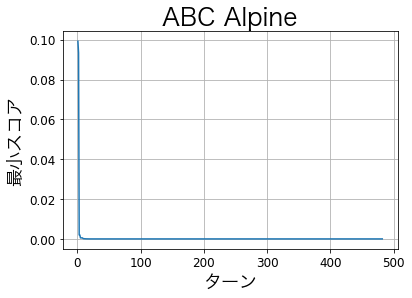


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 482, 'w': 0.2751588952942437, 'c1': 0.3873326591634984, 'c2': 0.5508912513059883}
gb_place : [-8.10520960e-123  3.09289615e-122]
gb_score : 3.903417106659093e-123
計算時間 : 1003 ms



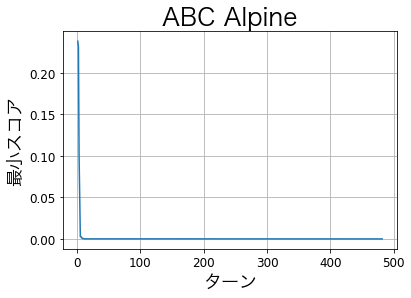


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 482, 'w': 0.2751588952942437, 'c1': 0.3873326591634984, 'c2': 0.5508912513059883}
gb_place : [-1.11536614e-124 -1.77776029e-123]
gb_score : 1.8892968987977833e-124
計算時間 : 958 ms



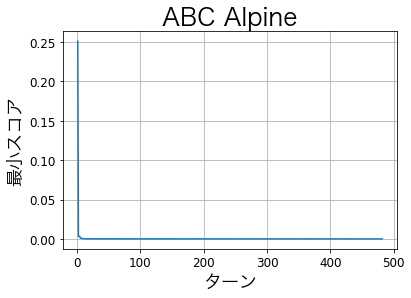

In [44]:
best_params = study.best_params
num_agent = best_params["num_agent"]
max_turn = best_params["max_turn"]
w = best_params["w"]
c1 = best_params["c1"]
c2 = best_params["c2"]

for _ in range(3) : 
    pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                    w, c1, c2, output_mode = output_mode)
    
    plot_score(function_number, pso.gb_record_list, "Alpine")

# Minima

In [46]:
# パラメータ
N = 10   # 次元
function_number = 6
limit_time = N * 500   # 計算時間の制限、制限時間は (次元) * 0.5秒
repeat_times = 3
output_mode = False   # 計算時間を短くしたいので、output_modeをFalseにしておく

# xの値域は自動化しておく
min_field_list = [-5.0, -5.0, -5.0, -600.0, -10.0, -5.0]
max_field_list = [5.0, 5.0, 10.0, 600.0, 10.0, 5.0]
min_field = min_field_list[function_number - 1]
max_field = max_field_list[function_number - 1]


# optunaに渡す関数
def objective(trial) : 
    num_agent = trial.suggest_int("num_agent", 10, 200)
    max_turn = trial.suggest_int("max_turn", 20, 500)
    w = trial.suggest_uniform("w", 0.0, 1.0)
    c1 = trial.suggest_uniform("c1", 0.0, 1.0)
    c2 = trial.suggest_uniform("c2", 0.0, 1.0)
    
    sum_score = 0.0   # これを最小化するのが目標
    for _ in range(repeat_times) :   # repeat_times回の合計をとる
        pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                      w, c1, c2, output_mode = output_mode)
        
        sum_score += pso.gb_score

        if pso.calculation_time > limit_time :   # 時間制限を超えたら罰則を与える
            # 計算時間に応じて罰則を与えたほうが学習が早く進むはず？
            sum_score += PENALTY * pso.calculation_time / limit_time
            
    return sum_score


# optunaを使う
study = optuna.create_study()
study.optimize(objective, n_trials = 100)

[I 2022-01-15 21:59:47,737] A new study created in memory with name: no-name-d61bd0ef-9b68-4c0b-92ba-b721f22ca476



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 104, 'max_turn': 488, 'w': 0.5350297977165951, 'c1': 0.04323361267347836, 'c2': 0.8303073152292461}
gb_place : [-2.90353401 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1126 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 104, 'max_turn': 488, 'w': 0.5350297977165951, 'c1': 0.04323361267347836, 'c2': 0.8303073152292461}
gb_place : [-2.90353403 -2.90353405]
gb_score : -156.6646628150857
計算時間 : 913 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 21:59:51,202] Trial 0 finished with value: 2027.006011554743 and parameters: {'num_agent': 104, 'max_turn': 488, 'w': 0.5350297977165951, 'c1': 0.04323361267347836, 'c2': 0.8303073152292461}. Best is trial 0 with value: 2027.006011554743.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 104, 'max_turn': 488, 'w': 0.5350297977165951, 'c1': 0.04323361267347836, 'c2': 0.8303073152292461}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1371 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 16, 'max_turn': 340, 'w': 0.9044040576681923, 'c1': 0.1342619124633715, 'c2': 0.4095160020861639}
gb_place : [-2.90353399 -2.90353401]
gb_score : -156.66466281508565
計算時間 : 125 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 16, 'max_turn': 340, 'w': 0.9044040576681923, 'c1': 0.1342619124633715, 'c2': 0.4095160020861639}
gb_place : [-2.90353405  2.74680276]
gb_score : -128.39122471811072
計算時間 : 199 ms


----

[I 2022-01-15 21:59:51,907] Trial 1 finished with value: -441.720550348282 and parameters: {'num_agent': 16, 'max_turn': 340, 'w': 0.9044040576681923, 'c1': 0.1342619124633715, 'c2': 0.4095160020861639}. Best is trial 1 with value: -441.720550348282.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 16, 'max_turn': 340, 'w': 0.9044040576681923, 'c1': 0.1342619124633715, 'c2': 0.4095160020861639}
gb_place : [-2.90353401 -2.90353403]
gb_score : -156.66466281508565
計算時間 : 363 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 357, 'w': 0.4956288979165956, 'c1': 0.9742566443929158, 'c2': 0.48103525139277803}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 3326 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 357, 'w': 0.4956288979165956, 'c1': 0.9742566443929158, 'c2': 0.48103525139277803}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1226 ms


--

[I 2022-01-15 21:59:57,679] Trial 2 finished with value: 5244.006011554743 and parameters: {'num_agent': 126, 'max_turn': 357, 'w': 0.4956288979165956, 'c1': 0.9742566443929158, 'c2': 0.48103525139277803}. Best is trial 1 with value: -441.720550348282.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 126, 'max_turn': 357, 'w': 0.4956288979165956, 'c1': 0.9742566443929158, 'c2': 0.48103525139277803}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 1162 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 170, 'max_turn': 323, 'w': 0.27376253736564415, 'c1': 0.8685361059174835, 'c2': 0.27196190951398225}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 1201 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 170, 'max_turn': 323, 'w': 0.27376253736564415, 'c1': 0.8685361059174835, 'c2': 0.27196190951398225}
gb_place : [-2.90353399 -2.90353377]
gb_score : -156.66466281508337
計算時間 : 1170 ms

[I 2022-01-15 22:00:01,332] Trial 3 finished with value: 3126.0060115547453 and parameters: {'num_agent': 170, 'max_turn': 323, 'w': 0.27376253736564415, 'c1': 0.8685361059174835, 'c2': 0.27196190951398225}. Best is trial 1 with value: -441.720550348282.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 170, 'max_turn': 323, 'w': 0.27376253736564415, 'c1': 0.8685361059174835, 'c2': 0.27196190951398225}
gb_place : [-2.90353402 -2.90353401]
gb_score : -156.6646628150857
計算時間 : 1225 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 55, 'w': 0.37343535198015143, 'c1': 0.8832769671923559, 'c2': 0.7451953469108137}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 83 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 55, 'w': 0.37343535198015143, 'c1': 0.8832769671923559, 'c2': 0.7451953469108137}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 72 ms


-------

[I 2022-01-15 22:00:01,580] Trial 4 finished with value: -469.9939884452571 and parameters: {'num_agent': 60, 'max_turn': 55, 'w': 0.37343535198015143, 'c1': 0.8832769671923559, 'c2': 0.7451953469108137}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 55, 'w': 0.37343535198015143, 'c1': 0.8832769671923559, 'c2': 0.7451953469108137}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 82 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 16, 'max_turn': 499, 'w': 0.4857598832206691, 'c1': 0.3883276287492986, 'c2': 0.09555140851519595}
gb_place : [-2.90354205 -2.90335785]
gb_score : -156.66466173951957
計算時間 : 182 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 22:00:02,127] Trial 5 finished with value: -466.2762137212263 and parameters: {'num_agent': 16, 'max_turn': 499, 'w': 0.4857598832206691, 'c1': 0.3883276287492986, 'c2': 0.09555140851519595}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 16, 'max_turn': 499, 'w': 0.4857598832206691, 'c1': 0.3883276287492986, 'c2': 0.09555140851519595}
gb_place : [-2.74234826 -2.75244898]
gb_score : -155.0642441007581
計算時間 : 172 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 16, 'max_turn': 499, 'w': 0.4857598832206691, 'c1': 0.3883276287492986, 'c2': 0.09555140851519595}
gb_place : [-2.66498046 -2.99582065]
gb_score : -154.54730788094864
計算時間 : 179 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 22:00:02,340] Trial 6 finished with value: -460.8477284113532 and parameters: {'num_agent': 40, 'max_turn': 58, 'w': 0.5436352271844128, 'c1': 0.873496893995354, 'c2': 0.015103197497566945}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 58, 'w': 0.5436352271844128, 'c1': 0.873496893995354, 'c2': 0.015103197497566945}
gb_place : [-3.21008115 -3.01442521]
gb_score : -152.63020794605643
計算時間 : 91 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 58, 'w': 0.5436352271844128, 'c1': 0.873496893995354, 'c2': 0.015103197497566945}
gb_place : [-2.58477257 -3.12918141]
gb_score : -151.6196763987304
計算時間 : 56 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 40, 'max_turn': 58, 'w': 0.5436352271844128, 'c1': 0.873496893995354, 'c2': 0.015103197497566945}
gb_place : [-2.86586295 -2.92648701]
gb_score : -156.59784406656638
計算時間 : 56 ms


----------

[I 2022-01-15 22:00:02,731] Trial 7 finished with value: -469.9629793317355 and parameters: {'num_agent': 74, 'max_turn': 66, 'w': 0.0919980852780724, 'c1': 0.8797094928121885, 'c2': 0.4038313196789657}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 66, 'w': 0.0919980852780724, 'c1': 0.8797094928121885, 'c2': 0.4038313196789657}
gb_place : [-2.89100304 -2.88254923]
gb_score : -156.6441332945611
計算時間 : 120 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 140, 'max_turn': 269, 'w': 0.6859142214155864, 'c1': 0.38970978661046884, 'c2': 0.8979264835516726}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 843 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 140, 'max_turn': 269, 'w': 0.6859142214155864, 'c1': 0.38970978661046884, 'c2': 0.8979264835516726}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 838 ms


------

[I 2022-01-15 22:00:05,255] Trial 8 finished with value: -469.9939884452571 and parameters: {'num_agent': 140, 'max_turn': 269, 'w': 0.6859142214155864, 'c1': 0.38970978661046884, 'c2': 0.8979264835516726}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 140, 'max_turn': 269, 'w': 0.6859142214155864, 'c1': 0.38970978661046884, 'c2': 0.8979264835516726}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 795 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 196, 'max_turn': 46, 'w': 0.4520672459384141, 'c1': 0.8062539312536122, 'c2': 0.17449344786247334}
gb_place : [-2.90353353 -2.90353517]
gb_score : -156.66466281503244
計算時間 : 218 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 196, 'max_turn': 46, 'w': 0.4520672459384141, 'c1': 0.8062539312536122, 'c2': 0.17449344786247334}
gb_place : [-2.90354562 -2.9035241 ]
gb_score : -156.6646628070282
計算時間 : 215 ms


----

[I 2022-01-15 22:00:05,928] Trial 9 finished with value: -469.99398843710867 and parameters: {'num_agent': 196, 'max_turn': 46, 'w': 0.4520672459384141, 'c1': 0.8062539312536122, 'c2': 0.17449344786247334}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 196, 'max_turn': 46, 'w': 0.4520672459384141, 'c1': 0.8062539312536122, 'c2': 0.17449344786247334}
gb_place : [-2.90353469 -2.90353323]
gb_score : -156.66466281504805
計算時間 : 217 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 166, 'w': 0.011212727097342223, 'c1': 0.6255296672271797, 'c2': 0.7280996619542102}
gb_place : [-2.84589586 -2.89358476]
gb_score : -156.54857342213012
計算時間 : 224 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 166, 'w': 0.011212727097342223, 'c1': 0.6255296672271797, 'c2': 0.7280996619542102}
gb_place : [-2.90126815 -2.89431741]
gb_score : -156.66155678512513
計算時間 : 212 ms




[I 2022-01-15 22:00:06,612] Trial 10 finished with value: -469.8747929891708 and parameters: {'num_agent': 60, 'max_turn': 166, 'w': 0.011212727097342223, 'c1': 0.6255296672271797, 'c2': 0.7280996619542102}. Best is trial 4 with value: -469.9939884452571.


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 166, 'w': 0.011212727097342223, 'c1': 0.6255296672271797, 'c2': 0.7280996619542102}
gb_place : [-2.90350326 -2.90353754]
gb_score : -156.66466278191555
計算時間 : 223 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 134, 'max_turn': 230, 'w': 0.8752565579715861, 'c1': 0.37028885706588777, 'c2': 0.9772247553053143}
gb_place : [-2.90353404 -2.903534  ]
gb_score : -156.66466281508565
計算時間 : 658 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 134, 'max_turn': 230, 'w': 0.8752565579715861, 'c1': 0.37028885706588777, 'c2': 0.9772247553053143

[I 2022-01-15 22:00:08,551] Trial 11 finished with value: -469.99398844525695 and parameters: {'num_agent': 134, 'max_turn': 230, 'w': 0.8752565579715861, 'c1': 0.37028885706588777, 'c2': 0.9772247553053143}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 134, 'max_turn': 230, 'w': 0.8752565579715861, 'c1': 0.37028885706588777, 'c2': 0.9772247553053143}
gb_place : [-2.90353401 -2.903534  ]
gb_score : -156.66466281508565
計算時間 : 607 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 95, 'max_turn': 160, 'w': 0.7461381010063721, 'c1': 0.6184240916733956, 'c2': 0.8116541068224035}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 305 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 95, 'max_turn': 160, 'w': 0.7461381010063721, 'c1': 0.6184240916733956, 'c2': 0.8116541068224035}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 304 ms


------

[I 2022-01-15 22:00:09,498] Trial 12 finished with value: -469.9939884452571 and parameters: {'num_agent': 95, 'max_turn': 160, 'w': 0.7461381010063721, 'c1': 0.6184240916733956, 'c2': 0.8116541068224035}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 95, 'max_turn': 160, 'w': 0.7461381010063721, 'c1': 0.6184240916733956, 'c2': 0.8116541068224035}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 311 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 231, 'w': 0.6990292935173454, 'c1': 0.23986455608566198, 'c2': 0.6434750944096999}
gb_place : [-2.90353401 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 648 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 231, 'w': 0.6990292935173454, 'c1': 0.23986455608566198, 'c2': 0.6434750944096999}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 638 ms


-----

[I 2022-01-15 22:00:11,505] Trial 13 finished with value: -469.9939884452571 and parameters: {'num_agent': 149, 'max_turn': 231, 'w': 0.6990292935173454, 'c1': 0.23986455608566198, 'c2': 0.6434750944096999}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 149, 'max_turn': 231, 'w': 0.6990292935173454, 'c1': 0.23986455608566198, 'c2': 0.6434750944096999}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 673 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 408, 'w': 0.2943206817579264, 'c1': 0.5921482301211539, 'c2': 0.9547929526652186}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 571 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 408, 'w': 0.2943206817579264, 'c1': 0.5921482301211539, 'c2': 0.9547929526652186}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 549 ms


-------

[I 2022-01-15 22:00:13,201] Trial 14 finished with value: -469.9939884452571 and parameters: {'num_agent': 74, 'max_turn': 408, 'w': 0.2943206817579264, 'c1': 0.5921482301211539, 'c2': 0.9547929526652186}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 74, 'max_turn': 408, 'w': 0.2943206817579264, 'c1': 0.5921482301211539, 'c2': 0.9547929526652186}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 539 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 182, 'max_turn': 140, 'w': 0.3073702323416649, 'c1': 0.42221731783630256, 'c2': 0.6176167547562477}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 482 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 182, 'max_turn': 140, 'w': 0.3073702323416649, 'c1': 0.42221731783630256, 'c2': 0.6176167547562477}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 478 ms


-----

[I 2022-01-15 22:00:14,676] Trial 15 finished with value: -469.9939884452571 and parameters: {'num_agent': 182, 'max_turn': 140, 'w': 0.3073702323416649, 'c1': 0.42221731783630256, 'c2': 0.6176167547562477}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 182, 'max_turn': 140, 'w': 0.3073702323416649, 'c1': 0.42221731783630256, 'c2': 0.6176167547562477}
gb_place : [-2.90353404 -2.90353401]
gb_score : -156.6646628150857
計算時間 : 479 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 261, 'w': 0.6924152745774039, 'c1': 0.257830114776762, 'c2': 0.8824044910948033}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 214 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 43, 'max_turn': 261, 'w': 0.6924152745774039, 'c1': 0.257830114776762, 'c2': 0.8824044910948033}
gb_place : [-2.90353401 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 207 ms


---------

[I 2022-01-15 22:00:15,331] Trial 16 finished with value: -469.9939884452571 and parameters: {'num_agent': 43, 'max_turn': 261, 'w': 0.6924152745774039, 'c1': 0.257830114776762, 'c2': 0.8824044910948033}. Best is trial 4 with value: -469.9939884452571.



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 438, 'w': 0.2086971835973701, 'c1': 0.5959990199572194, 'c2': 0.8837481615451739}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 957 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 438, 'w': 0.2086971835973701, 'c1': 0.5959990199572194, 'c2': 0.8837481615451739}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 959 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 22:00:18,262] Trial 17 finished with value: -469.9939884452571 and parameters: {'num_agent': 122, 'max_turn': 438, 'w': 0.2086971835973701, 'c1': 0.5959990199572194, 'c2': 0.8837481615451739}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 438, 'w': 0.2086971835973701, 'c1': 0.5959990199572194, 'c2': 0.8837481615451739}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 952 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 130, 'w': 0.6159990144113483, 'c1': 0.44768156644985313, 'c2': 0.610131124389842}
gb_place : [-2.90353401 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 487 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 130, 'w': 0.6159990144113483, 'c1': 0.44768156644985313, 'c2': 0.610131124389842}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 483 ms


------

[I 2022-01-15 22:00:19,773] Trial 18 finished with value: -469.9939884452571 and parameters: {'num_agent': 198, 'max_turn': 130, 'w': 0.6159990144113483, 'c1': 0.44768156644985313, 'c2': 0.610131124389842}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 130, 'w': 0.6159990144113483, 'c1': 0.44768156644985313, 'c2': 0.610131124389842}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 507 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 118, 'w': 0.7930250917956748, 'c1': 0.22283469506533324, 'c2': 0.6200855255580325}
gb_place : [-2.90353425 -2.90353409]
gb_score : -156.6646628150839
計算時間 : 75 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 118, 'w': 0.7930250917956748, 'c1': 0.22283469506533324, 'c2': 0.6200855255580325}
gb_place : [ 2.74680266 -2.90353408]
gb_score : -128.39122471811027
計算時間 : 73 ms


-------

[I 2022-01-15 22:00:20,016] Trial 19 finished with value: -441.72055034826167 and parameters: {'num_agent': 33, 'max_turn': 118, 'w': 0.7930250917956748, 'c1': 0.22283469506533324, 'c2': 0.6200855255580325}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 33, 'max_turn': 118, 'w': 0.7930250917956748, 'c1': 0.22283469506533324, 'c2': 0.6200855255580325}
gb_place : [-2.90353428 -2.90353471]
gb_score : -156.66466281506752
計算時間 : 79 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 440, 'w': 0.14905328335575818, 'c1': 0.7120720334243241, 'c2': 0.9101941966739473}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 932 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 440, 'w': 0.14905328335575818, 'c1': 0.7120720334243241, 'c2': 0.9101941966739473}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 923 ms


----

[I 2022-01-15 22:00:22,852] Trial 20 finished with value: -469.9939884452571 and parameters: {'num_agent': 118, 'max_turn': 440, 'w': 0.14905328335575818, 'c1': 0.7120720334243241, 'c2': 0.9101941966739473}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 118, 'max_turn': 440, 'w': 0.14905328335575818, 'c1': 0.7120720334243241, 'c2': 0.9101941966739473}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 922 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 460, 'w': 0.1357596839640159, 'c1': 0.7229539194779184, 'c2': 0.7324071524893725}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 989 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 460, 'w': 0.1357596839640159, 'c1': 0.7229539194779184, 'c2': 0.7324071524893725}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 949 ms


-----

[I 2022-01-15 22:00:25,938] Trial 21 finished with value: 620.0060115547428 and parameters: {'num_agent': 117, 'max_turn': 460, 'w': 0.1357596839640159, 'c1': 0.7229539194779184, 'c2': 0.7324071524893725}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 117, 'max_turn': 460, 'w': 0.1357596839640159, 'c1': 0.7229539194779184, 'c2': 0.7324071524893725}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 1090 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 180, 'max_turn': 396, 'w': 0.338028720137214, 'c1': 0.5062664930515719, 'c2': 0.9536563870245682}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 1283 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 180, 'max_turn': 396, 'w': 0.338028720137214, 'c1': 0.5062664930515719, 'c2': 0.9536563870245682}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 1255 ms


-----

[I 2022-01-15 22:00:29,807] Trial 22 finished with value: 3326.006011554743 and parameters: {'num_agent': 180, 'max_turn': 396, 'w': 0.338028720137214, 'c1': 0.5062664930515719, 'c2': 0.9536563870245682}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 180, 'max_turn': 396, 'w': 0.338028720137214, 'c1': 0.5062664930515719, 'c2': 0.9536563870245682}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1258 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 282, 'w': 0.6439553985376969, 'c1': 0.2848714641077603, 'c2': 0.5368637127168366}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 777 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 282, 'w': 0.6439553985376969, 'c1': 0.2848714641077603, 'c2': 0.5368637127168366}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 772 ms


------

[I 2022-01-15 22:00:32,191] Trial 23 finished with value: -469.9939884452571 and parameters: {'num_agent': 153, 'max_turn': 282, 'w': 0.6439553985376969, 'c1': 0.2848714641077603, 'c2': 0.5368637127168366}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 282, 'w': 0.6439553985376969, 'c1': 0.2848714641077603, 'c2': 0.5368637127168366}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 783 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 198, 'w': 0.6111809437634713, 'c1': 0.5112563570243596, 'c2': 0.5108282313092569}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 576 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 198, 'w': 0.6111809437634713, 'c1': 0.5112563570243596, 'c2': 0.5108282313092569}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 561 ms


------

[I 2022-01-15 22:00:33,944] Trial 24 finished with value: -469.9939884452571 and parameters: {'num_agent': 158, 'max_turn': 198, 'w': 0.6111809437634713, 'c1': 0.5112563570243596, 'c2': 0.5108282313092569}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 198, 'w': 0.6111809437634713, 'c1': 0.5112563570243596, 'c2': 0.5108282313092569}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 571 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 132, 'w': 0.9946249574657784, 'c1': 0.6997565985828085, 'c2': 0.8030495031930842}
gb_place : [-2.90566672 -2.9035676 ]
gb_score : -156.6645053665556
計算時間 : 229 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 132, 'w': 0.9946249574657784, 'c1': 0.6997565985828085, 'c2': 0.8030495031930842}
gb_place : [-2.908122   -2.90843878]
gb_score : -156.66310041512588
計算時間 : 230 ms


-------

[I 2022-01-15 22:00:34,670] Trial 25 finished with value: -469.9914815347455 and parameters: {'num_agent': 98, 'max_turn': 132, 'w': 0.9946249574657784, 'c1': 0.6997565985828085, 'c2': 0.8030495031930842}. Best is trial 4 with value: -469.9939884452571.



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 297, 'w': 0.7770541431687052, 'c1': 0.7343199656944801, 'c2': 0.9960403366807736}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 487 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 297, 'w': 0.7770541431687052, 'c1': 0.7343199656944801, 'c2': 0.9960403366807736}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 479 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 22:00:36,156] Trial 26 finished with value: -469.9939884452571 and parameters: {'num_agent': 89, 'max_turn': 297, 'w': 0.7770541431687052, 'c1': 0.7343199656944801, 'c2': 0.9960403366807736}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 89, 'max_turn': 297, 'w': 0.7770541431687052, 'c1': 0.7343199656944801, 'c2': 0.9960403366807736}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 481 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 213, 'w': 0.6156291018575456, 'c1': 0.2977491234659171, 'c2': 0.465990992316644}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 599 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 213, 'w': 0.6156291018575456, 'c1': 0.2977491234659171, 'c2': 0.465990992316644}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 605 ms


---------

[I 2022-01-15 22:00:38,010] Trial 27 finished with value: -469.9939884452571 and parameters: {'num_agent': 155, 'max_turn': 213, 'w': 0.6156291018575456, 'c1': 0.2977491234659171, 'c2': 0.465990992316644}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 155, 'max_turn': 213, 'w': 0.6156291018575456, 'c1': 0.2977491234659171, 'c2': 0.465990992316644}
gb_place : [-2.90353404 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 606 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 211, 'w': 0.6147950820750087, 'c1': 0.17826692603284916, 'c2': 0.5464258701668261}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 586 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 211, 'w': 0.6147950820750087, 'c1': 0.17826692603284916, 'c2': 0.5464258701668261}
gb_place : [-2.90353401 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 579 ms


-----

[I 2022-01-15 22:00:39,805] Trial 28 finished with value: -469.9939884452571 and parameters: {'num_agent': 153, 'max_turn': 211, 'w': 0.6147950820750087, 'c1': 0.17826692603284916, 'c2': 0.5464258701668261}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 153, 'max_turn': 211, 'w': 0.6147950820750087, 'c1': 0.17826692603284916, 'c2': 0.5464258701668261}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 587 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 78, 'max_turn': 304, 'w': 0.41549170600487856, 'c1': 0.529730971018192, 'c2': 0.2395012379362637}
gb_place : [-2.90359479 -2.90341479]
gb_score : -156.66466219573914
計算時間 : 477 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 78, 'max_turn': 304, 'w': 0.41549170600487856, 'c1': 0.529730971018192, 'c2': 0.2395012379362637}
gb_place : [-2.90353403 -2.90353406]
gb_score : -156.66466281508568
計算時間 : 444 ms


-----

[I 2022-01-15 22:00:41,191] Trial 29 finished with value: -469.99398782591055 and parameters: {'num_agent': 78, 'max_turn': 304, 'w': 0.41549170600487856, 'c1': 0.529730971018192, 'c2': 0.2395012379362637}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 78, 'max_turn': 304, 'w': 0.41549170600487856, 'c1': 0.529730971018192, 'c2': 0.2395012379362637}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 426 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 223, 'w': 0.5402600310673767, 'c1': 0.0013090640093847972, 'c2': 0.33327929963810754}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 574 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 223, 'w': 0.5402600310673767, 'c1': 0.0013090640093847972, 'c2': 0.33327929963810754}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 591 ms



[I 2022-01-15 22:00:42,973] Trial 30 finished with value: -469.9939884452571 and parameters: {'num_agent': 142, 'max_turn': 223, 'w': 0.5402600310673767, 'c1': 0.0013090640093847972, 'c2': 0.33327929963810754}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 223, 'w': 0.5402600310673767, 'c1': 0.0013090640093847972, 'c2': 0.33327929963810754}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 573 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 182, 'max_turn': 195, 'w': 0.8023377865981688, 'c1': 0.1085068973999932, 'c2': 0.4563999066702255}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 653 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 182, 'max_turn': 195, 'w': 0.8023377865981688, 'c1': 0.1085068973999932, 'c2': 0.4563999066702255}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 652 ms


--

[I 2022-01-15 22:00:44,981] Trial 31 finished with value: -469.9939884452571 and parameters: {'num_agent': 182, 'max_turn': 195, 'w': 0.8023377865981688, 'c1': 0.1085068973999932, 'c2': 0.4563999066702255}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 182, 'max_turn': 195, 'w': 0.8023377865981688, 'c1': 0.1085068973999932, 'c2': 0.4563999066702255}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 652 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 181, 'w': 0.8716404159896867, 'c1': 0.1232253124486323, 'c2': 0.38500567878719366}
gb_place : [-2.90353406 -2.90353398]
gb_score : -156.66466281508553
計算時間 : 540 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 181, 'w': 0.8716404159896867, 'c1': 0.1232253124486323, 'c2': 0.38500567878719366}
gb_place : [-2.90353415 -2.90353399]
gb_score : -156.66466281508508
計算時間 : 543 ms


--

[I 2022-01-15 22:00:46,652] Trial 32 finished with value: -469.9939884452559 and parameters: {'num_agent': 167, 'max_turn': 181, 'w': 0.8716404159896867, 'c1': 0.1232253124486323, 'c2': 0.38500567878719366}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 181, 'w': 0.8716404159896867, 'c1': 0.1232253124486323, 'c2': 0.38500567878719366}
gb_place : [-2.90353412 -2.90353401]
gb_score : -156.66466281508534
計算時間 : 543 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 44, 'max_turn': 247, 'w': 0.2907061697279012, 'c1': 0.28492730509231756, 'c2': 0.6476856223735633}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 199 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 44, 'max_turn': 247, 'w': 0.2907061697279012, 'c1': 0.28492730509231756, 'c2': 0.6476856223735633}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 195 ms


----

[I 2022-01-15 22:00:47,268] Trial 33 finished with value: -469.9939884452571 and parameters: {'num_agent': 44, 'max_turn': 247, 'w': 0.2907061697279012, 'c1': 0.28492730509231756, 'c2': 0.6476856223735633}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 44, 'max_turn': 247, 'w': 0.2907061697279012, 'c1': 0.28492730509231756, 'c2': 0.6476856223735633}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 198 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 176, 'max_turn': 99, 'w': 0.5429580452398475, 'c1': 0.009348603783319663, 'c2': 0.3318448761406299}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 339 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 176, 'max_turn': 99, 'w': 0.5429580452398475, 'c1': 0.009348603783319663, 'c2': 0.3318448761406299}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 362 ms


----

[I 2022-01-15 22:00:48,345] Trial 34 finished with value: -469.9939884452571 and parameters: {'num_agent': 176, 'max_turn': 99, 'w': 0.5429580452398475, 'c1': 0.009348603783319663, 'c2': 0.3318448761406299}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 176, 'max_turn': 99, 'w': 0.5429580452398475, 'c1': 0.009348603783319663, 'c2': 0.3318448761406299}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 340 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 362, 'w': 0.2278592622024611, 'c1': 0.07717771944414491, 'c2': 0.25809015550540526}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 748 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 362, 'w': 0.2278592622024611, 'c1': 0.07717771944414491, 'c2': 0.25809015550540526}
gb_place : [-2.90167144 -2.89740084]
gb_score : -156.663244715122
計算時間 : 773 ms


--

[I 2022-01-15 22:00:50,660] Trial 35 finished with value: -469.9925703452614 and parameters: {'num_agent': 112, 'max_turn': 362, 'w': 0.2278592622024611, 'c1': 0.07717771944414491, 'c2': 0.25809015550540526}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 112, 'max_turn': 362, 'w': 0.2278592622024611, 'c1': 0.07717771944414491, 'c2': 0.25809015550540526}
gb_place : [-2.90353395 -2.90353307]
gb_score : -156.6646628150537
計算時間 : 743 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 453, 'w': 0.11003954209446117, 'c1': 0.7504957983971262, 'c2': 0.8835159427927233}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 1026 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 453, 'w': 0.11003954209446117, 'c1': 0.7504957983971262, 'c2': 0.8835159427927233}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 1019 ms




[I 2022-01-15 22:00:53,793] Trial 36 finished with value: 2597.006011554743 and parameters: {'num_agent': 129, 'max_turn': 453, 'w': 0.11003954209446117, 'c1': 0.7504957983971262, 'c2': 0.8835159427927233}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 129, 'max_turn': 453, 'w': 0.11003954209446117, 'c1': 0.7504957983971262, 'c2': 0.8835159427927233}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1022 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 193, 'max_turn': 93, 'w': 0.6004111838869101, 'c1': 0.1698755318722407, 'c2': 0.5536856058906303}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 344 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 193, 'max_turn': 93, 'w': 0.6004111838869101, 'c1': 0.1698755318722407, 'c2': 0.5536856058906303}
gb_place : [-2.90353401 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 343 ms


------

[I 2022-01-15 22:00:54,855] Trial 37 finished with value: -469.9939884452571 and parameters: {'num_agent': 193, 'max_turn': 93, 'w': 0.6004111838869101, 'c1': 0.1698755318722407, 'c2': 0.5536856058906303}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 193, 'max_turn': 93, 'w': 0.6004111838869101, 'c1': 0.1698755318722407, 'c2': 0.5536856058906303}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 338 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 106, 'w': 0.9364002407443893, 'c1': 0.014671780052373896, 'c2': 0.45424507969667655}
gb_place : [-2.90385145 -2.90417919]
gb_score : -156.66464493241432
計算時間 : 379 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 106, 'w': 0.9364002407443893, 'c1': 0.014671780052373896, 'c2': 0.45424507969667655}
gb_place : [-2.90245834 -2.90470826]
gb_score : -156.66457511088714
計算時間 : 387 ms



[I 2022-01-15 22:00:56,045] Trial 38 finished with value: -469.99384525600993 and parameters: {'num_agent': 200, 'max_turn': 106, 'w': 0.9364002407443893, 'c1': 0.014671780052373896, 'c2': 0.45424507969667655}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 200, 'max_turn': 106, 'w': 0.9364002407443893, 'c1': 0.014671780052373896, 'c2': 0.45424507969667655}
gb_place : [-2.90378489 -2.90454597]
gb_score : -156.66462521270847
計算時間 : 384 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 297, 'w': 0.7797035018035277, 'c1': 0.34125245072053395, 'c2': 0.5787737504117003}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 901 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 297, 'w': 0.7797035018035277, 'c1': 0.34125245072053395, 'c2': 0.5787737504117003}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 890 ms




[I 2022-01-15 22:00:58,787] Trial 39 finished with value: -469.9939884452571 and parameters: {'num_agent': 167, 'max_turn': 297, 'w': 0.7797035018035277, 'c1': 0.34125245072053395, 'c2': 0.5787737504117003}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 167, 'max_turn': 297, 'w': 0.7797035018035277, 'c1': 0.34125245072053395, 'c2': 0.5787737504117003}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 896 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 227, 'w': 0.5258036095782609, 'c1': 0.34182283080069364, 'c2': 0.32843892536463204}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 672 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 227, 'w': 0.5258036095782609, 'c1': 0.34182283080069364, 'c2': 0.32843892536463204}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 665 ms


-

[I 2022-01-15 22:01:00,891] Trial 40 finished with value: -469.9939884452571 and parameters: {'num_agent': 163, 'max_turn': 227, 'w': 0.5258036095782609, 'c1': 0.34182283080069364, 'c2': 0.32843892536463204}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 163, 'max_turn': 227, 'w': 0.5258036095782609, 'c1': 0.34182283080069364, 'c2': 0.32843892536463204}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 718 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 183, 'max_turn': 79, 'w': 0.017711284432664898, 'c1': 0.06778098095774096, 'c2': 0.6844318010490968}
gb_place : [-2.90353332 -2.90353293]
gb_score : -156.66466281502642
計算時間 : 294 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 183, 'max_turn': 79, 'w': 0.017711284432664898, 'c1': 0.06778098095774096, 'c2': 0.6844318010490968}
gb_place : [-2.90352511 -2.90352083]
gb_score : -156.6646628063091
計算時間 : 309 ms



[I 2022-01-15 22:01:01,817] Trial 41 finished with value: -469.99398843640097 and parameters: {'num_agent': 183, 'max_turn': 79, 'w': 0.017711284432664898, 'c1': 0.06778098095774096, 'c2': 0.6844318010490968}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 183, 'max_turn': 79, 'w': 0.017711284432664898, 'c1': 0.06778098095774096, 'c2': 0.6844318010490968}
gb_place : [-2.90353326 -2.90353402]
gb_score : -156.6646628150654
計算時間 : 292 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 334, 'w': 0.48190672407930835, 'c1': 0.9733067296368222, 'c2': 0.202963519833956}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 633 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 334, 'w': 0.48190672407930835, 'c1': 0.9733067296368222, 'c2': 0.202963519833956}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 644 ms


----

[I 2022-01-15 22:01:03,773] Trial 42 finished with value: -469.9939884452571 and parameters: {'num_agent': 107, 'max_turn': 334, 'w': 0.48190672407930835, 'c1': 0.9733067296368222, 'c2': 0.202963519833956}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 334, 'w': 0.48190672407930835, 'c1': 0.9733067296368222, 'c2': 0.202963519833956}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 632 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 333, 'w': 0.423357569890886, 'c1': 0.006867538808143991, 'c2': 0.13188418038994906}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 880 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 333, 'w': 0.423357569890886, 'c1': 0.006867538808143991, 'c2': 0.13188418038994906}
gb_place : [-2.90348235 -2.90347035]
gb_score : -156.6646625825038
計算時間 : 866 ms


--

[I 2022-01-15 22:01:06,444] Trial 43 finished with value: -469.9939882126752 and parameters: {'num_agent': 137, 'max_turn': 333, 'w': 0.423357569890886, 'c1': 0.006867538808143991, 'c2': 0.13188418038994906}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 333, 'w': 0.423357569890886, 'c1': 0.006867538808143991, 'c2': 0.13188418038994906}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 867 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 189, 'max_turn': 25, 'w': 0.5386495638857418, 'c1': 0.443444906767819, 'c2': 0.31726711194267837}
gb_place : [-2.90356929 -2.90353639]
gb_score : -156.66466277188613
計算時間 : 91 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 22:01:06,749] Trial 44 finished with value: -469.99398836590575 and parameters: {'num_agent': 189, 'max_turn': 25, 'w': 0.5386495638857418, 'c1': 0.443444906767819, 'c2': 0.31726711194267837}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 189, 'max_turn': 25, 'w': 0.5386495638857418, 'c1': 0.443444906767819, 'c2': 0.31726711194267837}
gb_place : [-2.90356134 -2.90354048]
gb_score : -156.66466278785305
計算時間 : 92 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 189, 'max_turn': 25, 'w': 0.5386495638857418, 'c1': 0.443444906767819, 'c2': 0.31726711194267837}
gb_place : [-2.9035182  -2.90353132]
gb_score : -156.66466280616658
計算時間 : 98 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 148, 'max_turn': 285, 'w': 0.6546848166904826, 'c1': 0.203527022105413, 'c2': 0.5371433113045354}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 762 ms


---------

[I 2022-01-15 22:01:09,057] Trial 45 finished with value: -469.9939884452571 and parameters: {'num_agent': 148, 'max_turn': 285, 'w': 0.6546848166904826, 'c1': 0.203527022105413, 'c2': 0.5371433113045354}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 148, 'max_turn': 285, 'w': 0.6546848166904826, 'c1': 0.203527022105413, 'c2': 0.5371433113045354}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 748 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 94, 'w': 0.8400107053476885, 'c1': 0.1421729718516882, 'c2': 0.4324576137198535}
gb_place : [-2.90352246 -2.903539  ]
gb_score : -156.66466280960455
計算時間 : 304 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 94, 'w': 0.8400107053476885, 'c1': 0.1421729718516882, 'c2': 0.4324576137198535}
gb_place : [-2.9035309  -2.90352918]
gb_score : -156.66466281393406
計算時間 : 304 ms


-------

[I 2022-01-15 22:01:10,007] Trial 46 finished with value: -469.9939884384157 and parameters: {'num_agent': 178, 'max_turn': 94, 'w': 0.8400107053476885, 'c1': 0.1421729718516882, 'c2': 0.4324576137198535}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 94, 'w': 0.8400107053476885, 'c1': 0.1421729718516882, 'c2': 0.4324576137198535}
gb_place : [-2.90353377 -2.90353647]
gb_score : -156.66466281487715
計算時間 : 305 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 277, 'w': 0.6598898114932419, 'c1': 0.1922796527994594, 'c2': 0.5144002160120713}
gb_place : [-2.90353401 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 755 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 277, 'w': 0.6598898114932419, 'c1': 0.1922796527994594, 'c2': 0.5144002160120713}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 797 ms


------

[I 2022-01-15 22:01:12,399] Trial 47 finished with value: -469.9939884452571 and parameters: {'num_agent': 152, 'max_turn': 277, 'w': 0.6598898114932419, 'c1': 0.1922796527994594, 'c2': 0.5144002160120713}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 152, 'max_turn': 277, 'w': 0.6598898114932419, 'c1': 0.1922796527994594, 'c2': 0.5144002160120713}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 784 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 82, 'max_turn': 369, 'w': 0.7097981389965204, 'c1': 0.9252547189282974, 'c2': 0.9976193567958723}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 539 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 82, 'max_turn': 369, 'w': 0.7097981389965204, 'c1': 0.9252547189282974, 'c2': 0.9976193567958723}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 531 ms


--------

[I 2022-01-15 22:01:14,056] Trial 48 finished with value: -469.9939884452571 and parameters: {'num_agent': 82, 'max_turn': 369, 'w': 0.7097981389965204, 'c1': 0.9252547189282974, 'c2': 0.9976193567958723}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 82, 'max_turn': 369, 'w': 0.7097981389965204, 'c1': 0.9252547189282974, 'c2': 0.9976193567958723}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 546 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 157, 'max_turn': 273, 'w': 0.7399284558080527, 'c1': 0.2996967858617839, 'c2': 0.5076733118762118}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 758 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 157, 'max_turn': 273, 'w': 0.7399284558080527, 'c1': 0.2996967858617839, 'c2': 0.5076733118762118}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 800 ms


-------

[I 2022-01-15 22:01:16,435] Trial 49 finished with value: -469.9939884452571 and parameters: {'num_agent': 157, 'max_turn': 273, 'w': 0.7399284558080527, 'c1': 0.2996967858617839, 'c2': 0.5076733118762118}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 157, 'max_turn': 273, 'w': 0.7399284558080527, 'c1': 0.2996967858617839, 'c2': 0.5076733118762118}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 767 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 374, 'w': 0.5847127203389479, 'c1': 0.9428704865734742, 'c2': 0.3823330069365598}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 611 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 374, 'w': 0.5847127203389479, 'c1': 0.9428704865734742, 'c2': 0.3823330069365598}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 603 ms


--------

[I 2022-01-15 22:01:18,293] Trial 50 finished with value: -469.9939884452571 and parameters: {'num_agent': 91, 'max_turn': 374, 'w': 0.5847127203389479, 'c1': 0.9428704865734742, 'c2': 0.3823330069365598}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 91, 'max_turn': 374, 'w': 0.5847127203389479, 'c1': 0.9428704865734742, 'c2': 0.3823330069365598}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 601 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 249, 'w': 0.5629266081644585, 'c1': 0.09066114967257924, 'c2': 0.32677130870665794}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 780 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 249, 'w': 0.5629266081644585, 'c1': 0.09066114967257924, 'c2': 0.32677130870665794}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 770 ms


---

[I 2022-01-15 22:01:20,674] Trial 51 finished with value: -469.9939884452571 and parameters: {'num_agent': 174, 'max_turn': 249, 'w': 0.5629266081644585, 'c1': 0.09066114967257924, 'c2': 0.32677130870665794}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 249, 'w': 0.5629266081644585, 'c1': 0.09066114967257924, 'c2': 0.32677130870665794}
gb_place : [-2.90353405 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 778 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 164, 'max_turn': 157, 'w': 0.5848695023716124, 'c1': 0.35291438104951667, 'c2': 0.042475512941789195}
gb_place : [-2.90358041 -2.90354025]
gb_score : -156.66466273933176
計算時間 : 515 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 164, 'max_turn': 157, 'w': 0.5848695023716124, 'c1': 0.35291438104951667, 'c2': 0.042475512941789195}
gb_place : [-2.90345743 -2.90359558]
gb_score : -156.66466248113431
計算時間 : 494 m

[I 2022-01-15 22:01:22,221] Trial 52 finished with value: -469.9939879114322 and parameters: {'num_agent': 164, 'max_turn': 157, 'w': 0.5848695023716124, 'c1': 0.35291438104951667, 'c2': 0.042475512941789195}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 164, 'max_turn': 157, 'w': 0.5848695023716124, 'c1': 0.35291438104951667, 'c2': 0.042475512941789195}
gb_place : [-2.90353894 -2.90347432]
gb_score : -156.6646626909661
計算時間 : 497 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 23, 'max_turn': 303, 'w': 0.7809650825901182, 'c1': 0.1156190886961615, 'c2': 0.5886445762775306}
gb_place : [-2.90353403  2.74680277]
gb_score : -128.39122471811075
計算時間 : 122 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 22:01:22,616] Trial 53 finished with value: -413.4471122513072 and parameters: {'num_agent': 23, 'max_turn': 303, 'w': 0.7809650825901182, 'c1': 0.1156190886961615, 'c2': 0.5886445762775306}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 23, 'max_turn': 303, 'w': 0.7809650825901182, 'c1': 0.1156190886961615, 'c2': 0.5886445762775306}
gb_place : [ 2.74680278 -2.90353403]
gb_score : -128.39122471811075
計算時間 : 126 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 23, 'max_turn': 303, 'w': 0.7809650825901182, 'c1': 0.1156190886961615, 'c2': 0.5886445762775306}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 127 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 203, 'w': 0.7139345870153755, 'c1': 0.8017175706449774, 'c2': 0.9923225546754406}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 322 ms


--------

[I 2022-01-15 22:01:23,651] Trial 54 finished with value: -469.9939884452571 and parameters: {'num_agent': 87, 'max_turn': 203, 'w': 0.7139345870153755, 'c1': 0.8017175706449774, 'c2': 0.9923225546754406}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 203, 'w': 0.7139345870153755, 'c1': 0.8017175706449774, 'c2': 0.9923225546754406}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 327 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 206, 'w': 0.48318861296084054, 'c1': 0.044745100868319176, 'c2': 0.4755392655014945}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 538 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 206, 'w': 0.48318861296084054, 'c1': 0.044745100868319176, 'c2': 0.4755392655014945}
gb_place : [-2.90353401 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 528 ms


-

[I 2022-01-15 22:01:25,286] Trial 55 finished with value: -469.9939884452571 and parameters: {'num_agent': 142, 'max_turn': 206, 'w': 0.48318861296084054, 'c1': 0.044745100868319176, 'c2': 0.4755392655014945}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 142, 'max_turn': 206, 'w': 0.48318861296084054, 'c1': 0.044745100868319176, 'c2': 0.4755392655014945}
gb_place : [-2.90353404 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 526 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 213, 'w': 0.8207828499202998, 'c1': 0.8240105895519134, 'c2': 0.39339353080809725}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 240 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 213, 'w': 0.8207828499202998, 'c1': 0.8240105895519134, 'c2': 0.39339353080809725}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 243 ms


---

[I 2022-01-15 22:01:26,036] Trial 56 finished with value: -469.9939884452571 and parameters: {'num_agent': 62, 'max_turn': 213, 'w': 0.8207828499202998, 'c1': 0.8240105895519134, 'c2': 0.39339353080809725}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 62, 'max_turn': 213, 'w': 0.8207828499202998, 'c1': 0.8240105895519134, 'c2': 0.39339353080809725}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 239 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 181, 'w': 0.4854902979357063, 'c1': 0.04470579358801276, 'c2': 0.46342415806842113}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 472 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 181, 'w': 0.4854902979357063, 'c1': 0.04470579358801276, 'c2': 0.46342415806842113}
gb_place : [-2.90353404 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 468 ms


--

[I 2022-01-15 22:01:27,491] Trial 57 finished with value: -469.9939884452571 and parameters: {'num_agent': 143, 'max_turn': 181, 'w': 0.4854902979357063, 'c1': 0.04470579358801276, 'c2': 0.46342415806842113}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 143, 'max_turn': 181, 'w': 0.4854902979357063, 'c1': 0.04470579358801276, 'c2': 0.46342415806842113}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 469 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 216, 'w': 0.9377556628350713, 'c1': 0.8475340233799163, 'c2': 0.3666813030216594}
gb_place : [-2.90351816 -2.90357815]
gb_score : -156.66466273905655
計算時間 : 227 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 216, 'w': 0.9377556628350713, 'c1': 0.8475340233799163, 'c2': 0.3666813030216594}
gb_place : [-2.90347645 -2.9036575 ]
gb_score : -156.6646621731706
計算時間 : 228 ms


-----

[I 2022-01-15 22:01:28,201] Trial 58 finished with value: -469.9939874809301 and parameters: {'num_agent': 59, 'max_turn': 216, 'w': 0.9377556628350713, 'c1': 0.8475340233799163, 'c2': 0.3666813030216594}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 59, 'max_turn': 216, 'w': 0.9377556628350713, 'c1': 0.8475340233799163, 'c2': 0.3666813030216594}
gb_place : [-2.90360871 -2.9034947 ]
gb_score : -156.66466256870297
計算時間 : 226 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 499, 'w': 0.6719482993168924, 'c1': 0.5654429768702013, 'c2': 0.7763920350408795}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1392 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 499, 'w': 0.6719482993168924, 'c1': 0.5654429768702013, 'c2': 0.7763920350408795}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 1393 ms


----

[I 2022-01-15 22:01:32,473] Trial 59 finished with value: 3721.006011554743 and parameters: {'num_agent': 160, 'max_turn': 499, 'w': 0.6719482993168924, 'c1': 0.5654429768702013, 'c2': 0.7763920350408795}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 499, 'w': 0.6719482993168924, 'c1': 0.5654429768702013, 'c2': 0.7763920350408795}
gb_place : [-2.90353401 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 1406 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 292, 'w': 0.6480468449266786, 'c1': 0.386229541058783, 'c2': 0.5620289366620935}
gb_place : [-2.90353401 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 675 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 292, 'w': 0.6480468449266786, 'c1': 0.386229541058783, 'c2': 0.5620289366620935}
gb_place : [-2.90353401 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 682 ms


-------

[I 2022-01-15 22:01:34,625] Trial 60 finished with value: -469.9939884452571 and parameters: {'num_agent': 130, 'max_turn': 292, 'w': 0.6480468449266786, 'c1': 0.386229541058783, 'c2': 0.5620289366620935}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 130, 'max_turn': 292, 'w': 0.6480468449266786, 'c1': 0.386229541058783, 'c2': 0.5620289366620935}
gb_place : [-2.90353403 -2.90353401]
gb_score : -156.6646628150857
計算時間 : 710 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 238, 'w': 0.376140881631664, 'c1': 0.15561882210484193, 'c2': 0.4256965349444005}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 933 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 238, 'w': 0.376140881631664, 'c1': 0.15561882210484193, 'c2': 0.4256965349444005}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 1411 ms


------

[I 2022-01-15 22:01:38,029] Trial 61 finished with value: 941.006011554743 and parameters: {'num_agent': 174, 'max_turn': 238, 'w': 0.376140881631664, 'c1': 0.15561882210484193, 'c2': 0.4256965349444005}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 238, 'w': 0.376140881631664, 'c1': 0.15561882210484193, 'c2': 0.4256965349444005}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 982 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 248, 'w': 0.7389009758568588, 'c1': 0.40128038655921416, 'c2': 0.6736069955147894}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 625 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 248, 'w': 0.7389009758568588, 'c1': 0.40128038655921416, 'c2': 0.6736069955147894}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 613 ms


----

[I 2022-01-15 22:01:39,909] Trial 62 finished with value: -469.9939884452571 and parameters: {'num_agent': 127, 'max_turn': 248, 'w': 0.7389009758568588, 'c1': 0.40128038655921416, 'c2': 0.6736069955147894}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 127, 'max_turn': 248, 'w': 0.7389009758568588, 'c1': 0.40128038655921416, 'c2': 0.6736069955147894}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 594 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 192, 'max_turn': 188, 'w': 0.6048327369417534, 'c1': 0.18324035355324197, 'c2': 0.29222016881157786}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 696 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 192, 'max_turn': 188, 'w': 0.6048327369417534, 'c1': 0.18324035355324197, 'c2': 0.29222016881157786}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 661 ms


-

[I 2022-01-15 22:01:41,982] Trial 63 finished with value: -469.9939884452571 and parameters: {'num_agent': 192, 'max_turn': 188, 'w': 0.6048327369417534, 'c1': 0.18324035355324197, 'c2': 0.29222016881157786}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 192, 'max_turn': 188, 'w': 0.6048327369417534, 'c1': 0.18324035355324197, 'c2': 0.29222016881157786}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 665 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 145, 'max_turn': 243, 'w': 0.5159464664637847, 'c1': 0.27768096083076865, 'c2': 0.3526547170728511}
gb_place : [-2.90353403 -2.90353405]
gb_score : -156.6646628150857
計算時間 : 660 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 145, 'max_turn': 243, 'w': 0.5159464664637847, 'c1': 0.27768096083076865, 'c2': 0.3526547170728511}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 635 ms


--

[I 2022-01-15 22:01:43,971] Trial 64 finished with value: -469.9939884452571 and parameters: {'num_agent': 145, 'max_turn': 243, 'w': 0.5159464664637847, 'c1': 0.27768096083076865, 'c2': 0.3526547170728511}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 145, 'max_turn': 243, 'w': 0.5159464664637847, 'c1': 0.27768096083076865, 'c2': 0.3526547170728511}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 644 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 151, 'max_turn': 284, 'w': 0.6628717872815538, 'c1': 0.20785439980553858, 'c2': 0.5183908020066074}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 772 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 151, 'max_turn': 284, 'w': 0.6628717872815538, 'c1': 0.20785439980553858, 'c2': 0.5183908020066074}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 771 ms


---

[I 2022-01-15 22:01:46,346] Trial 65 finished with value: -469.9939884452571 and parameters: {'num_agent': 151, 'max_turn': 284, 'w': 0.6628717872815538, 'c1': 0.20785439980553858, 'c2': 0.5183908020066074}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 151, 'max_turn': 284, 'w': 0.6628717872815538, 'c1': 0.20785439980553858, 'c2': 0.5183908020066074}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 777 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 277, 'w': 0.7284142487277139, 'c1': 0.6703983156325803, 'c2': 0.5150899726072969}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 784 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 277, 'w': 0.7284142487277139, 'c1': 0.6703983156325803, 'c2': 0.5150899726072969}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 784 ms


-----

[I 2022-01-15 22:01:48,753] Trial 66 finished with value: -469.9939884452571 and parameters: {'num_agent': 158, 'max_turn': 277, 'w': 0.7284142487277139, 'c1': 0.6703983156325803, 'c2': 0.5150899726072969}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 158, 'max_turn': 277, 'w': 0.7284142487277139, 'c1': 0.6703983156325803, 'c2': 0.5150899726072969}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 784 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 42, 'w': 0.4395139540939792, 'c1': 0.16182354451755637, 'c2': 0.663361307889561}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.66466281508568
計算時間 : 157 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 22:01:49,247] Trial 67 finished with value: -469.99398844525706 and parameters: {'num_agent': 188, 'max_turn': 42, 'w': 0.4395139540939792, 'c1': 0.16182354451755637, 'c2': 0.663361307889561}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 42, 'w': 0.4395139540939792, 'c1': 0.16182354451755637, 'c2': 0.663361307889561}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.66466281508568
計算時間 : 153 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 42, 'w': 0.4395139540939792, 'c1': 0.16182354451755637, 'c2': 0.663361307889561}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.66466281508568
計算時間 : 156 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 362, 'w': 0.7501037751211059, 'c1': 0.9524524219342163, 'c2': 0.8439944084608894}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 560 ms


-------

[I 2022-01-15 22:01:50,971] Trial 68 finished with value: -469.9939884452571 and parameters: {'num_agent': 87, 'max_turn': 362, 'w': 0.7501037751211059, 'c1': 0.9524524219342163, 'c2': 0.8439944084608894}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 87, 'max_turn': 362, 'w': 0.7501037751211059, 'c1': 0.9524524219342163, 'c2': 0.8439944084608894}
gb_place : [-2.90353405 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 564 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 169, 'max_turn': 148, 'w': 0.3656435152092508, 'c1': 0.3238527524776652, 'c2': 0.23359237177149395}
gb_place : [-2.90347732 -2.90322273]
gb_score : -156.6646593528672
計算時間 : 478 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 169, 'max_turn': 148, 'w': 0.3656435152092508, 'c1': 0.3238527524776652, 'c2': 0.23359237177149395}
gb_place : [-2.903038   -2.90320524]
gb_score : -156.66465056930548
計算時間 : 491 ms


----

[I 2022-01-15 22:01:52,470] Trial 69 finished with value: -469.9939727372584 and parameters: {'num_agent': 169, 'max_turn': 148, 'w': 0.3656435152092508, 'c1': 0.3238527524776652, 'c2': 0.23359237177149395}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 169, 'max_turn': 148, 'w': 0.3656435152092508, 'c1': 0.3238527524776652, 'c2': 0.23359237177149395}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 489 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 174, 'w': 0.6280306451674987, 'c1': 0.30622424131812975, 'c2': 0.48717842190651045}
gb_place : [-2.90353403 -2.90353401]
gb_score : -156.6646628150857
計算時間 : 496 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 174, 'w': 0.6280306451674987, 'c1': 0.30622424131812975, 'c2': 0.48717842190651045}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 494 ms


-

[I 2022-01-15 22:01:54,001] Trial 70 finished with value: -469.9939884452571 and parameters: {'num_agent': 156, 'max_turn': 174, 'w': 0.6280306451674987, 'c1': 0.30622424131812975, 'c2': 0.48717842190651045}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 156, 'max_turn': 174, 'w': 0.6280306451674987, 'c1': 0.30622424131812975, 'c2': 0.48717842190651045}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 499 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 38, 'max_turn': 193, 'w': 0.8437367942531327, 'c1': 0.24502163022393414, 'c2': 0.4037734955354846}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.66466281508565
計算時間 : 136 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 22:01:54,422] Trial 71 finished with value: -469.99398844525695 and parameters: {'num_agent': 38, 'max_turn': 193, 'w': 0.8437367942531327, 'c1': 0.24502163022393414, 'c2': 0.4037734955354846}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 38, 'max_turn': 193, 'w': 0.8437367942531327, 'c1': 0.24502163022393414, 'c2': 0.4037734955354846}
gb_place : [-2.90353404 -2.903534  ]
gb_score : -156.66466281508565
計算時間 : 133 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 38, 'max_turn': 193, 'w': 0.8437367942531327, 'c1': 0.24502163022393414, 'c2': 0.4037734955354846}
gb_place : [-2.90353404 -2.90353401]
gb_score : -156.66466281508565
計算時間 : 130 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 141, 'max_turn': 219, 'w': 0.4881737132983117, 'c1': 0.03445174066819243, 'c2': 0.4497881812408345}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 563 ms


---

[I 2022-01-15 22:01:56,143] Trial 72 finished with value: -469.9939884452571 and parameters: {'num_agent': 141, 'max_turn': 219, 'w': 0.4881737132983117, 'c1': 0.03445174066819243, 'c2': 0.4497881812408345}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 141, 'max_turn': 219, 'w': 0.4881737132983117, 'c1': 0.03445174066819243, 'c2': 0.4497881812408345}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 551 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 260, 'w': 0.5604715816268275, 'c1': 0.0989359290877404, 'c2': 0.582541876239298}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 808 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 260, 'w': 0.5604715816268275, 'c1': 0.0989359290877404, 'c2': 0.582541876239298}
gb_place : [-2.90353401 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 798 ms


-------

[I 2022-01-15 22:01:58,598] Trial 73 finished with value: -469.9939884452571 and parameters: {'num_agent': 172, 'max_turn': 260, 'w': 0.5604715816268275, 'c1': 0.0989359290877404, 'c2': 0.582541876239298}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 260, 'w': 0.5604715816268275, 'c1': 0.0989359290877404, 'c2': 0.582541876239298}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 795 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 262, 'w': 0.4575911998477765, 'c1': 0.4655664440529842, 'c2': 0.5849167304605568}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 900 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 262, 'w': 0.4575911998477765, 'c1': 0.4655664440529842, 'c2': 0.5849167304605568}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 900 ms


-------

[I 2022-01-15 22:02:01,262] Trial 74 finished with value: -469.9939884452571 and parameters: {'num_agent': 173, 'max_turn': 262, 'w': 0.4575911998477765, 'c1': 0.4655664440529842, 'c2': 0.5849167304605568}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 173, 'max_turn': 262, 'w': 0.4575911998477765, 'c1': 0.4655664440529842, 'c2': 0.5849167304605568}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 809 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 313, 'w': 0.5636508909703557, 'c1': 0.35335945732016677, 'c2': 0.1946420838936126}
gb_place : [-2.90353402 -2.90353401]
gb_score : -156.6646628150857
計算時間 : 606 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 313, 'w': 0.5636508909703557, 'c1': 0.35335945732016677, 'c2': 0.1946420838936126}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 611 ms


----

[I 2022-01-15 22:02:03,130] Trial 75 finished with value: -469.9939884452571 and parameters: {'num_agent': 107, 'max_turn': 313, 'w': 0.5636508909703557, 'c1': 0.35335945732016677, 'c2': 0.1946420838936126}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 107, 'max_turn': 313, 'w': 0.5636508909703557, 'c1': 0.35335945732016677, 'c2': 0.1946420838936126}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 606 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 185, 'max_turn': 327, 'w': 0.5139904781805608, 'c1': 0.44973397758326333, 'c2': 0.6282458317521206}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1081 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 185, 'max_turn': 327, 'w': 0.5139904781805608, 'c1': 0.44973397758326333, 'c2': 0.6282458317521206}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 1064 ms


-

[I 2022-01-15 22:02:06,435] Trial 76 finished with value: 2763.006011554743 and parameters: {'num_agent': 185, 'max_turn': 327, 'w': 0.5139904781805608, 'c1': 0.44973397758326333, 'c2': 0.6282458317521206}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 185, 'max_turn': 327, 'w': 0.5139904781805608, 'c1': 0.44973397758326333, 'c2': 0.6282458317521206}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1088 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 52, 'max_turn': 353, 'w': 0.807009072126578, 'c1': 0.0009203756874725817, 'c2': 0.8330715266804591}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 333 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 52, 'max_turn': 353, 'w': 0.807009072126578, 'c1': 0.0009203756874725817, 'c2': 0.8330715266804591}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 323 ms


--

[I 2022-01-15 22:02:07,446] Trial 77 finished with value: -469.9939884452571 and parameters: {'num_agent': 52, 'max_turn': 353, 'w': 0.807009072126578, 'c1': 0.0009203756874725817, 'c2': 0.8330715266804591}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 52, 'max_turn': 353, 'w': 0.807009072126578, 'c1': 0.0009203756874725817, 'c2': 0.8330715266804591}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 325 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 52, 'max_turn': 177, 'w': 0.25547223669171926, 'c1': 0.0005016972113815552, 'c2': 0.2807192633702749}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 177 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 22:02:08,012] Trial 78 finished with value: -469.9910909673242 and parameters: {'num_agent': 52, 'max_turn': 177, 'w': 0.25547223669171926, 'c1': 0.0005016972113815552, 'c2': 0.2807192633702749}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 52, 'max_turn': 177, 'w': 0.25547223669171926, 'c1': 0.0005016972113815552, 'c2': 0.2807192633702749}
gb_place : [-2.89437773 -2.90308437]
gb_score : -156.66176536256978
計算時間 : 187 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 52, 'max_turn': 177, 'w': 0.25547223669171926, 'c1': 0.0005016972113815552, 'c2': 0.2807192633702749}
gb_place : [-2.90352098 -2.90351026]
gb_score : -156.66466278966877
計算時間 : 177 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 132, 'max_turn': 66, 'w': 0.6885914793226235, 'c1': 0.22652120750310473, 'c2': 0.5486596022448582}
gb_place : [-2.90353417 -2.90353414]
gb_score : -156.66466281508454
計算時間 : 166 ms

[I 2022-01-15 22:02:08,527] Trial 79 finished with value: -469.99398844525376 and parameters: {'num_agent': 132, 'max_turn': 66, 'w': 0.6885914793226235, 'c1': 0.22652120750310473, 'c2': 0.5486596022448582}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 132, 'max_turn': 66, 'w': 0.6885914793226235, 'c1': 0.22652120750310473, 'c2': 0.5486596022448582}
gb_place : [-2.90353423 -2.90353409]
gb_score : -156.66466281508406
計算時間 : 162 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 195, 'w': 0.7758808991738789, 'c1': 0.2708215841834636, 'c2': 0.7191367399001493}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 686 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 195, 'w': 0.7758808991738789, 'c1': 0.2708215841834636, 'c2': 0.7191367399001493}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 691 ms


-----

[I 2022-01-15 22:02:10,658] Trial 80 finished with value: -469.9939884452571 and parameters: {'num_agent': 195, 'max_turn': 195, 'w': 0.7758808991738789, 'c1': 0.2708215841834636, 'c2': 0.7191367399001493}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 195, 'w': 0.7758808991738789, 'c1': 0.2708215841834636, 'c2': 0.7191367399001493}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 701 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 165, 'max_turn': 386, 'w': 0.7034096821191707, 'c1': 0.9162520782698453, 'c2': 0.4923407594299398}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1156 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 165, 'max_turn': 386, 'w': 0.7034096821191707, 'c1': 0.9162520782698453, 'c2': 0.4923407594299398}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 1149 ms


----

[I 2022-01-15 22:02:14,166] Trial 81 finished with value: 2967.006011554743 and parameters: {'num_agent': 165, 'max_turn': 386, 'w': 0.7034096821191707, 'c1': 0.9162520782698453, 'c2': 0.4923407594299398}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 165, 'max_turn': 386, 'w': 0.7034096821191707, 'c1': 0.9162520782698453, 'c2': 0.4923407594299398}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 1132 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 344, 'w': 0.4664354432931963, 'c1': 0.25878811041798877, 'c2': 0.7323200816352757}
gb_place : [-2.90353401 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 1177 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 344, 'w': 0.4664354432931963, 'c1': 0.25878811041798877, 'c2': 0.7323200816352757}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1181 ms


-

[I 2022-01-15 22:02:17,785] Trial 82 finished with value: 3079.006011554743 and parameters: {'num_agent': 195, 'max_turn': 344, 'w': 0.4664354432931963, 'c1': 0.25878811041798877, 'c2': 0.7323200816352757}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 195, 'max_turn': 344, 'w': 0.4664354432931963, 'c1': 0.25878811041798877, 'c2': 0.7323200816352757}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 1191 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 314, 'w': 0.4026681731860222, 'c1': 0.33467151595093964, 'c2': 0.17940677628307033}
gb_place : [-2.90337387 -2.90350756]
gb_score : -156.66466190383366
計算時間 : 650 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 314, 'w': 0.4026681731860222, 'c1': 0.33467151595093964, 'c2': 0.17940677628307033}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 615 ms



[I 2022-01-15 22:02:19,724] Trial 83 finished with value: -469.99398753400504 and parameters: {'num_agent': 109, 'max_turn': 314, 'w': 0.4026681731860222, 'c1': 0.33467151595093964, 'c2': 0.17940677628307033}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 109, 'max_turn': 314, 'w': 0.4026681731860222, 'c1': 0.33467151595093964, 'c2': 0.17940677628307033}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 625 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 288, 'w': 0.6294657093706093, 'c1': 0.044513436582556846, 'c2': 0.5281131179451731}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 698 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 288, 'w': 0.6294657093706093, 'c1': 0.044513436582556846, 'c2': 0.5281131179451731}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 688 ms




[I 2022-01-15 22:02:21,852] Trial 84 finished with value: -469.9939884452571 and parameters: {'num_agent': 136, 'max_turn': 288, 'w': 0.6294657093706093, 'c1': 0.044513436582556846, 'c2': 0.5281131179451731}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 136, 'max_turn': 288, 'w': 0.6294657093706093, 'c1': 0.044513436582556846, 'c2': 0.5281131179451731}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 691 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 101, 'max_turn': 421, 'w': 0.7587764195209168, 'c1': 0.19973527135122582, 'c2': 0.12112112495095301}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 757 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 101, 'max_turn': 421, 'w': 0.7587764195209168, 'c1': 0.19973527135122582, 'c2': 0.12112112495095301}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 793 ms




[I 2022-01-15 22:02:24,898] Trial 85 finished with value: 968.0060115547428 and parameters: {'num_agent': 101, 'max_turn': 421, 'w': 0.7587764195209168, 'c1': 0.19973527135122582, 'c2': 0.12112112495095301}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 101, 'max_turn': 421, 'w': 0.7587764195209168, 'c1': 0.19973527135122582, 'c2': 0.12112112495095301}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 1438 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 260, 'w': 0.4591898982114703, 'c1': 0.46084073539609827, 'c2': 0.603030619724823}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 676 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 260, 'w': 0.4591898982114703, 'c1': 0.46084073539609827, 'c2': 0.603030619724823}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 656 ms


---

[I 2022-01-15 22:02:26,905] Trial 86 finished with value: -469.9939884452571 and parameters: {'num_agent': 122, 'max_turn': 260, 'w': 0.4591898982114703, 'c1': 0.46084073539609827, 'c2': 0.603030619724823}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 260, 'w': 0.4591898982114703, 'c1': 0.46084073539609827, 'c2': 0.603030619724823}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 627 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 227, 'w': 0.895127846883282, 'c1': 0.6475554579630206, 'c2': 0.6499327096792207}
gb_place : [-2.90353418 -2.90353415]
gb_score : -156.66466281508428
計算時間 : 557 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 227, 'w': 0.895127846883282, 'c1': 0.6475554579630206, 'c2': 0.6499327096792207}
gb_place : [-2.90353406 -2.90353408]
gb_score : -156.66466281508553
計算時間 : 511 ms


------

[I 2022-01-15 22:02:28,558] Trial 87 finished with value: -469.99398844523023 and parameters: {'num_agent': 119, 'max_turn': 227, 'w': 0.895127846883282, 'c1': 0.6475554579630206, 'c2': 0.6499327096792207}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 119, 'max_turn': 227, 'w': 0.895127846883282, 'c1': 0.6475554579630206, 'c2': 0.6499327096792207}
gb_place : [-2.90353423 -2.9035332 ]
gb_score : -156.66466281506044
計算時間 : 539 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 146, 'max_turn': 184, 'w': 0.601404316295833, 'c1': 0.17994624686330773, 'c2': 0.2891899859770226}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 555 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 146, 'max_turn': 184, 'w': 0.601404316295833, 'c1': 0.17994624686330773, 'c2': 0.2891899859770226}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 529 ms


------

[I 2022-01-15 22:02:30,234] Trial 88 finished with value: -469.9939884452571 and parameters: {'num_agent': 146, 'max_turn': 184, 'w': 0.601404316295833, 'c1': 0.17994624686330773, 'c2': 0.2891899859770226}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 146, 'max_turn': 184, 'w': 0.601404316295833, 'c1': 0.17994624686330773, 'c2': 0.2891899859770226}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 546 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 148, 'max_turn': 116, 'w': 0.1818722281458402, 'c1': 0.11748475100094202, 'c2': 0.424005345736612}
gb_place : [-2.90352975 -2.90353417]
gb_score : -156.66466281445096
計算時間 : 383 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 148, 'max_turn': 116, 'w': 0.1818722281458402, 'c1': 0.11748475100094202, 'c2': 0.424005345736612}
gb_place : [-2.90352826 -2.90353294]
gb_score : -156.66466281389594
計算時間 : 393 ms


----

[I 2022-01-15 22:02:31,437] Trial 89 finished with value: -469.9939884317515 and parameters: {'num_agent': 148, 'max_turn': 116, 'w': 0.1818722281458402, 'c1': 0.11748475100094202, 'c2': 0.424005345736612}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 148, 'max_turn': 116, 'w': 0.1818722281458402, 'c1': 0.11748475100094202, 'c2': 0.424005345736612}
gb_place : [-2.90351568 -2.90353298]
gb_score : -156.6646628034046
計算時間 : 389 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 98, 'w': 0.7182327591514451, 'c1': 0.2946619953882511, 'c2': 0.6942143248319983}
gb_place : [-2.90353404 -2.90353405]
gb_score : -156.66466281508565
計算時間 : 339 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 98, 'w': 0.7182327591514451, 'c1': 0.2946619953882511, 'c2': 0.6942143248319983}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.66466281508568
計算時間 : 334 ms


------

[I 2022-01-15 22:02:32,470] Trial 90 finished with value: -469.99398844525695 and parameters: {'num_agent': 160, 'max_turn': 98, 'w': 0.7182327591514451, 'c1': 0.2946619953882511, 'c2': 0.6942143248319983}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 160, 'max_turn': 98, 'w': 0.7182327591514451, 'c1': 0.2946619953882511, 'c2': 0.6942143248319983}
gb_place : [-2.903534   -2.90353403]
gb_score : -156.66466281508565
計算時間 : 324 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 148, 'max_turn': 250, 'w': 0.5109394443314755, 'c1': 0.21961418022949164, 'c2': 0.3037704335425144}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 757 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 148, 'max_turn': 250, 'w': 0.5109394443314755, 'c1': 0.21961418022949164, 'c2': 0.3037704335425144}
gb_place : [-2.90353403 -2.90353401]
gb_score : -156.6646628150857
計算時間 : 782 ms


----

[I 2022-01-15 22:02:34,840] Trial 91 finished with value: -469.9939884452571 and parameters: {'num_agent': 148, 'max_turn': 250, 'w': 0.5109394443314755, 'c1': 0.21961418022949164, 'c2': 0.3037704335425144}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 148, 'max_turn': 250, 'w': 0.5109394443314755, 'c1': 0.21961418022949164, 'c2': 0.3037704335425144}
gb_place : [-2.90353403 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 775 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 273, 'w': 0.5760357264925504, 'c1': 0.9648273333312132, 'c2': 0.2553135426539883}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 486 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 273, 'w': 0.5760357264925504, 'c1': 0.9648273333312132, 'c2': 0.2553135426539883}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 590 ms


-------

[I 2022-01-15 22:02:36,437] Trial 92 finished with value: -469.9939884452571 and parameters: {'num_agent': 79, 'max_turn': 273, 'w': 0.5760357264925504, 'c1': 0.9648273333312132, 'c2': 0.2553135426539883}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 79, 'max_turn': 273, 'w': 0.5760357264925504, 'c1': 0.9648273333312132, 'c2': 0.2553135426539883}
gb_place : [-2.90353405 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 478 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 137, 'w': 0.5429773520303643, 'c1': 0.9728991685980821, 'c2': 0.3390050720977334}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 471 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 137, 'w': 0.5429773520303643, 'c1': 0.9728991685980821, 'c2': 0.3390050720977334}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 483 ms


-------

[I 2022-01-15 22:02:37,895] Trial 93 finished with value: -469.9939884452571 and parameters: {'num_agent': 178, 'max_turn': 137, 'w': 0.5429773520303643, 'c1': 0.9728991685980821, 'c2': 0.3390050720977334}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 137, 'w': 0.5429773520303643, 'c1': 0.9728991685980821, 'c2': 0.3390050720977334}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 461 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 132, 'w': 0.5287354006218294, 'c1': 0.32104090662610846, 'c2': 0.3292081756145542}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 445 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 132, 'w': 0.5287354006218294, 'c1': 0.32104090662610846, 'c2': 0.3292081756145542}
gb_place : [-2.90353401 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 464 ms


----

[I 2022-01-15 22:02:39,303] Trial 94 finished with value: -469.9939884452571 and parameters: {'num_agent': 178, 'max_turn': 132, 'w': 0.5287354006218294, 'c1': 0.32104090662610846, 'c2': 0.3292081756145542}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 178, 'max_turn': 132, 'w': 0.5287354006218294, 'c1': 0.32104090662610846, 'c2': 0.3292081756145542}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 454 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 92, 'max_turn': 374, 'w': 0.6665792780756516, 'c1': 0.9893743551948739, 'c2': 0.9487953228440738}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 650 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 92, 'max_turn': 374, 'w': 0.6665792780756516, 'c1': 0.9893743551948739, 'c2': 0.9487953228440738}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 640 ms


-------

[I 2022-01-15 22:02:41,247] Trial 95 finished with value: -469.9939884452571 and parameters: {'num_agent': 92, 'max_turn': 374, 'w': 0.6665792780756516, 'c1': 0.9893743551948739, 'c2': 0.9487953228440738}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 92, 'max_turn': 374, 'w': 0.6665792780756516, 'c1': 0.9893743551948739, 'c2': 0.9487953228440738}
gb_place : [-2.90353403 -2.90353401]
gb_score : -156.6646628150857
計算時間 : 608 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 204, 'w': 0.73252008906585, 'c1': 0.39091143991263255, 'c2': 0.39800500673389116}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 259 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 204, 'w': 0.73252008906585, 'c1': 0.39091143991263255, 'c2': 0.39800500673389116}
gb_place : [-2.90353403 -2.90353401]
gb_score : -156.6646628150857
計算時間 : 265 ms


---------

[I 2022-01-15 22:02:42,081] Trial 96 finished with value: -469.9939884452571 and parameters: {'num_agent': 71, 'max_turn': 204, 'w': 0.73252008906585, 'c1': 0.39091143991263255, 'c2': 0.39800500673389116}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 71, 'max_turn': 204, 'w': 0.73252008906585, 'c1': 0.39091143991263255, 'c2': 0.39800500673389116}
gb_place : [-2.90353404 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 275 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 209, 'w': 0.8117075066361878, 'c1': 0.8075819303248541, 'c2': 0.4753400812768237}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 276 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 209, 'w': 0.8117075066361878, 'c1': 0.8075819303248541, 'c2': 0.4753400812768237}
gb_place : [-2.90353403 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 263 ms


---------

[I 2022-01-15 22:02:42,926] Trial 97 finished with value: -469.99398844525706 and parameters: {'num_agent': 70, 'max_turn': 209, 'w': 0.8117075066361878, 'c1': 0.8075819303248541, 'c2': 0.4753400812768237}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 70, 'max_turn': 209, 'w': 0.8117075066361878, 'c1': 0.8075819303248541, 'c2': 0.4753400812768237}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.66466281508568
計算時間 : 269 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 22, 'max_turn': 168, 'w': 0.756494629839356, 'c1': 0.6808820161864432, 'c2': 0.8525708250236497}
gb_place : [-2.90353403 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 71 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 22, 'max_turn': 168, 'w': 0.756494629839356, 'c1': 0.6808820161864432, 'c2': 0.8525708250236497}
gb_place : [ 2.74680278 -2.90353403]
gb_score : -128.39122471811075
計算時間 : 67 ms


-----------

[I 2022-01-15 22:02:43,150] Trial 98 finished with value: -441.7205503482822 and parameters: {'num_agent': 22, 'max_turn': 168, 'w': 0.756494629839356, 'c1': 0.6808820161864432, 'c2': 0.8525708250236497}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 22, 'max_turn': 168, 'w': 0.756494629839356, 'c1': 0.6808820161864432, 'c2': 0.8525708250236497}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 67 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 243, 'w': 0.042192421057167806, 'c1': 0.0270759751276156, 'c2': 0.3621852546627483}
gb_place : [-2.90353402 -2.90353402]
gb_score : -156.6646628150857
計算時間 : 636 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 243, 'w': 0.042192421057167806, 'c1': 0.0270759751276156, 'c2': 0.3621852546627483}
gb_place : [-2.90353403 -2.90353401]
gb_score : -156.6646628150857
計算時間 : 639 ms


-----

[I 2022-01-15 22:02:45,105] Trial 99 finished with value: -469.9939884452571 and parameters: {'num_agent': 137, 'max_turn': 243, 'w': 0.042192421057167806, 'c1': 0.0270759751276156, 'c2': 0.3621852546627483}. Best is trial 4 with value: -469.9939884452571.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 137, 'max_turn': 243, 'w': 0.042192421057167806, 'c1': 0.0270759751276156, 'c2': 0.3621852546627483}
gb_place : [-2.90353402 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 627 ms




------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 55, 'w': 0.37343535198015143, 'c1': 0.8832769671923559, 'c2': 0.7451953469108137}
gb_place : [-2.90353404 -2.90353404]
gb_score : -156.6646628150857
計算時間 : 78 ms



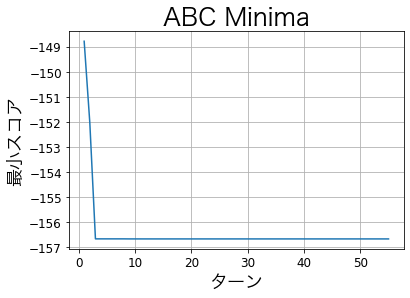


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 55, 'w': 0.37343535198015143, 'c1': 0.8832769671923559, 'c2': 0.7451953469108137}
gb_place : [-2.90353402 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 75 ms



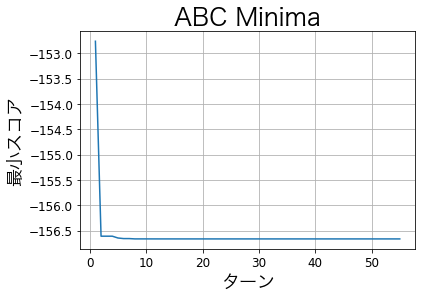


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 60, 'max_turn': 55, 'w': 0.37343535198015143, 'c1': 0.8832769671923559, 'c2': 0.7451953469108137}
gb_place : [-2.90353404 -2.90353403]
gb_score : -156.6646628150857
計算時間 : 84 ms



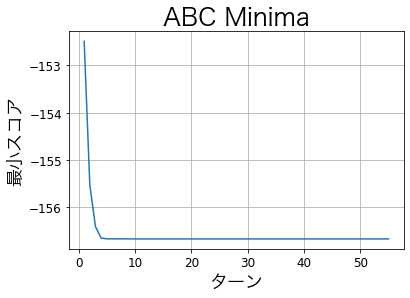

In [47]:
best_params = study.best_params
num_agent = best_params["num_agent"]
max_turn = best_params["max_turn"]
w = best_params["w"]
c1 = best_params["c1"]
c2 = best_params["c2"]

for _ in range(3) : 
    pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                    w, c1, c2, output_mode = output_mode)
    
    plot_score(function_number, pso.gb_record_list, "Minima")